# Temperature Forecast Project using ML
Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\KARTIK NEGI\Desktop\temperature.csv",parse_dates = ['Date'])
df.head(5)

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [3]:
df.set_index('station',inplace=True)

In [4]:
df.head(2)

Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
station                                                                    
1.0     2013-06-30          28.7          21.4    58.255688    91.116364   
2.0     2013-06-30          31.9          21.6    52.263397    90.604721   

         LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
station                                                                       
1.0             28.074101         23.006936  6.818887  69.451805   0.233947   
2.0             29.850689         24.035009  5.691890  51.937448   0.225508   

         ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
station  ...                                                                   
1.0      ...         0.0         0.0         0.0  37.6046  126.991  212.3350   
2.0      ...         0.0         0.0         0.0  37.6046  127.032   44.7624   

          Slope  Solar radiation  Next_Tmax  Next_Tmin  
station                                                 
1.0      2.7850      5992.895996       29.1       21.2  
2.0      0.5141      5869.312500       30.5       22.5  

[2 rows x 24 columns]

In [5]:
df.shape

(7752, 24)

In [6]:
df.dtypes

Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [7]:
df.isnull().sum()

Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
df.nunique()

Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [9]:
df.value_counts("Next_Tmin")

Next_Tmin
23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
28.2      1
14.6      1
14.9      1
15.2      1
13.9      1
Length: 157, dtype: int64

In [10]:
df.value_counts("Next_Tmax")

Next_Tmax
29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
20.9      1
21.4      1
21.5      1
21.8      1
20.5      1
Length: 183, dtype: int64

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

    


2013-06-30    25
2016-07-18    25
2016-07-25    25
2016-07-24    25
2016-07-23    25
              ..
2014-09-08    25
2014-08-08    25
2014-07-08    25
2014-06-08    25
2017-08-30    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64


96.525200     2
99.251968     2
100.000153    2
91.878174     2
94.795967     2
             ..
96.718201     1
94.153252     1
96.910126     1
93.541885     1
77.243744     1
Name: LDAPS_RHmax, Lengt

In [12]:
df.isnull().sum()

Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Observations:-
# It looks from the dataset above that only 1 column has a datatype of project rest every column has float values.
# there are 2 target variables which have continuos or quantitative data as the difference between no. of rows and no. of unique values is less so therefore we will use regression models and classify into a Regression problem.

## TREATING THE NULL VALUES:-

In [13]:
df.head(2)

Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
station                                                                    
1.0     2013-06-30          28.7          21.4    58.255688    91.116364   
2.0     2013-06-30          31.9          21.6    52.263397    90.604721   

         LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
station                                                                       
1.0             28.074101         23.006936  6.818887  69.451805   0.233947   
2.0             29.850689         24.035009  5.691890  51.937448   0.225508   

         ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
station  ...                                                                   
1.0      ...         0.0         0.0         0.0  37.6046  126.991  212.3350   
2.0      ...         0.0         0.0         0.0  37.6046  127.032   44.7624   

          Slope  Solar radiation  Next_Tmax  Next_Tmin  
station                                                 
1.0      2.7850      5992.895996       29.1       21.2  
2.0      0.5141      5869.312500       30.5       22.5  

[2 rows x 24 columns]

In [14]:
df.dtypes

Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [15]:
df['Day'] = df['Date'].dt.day

In [16]:
df['Month'] = df['Date'].dt.month

In [17]:
df.drop('Date',axis=1,inplace=True)

In [18]:
df.head(2)

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
station                                                         
1.0              28.7          21.4    58.255688    91.116364   
2.0              31.9          21.6    52.263397    90.604721   

         LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
station                                                                       
1.0             28.074101         23.006936  6.818887  69.451805   0.233947   
2.0             29.850689         24.035009  5.691890  51.937448   0.225508   

         LDAPS_CC2  ...  LDAPS_PPT4      lat      lon       DEM   Slope  \
station             ...                                                   
1.0       0.203896  ...         0.0  37.6046  126.991  212.3350  2.7850   
2.0       0.251771  ...         0.0  37.6046  127.032   44.7624  0.5141   

         Solar radiation  Next_Tmax  Next_Tmin   Day  Month  
station                                                      
1.0          5992.895996       29.1       21.2  30.0    6.0  
2.0          5869.312500       30.5       22.5  30.0    6.0  

[2 rows x 25 columns]

In [19]:
df.dropna(subset=['Next_Tmax', 'Next_Tmin'], inplace = True)

In [20]:
df.isnull().sum()

Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
Day                  2
Month                2
dtype: int64

In [21]:
df.shape

(7725, 25)

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
SI=SimpleImputer()

In [26]:
df_1 = SI.fit_transform(df)

In [27]:
df_1 = pd.DataFrame(df_1,columns=df.columns)

In [28]:
df_1.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
dtype: int64

In [29]:
df=df_1


In [30]:
df.shape

(7725, 25)

In [31]:
df.head(20)

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0           28.7          21.4    58.255688    91.116364         28.074101   
1           31.9          21.6    52.263397    90.604721         29.850689   
2           31.6          23.3    48.690479    83.973587         30.091292   
3           32.0          23.4    58.239788    96.483688         29.704629   
4           31.4          21.9    56.174095    90.155128         29.113934   
5           31.9          23.5    52.437126    85.307251         29.219342   
6           31.4          24.4    56.287189    81.019760         28.551859   
7           32.1          23.6    52.326218    78.004539         28.851982   
8           31.4          22.0    55.338791    80.784607         28.426975   
9           31.6          20.5    56.651203    86.849632         27.576705   
10          31.7          23.5    51.156395    85.385635         29.694724   
11          31.6          22.2    51.288349    80.338013         28.936314   
12          32.1          23.8    48.767929    84.008163         29.929272   
13          31.3          23.8    50.745735    74.498810         29.498526   
14          32.5          23.6    51.773392    72.999237         29.640103   
15          30.7          21.4    56.848339    84.408173         28.476517   
16          32.1          20.1    54.352501    93.218315         29.321525   
17          32.8          23.8    56.144707    88.364731         28.676175   
18          31.4          22.8    52.265926    75.483757         29.273668   
19          30.9          22.2    61.493835    95.245232         28.502989   

    LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0          23.006936  6.818887   69.451805   0.233947   0.203896  ...   
1          24.035009  5.691890   51.937448   0.225508   0.251771  ...   
2          24.565633  6.138224   20.573050   0.209344   0.257469  ...   
3          23.326177  5.650050   65.727144   0.216372   0.226002  ...   
4          23.486480  5.735004  107.965535   0.151407   0.249995  ...   
5          23.822613  6.182295   50.231389   0.185279   0.280818  ...   
6          24.238467  5.587135  125.110007   0.389600   0.333570  ...   
7          23.819054  6.104417   42.011547   0.357856   0.344928  ...   
8          23.332373  6.017135   85.110971   0.408766   0.344800  ...   
9          22.527018  6.518841   63.006075   0.348292   0.306255  ...   
10         24.432646  6.411812   55.690312   0.175334   0.281866  ...   
11         24.365949  6.423993   28.719288   0.251017   0.256294  ...   
12         24.281750  5.988361   32.039448   0.183450   0.271462  ...   
13         24.459427  6.319478   16.835611   0.357665   0.323949  ...   
14         25.152909  6.360547   32.275122   0.301713   0.302602  ...   
15         23.695151  5.639549   83.417605   0.277755   0.287273  ...   
16         23.036163  5.497787   97.971438   0.151998   0.236199  ...   
17         23.448165  5.665435   81.938271   0.190920   0.293774  ...   
18         24.970151  6.359286   36.339969   0.276465   0.295129  ...   
19         23.031539  6.814792   70.166936   0.199888   0.190157  ...   

    LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0          0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
1          0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2          0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
3          0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
4          0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
5          0.0  37.5102  127.042   54.6384  0.1457      5873.780762   
6          0.0  37.5776  126.838   12.3700  0.0985      5849.233398   
7          0.0  37.4697  126.910   52.5180  1.5629      5863.992188   
8          0.0  37.4967  126.826   50.9312  0.4125      5876.901367   
9          0.0  37.4562  126.955  208.5070  5.1782      5893.608398   
10         0.0  37.5372  127.085   28.7000  0.6233

## Statistical analysis of dataset (Descriptive Statistics):-

In [32]:
df.describe()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
count   7725.000000   7725.000000  7725.000000  7725.000000       7725.000000   
mean      29.769563     23.224631    56.741402    88.369140         29.616253   
std        2.959205      2.405561    14.583630     7.164028          2.932271   
min       20.000000     11.300000    19.794666    58.936283         17.624954   
25%       27.800000     21.700000    46.045017    84.291199         27.696185   
50%       29.900000     23.400000    55.266701    89.699196         29.664030   
75%       32.000000     24.900000    66.996681    93.704353         31.687106   
max       37.600000     29.900000    98.524734   100.000153         38.542255   

       LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH    LDAPS_CC1    LDAPS_CC2  \
count       7725.000000  7725.000000  7725.000000  7725.000000  7725.000000   
mean          23.511807     7.096739    62.468599     0.368482     0.355797   
std            2.333987     2.171835    33.556339     0.261052     0.256664   
min           14.272646     2.882580   -13.603212     0.000000     0.000000   
25%           22.114277     5.686496    37.452979     0.148229     0.142366   
50%           23.733589     6.564141    57.299645     0.319678     0.315159   
75%           25.135301     7.996899    83.897461     0.571547     0.554301   
max           29.619342    21.857621   213.414006     0.967277     0.968353   

       ...   LDAPS_PPT4          lat          lon          DEM        Slope  \
count  ...  7725.000000  7725.000000  7725.000000  7725.000000  7725.000000   
mean   ...     0.269440    37.544755   126.991370    61.926856     1.258725   
std    ...     1.199982     0.050386     0.079347    54.331701     1.371331   
min    ...     0.000000    37.456200   126.826000    12.370000     0.098475   
25%    ...     0.000000    37.510200   126.937000    28.700000     0.271300   
50%    ...     0.000000    37.550700   126.995000    45.716000     0.618000   
75%    ...     0.000703    37.577600   127.042000    59.832400     1.767800   
max    ...    16.655469    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  
count      7725.000000  7725.000000  7725.000000  7725.000000  7725.000000  
mean       5342.066031    30.274887    22.932220    16.371488     7.079632  
std         429.235277     3.128010     2.487613     8.241242     2.238210  
min        4329.520508    17.400000    11.300000     7.000000     1.000000  
25%        4999.018555    28.200000    21.300000     8.000000     7.000000  
50%        5437.534180    30.500000    23.100000    16.000000     7.000000  
75%        5728.624512    32.600000    24.600000    24.000000     8.000000  
max        5992.895996    38.900000    29.800000    31.000000    12.000000  

[8 rows x 25 columns]

# DATA VISUALIZATION:-

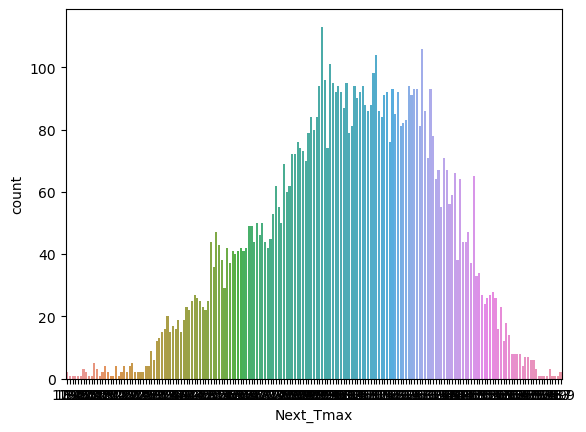

In [33]:
ax=sns.countplot(x='Next_Tmax',data=df)
plt.show()

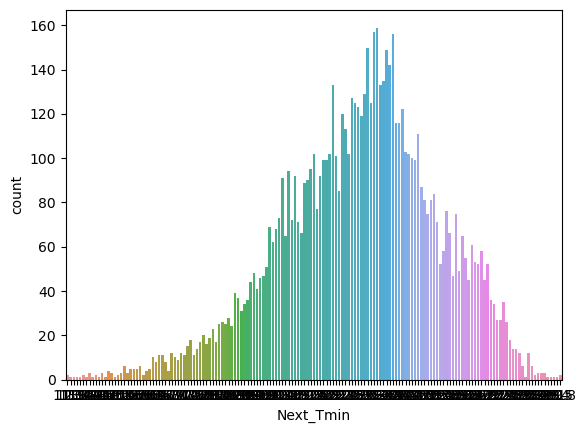

In [34]:
ax=sns.countplot(x='Next_Tmin',data=df)
plt.show()

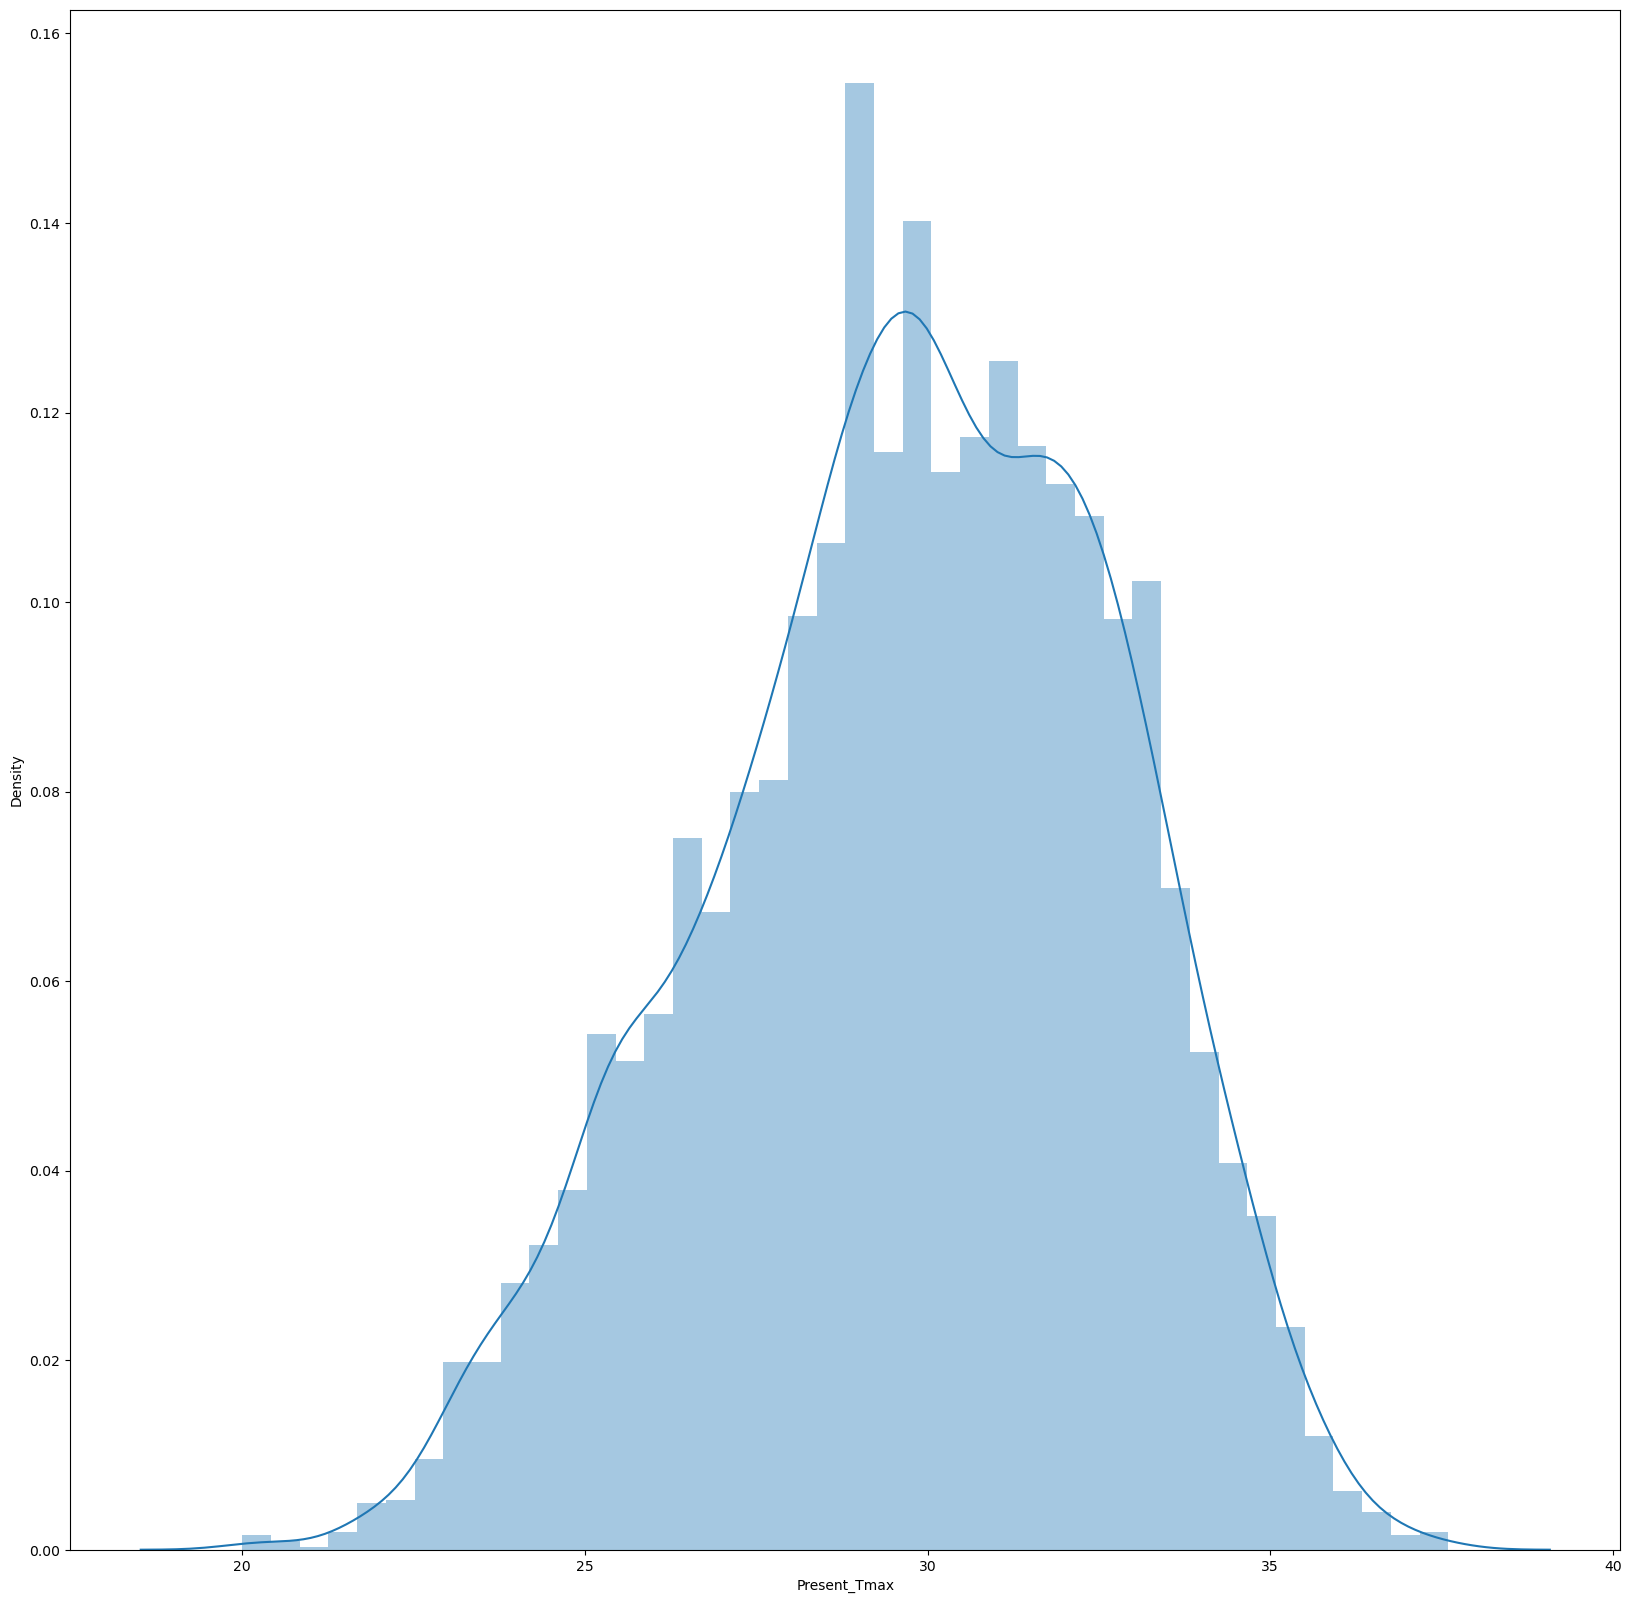

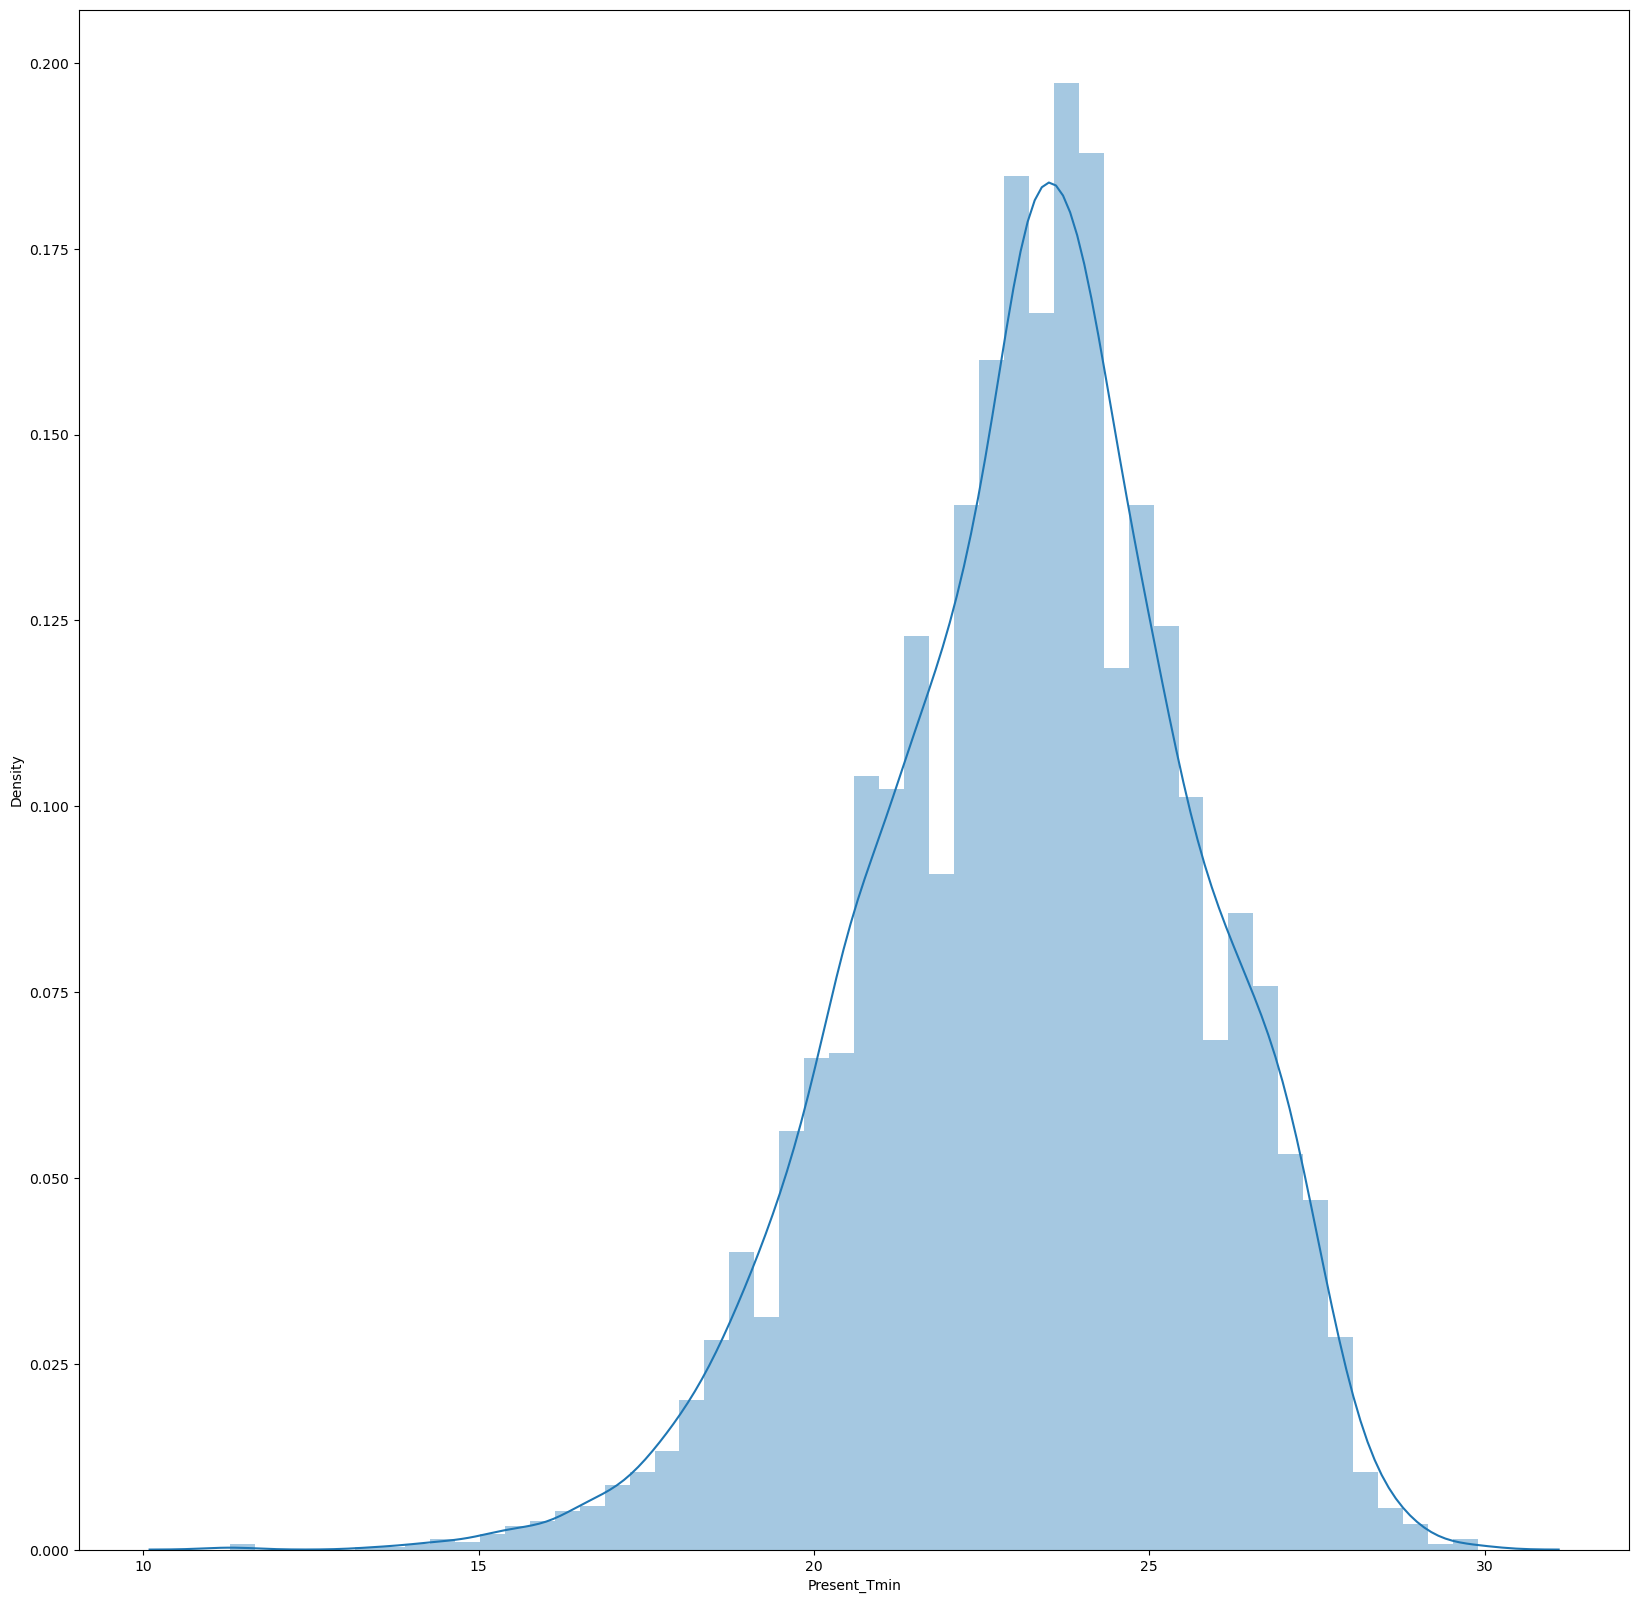

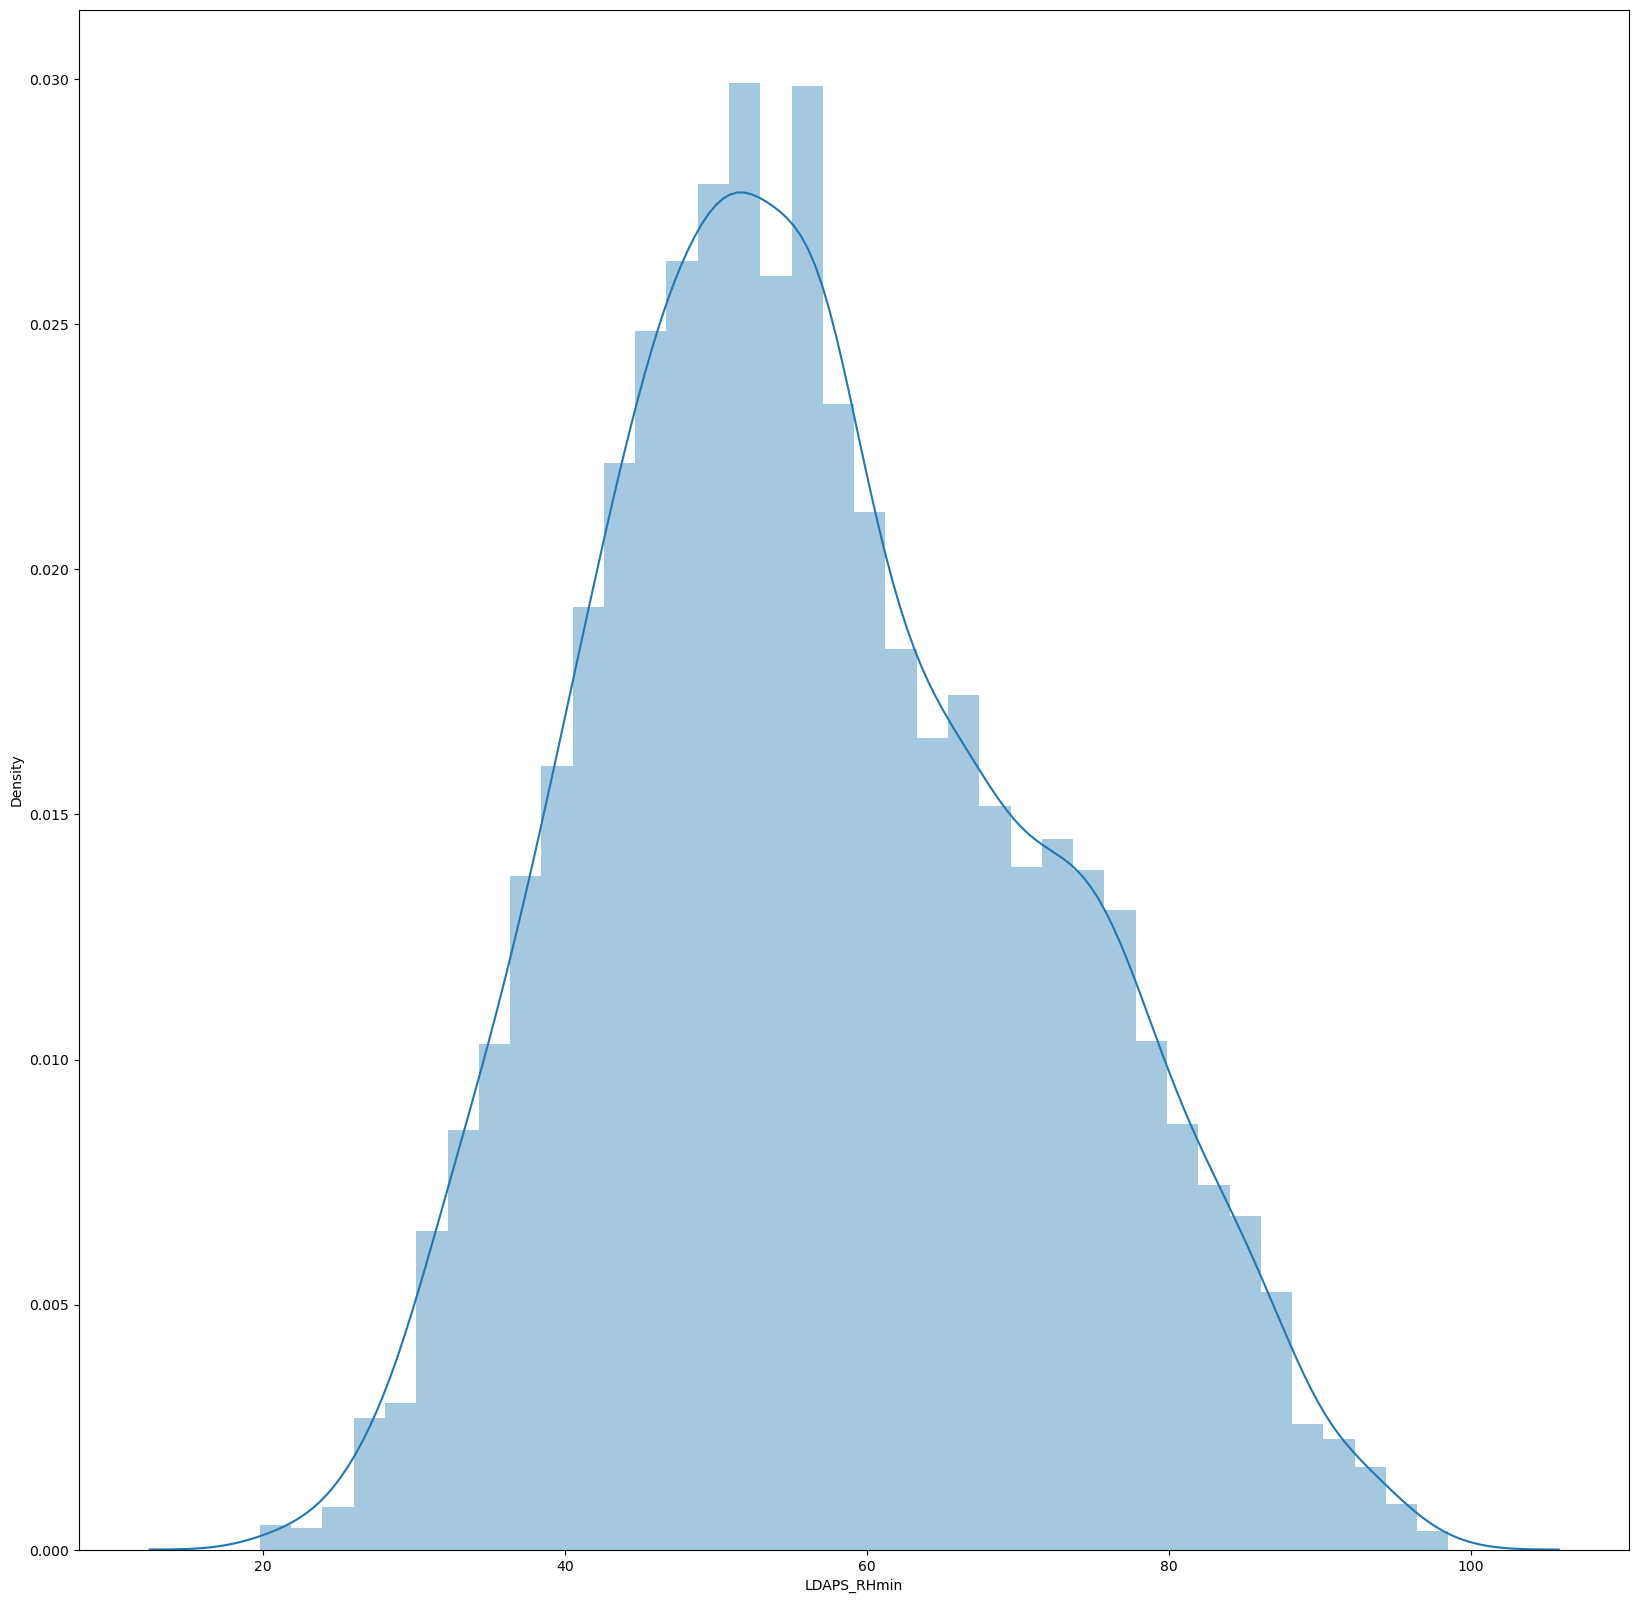

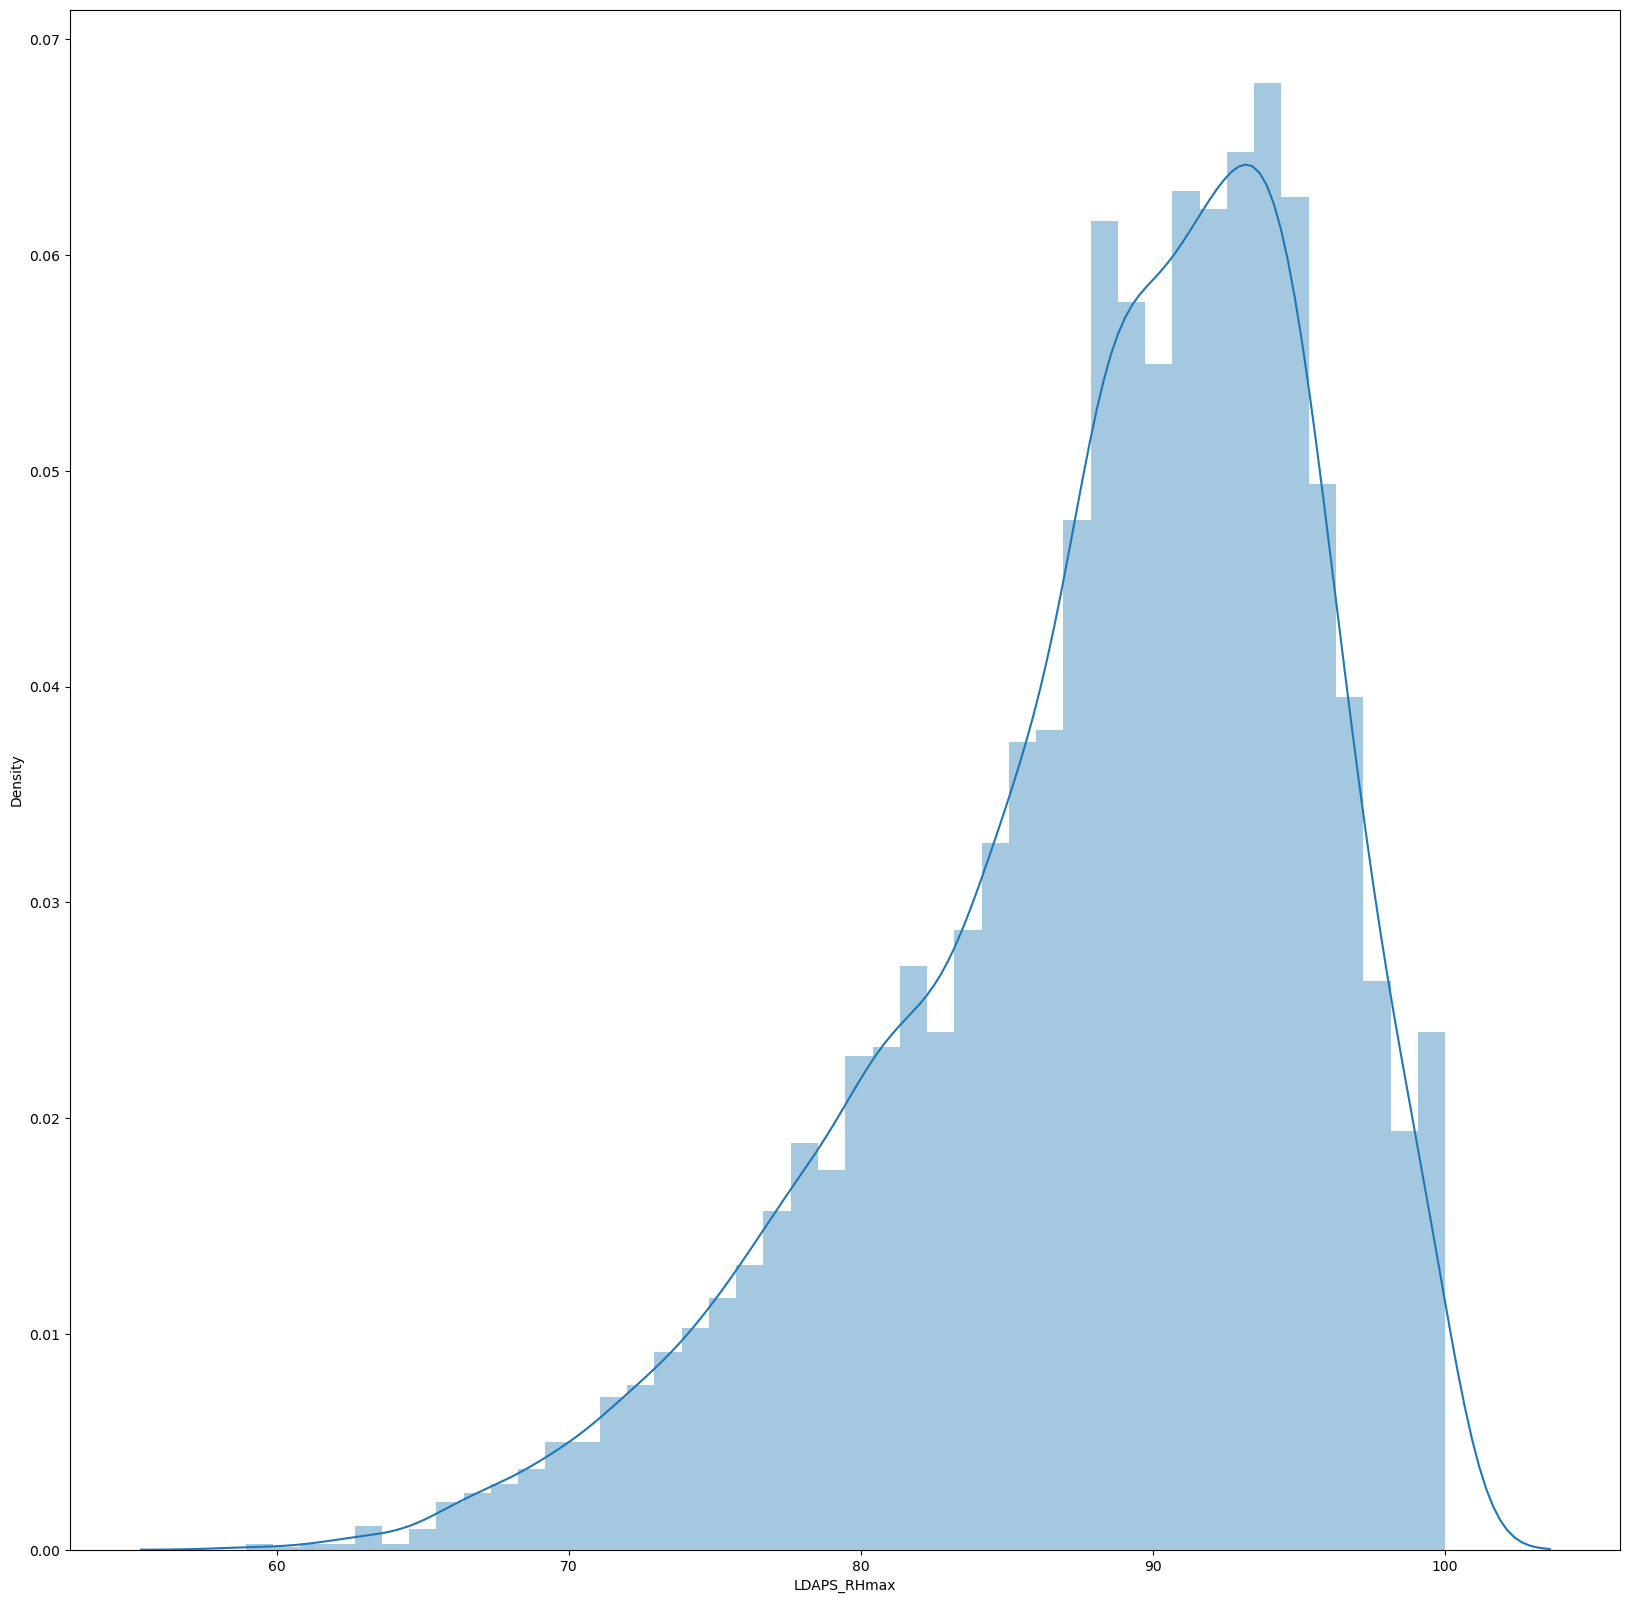

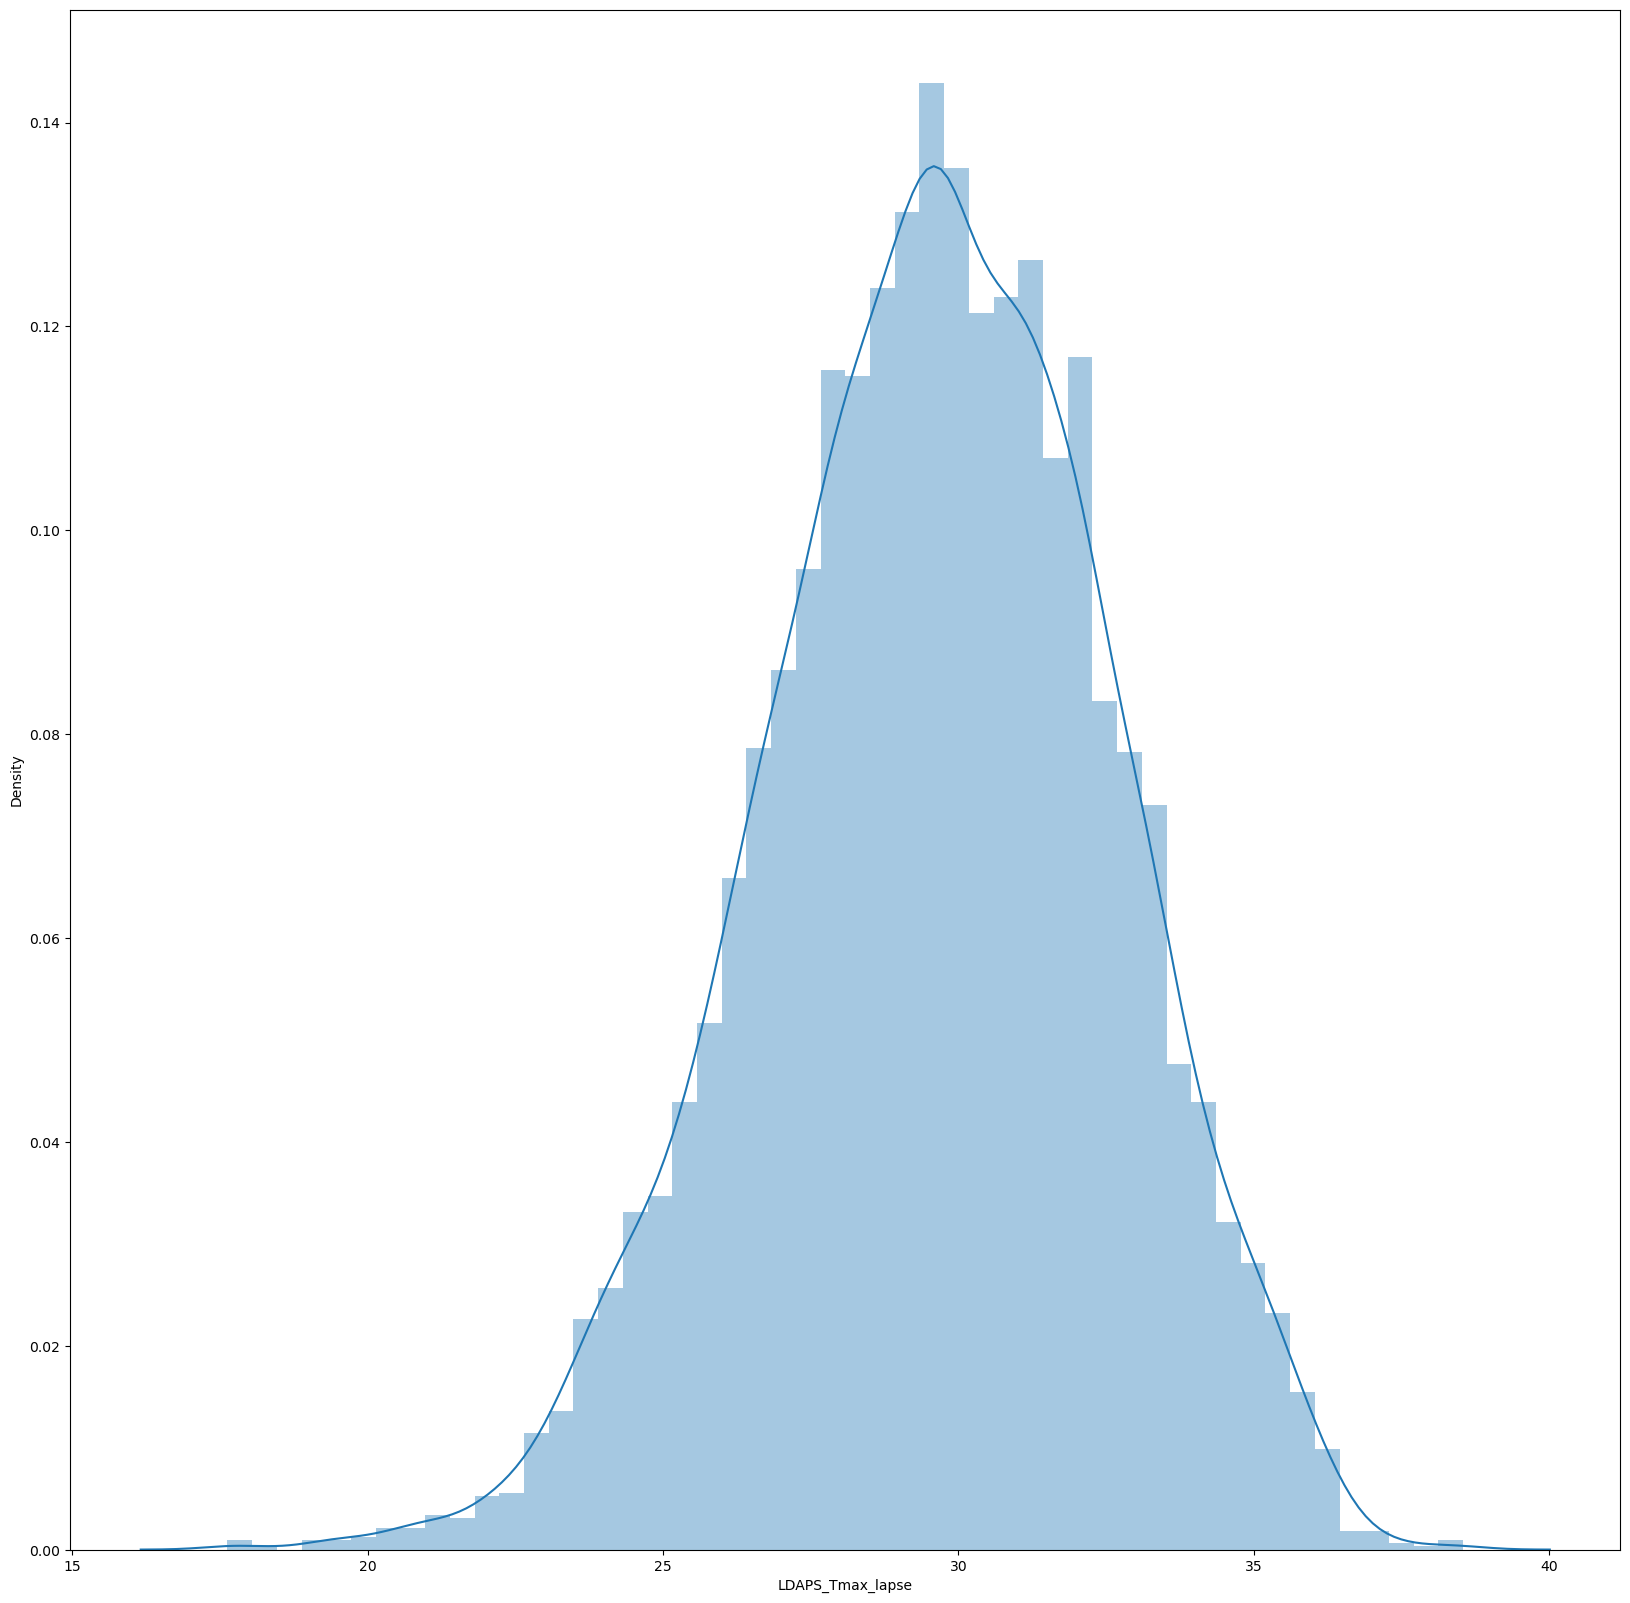

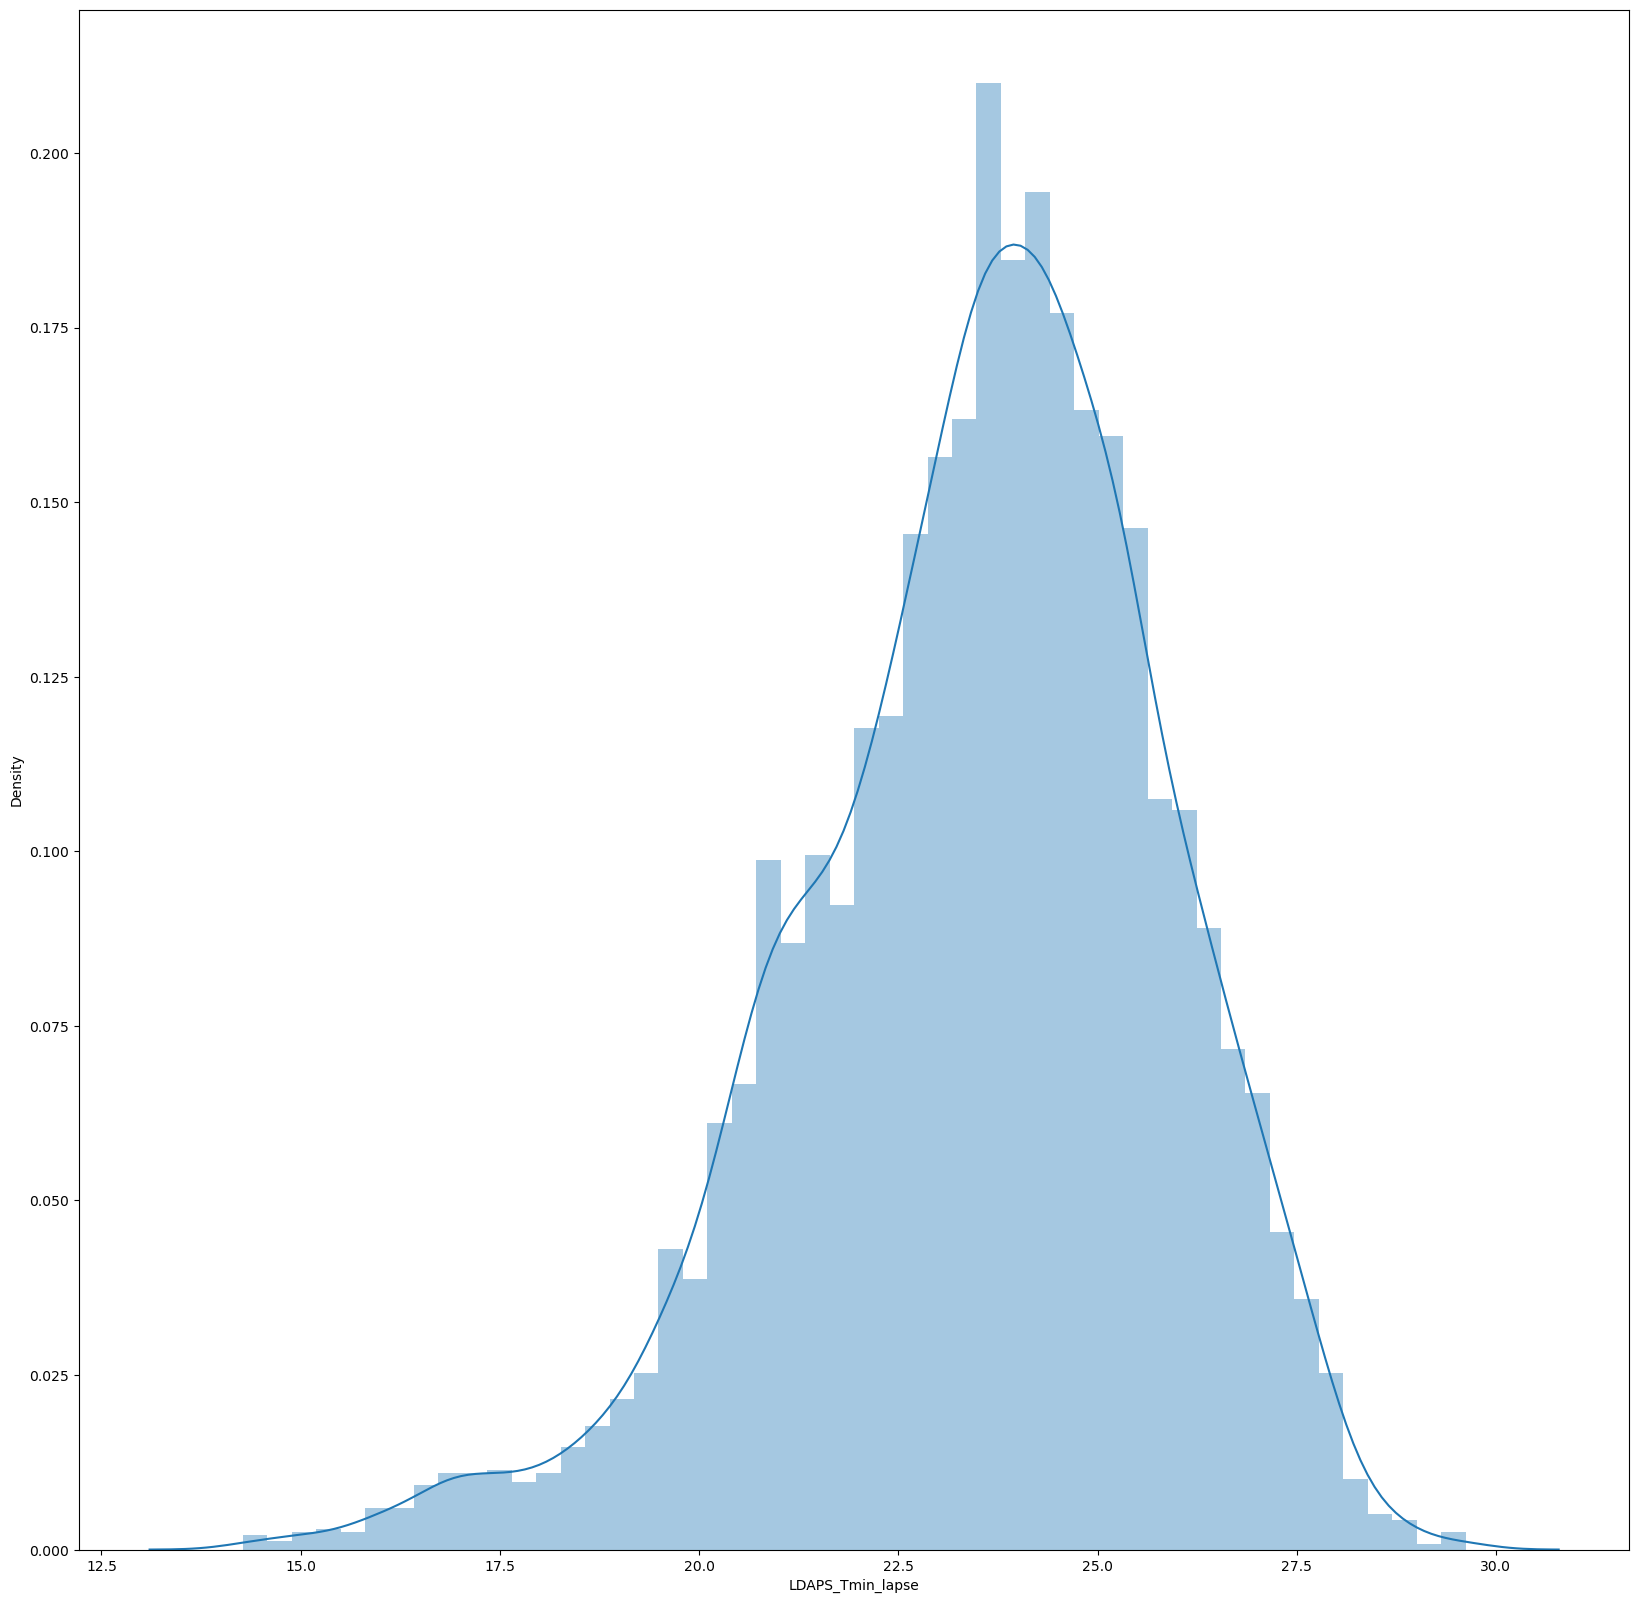

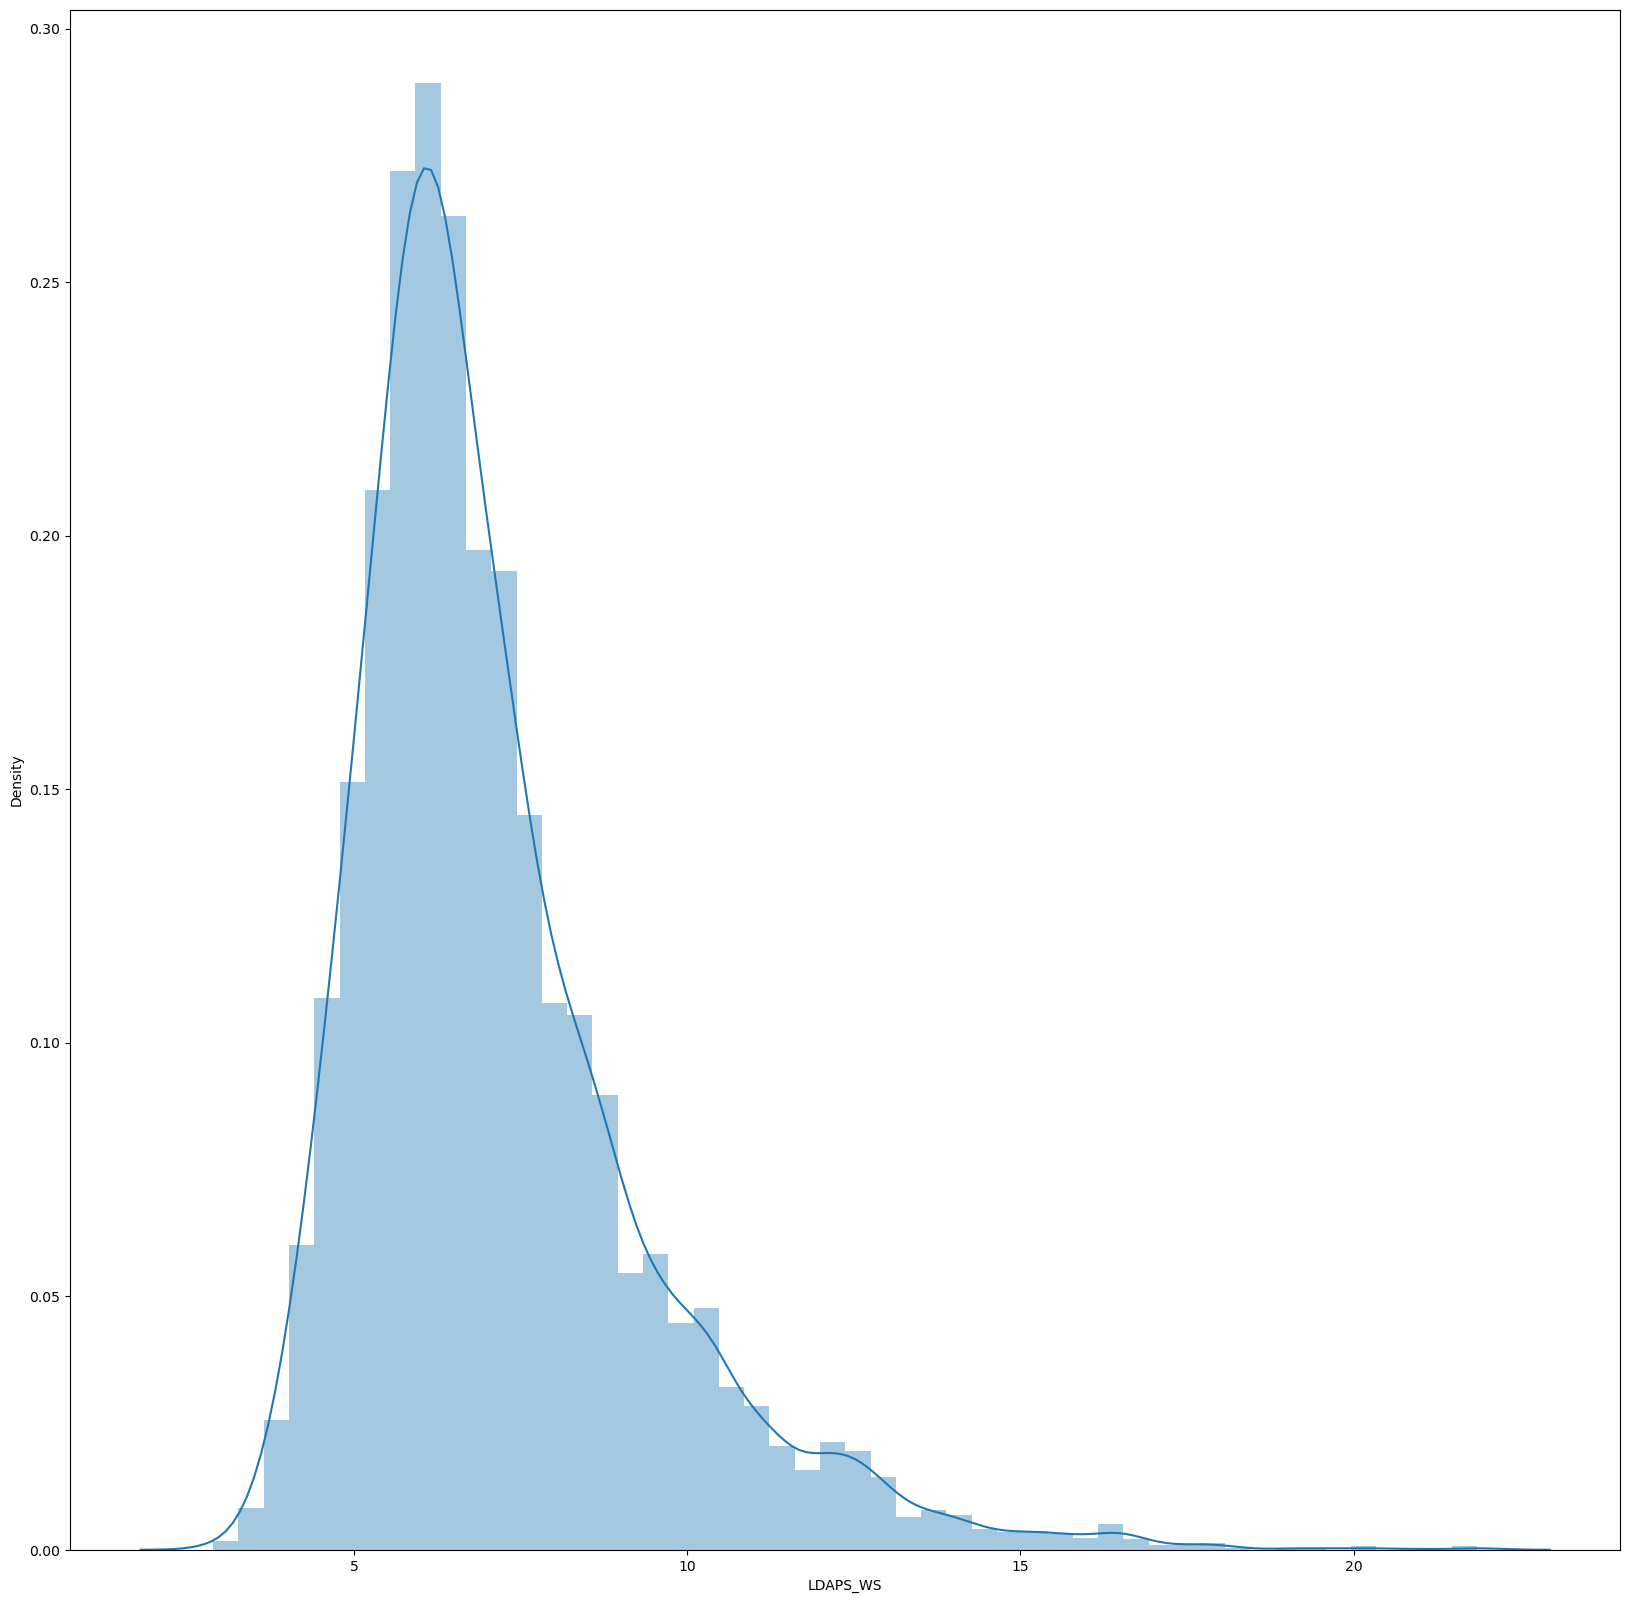

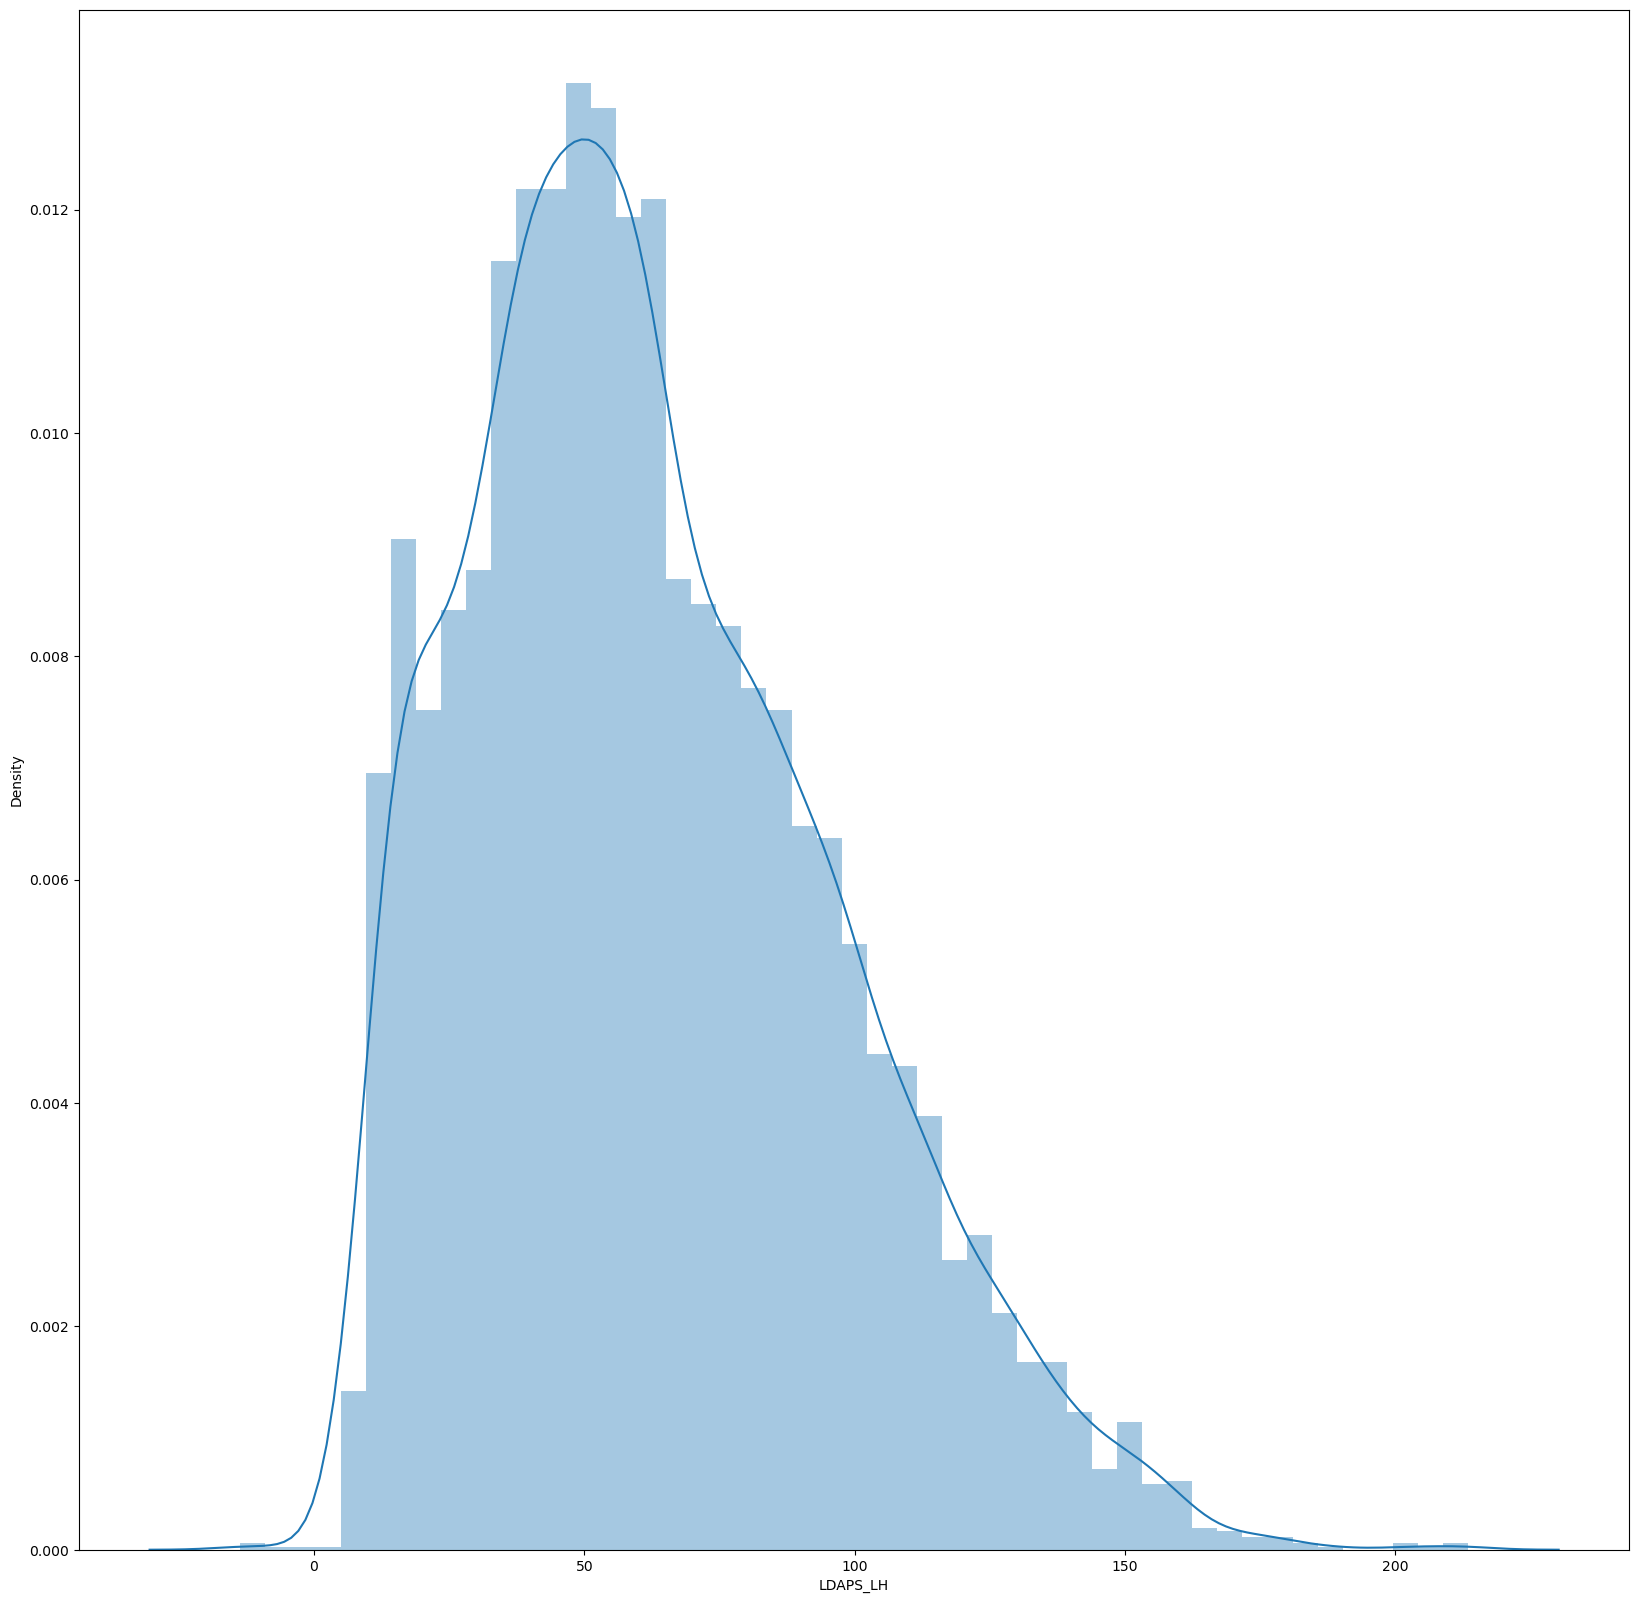

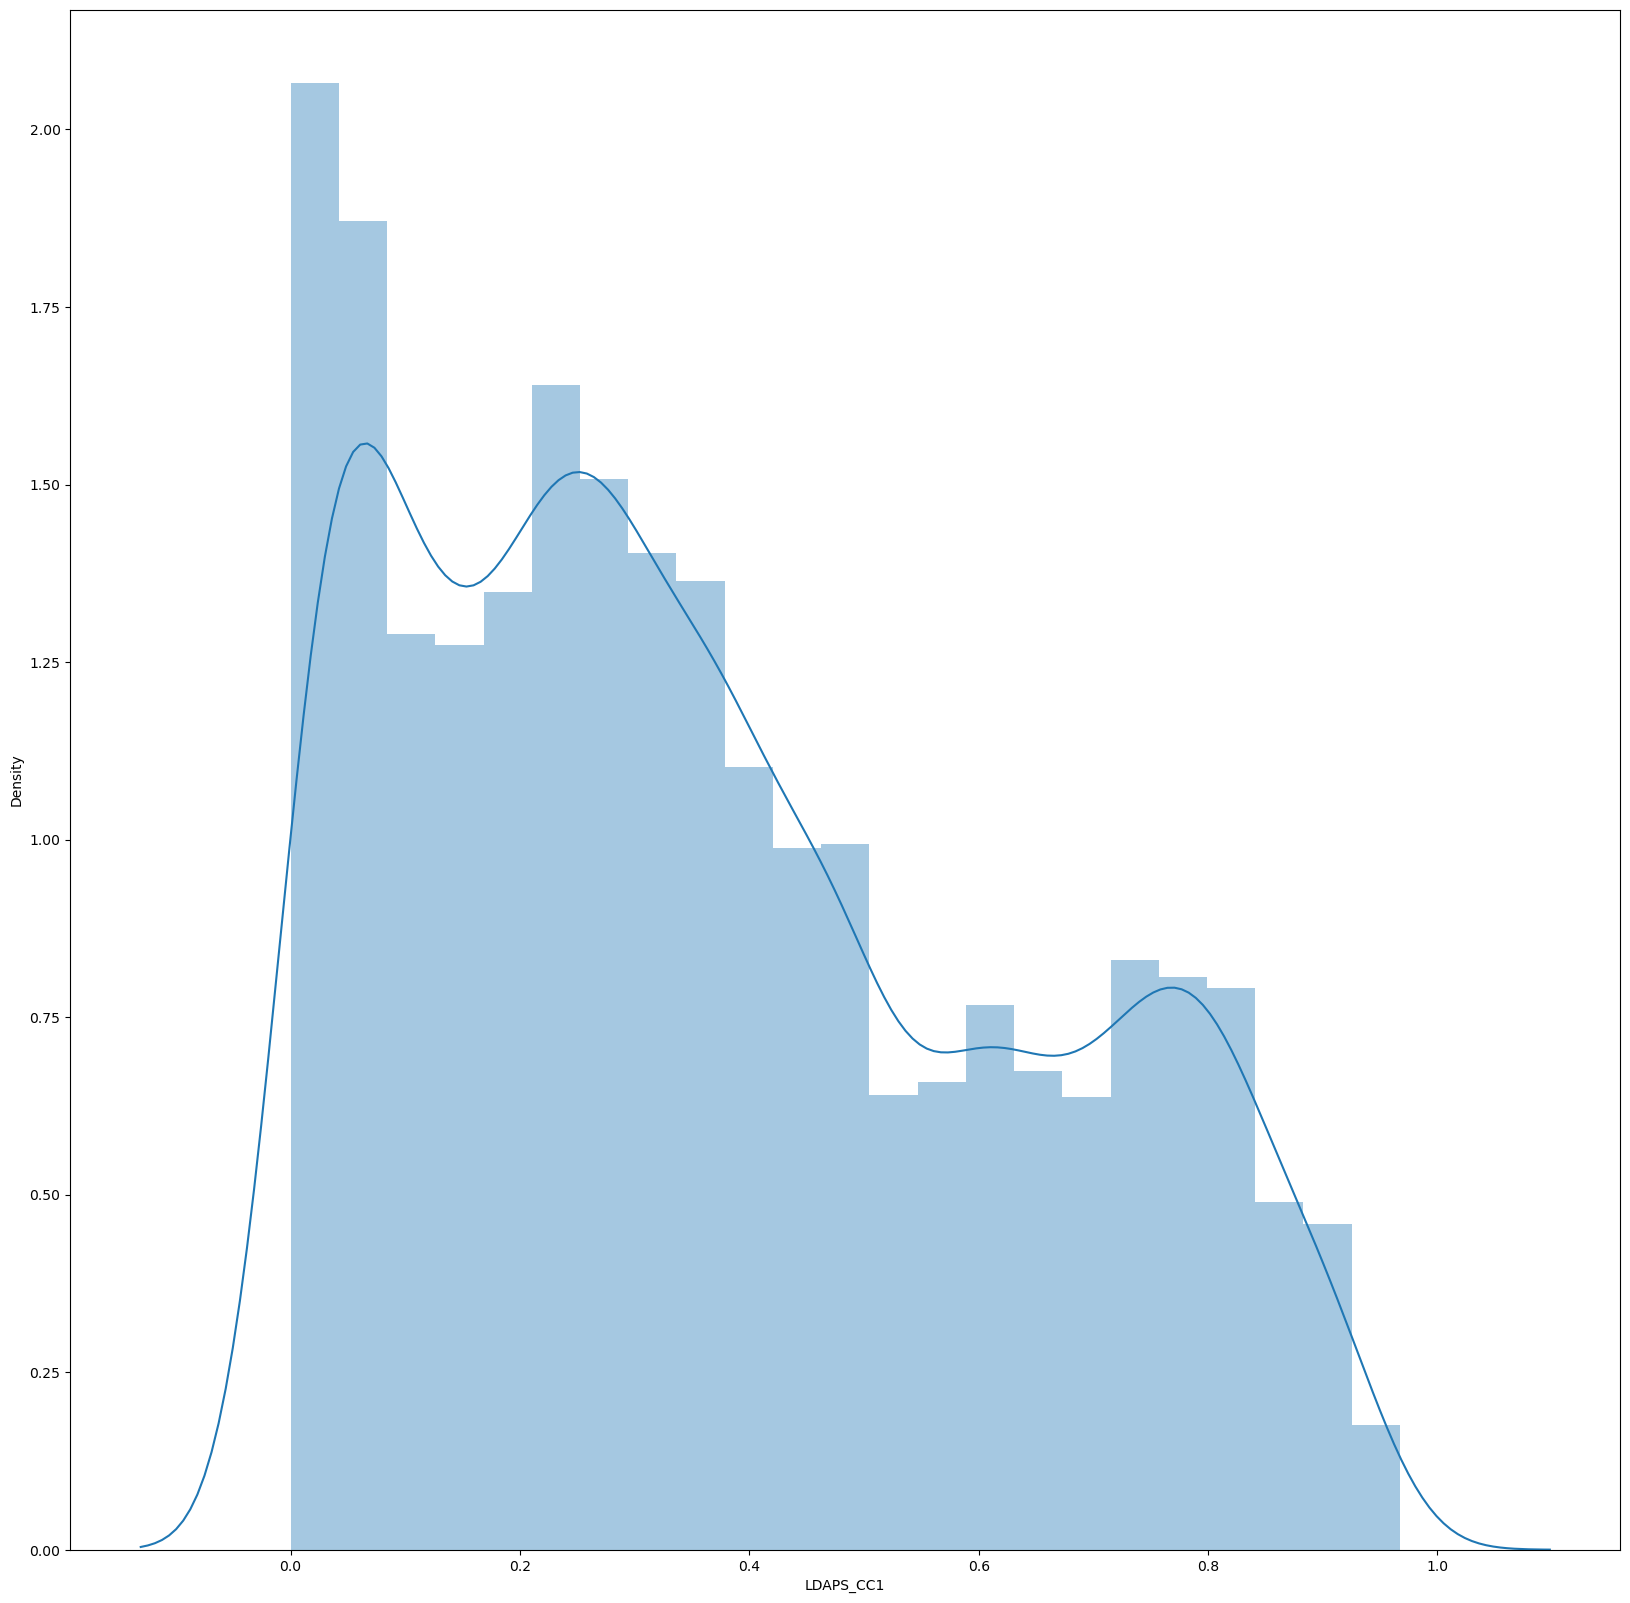

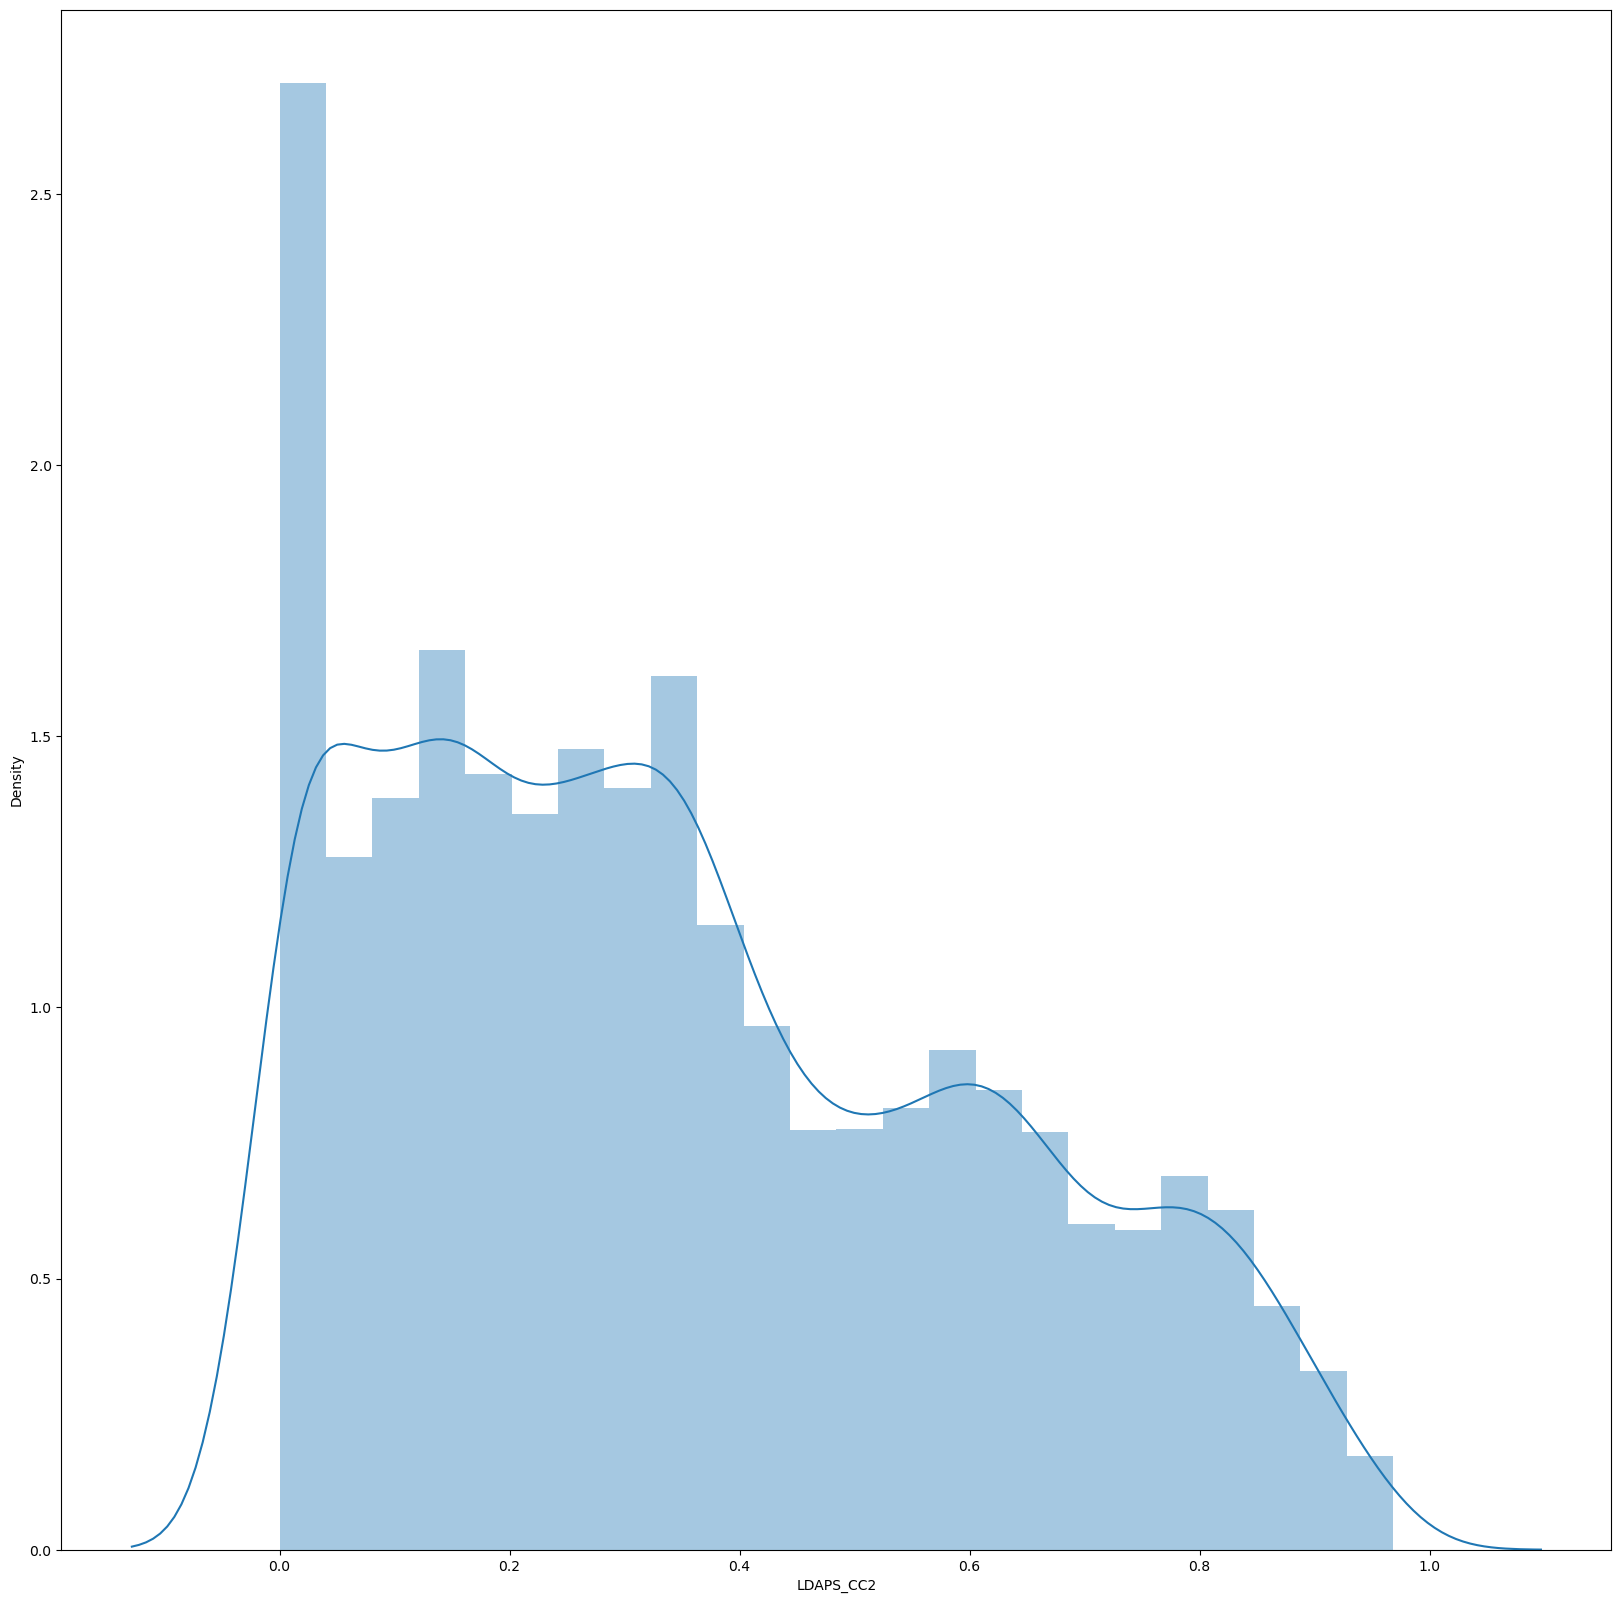

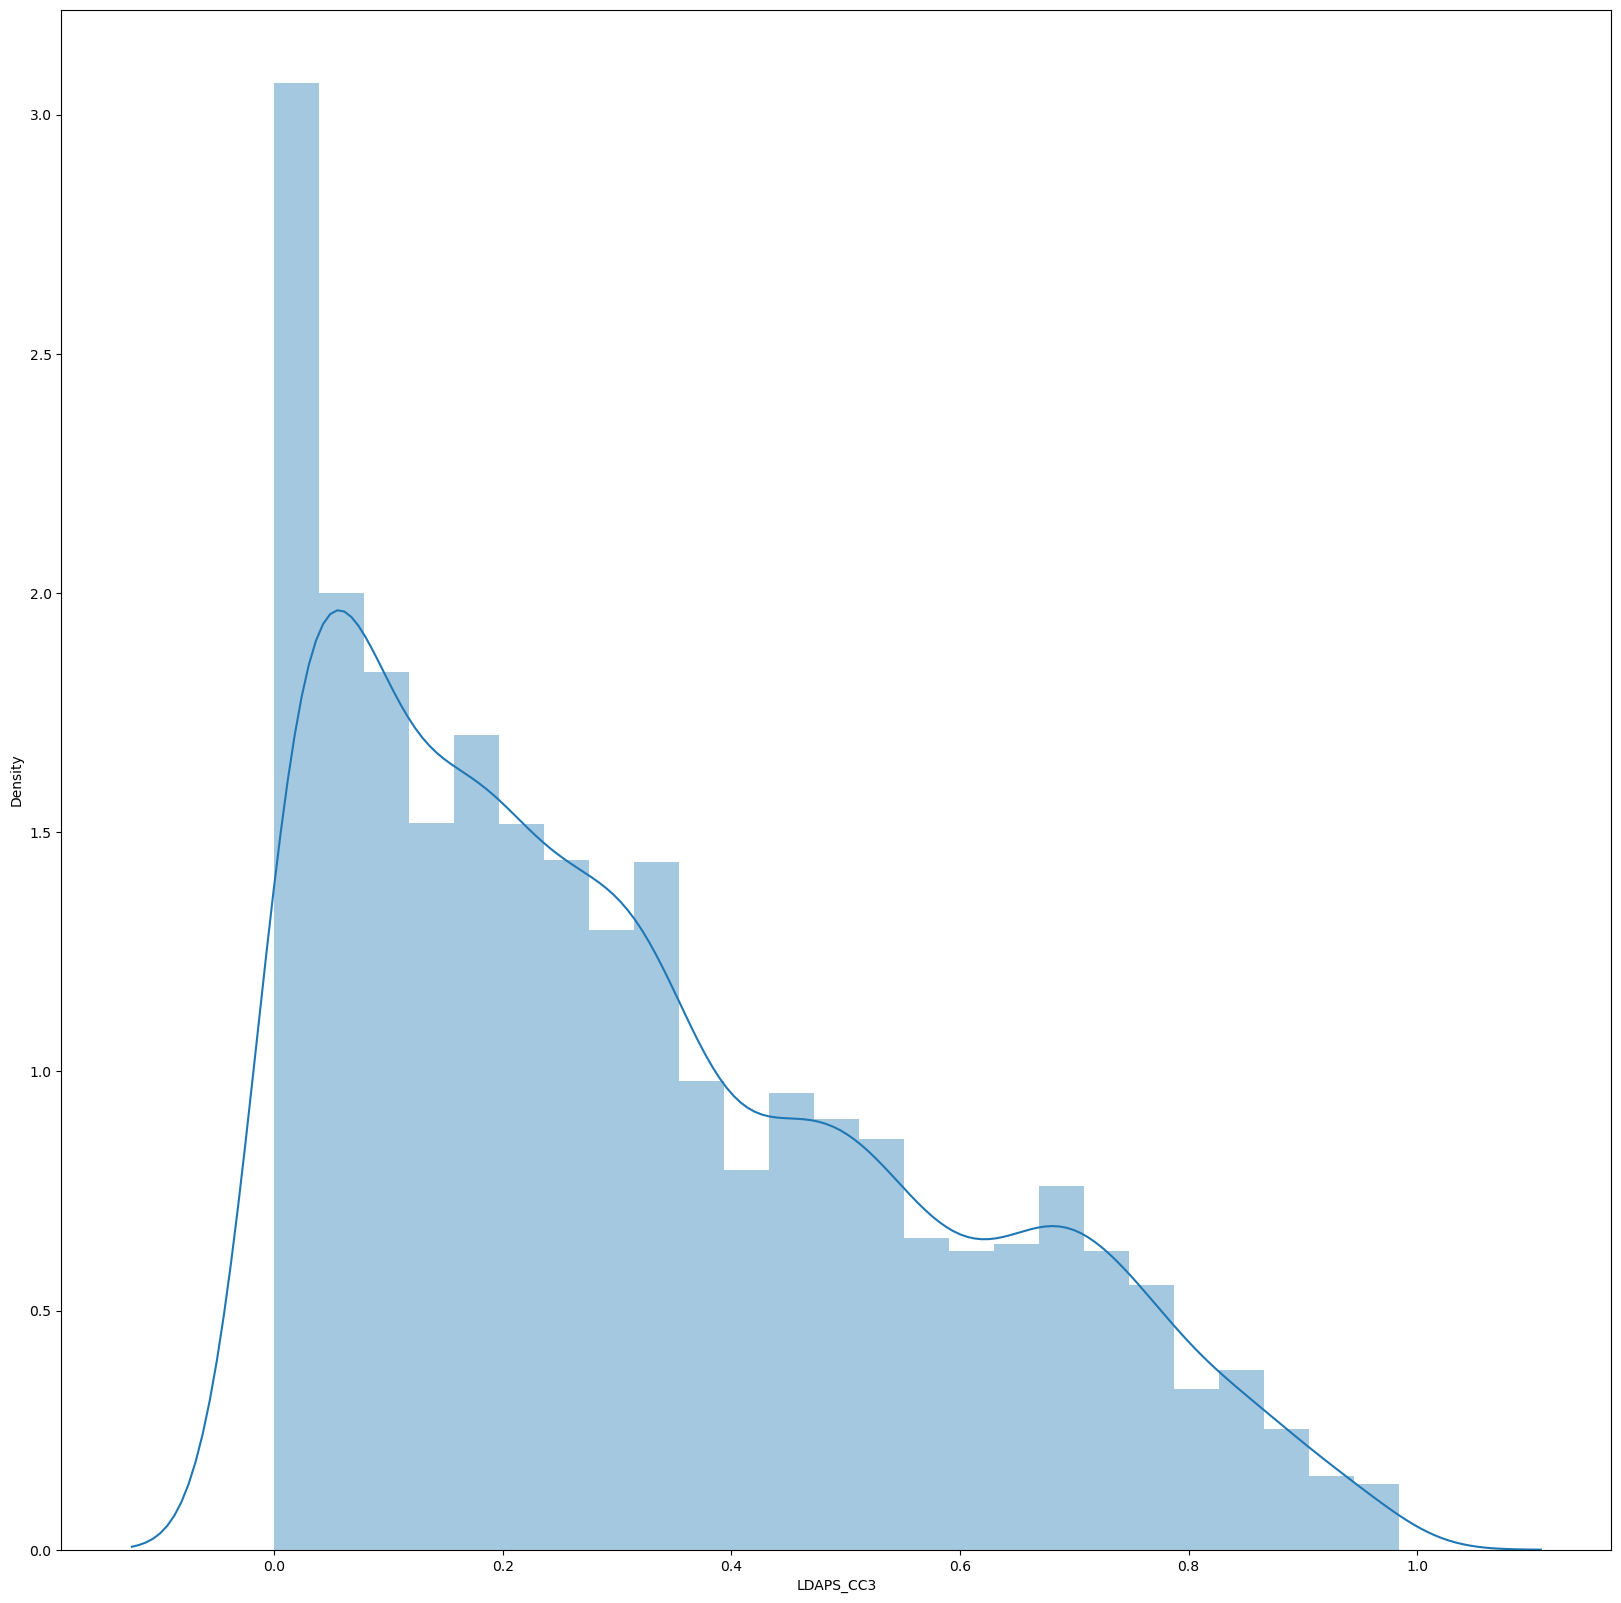

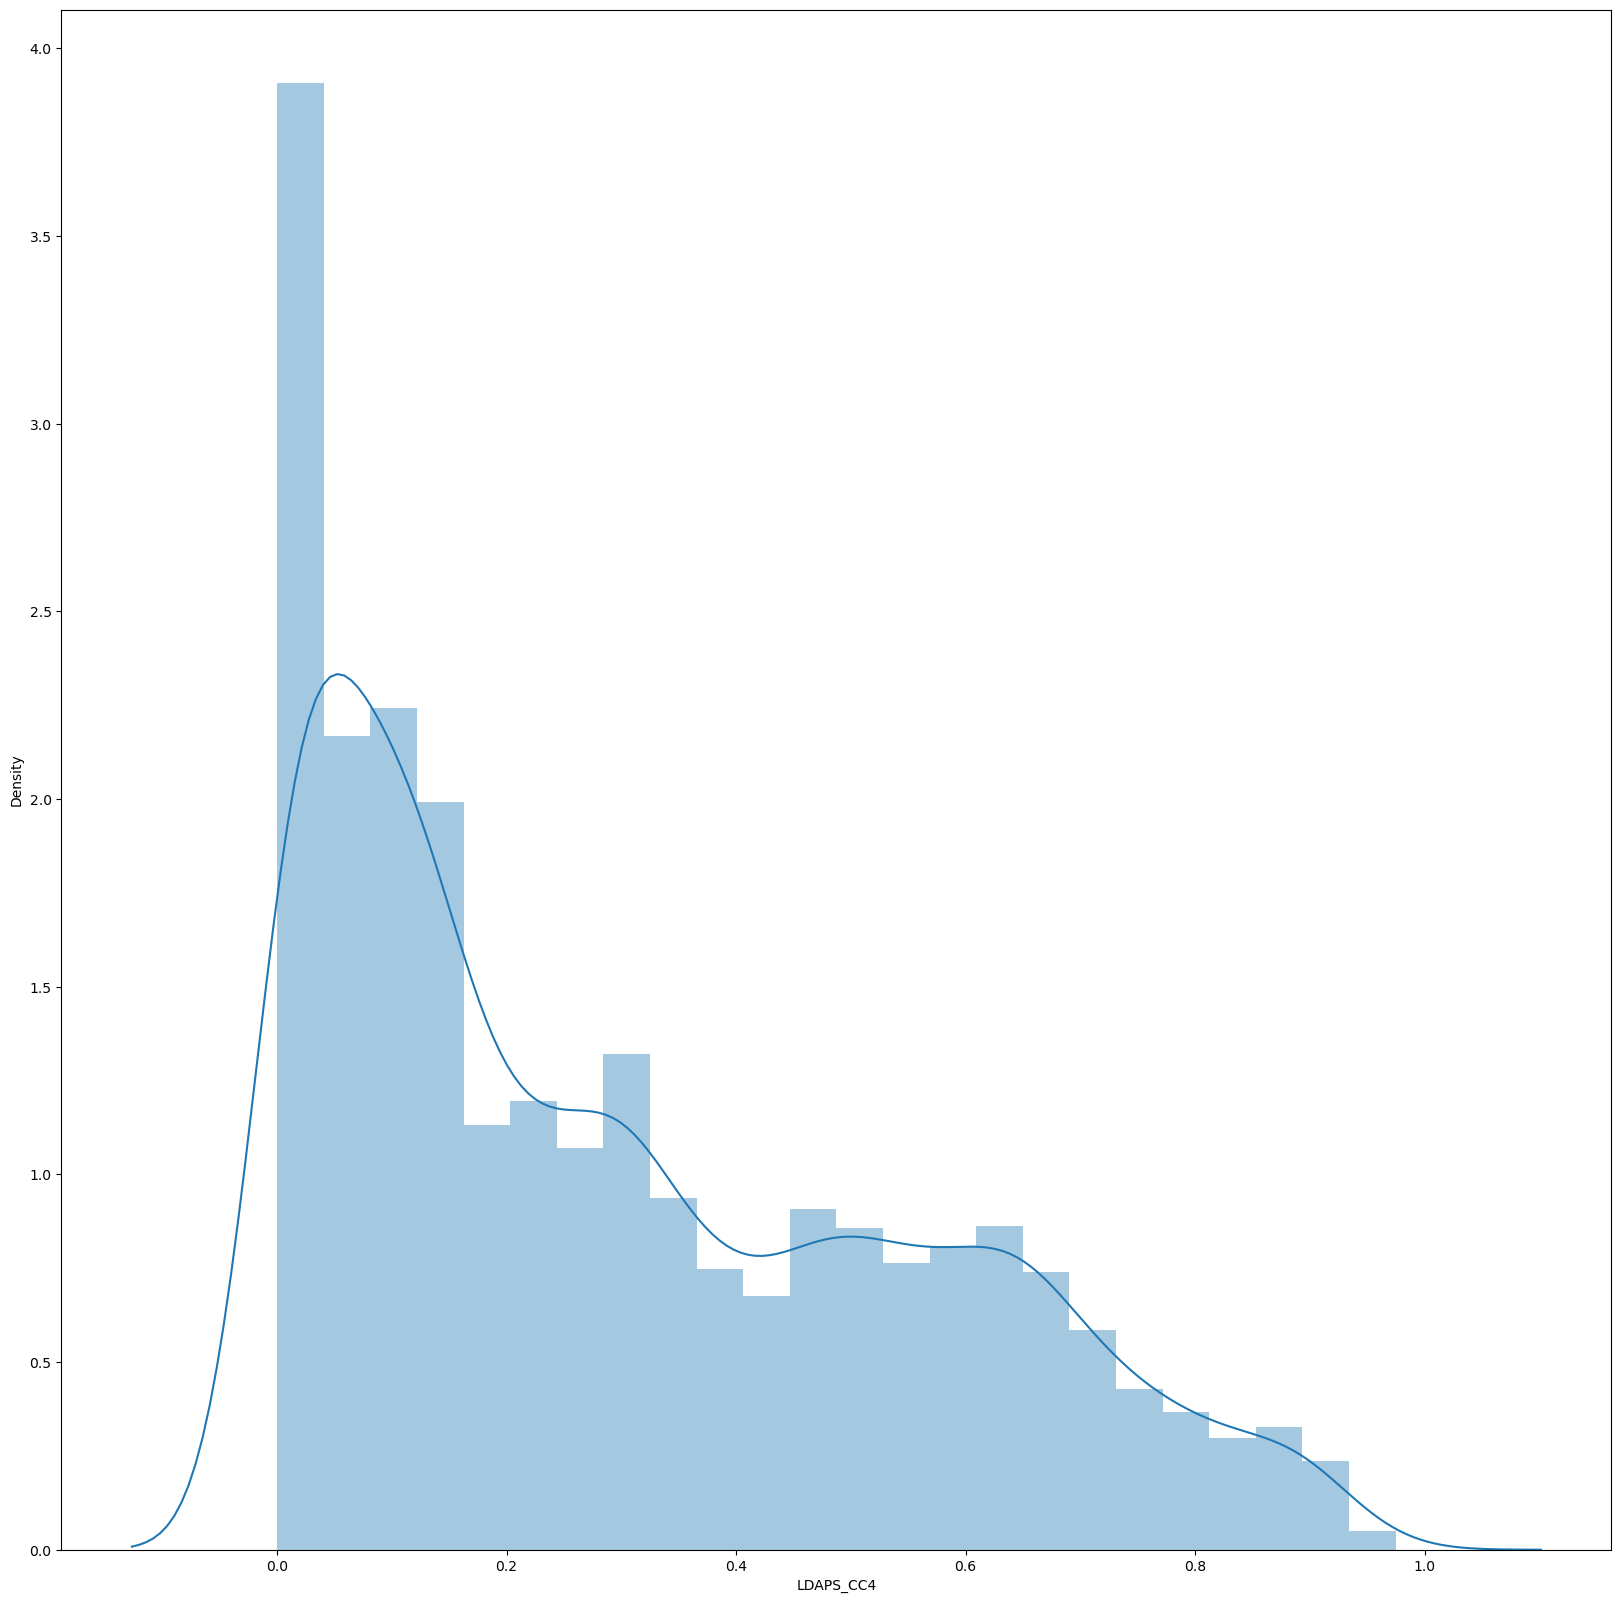

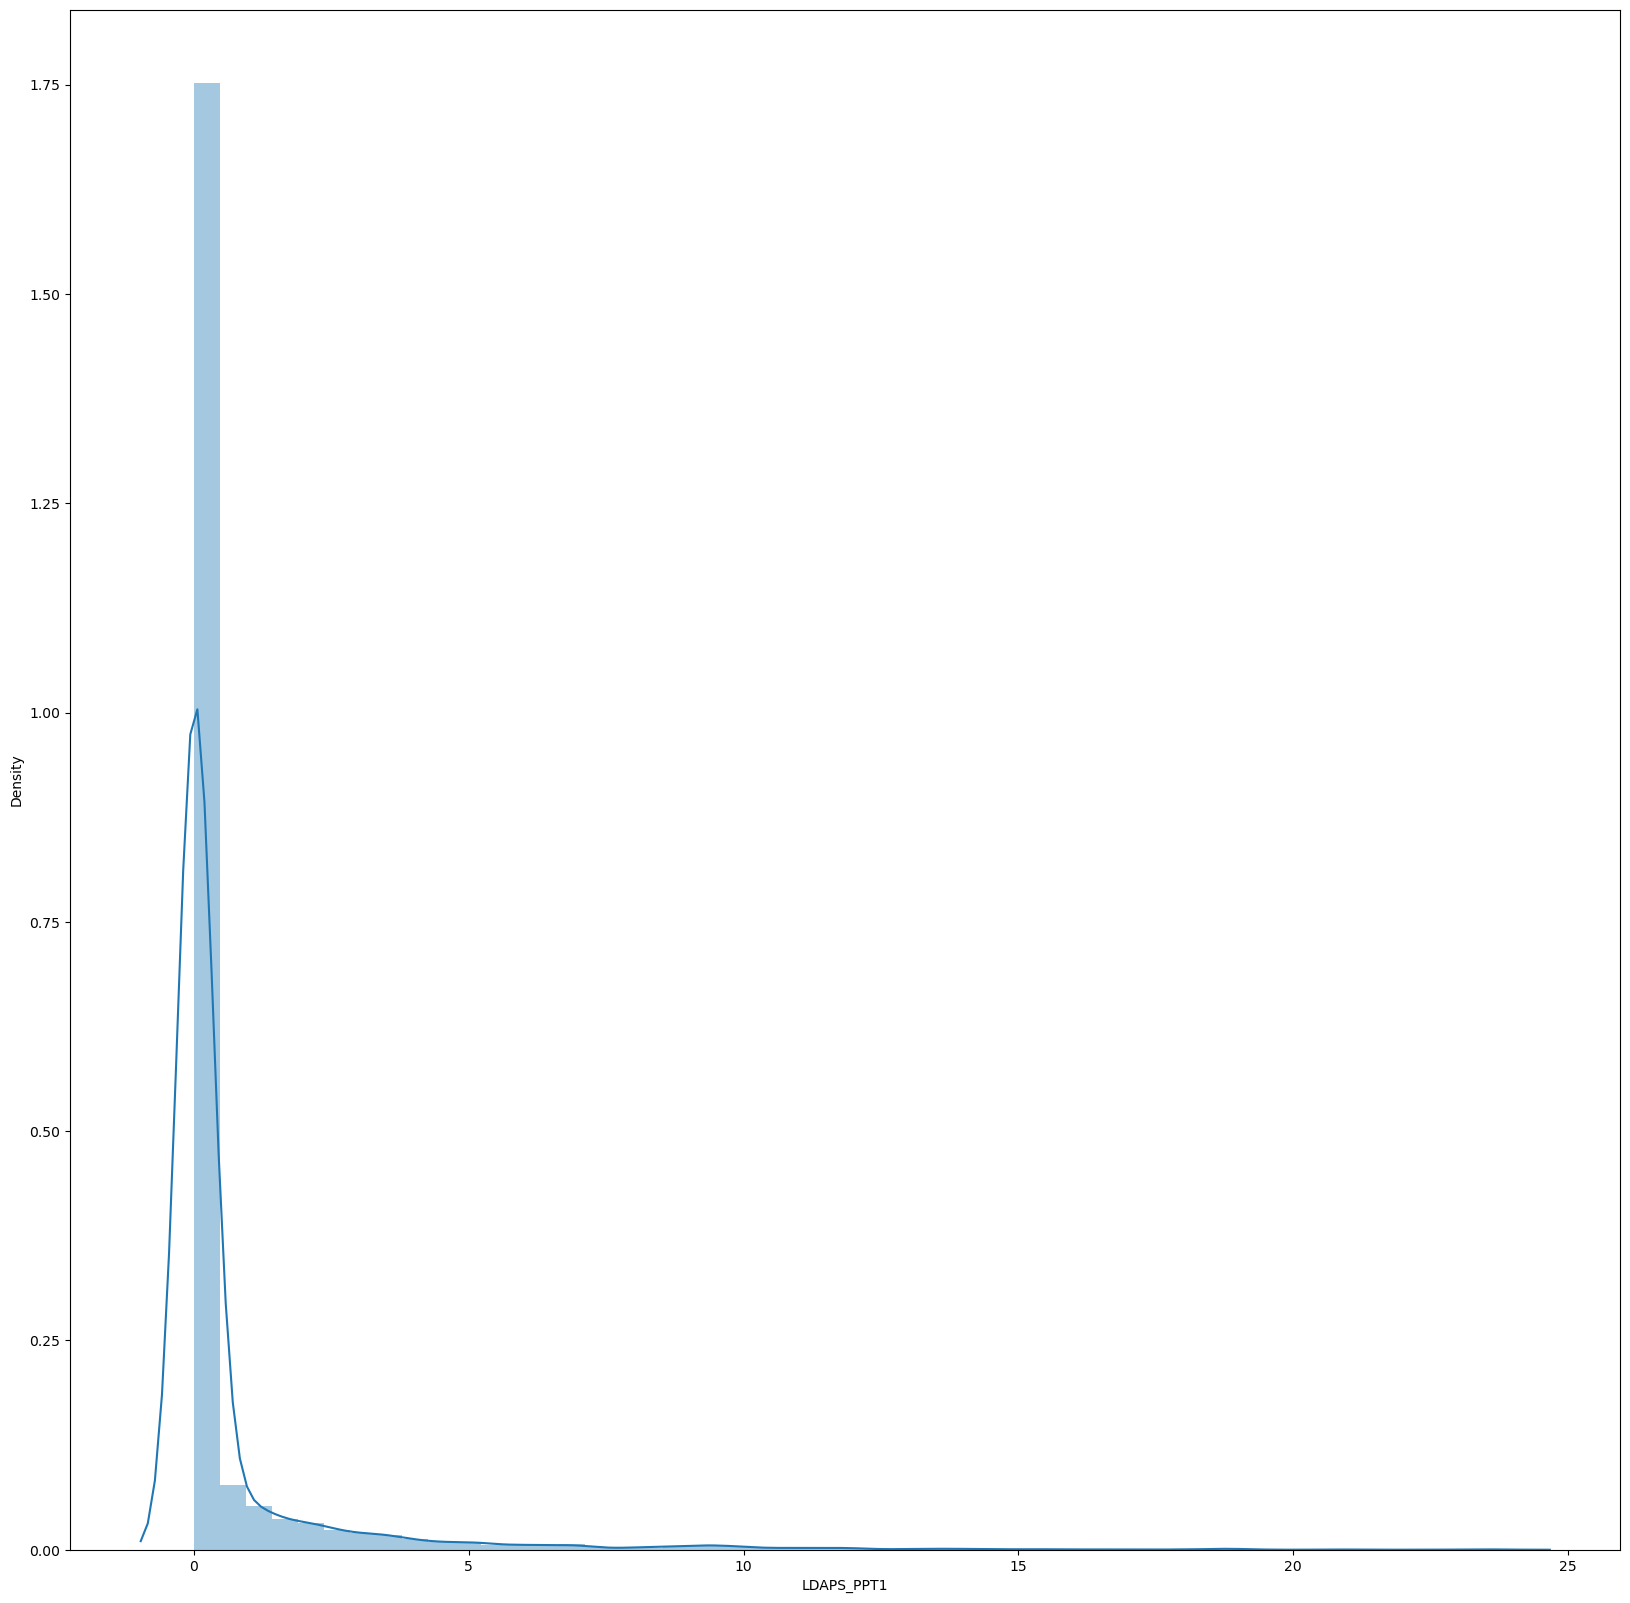

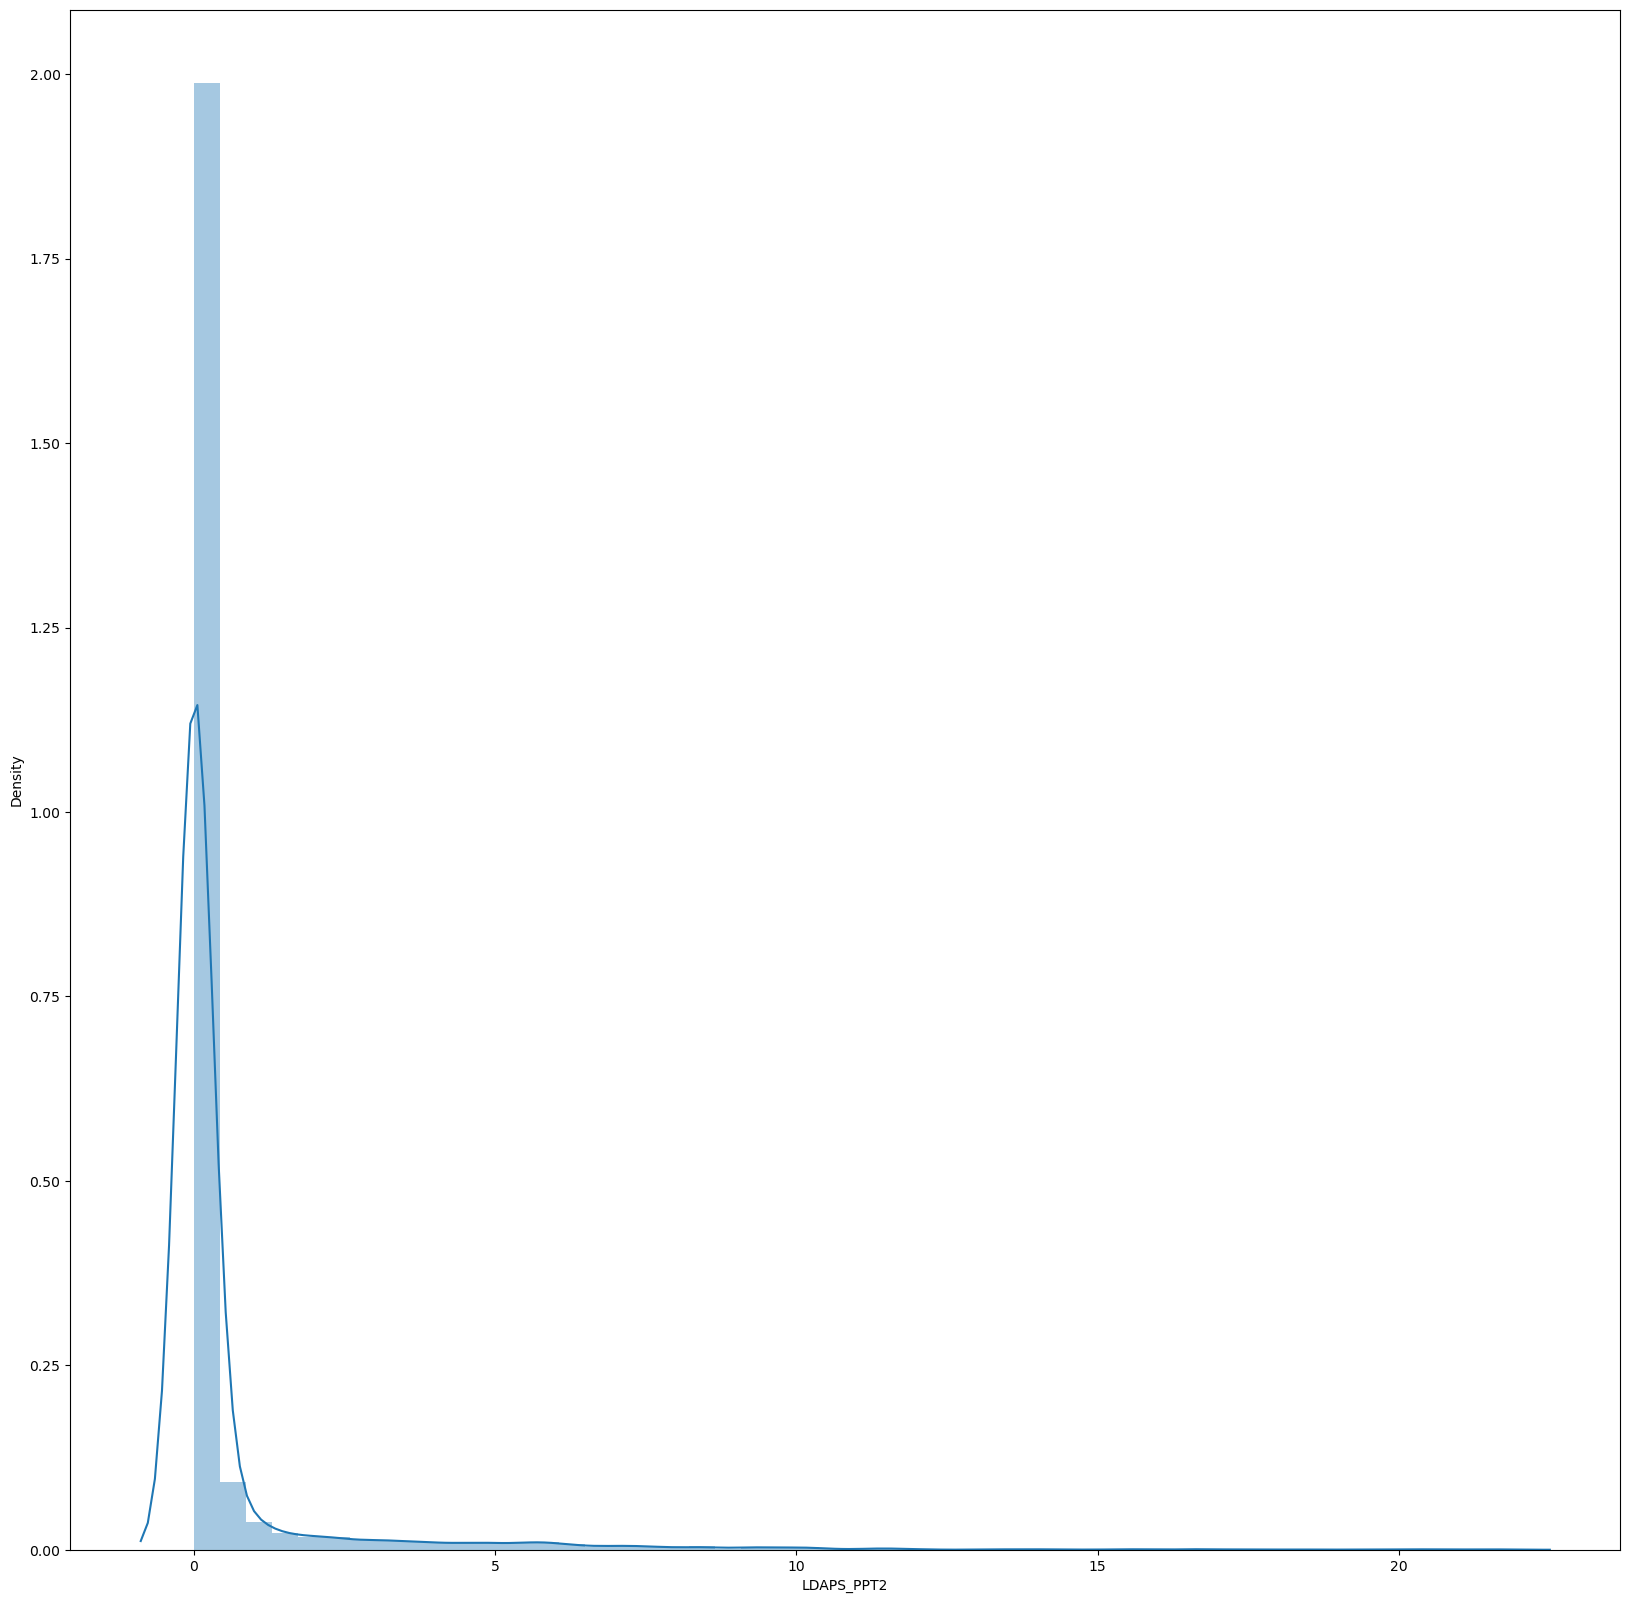

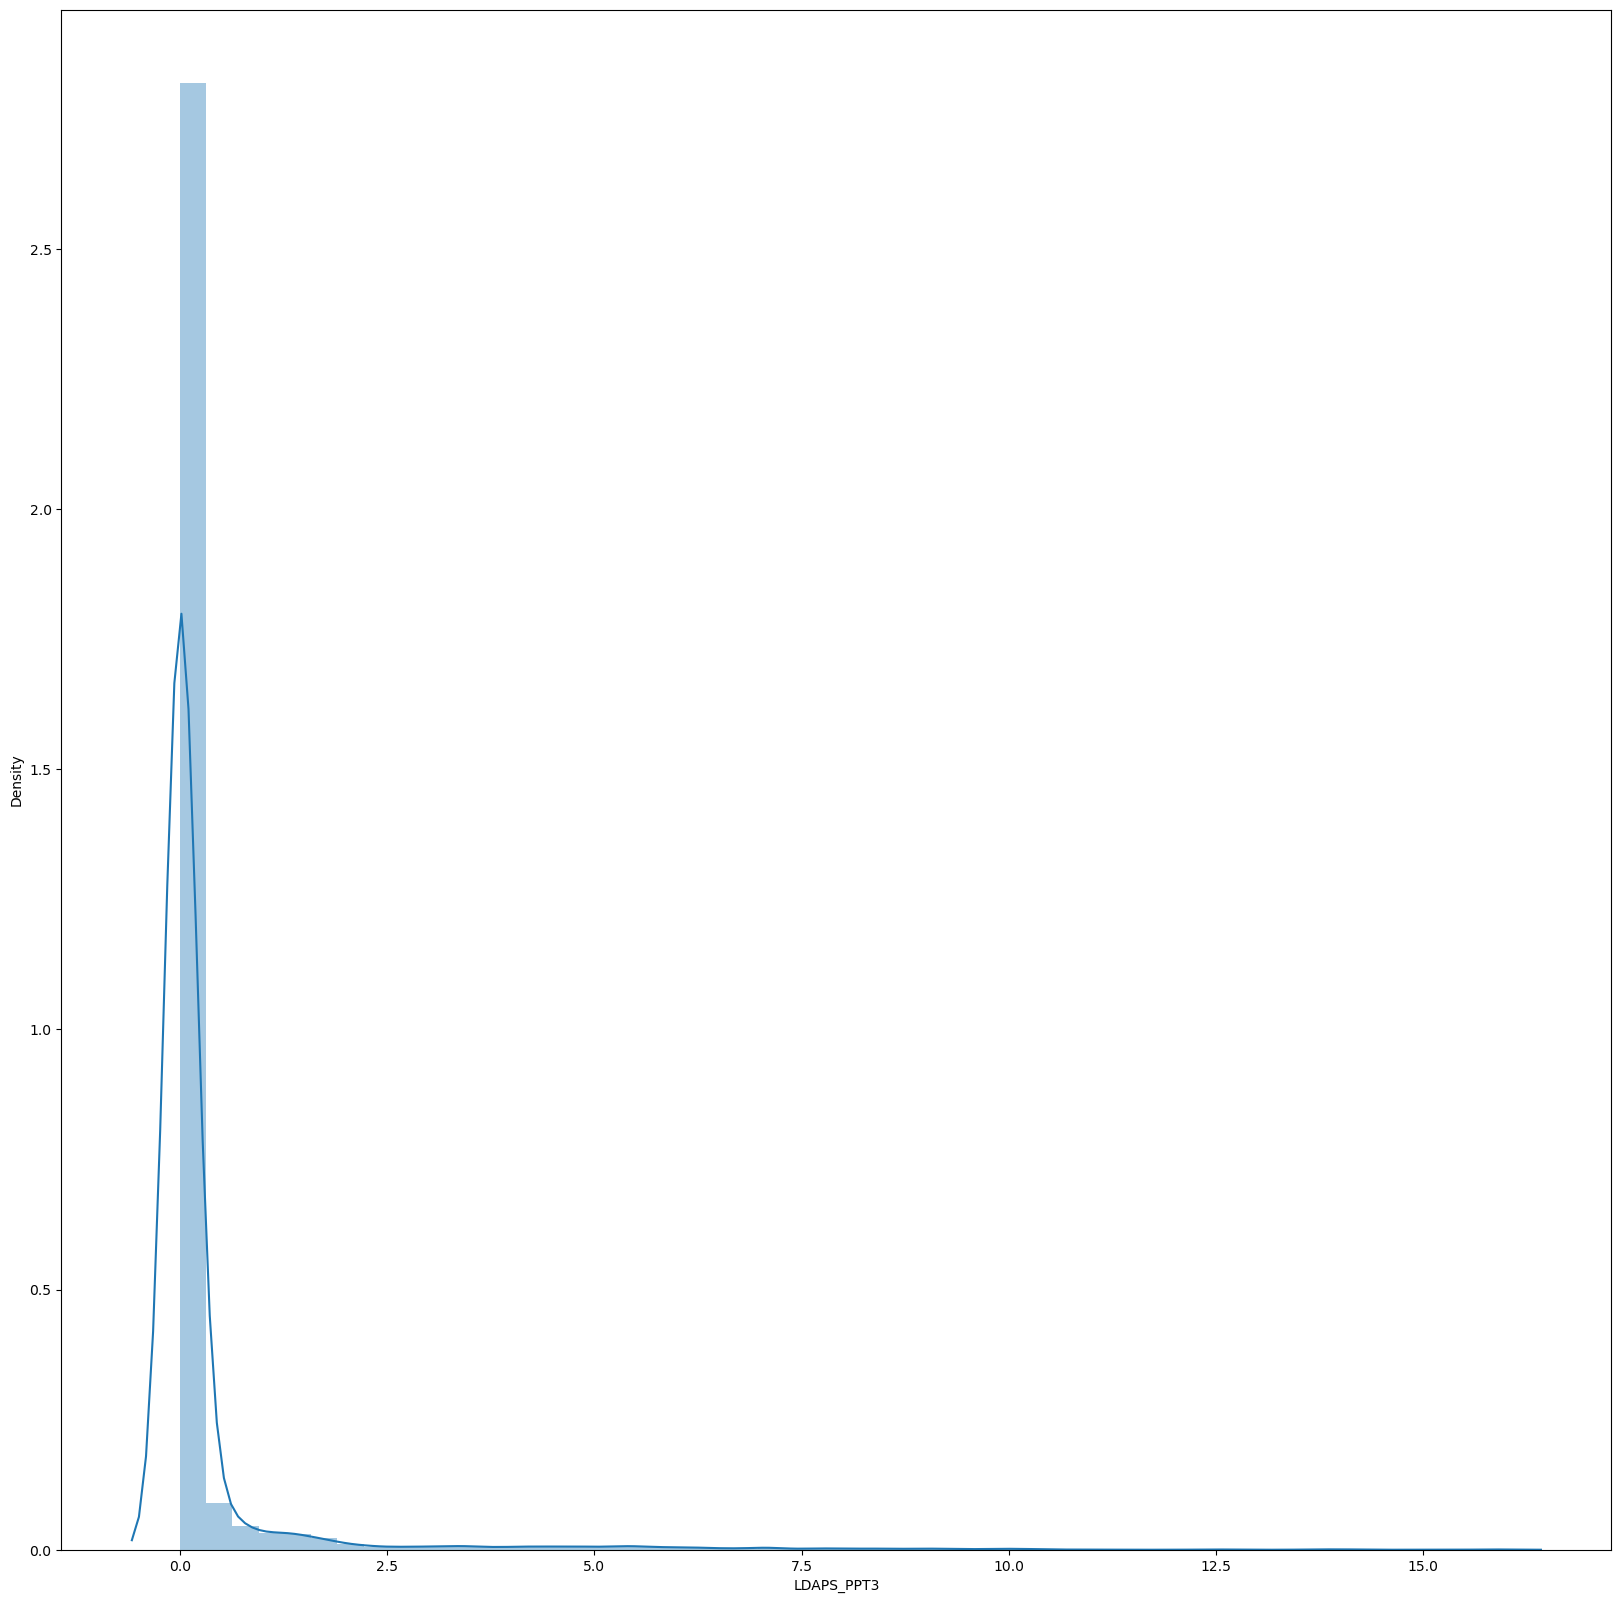

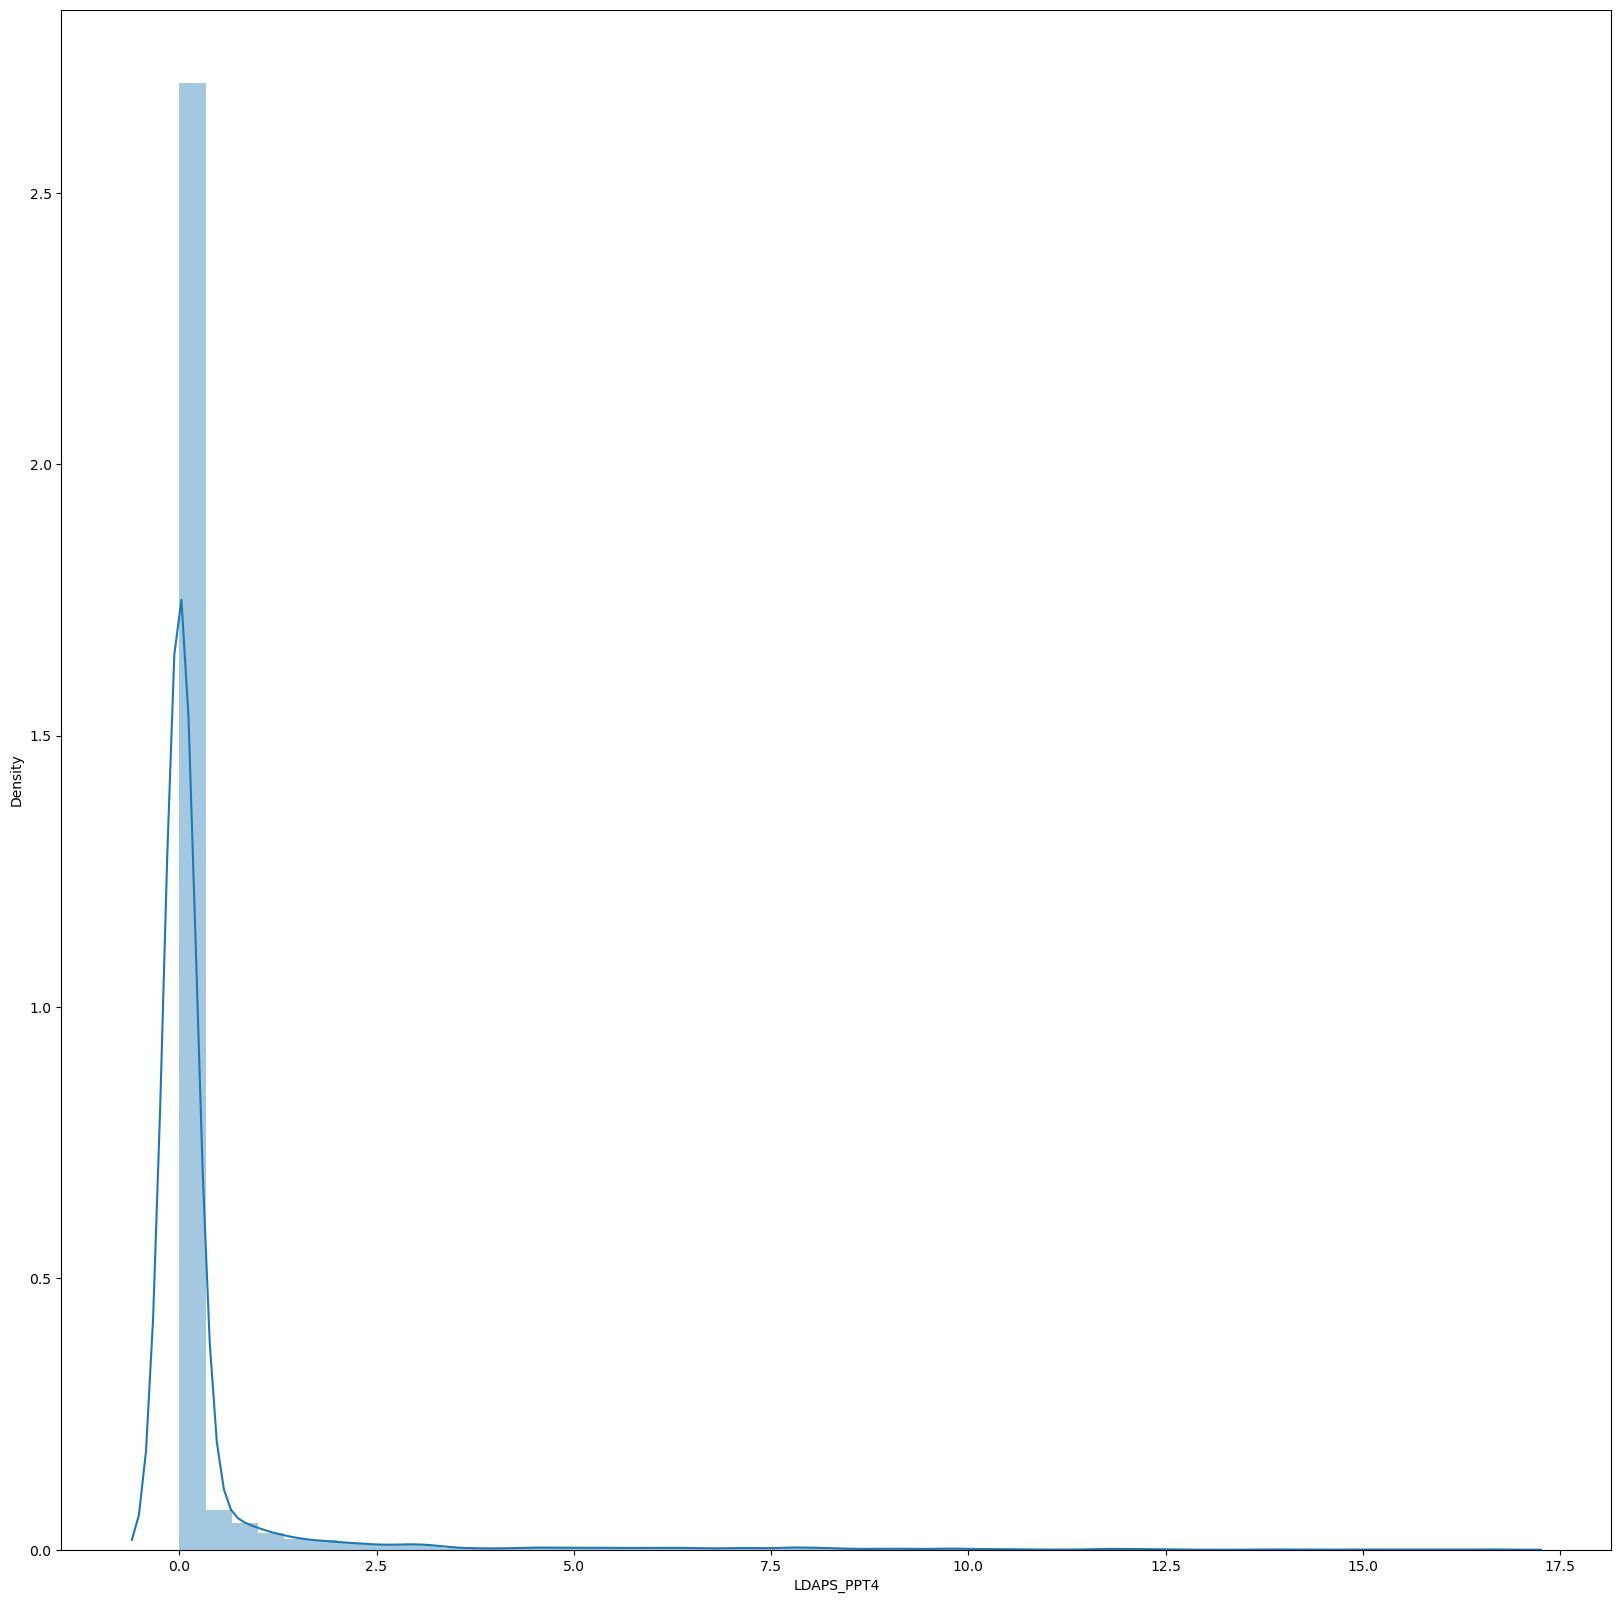

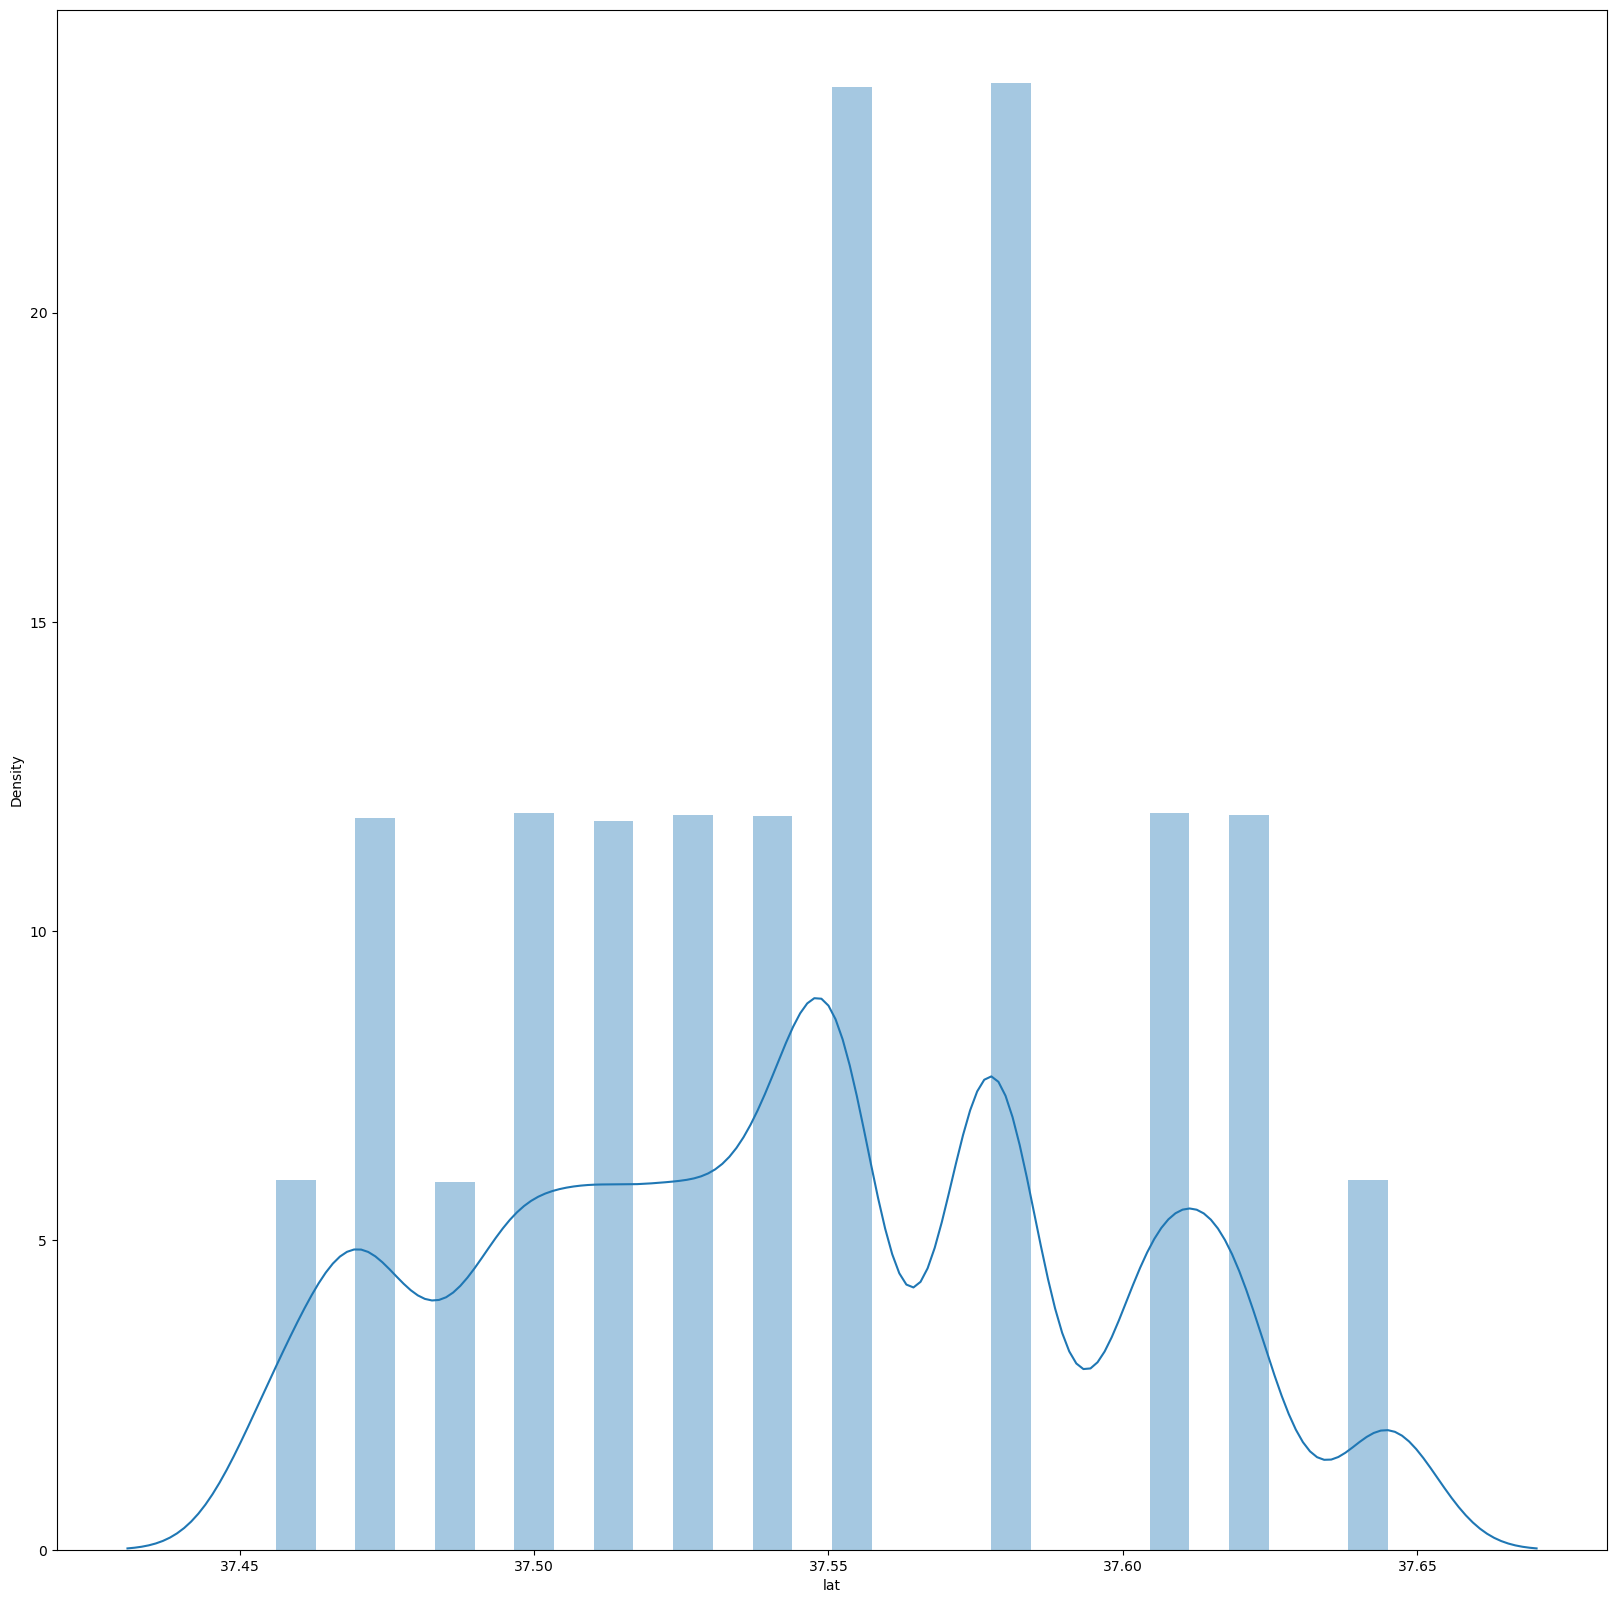

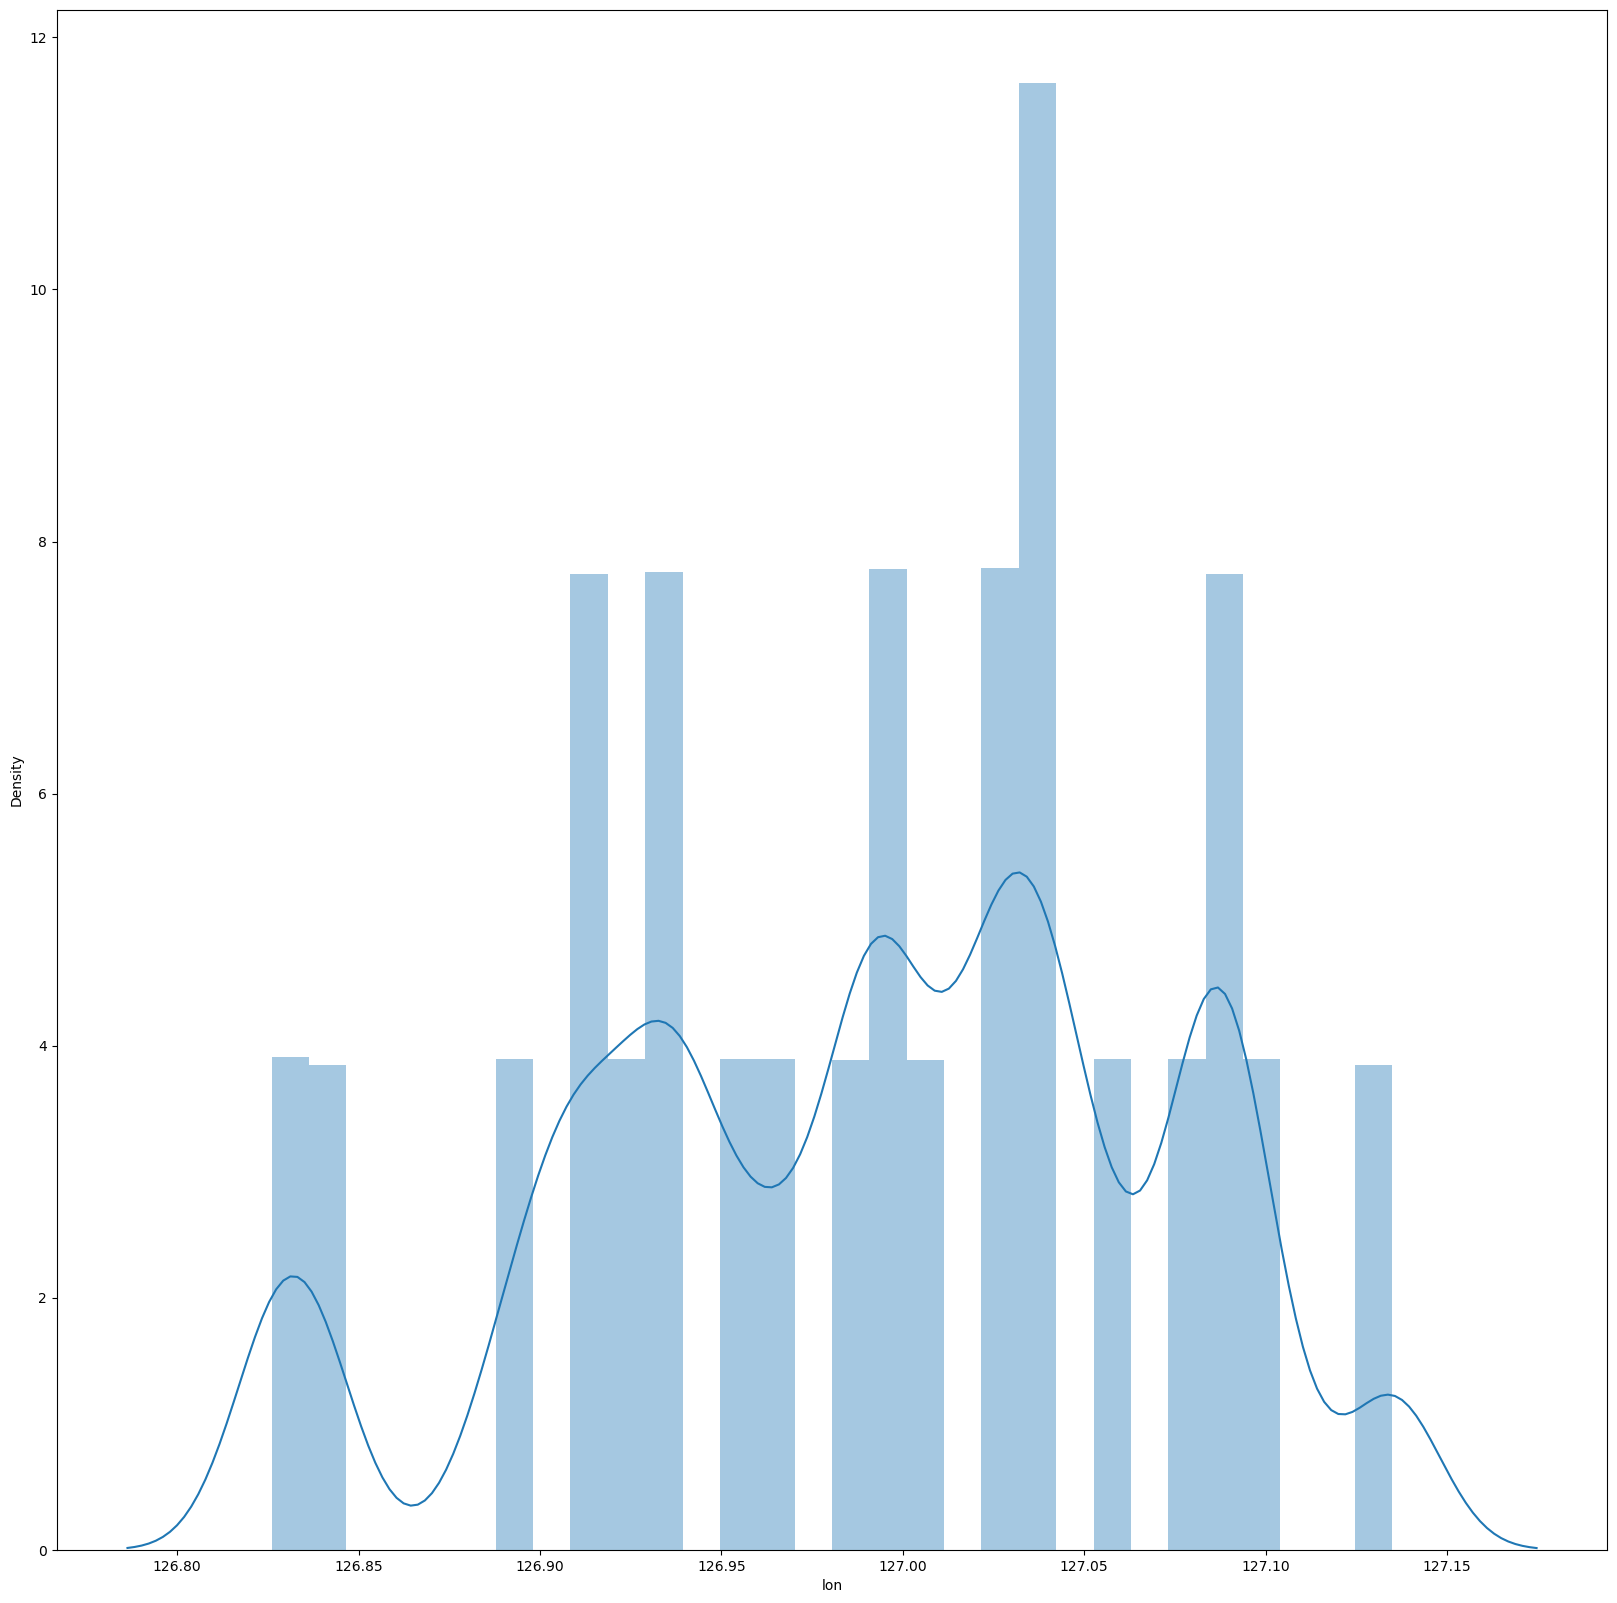

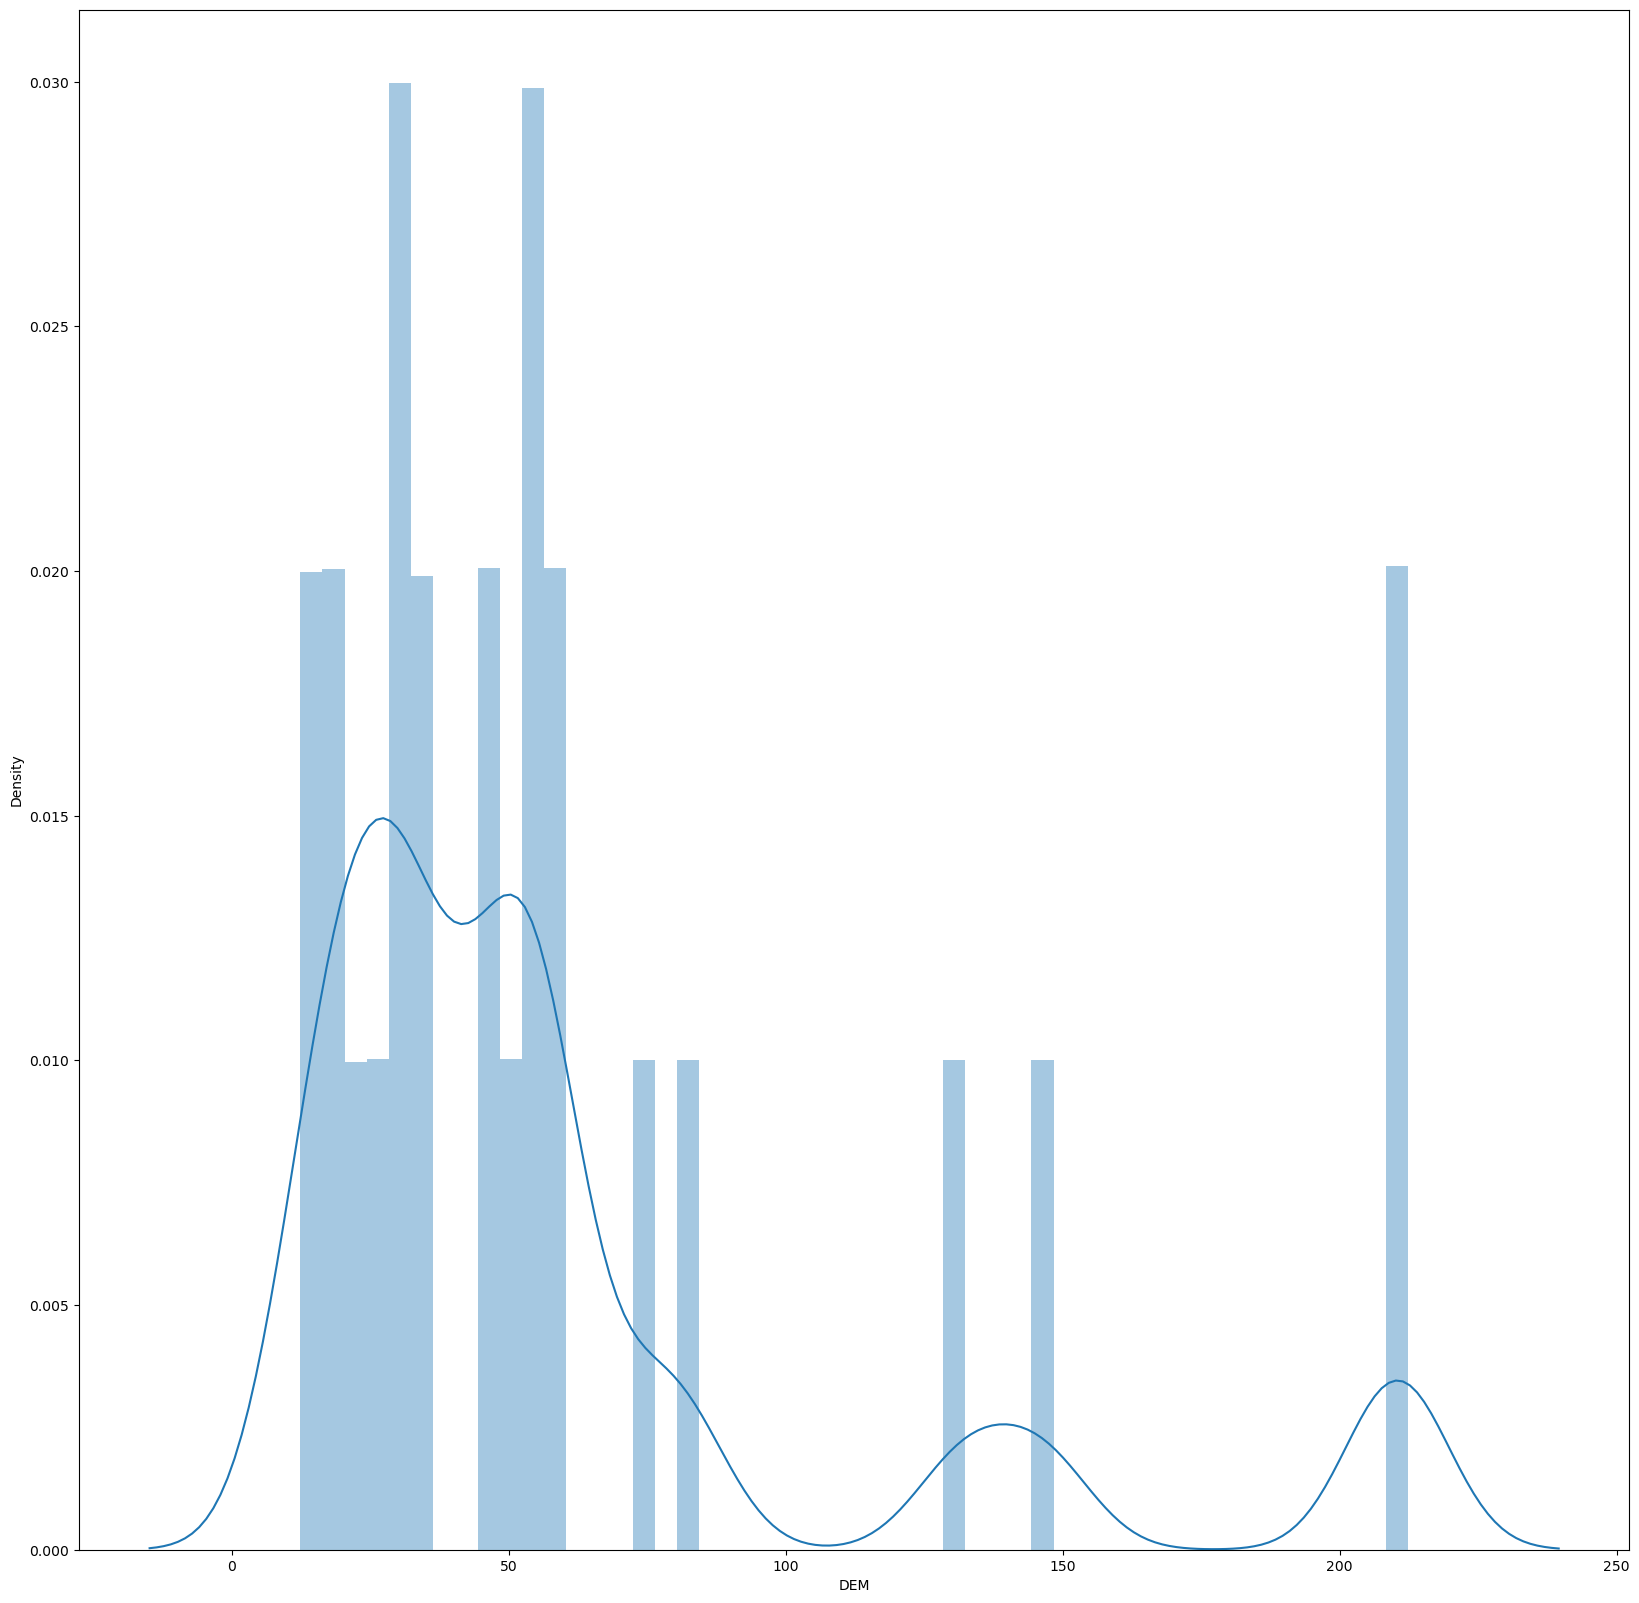

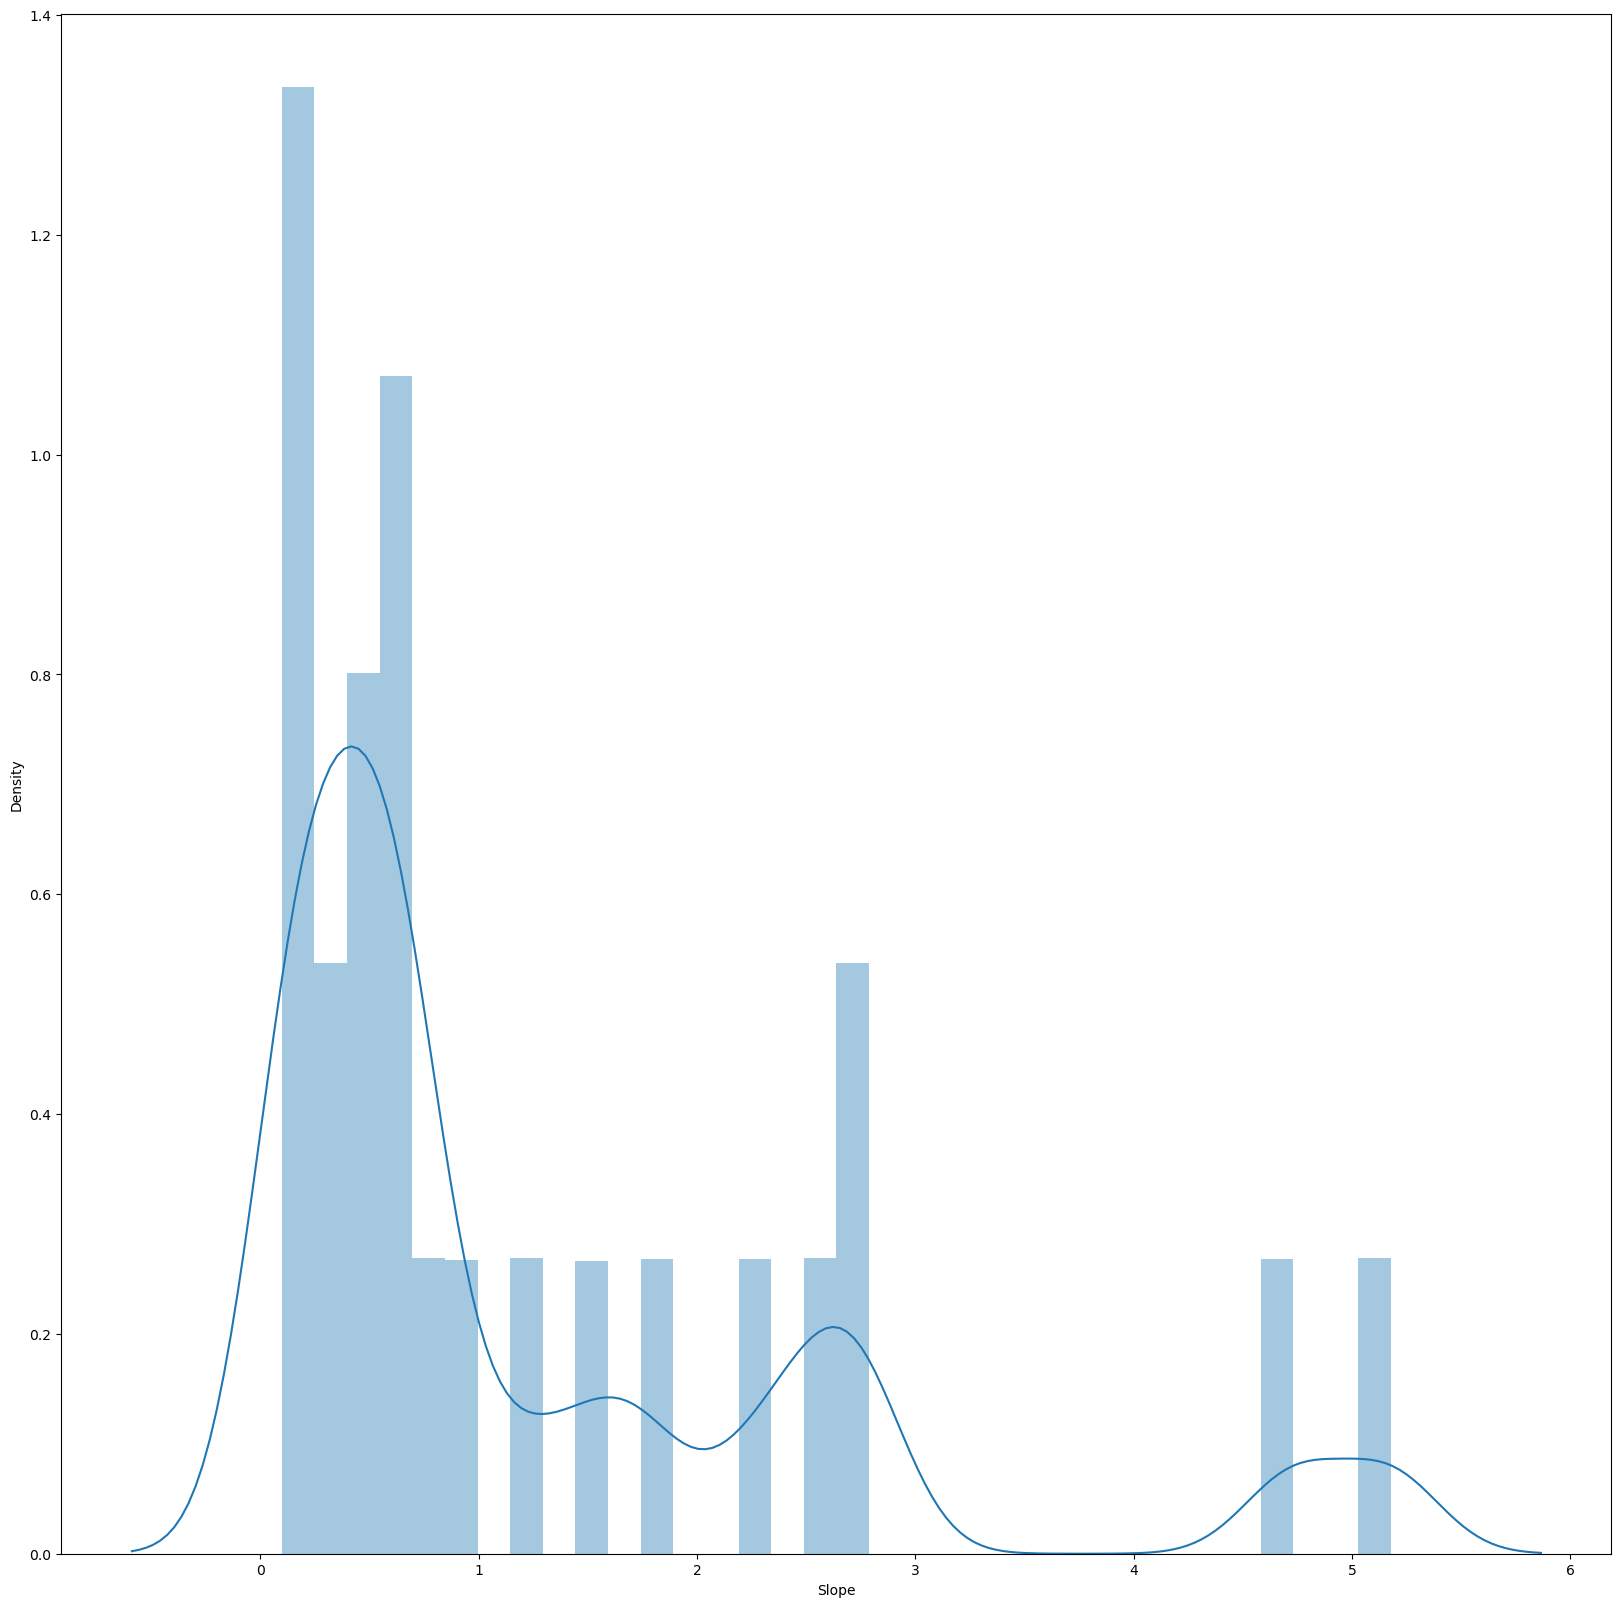

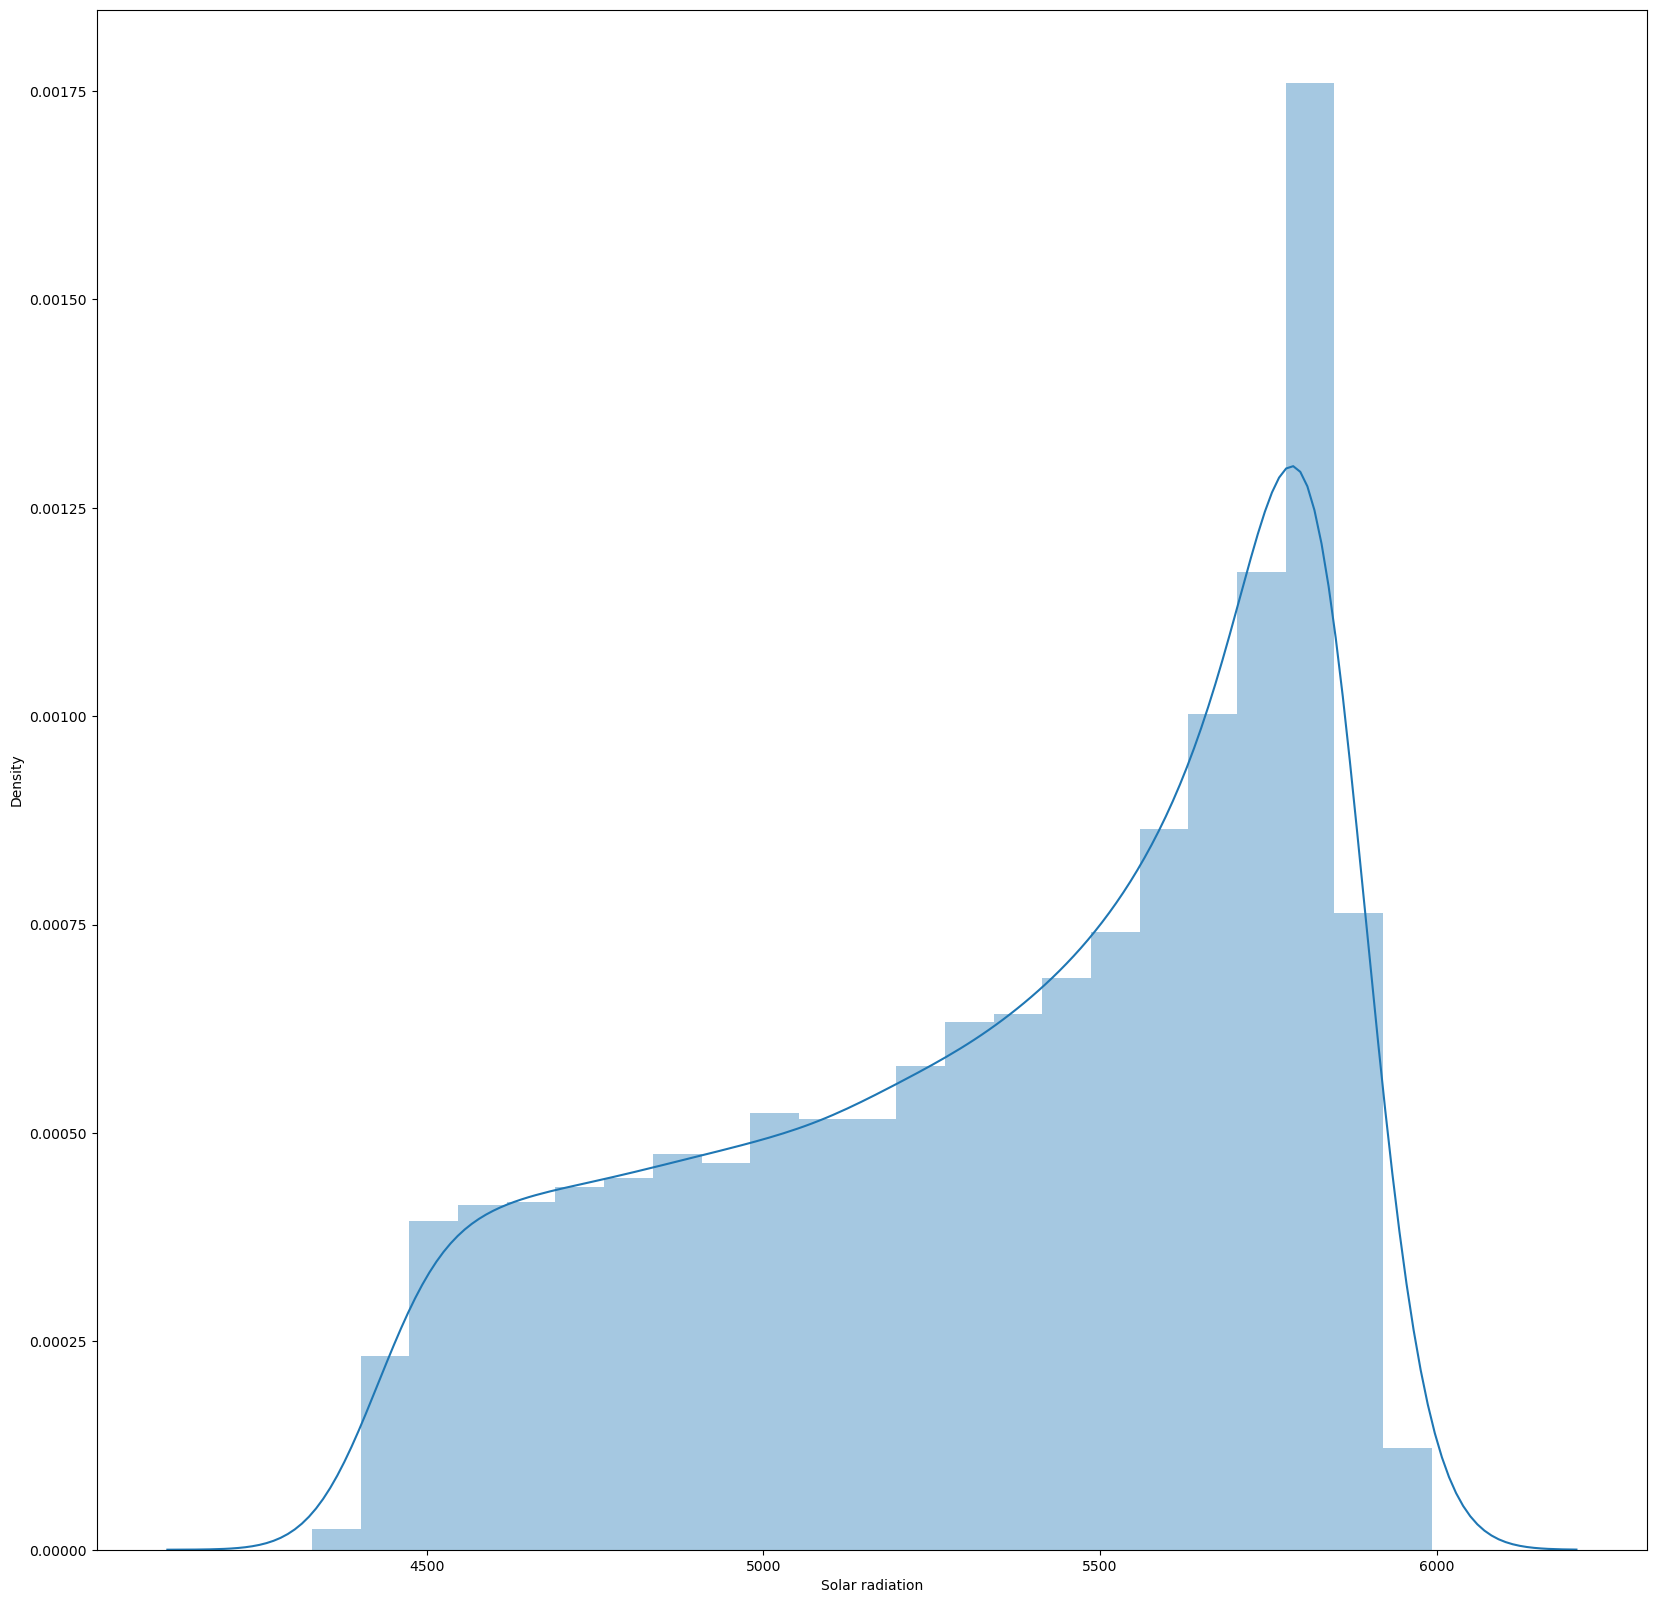

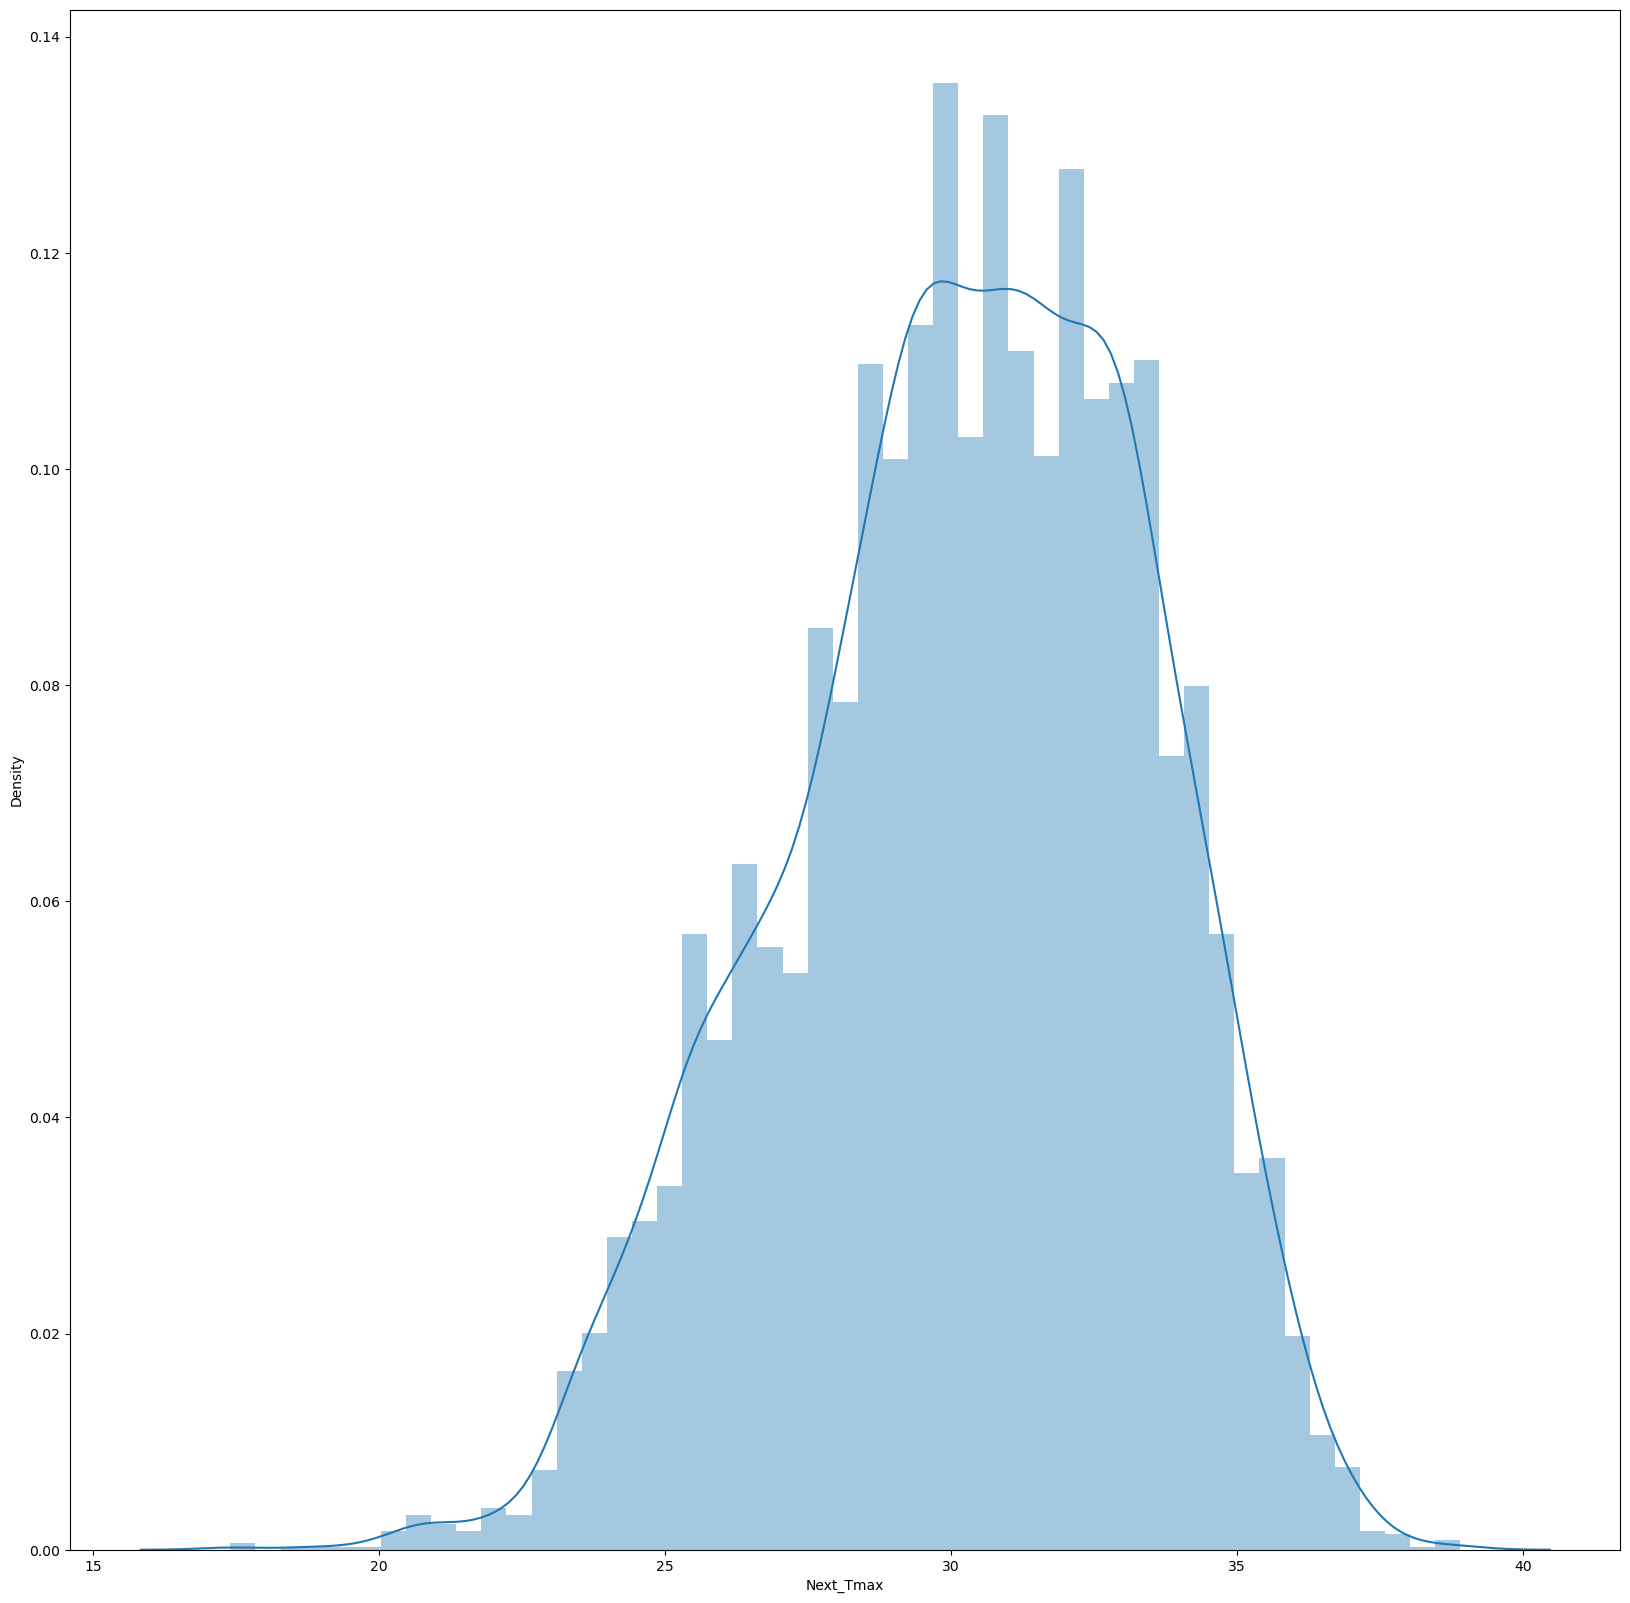

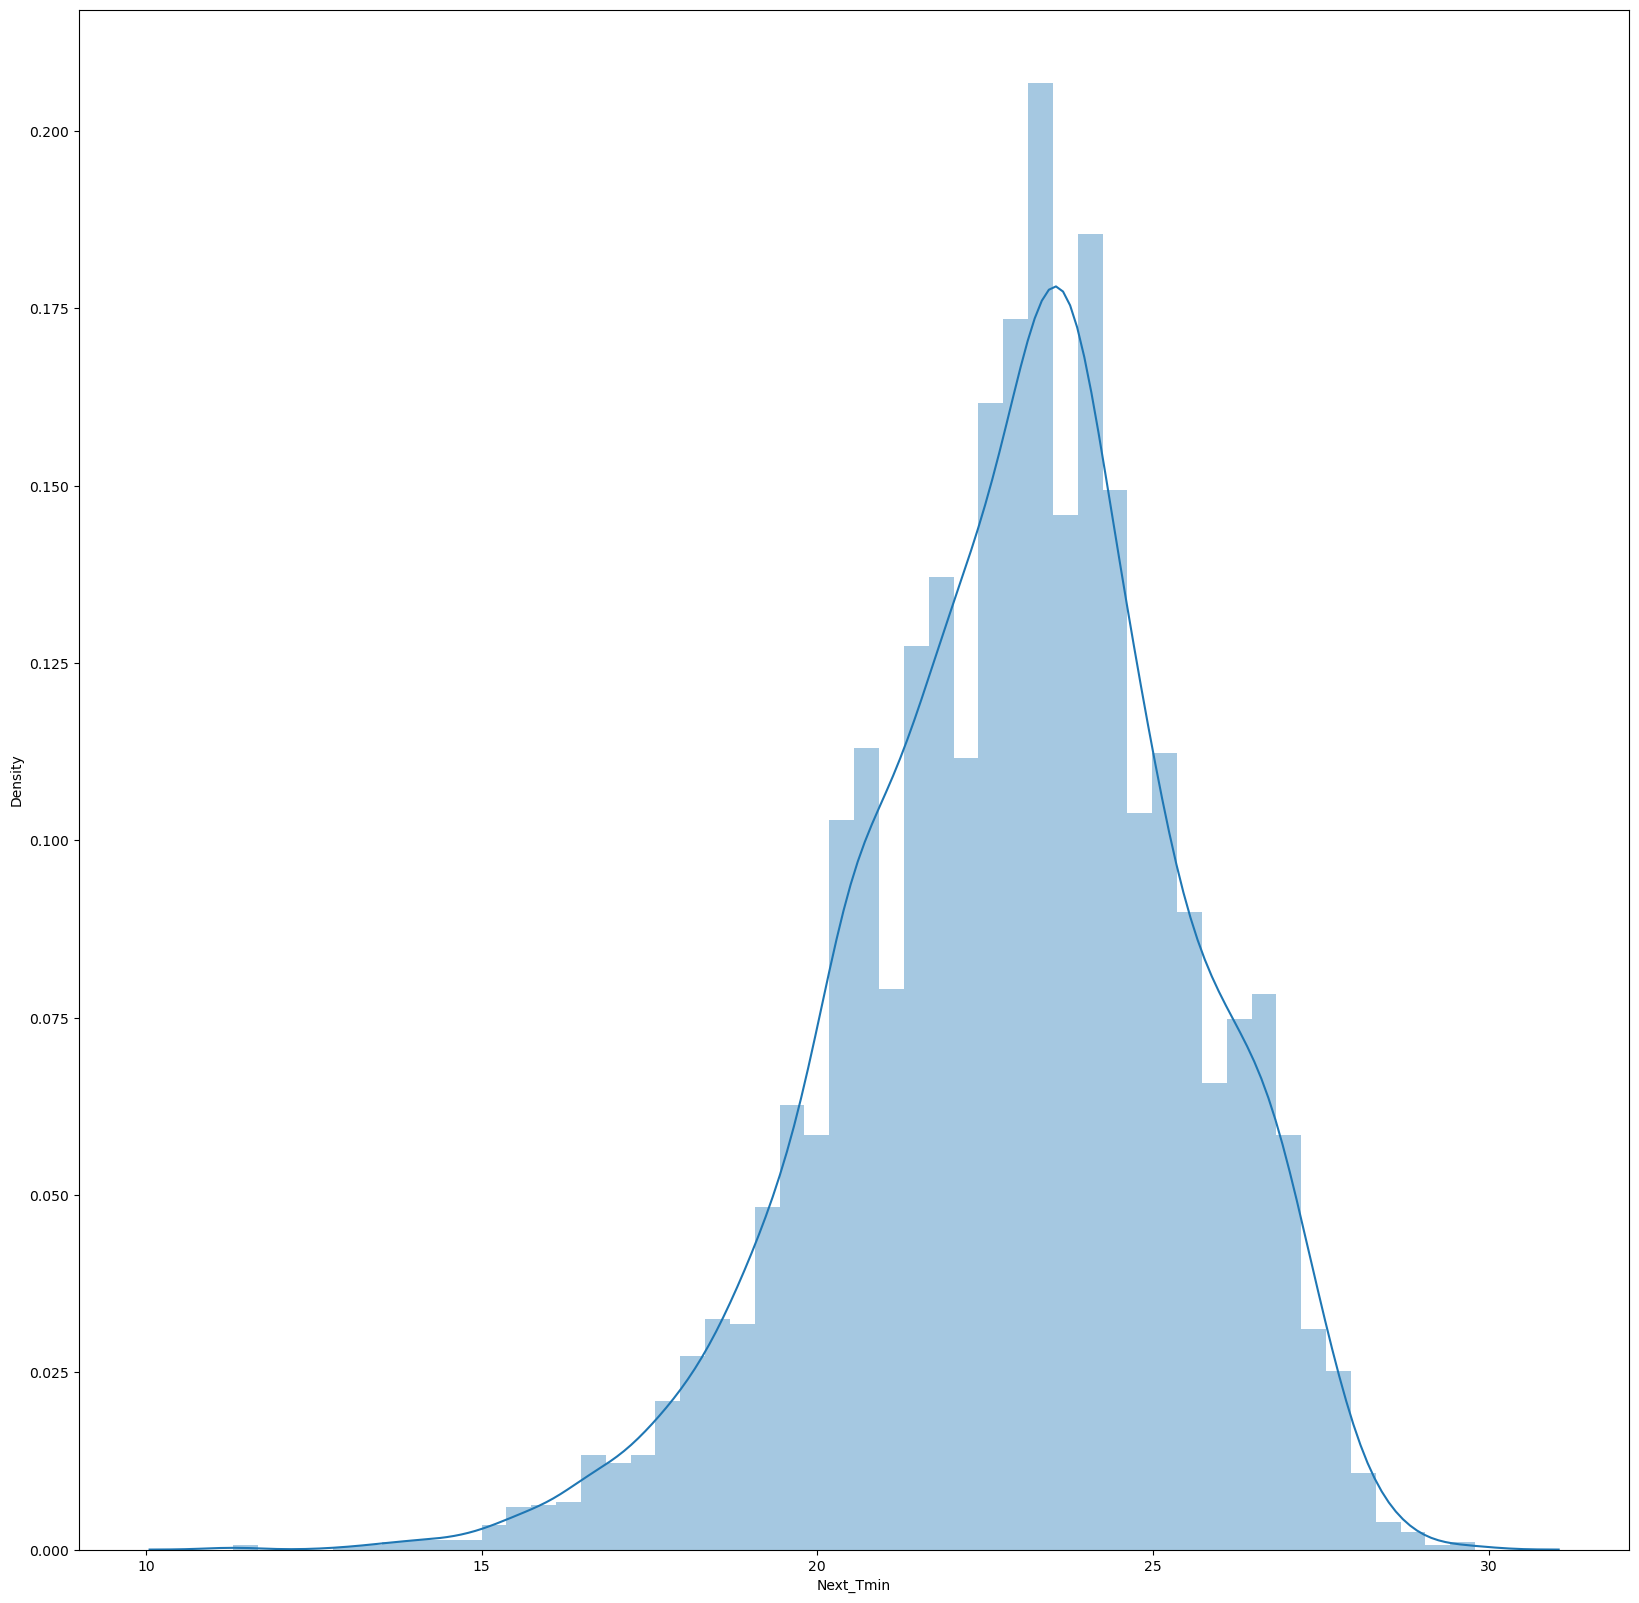

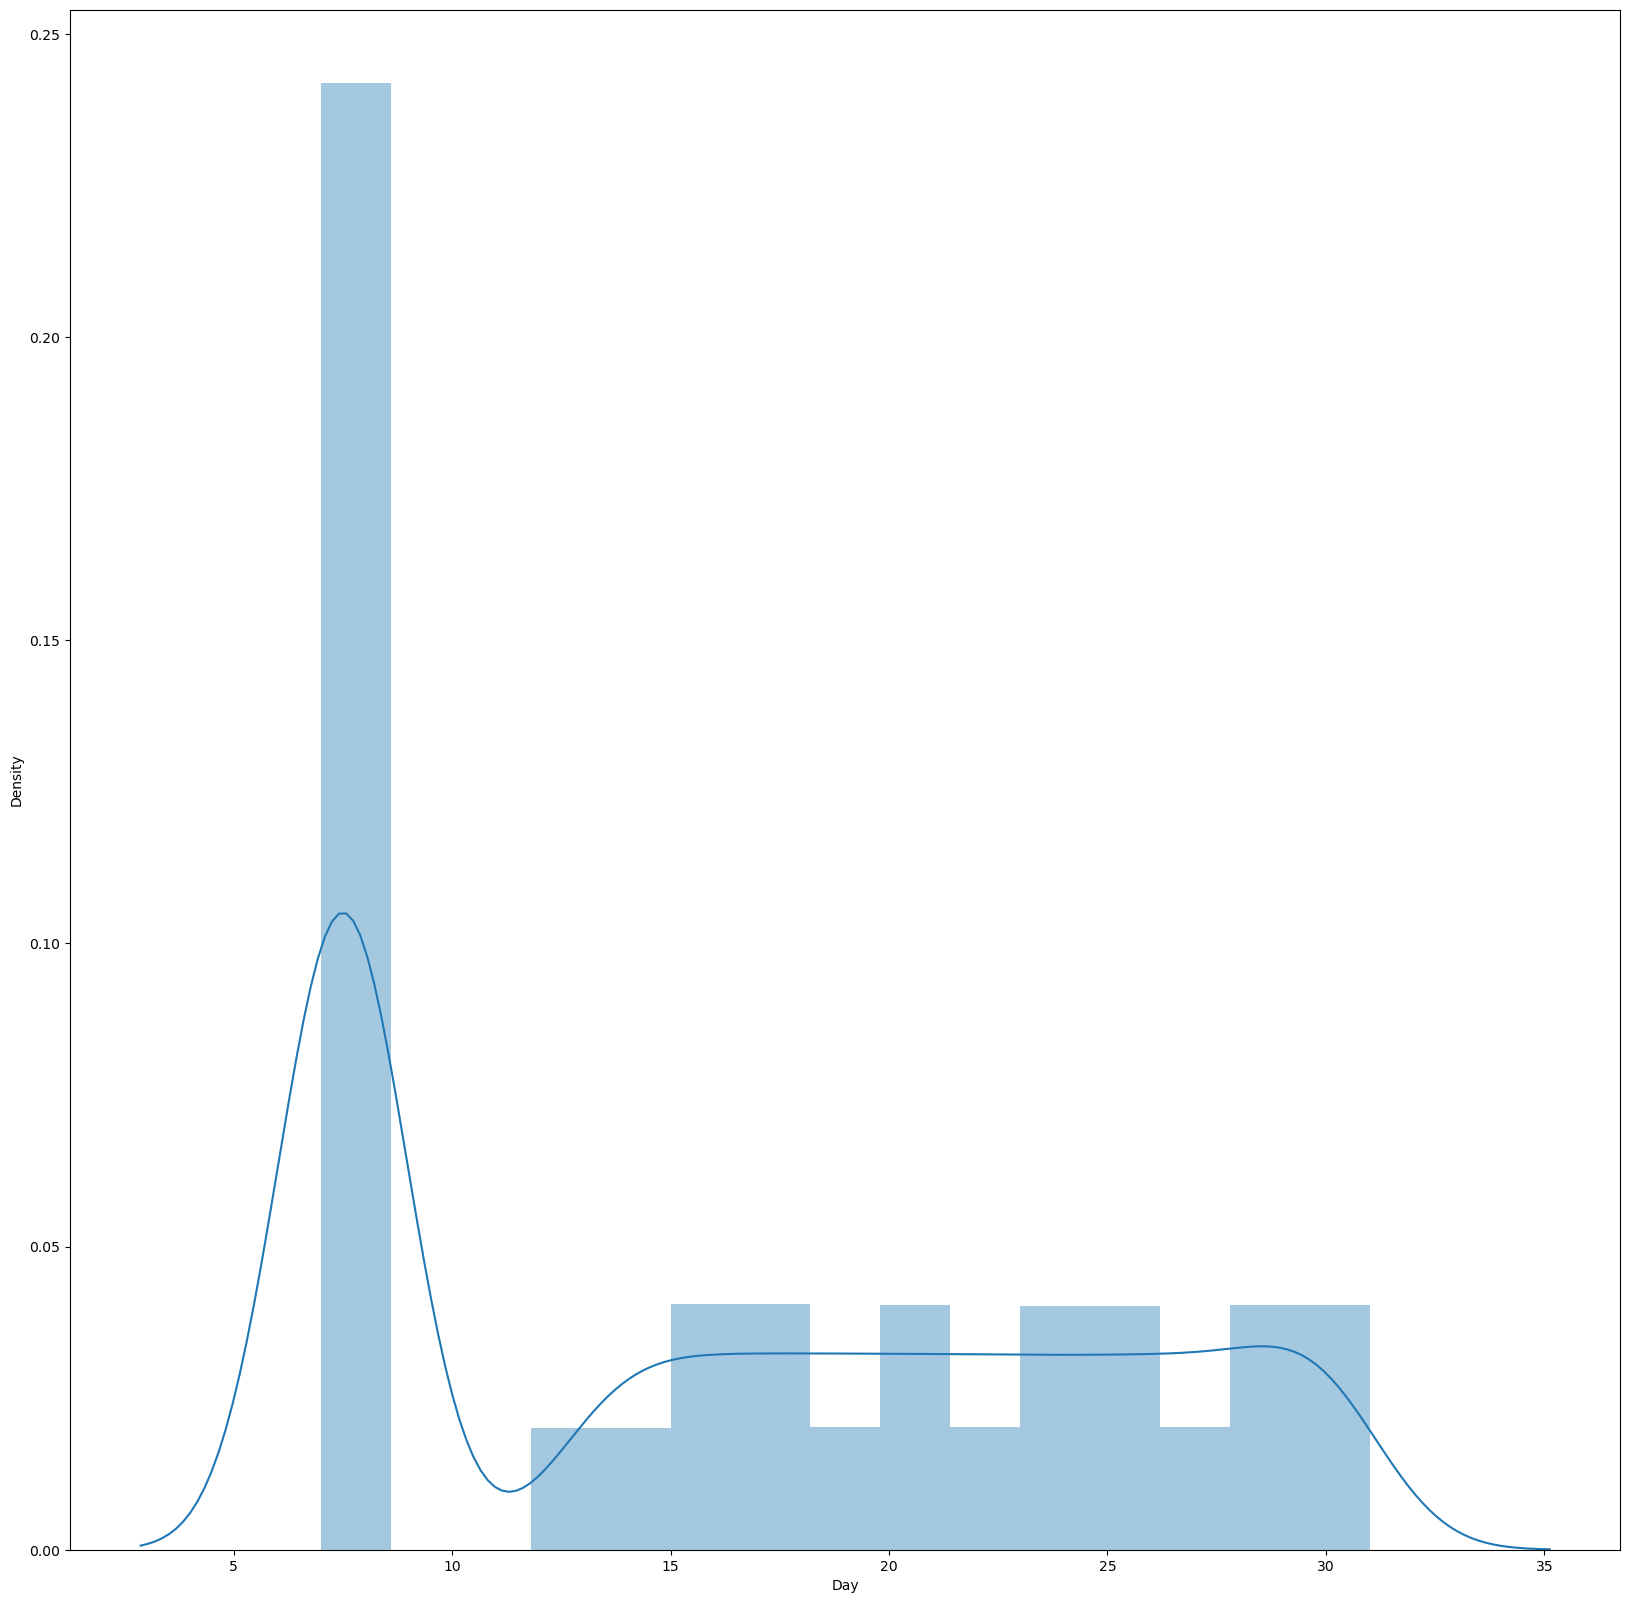

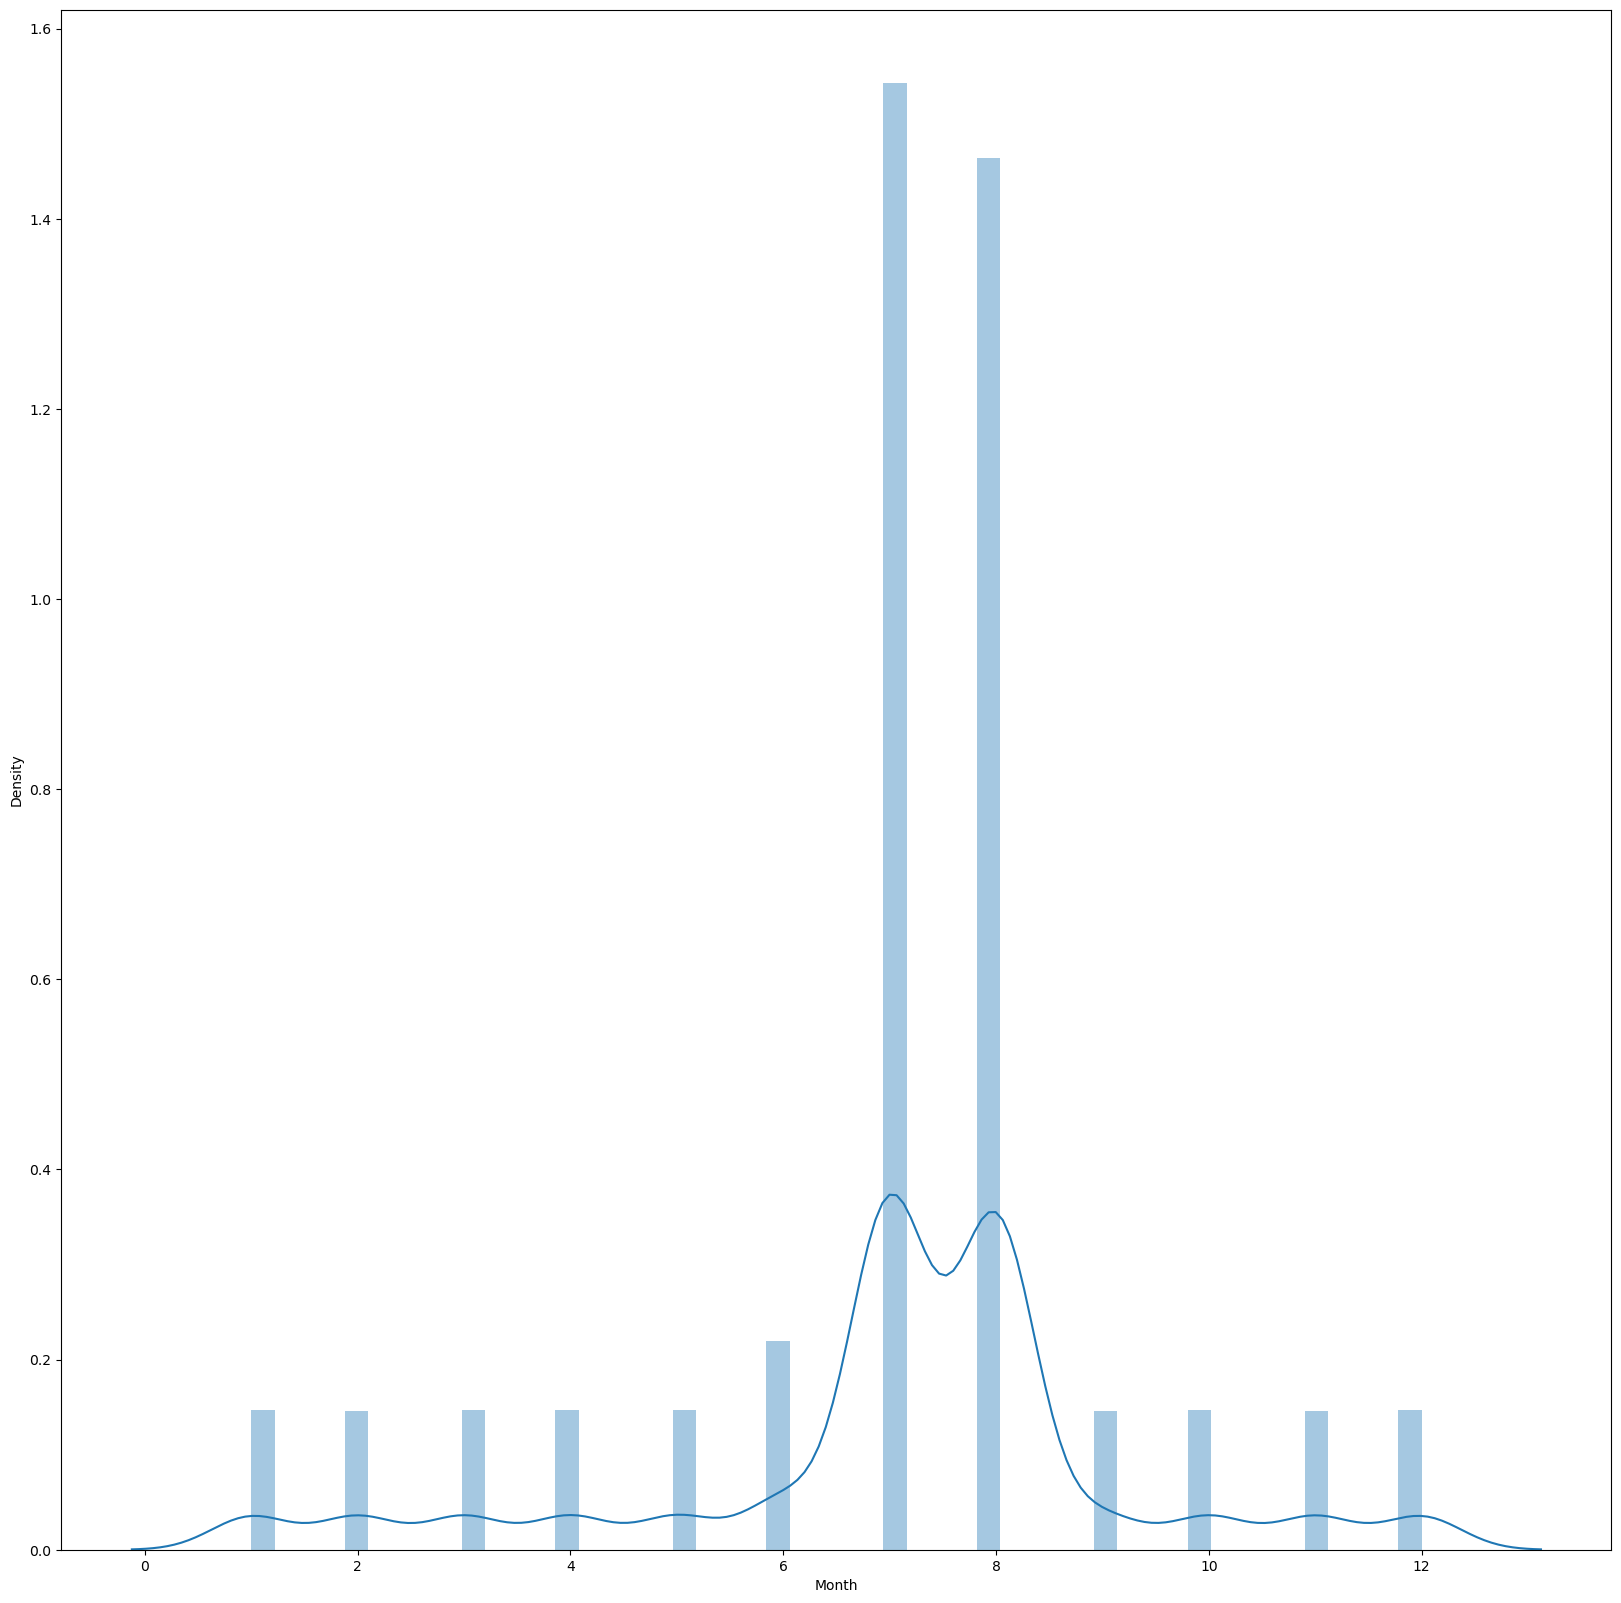

In [35]:
for i in df.columns:
    plt.figure(figsize=[20,20])
    sns.distplot(df[i])
    plt.show()

In [36]:
df.skew()

Present_Tmax       -0.264760
Present_Tmin       -0.366516
LDAPS_RHmin         0.302995
LDAPS_RHmax        -0.854093
LDAPS_Tmax_lapse   -0.227436
LDAPS_Tmin_lapse   -0.580638
LDAPS_WS            1.581481
LDAPS_LH            0.673051
LDAPS_CC1           0.460584
LDAPS_CC2           0.475248
LDAPS_CC3           0.642254
LDAPS_CC4           0.666292
LDAPS_PPT1          5.399236
LDAPS_PPT2          5.782965
LDAPS_PPT3          6.469486
LDAPS_PPT4          6.833840
lat                 0.086587
lon                -0.286558
DEM                 1.721056
Slope               1.560549
Solar radiation    -0.513787
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Day                 0.245415
Month              -0.704328
dtype: float64

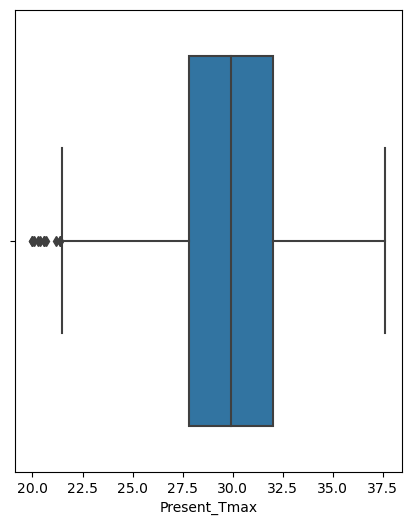

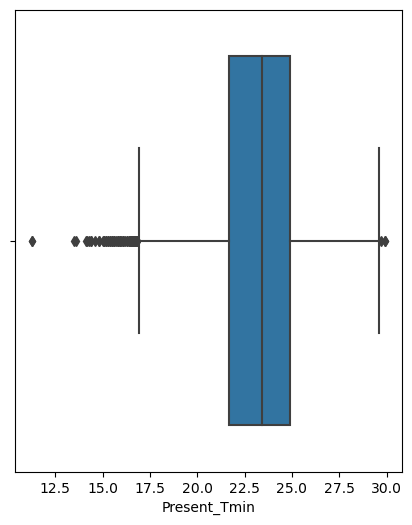

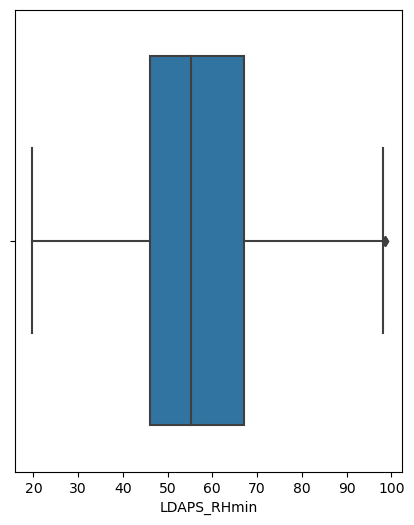

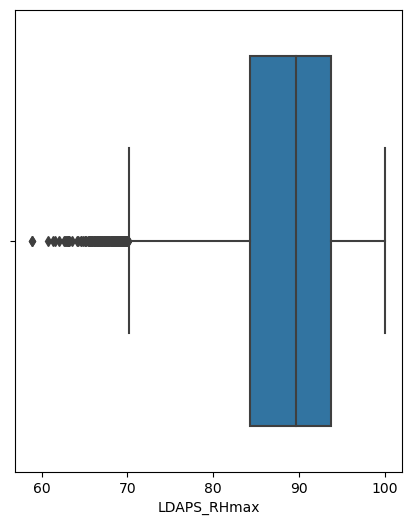

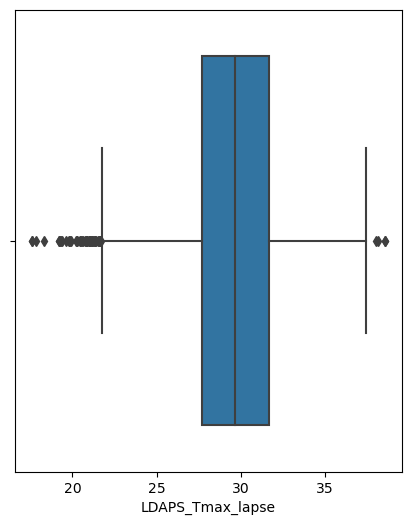

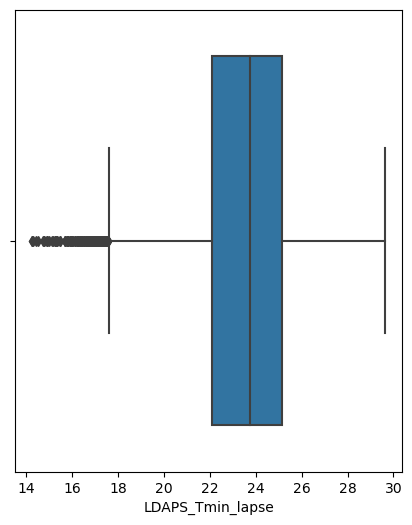

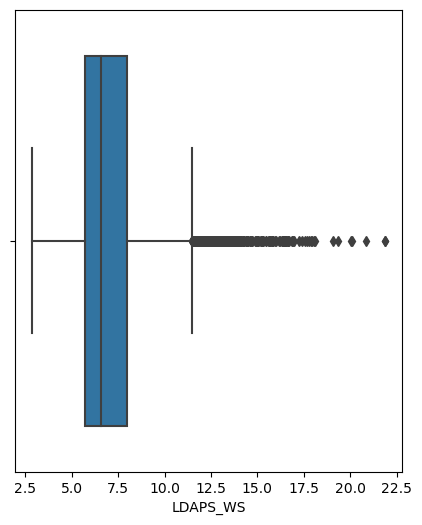

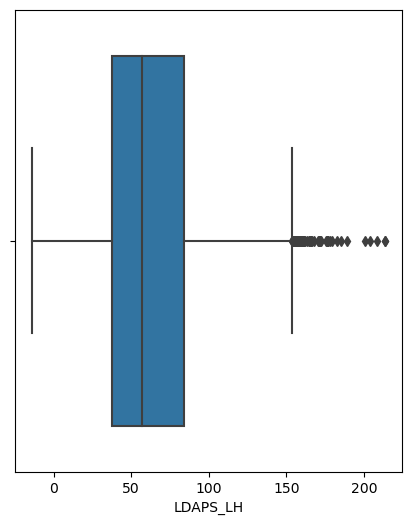

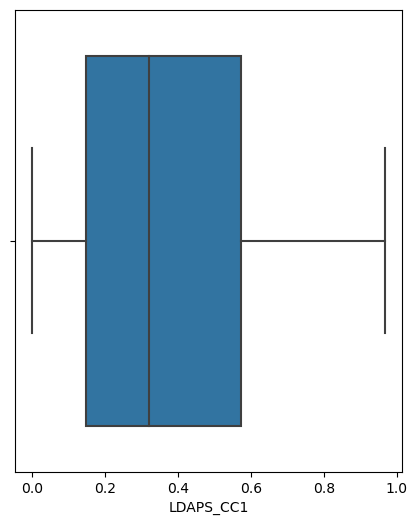

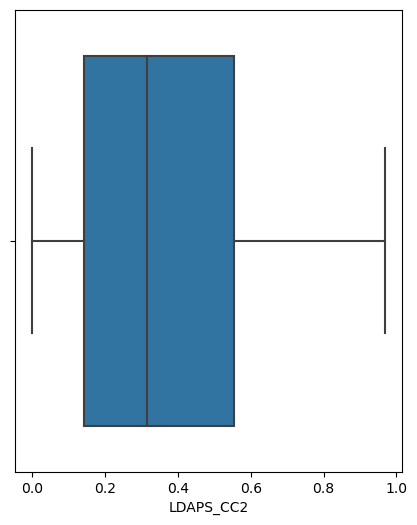

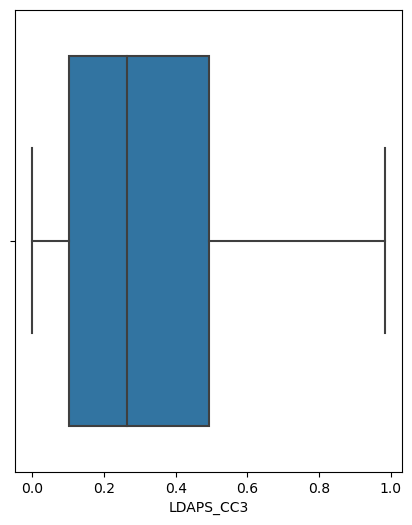

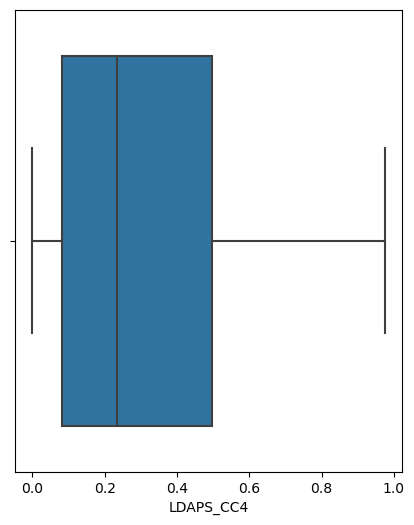

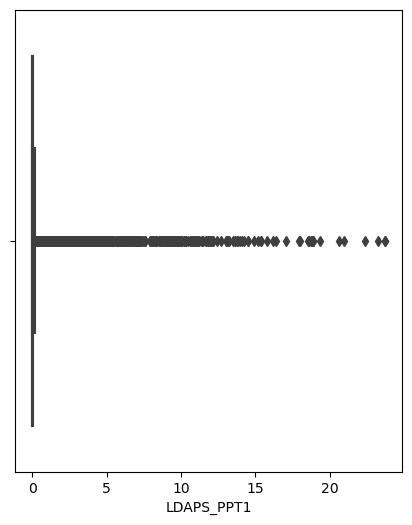

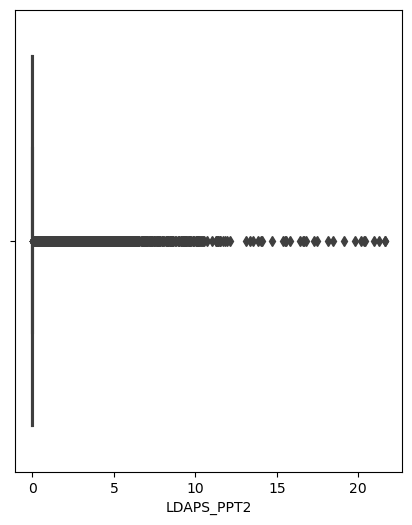

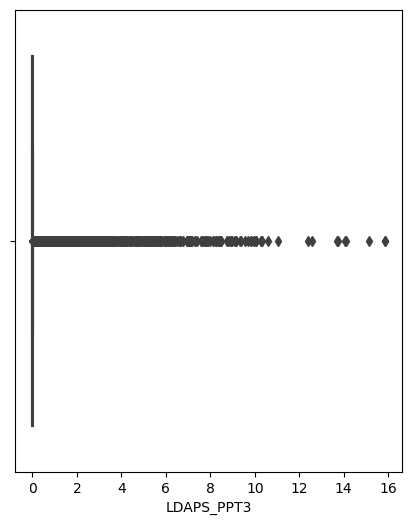

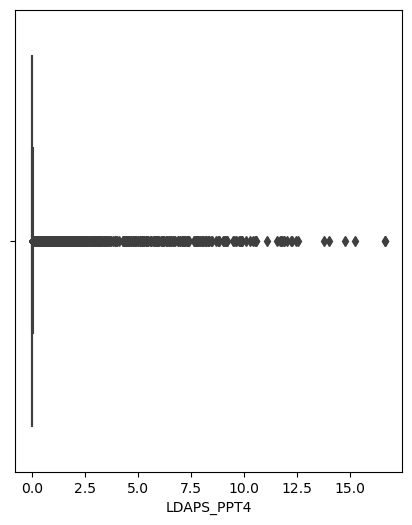

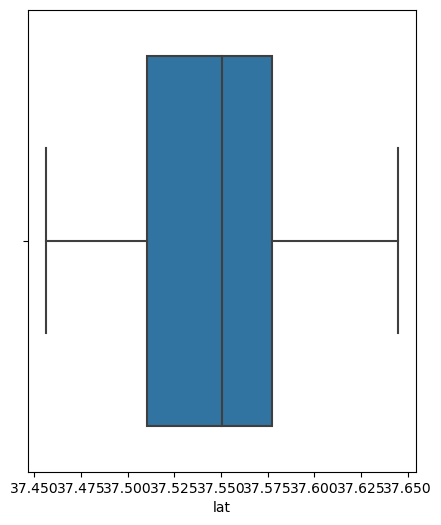

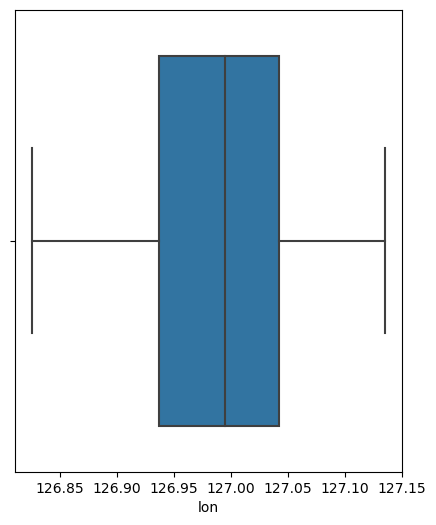

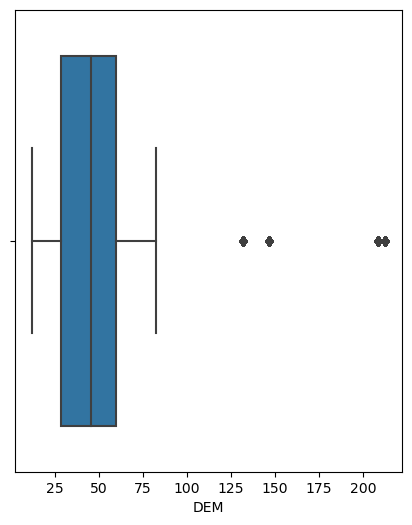

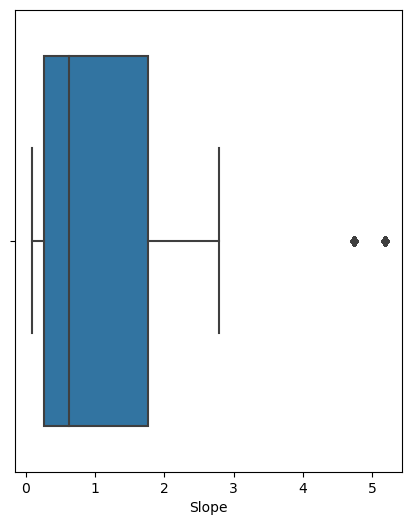

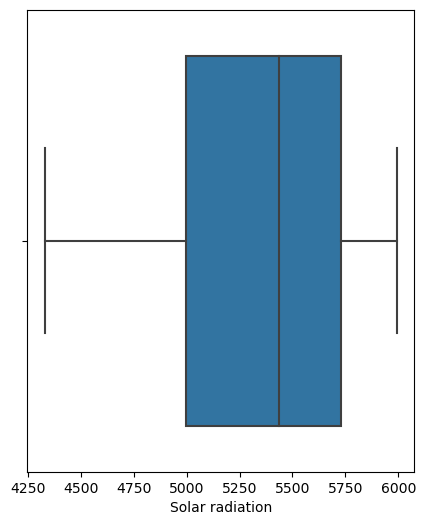

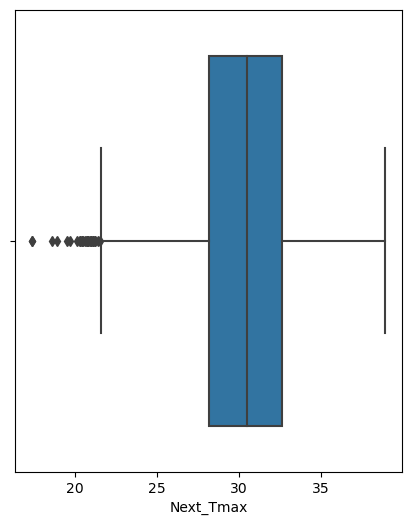

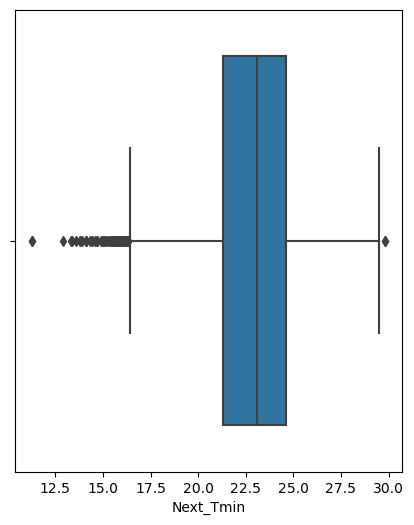

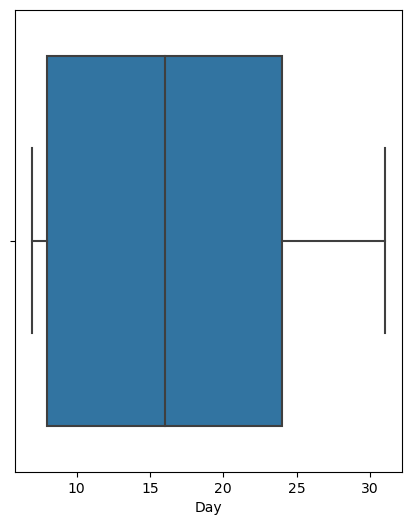

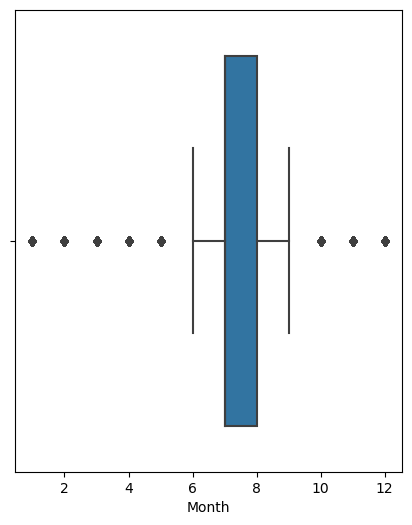

In [37]:
for i in df.columns:
    plt.figure(figsize=[5,6])
    sns.boxplot(df[i])
    plt.show()

## we can see from the boxplot that there are alot of outliers in the data so therefore we will use z-score method to remove the ouliers.

In [38]:
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(df))

In [40]:
df_1=df[(z<3).all(axis=1)]

In [41]:
df_1.shape

(6869, 25)

In [42]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month'],
      dtype='object')

In [43]:
df.shape

(7725, 25)

In [44]:
df_1.shape

(6869, 25)

## therefore we have removed 856 rows of data now the shape of the dataframe is mentioned below:-

In [45]:
df_1.shape

(6869, 25)

In [46]:
df=df_1

# CHECKING THE SKEWNESS AND TREATING IT:-

In [47]:
df.skew()

Present_Tmax       -0.273555
Present_Tmin       -0.224349
LDAPS_RHmin         0.309032
LDAPS_RHmax        -0.687878
LDAPS_Tmax_lapse   -0.107413
LDAPS_Tmin_lapse   -0.380093
LDAPS_WS            1.088973
LDAPS_LH            0.567917
LDAPS_CC1           0.595638
LDAPS_CC2           0.503348
LDAPS_CC3           0.701302
LDAPS_CC4           0.710180
LDAPS_PPT1          3.732662
LDAPS_PPT2          4.841728
LDAPS_PPT3          5.509543
LDAPS_PPT4          5.917281
lat                 0.107209
lon                -0.276745
DEM                 1.761643
Slope               1.590376
Solar radiation    -0.508120
Next_Tmax          -0.268740
Next_Tmin          -0.238054
Day                 0.255604
Month              -0.682551
dtype: float64

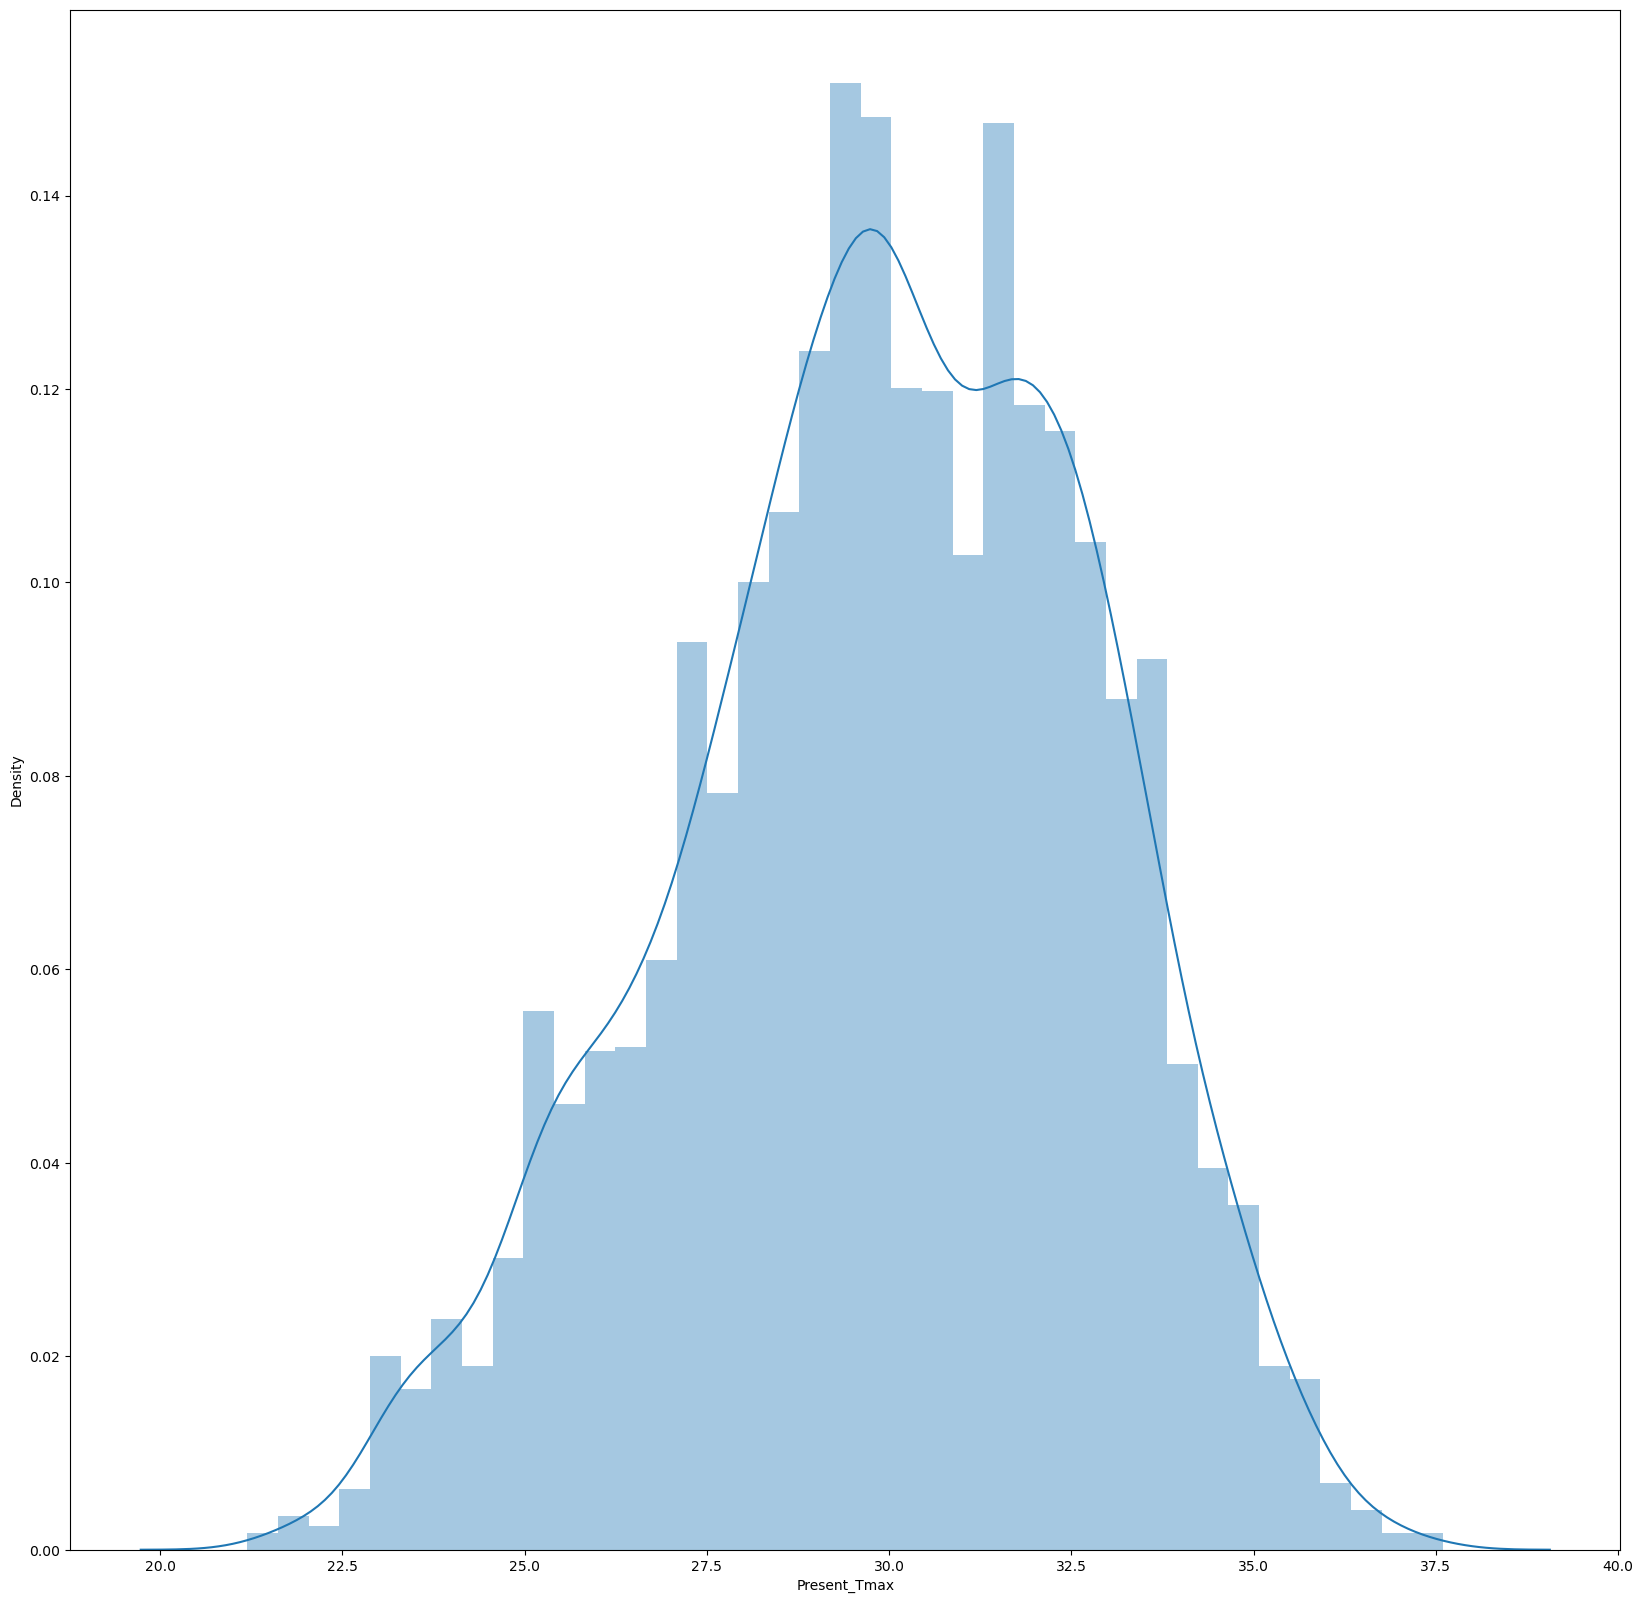

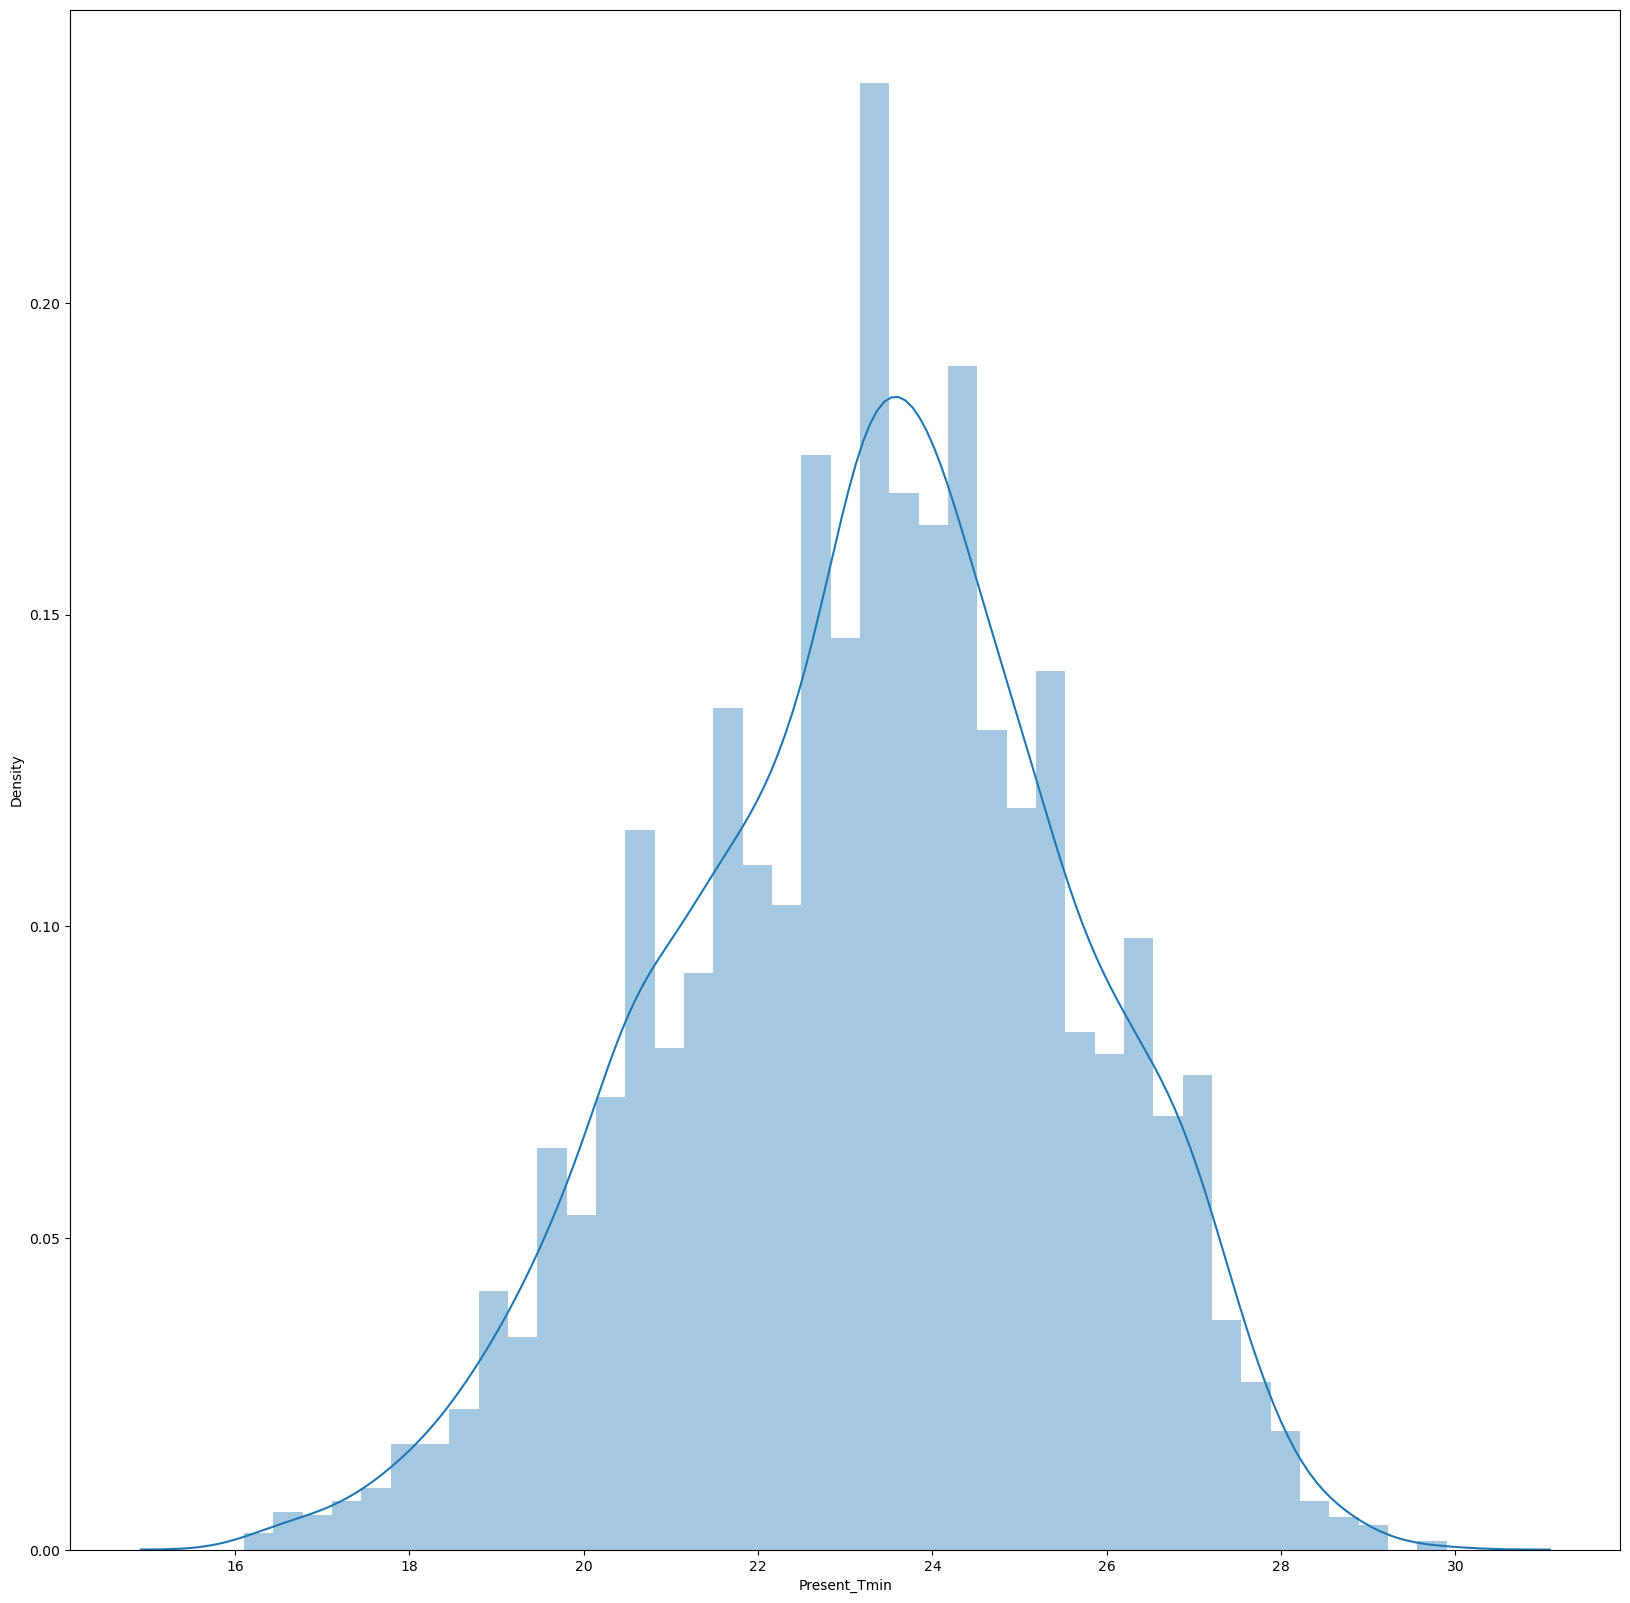

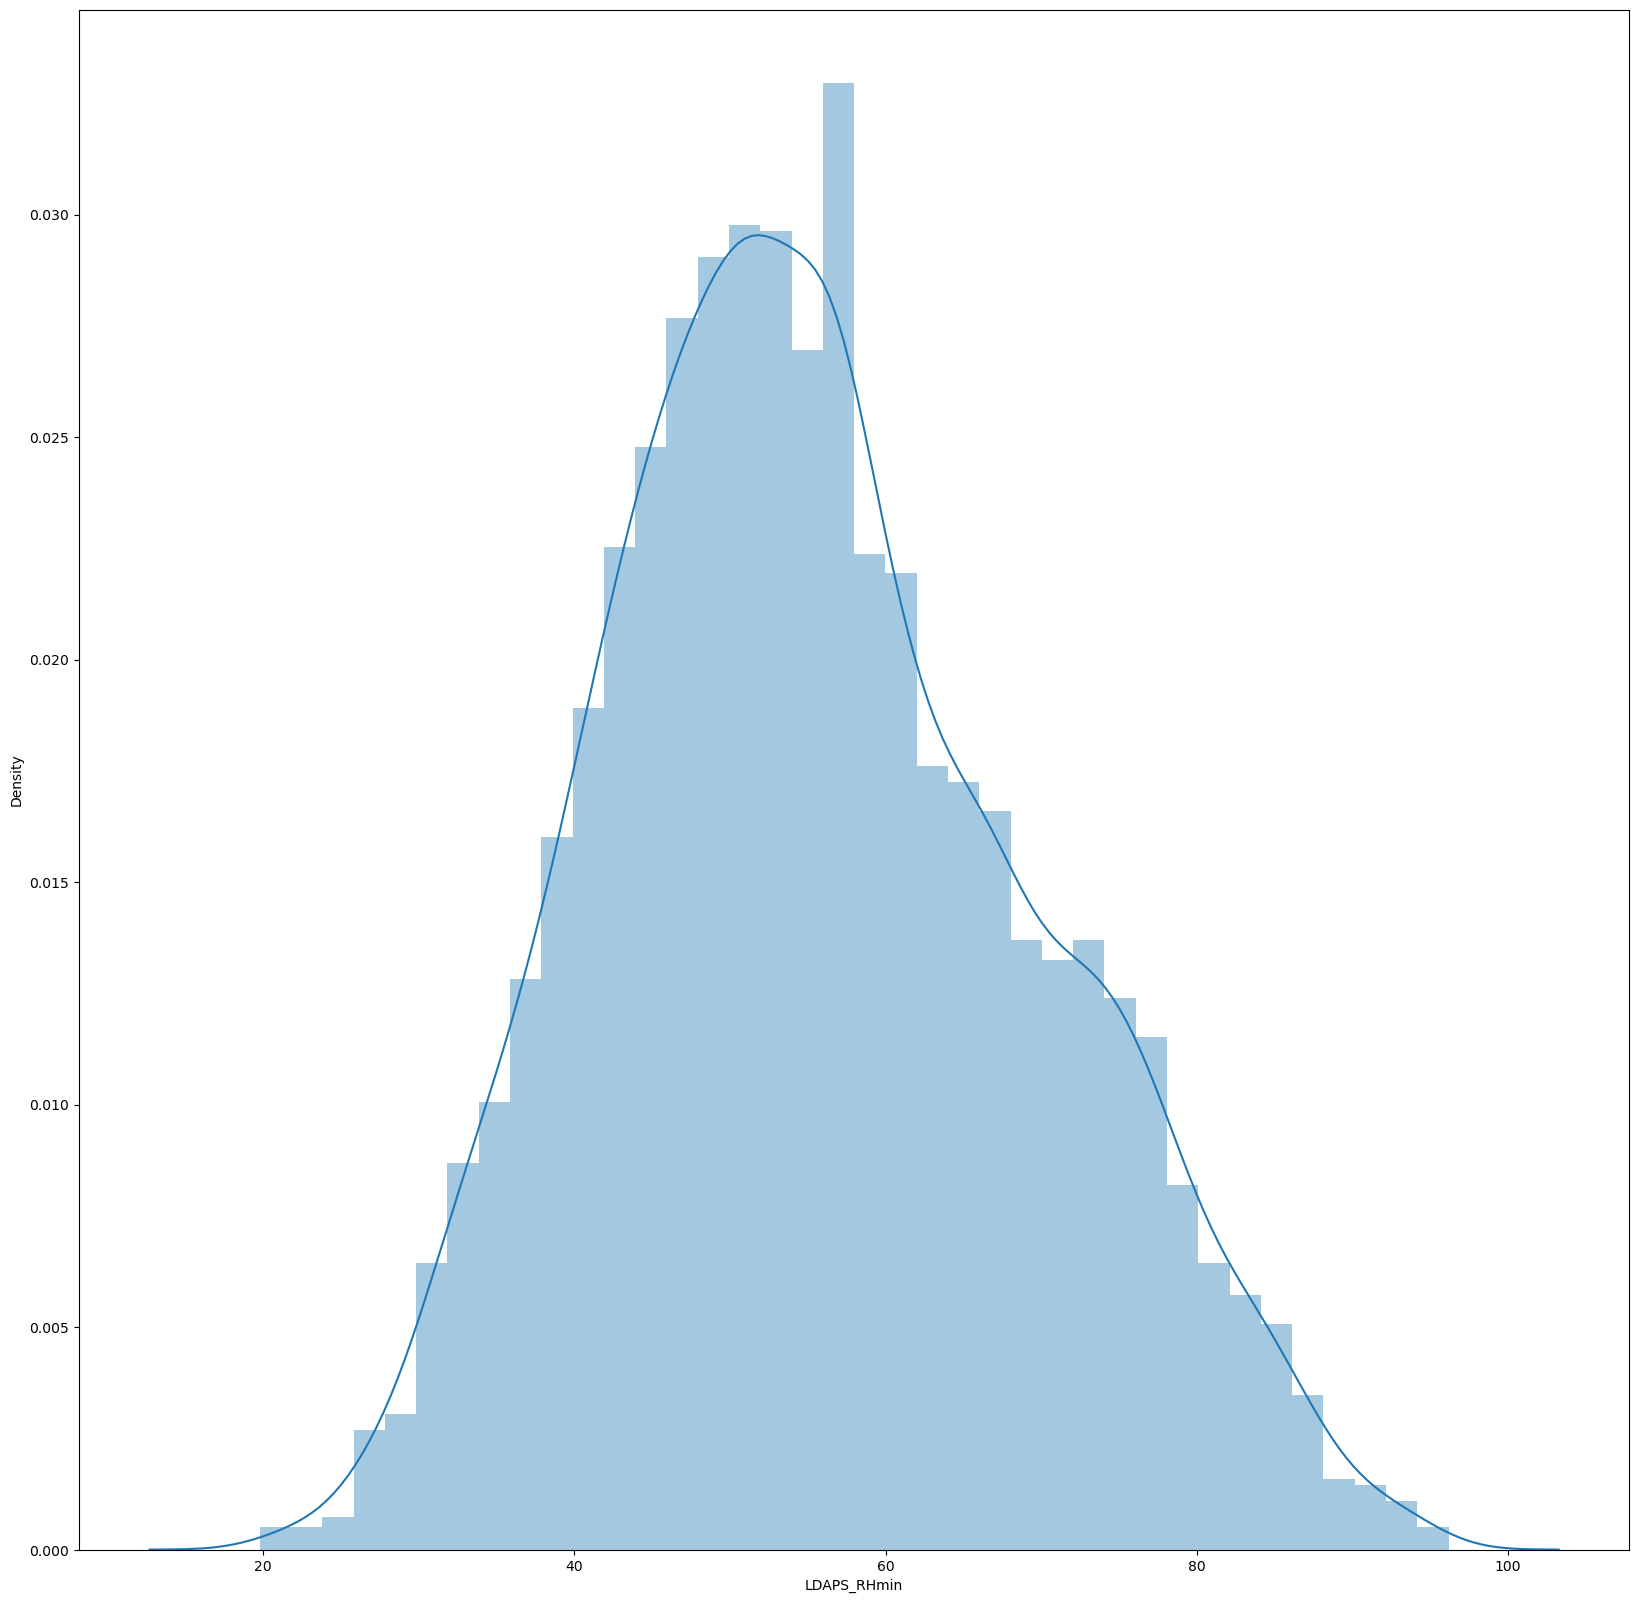

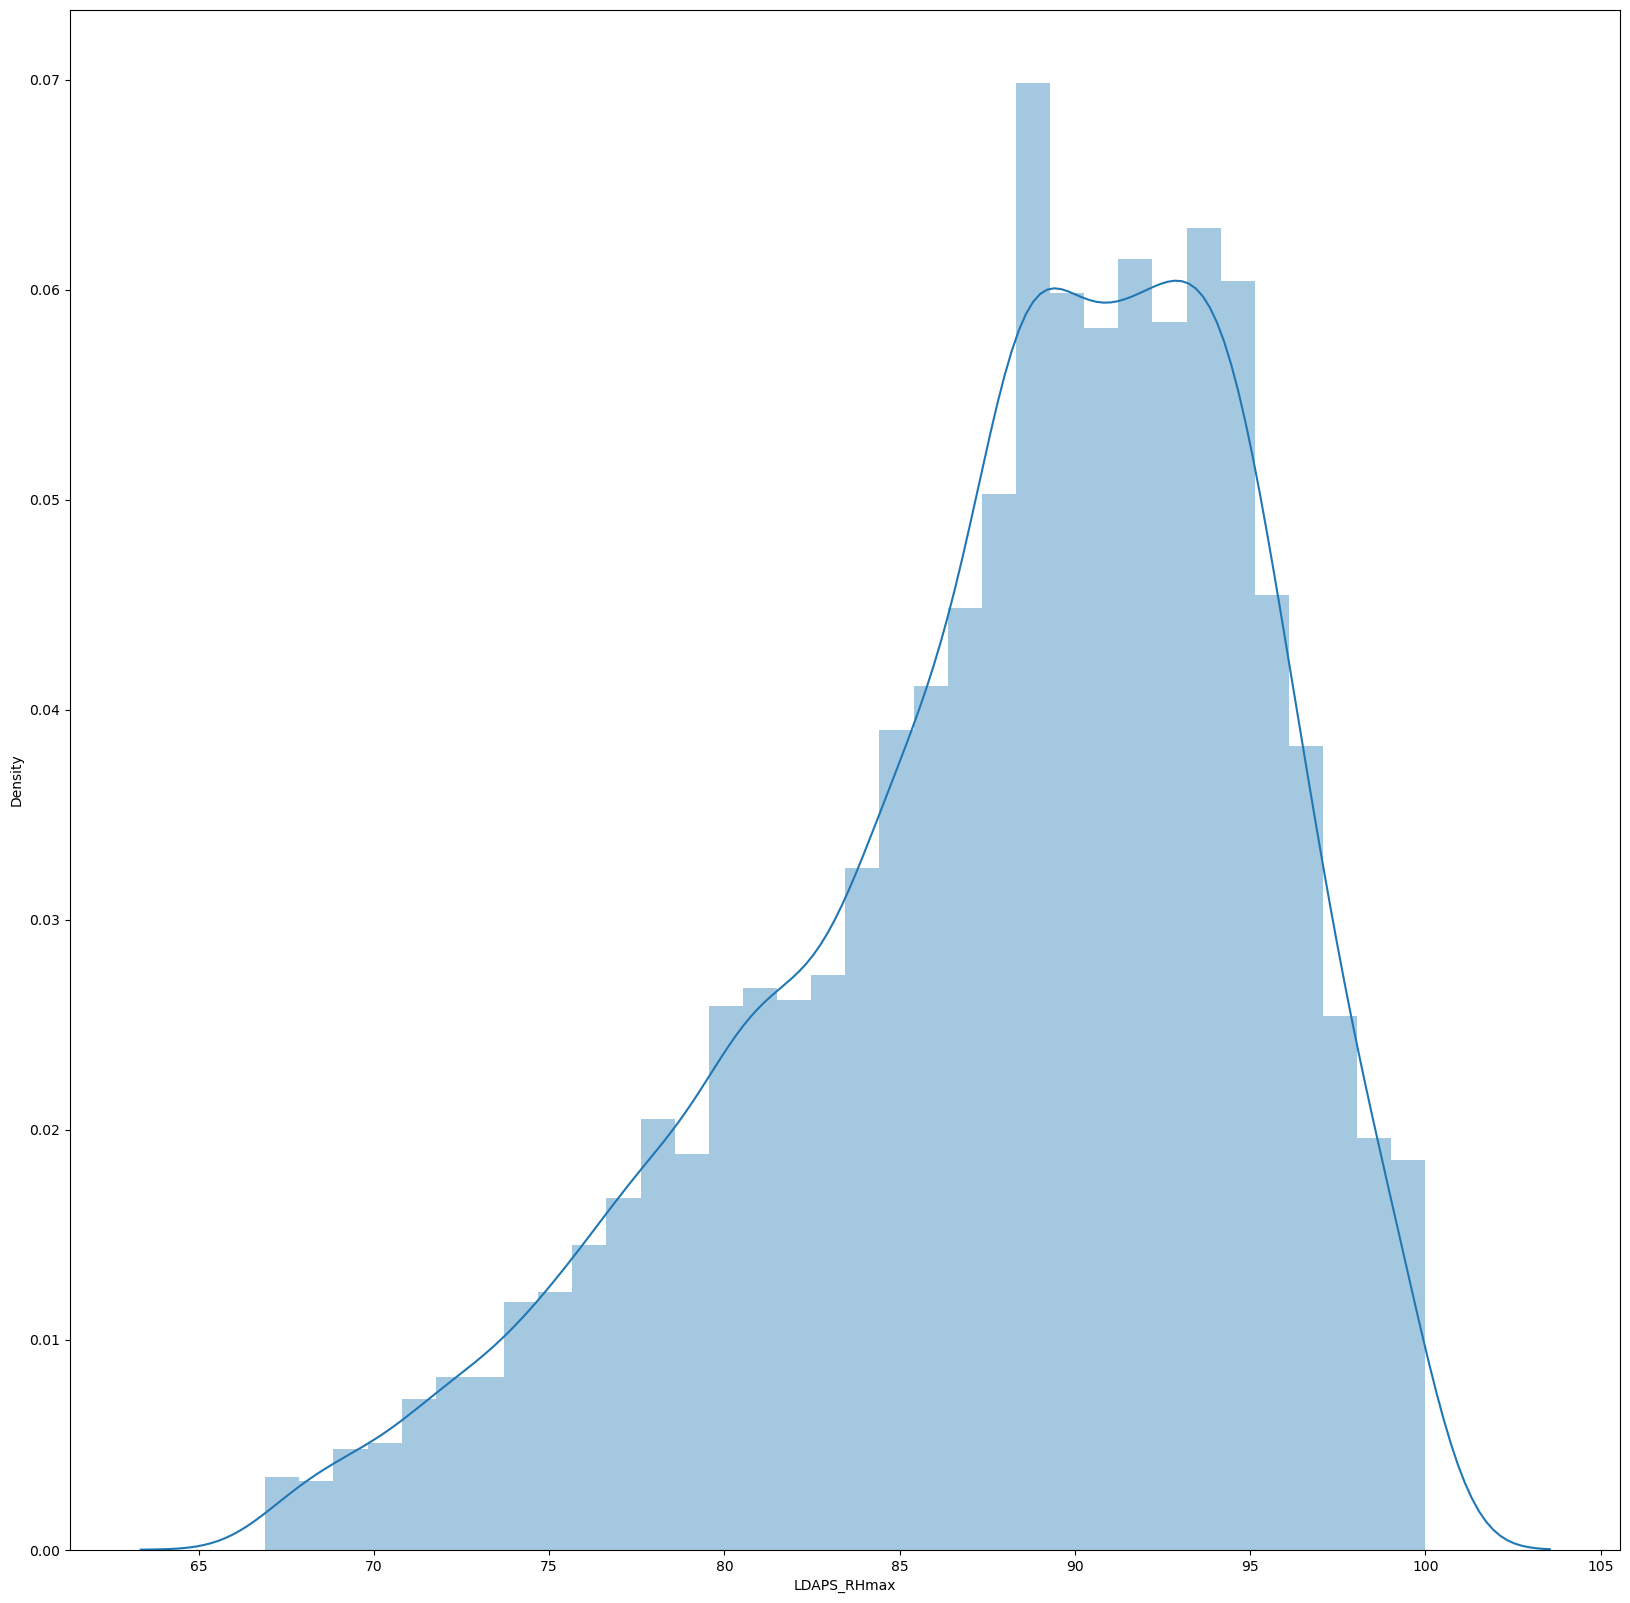

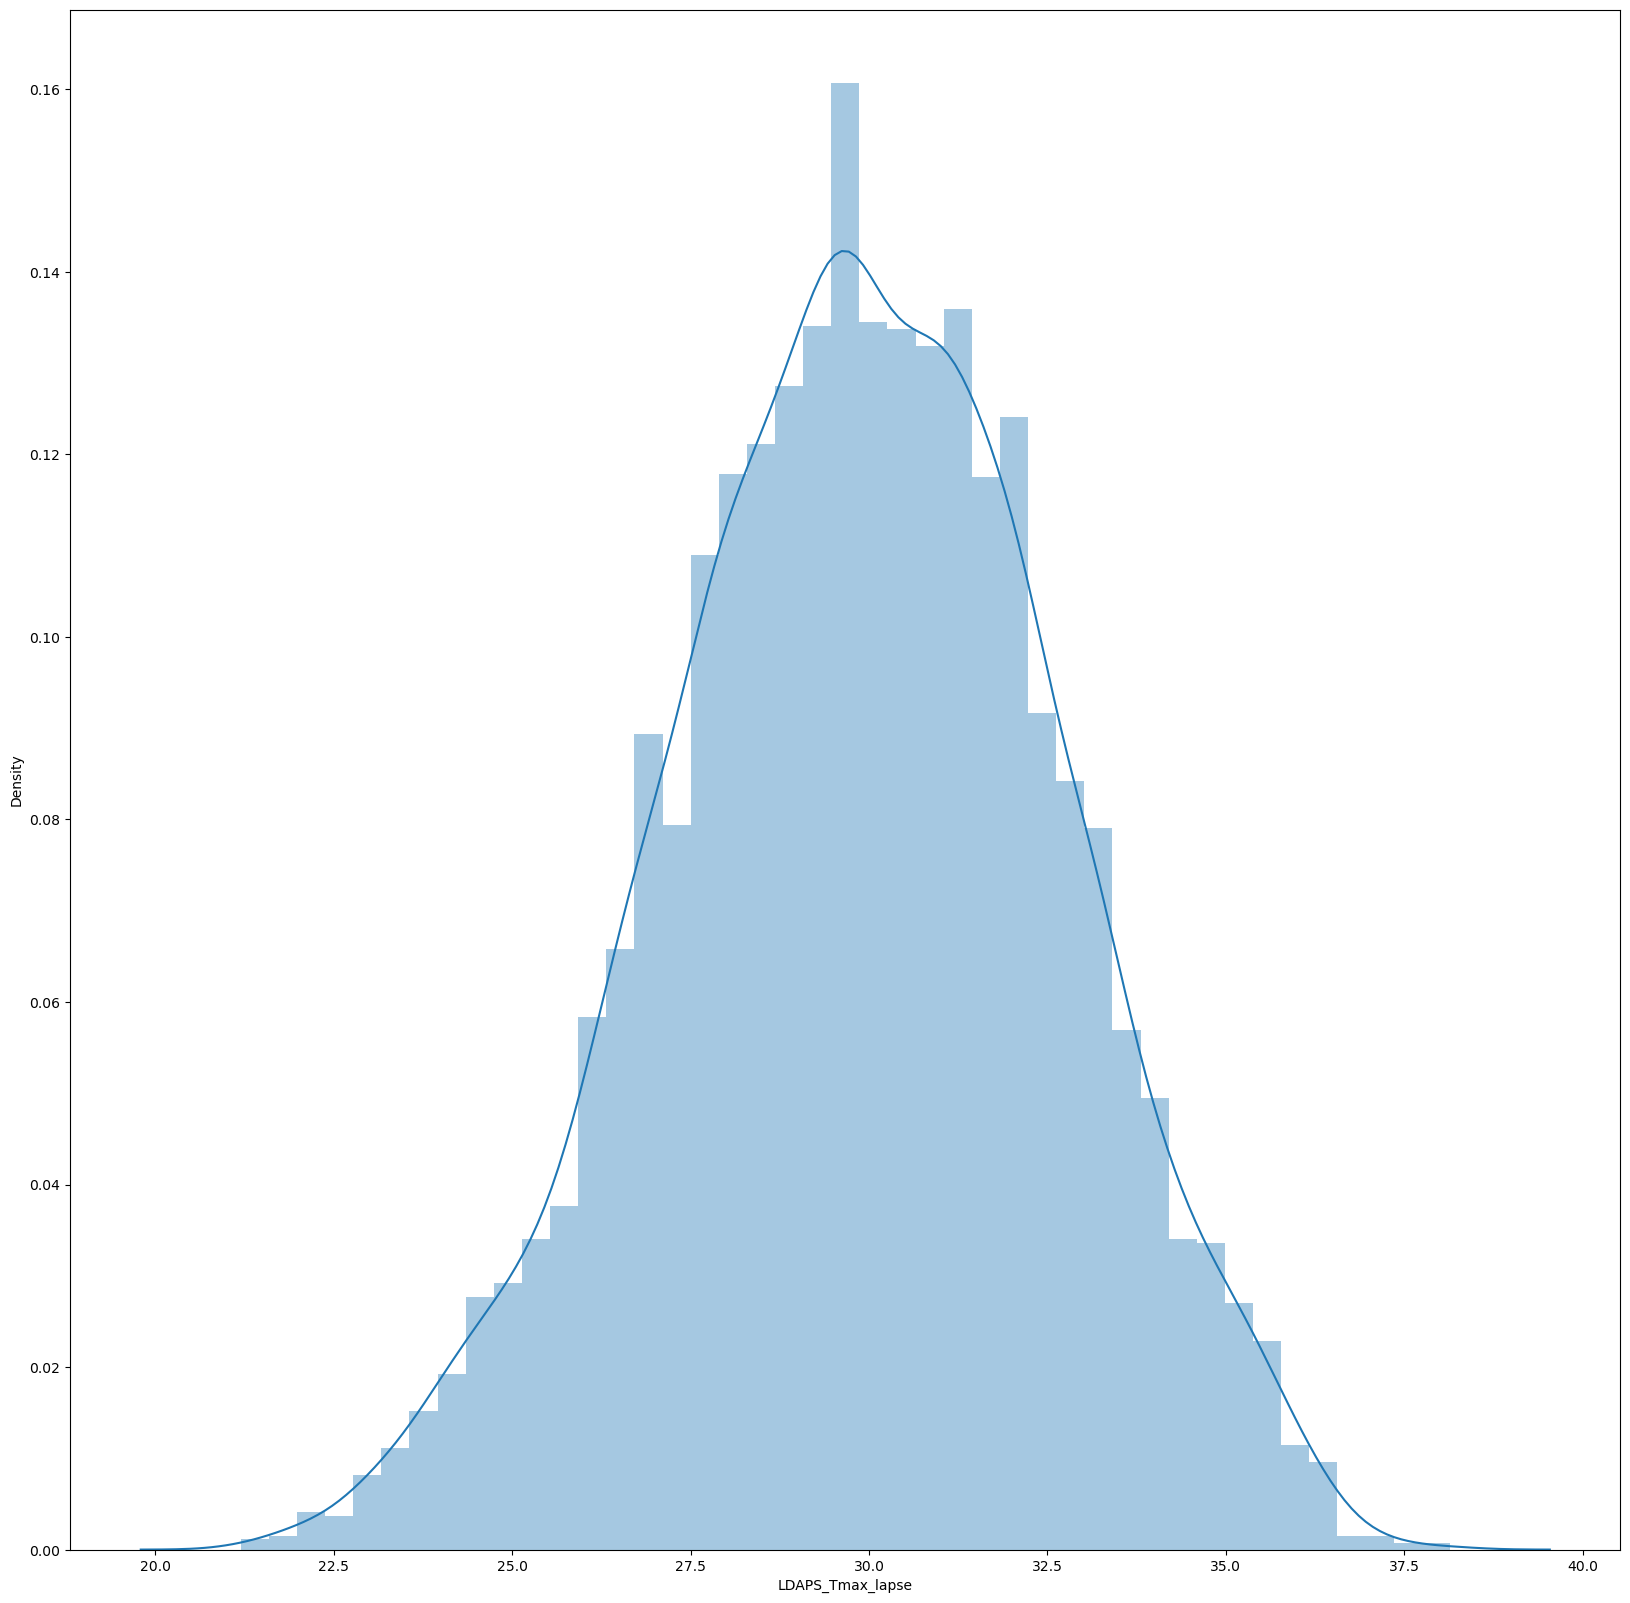

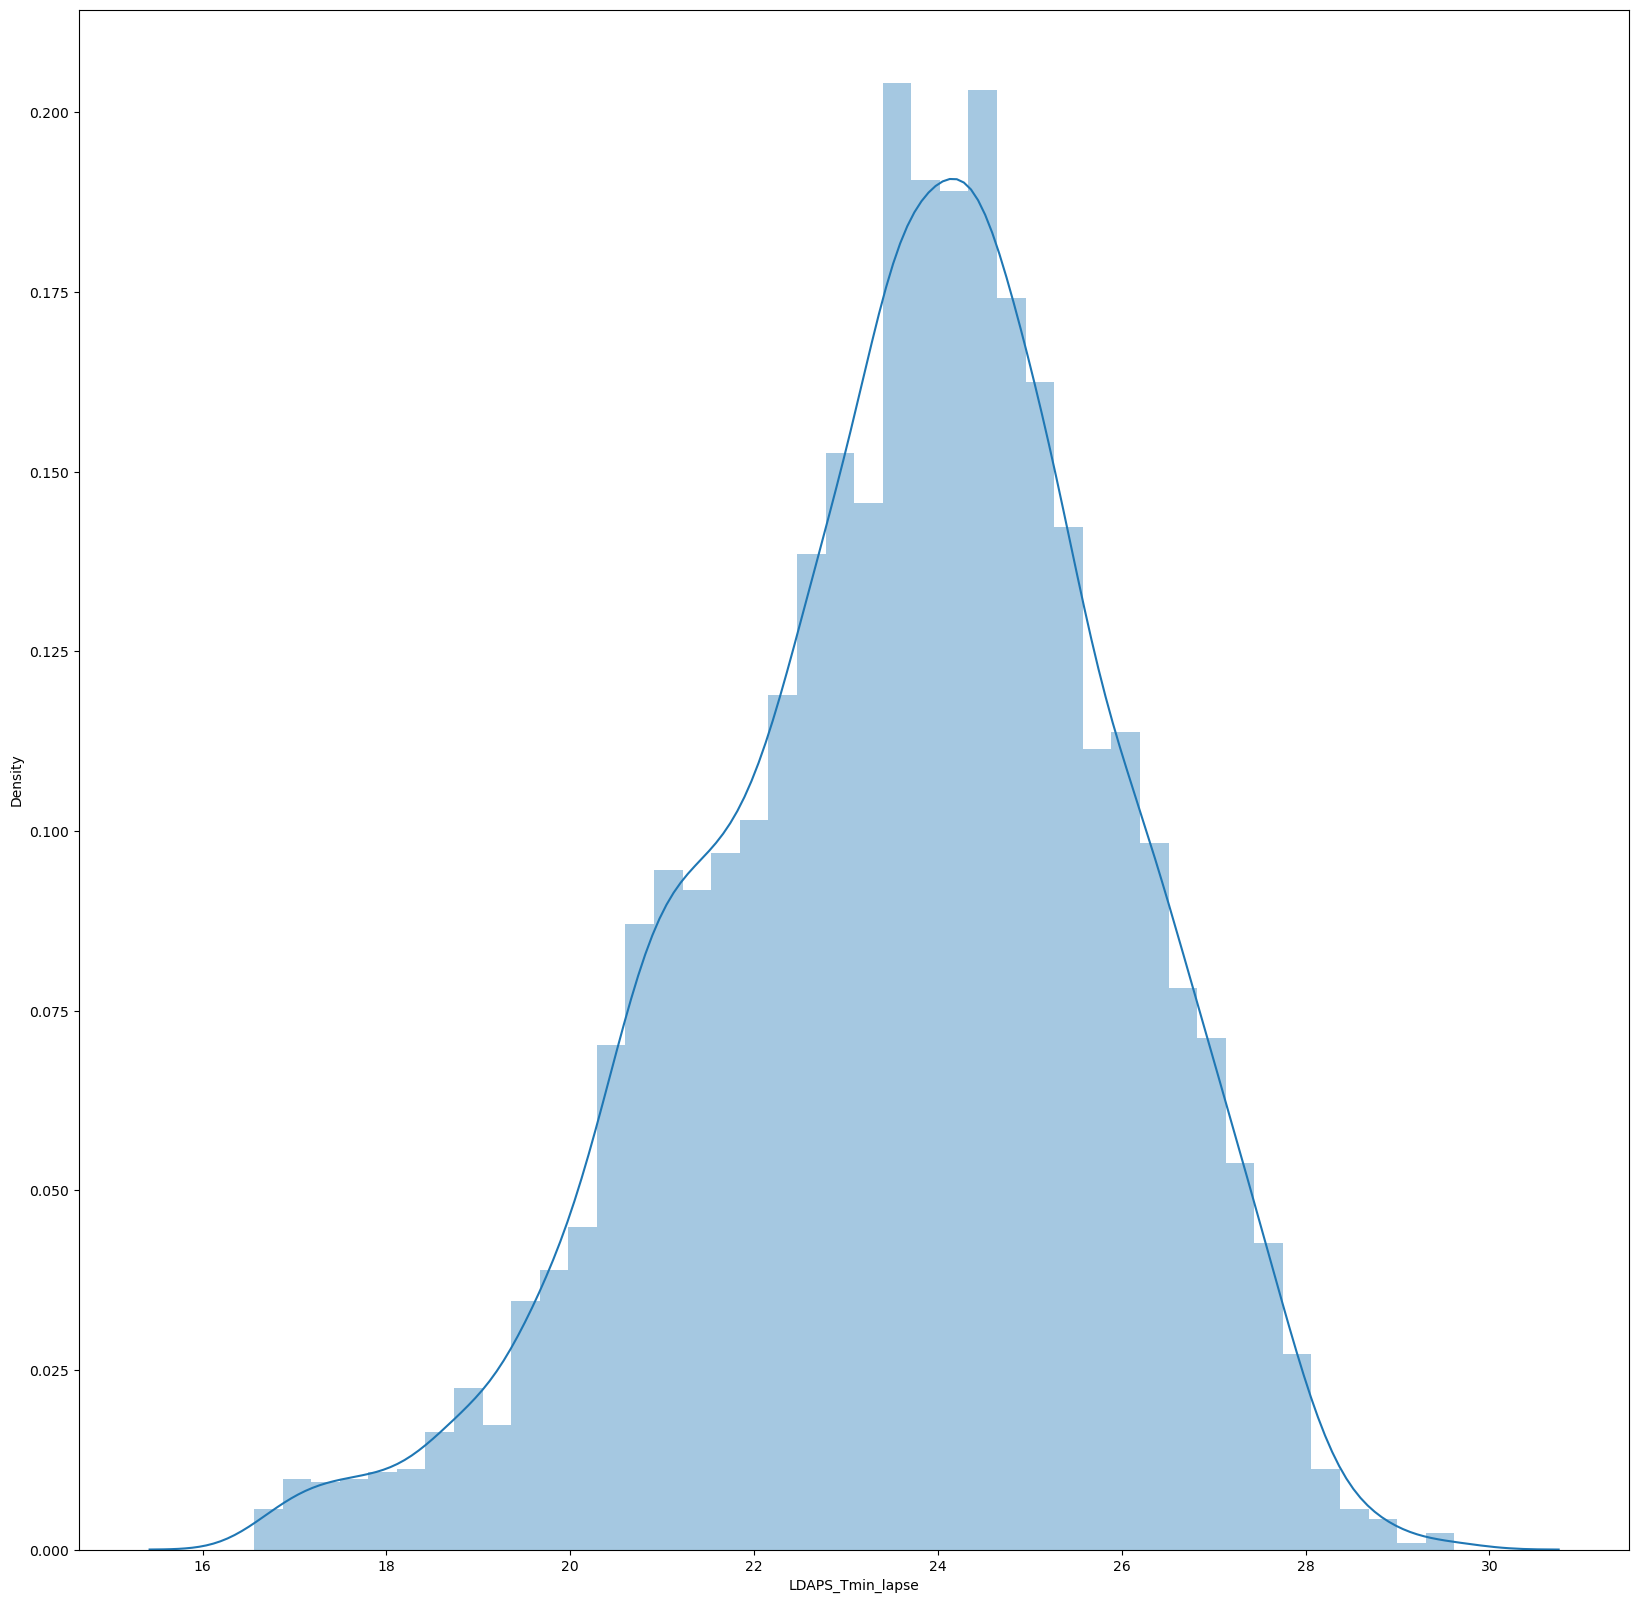

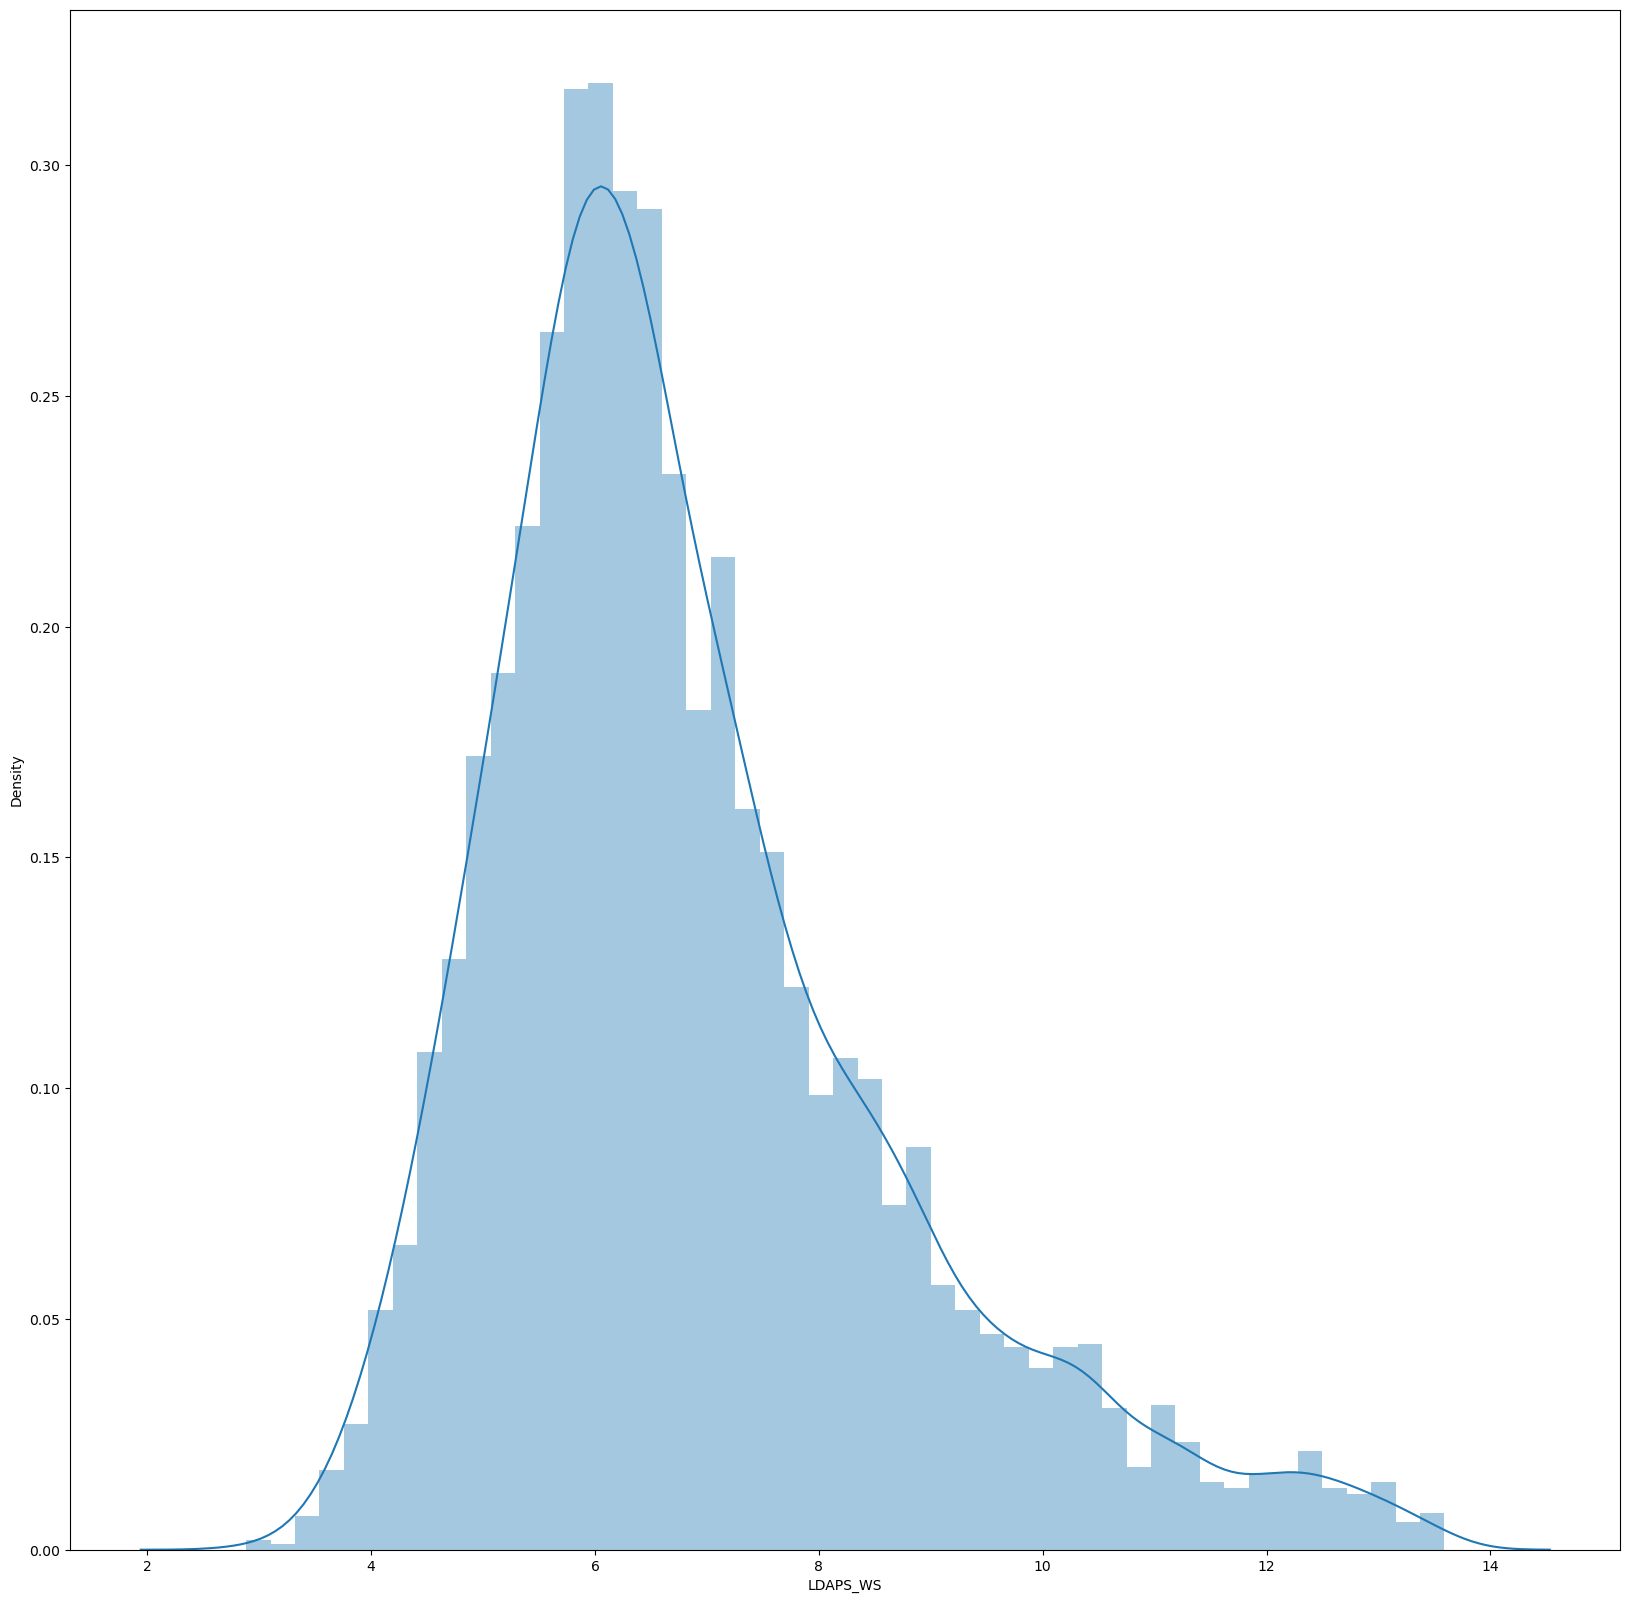

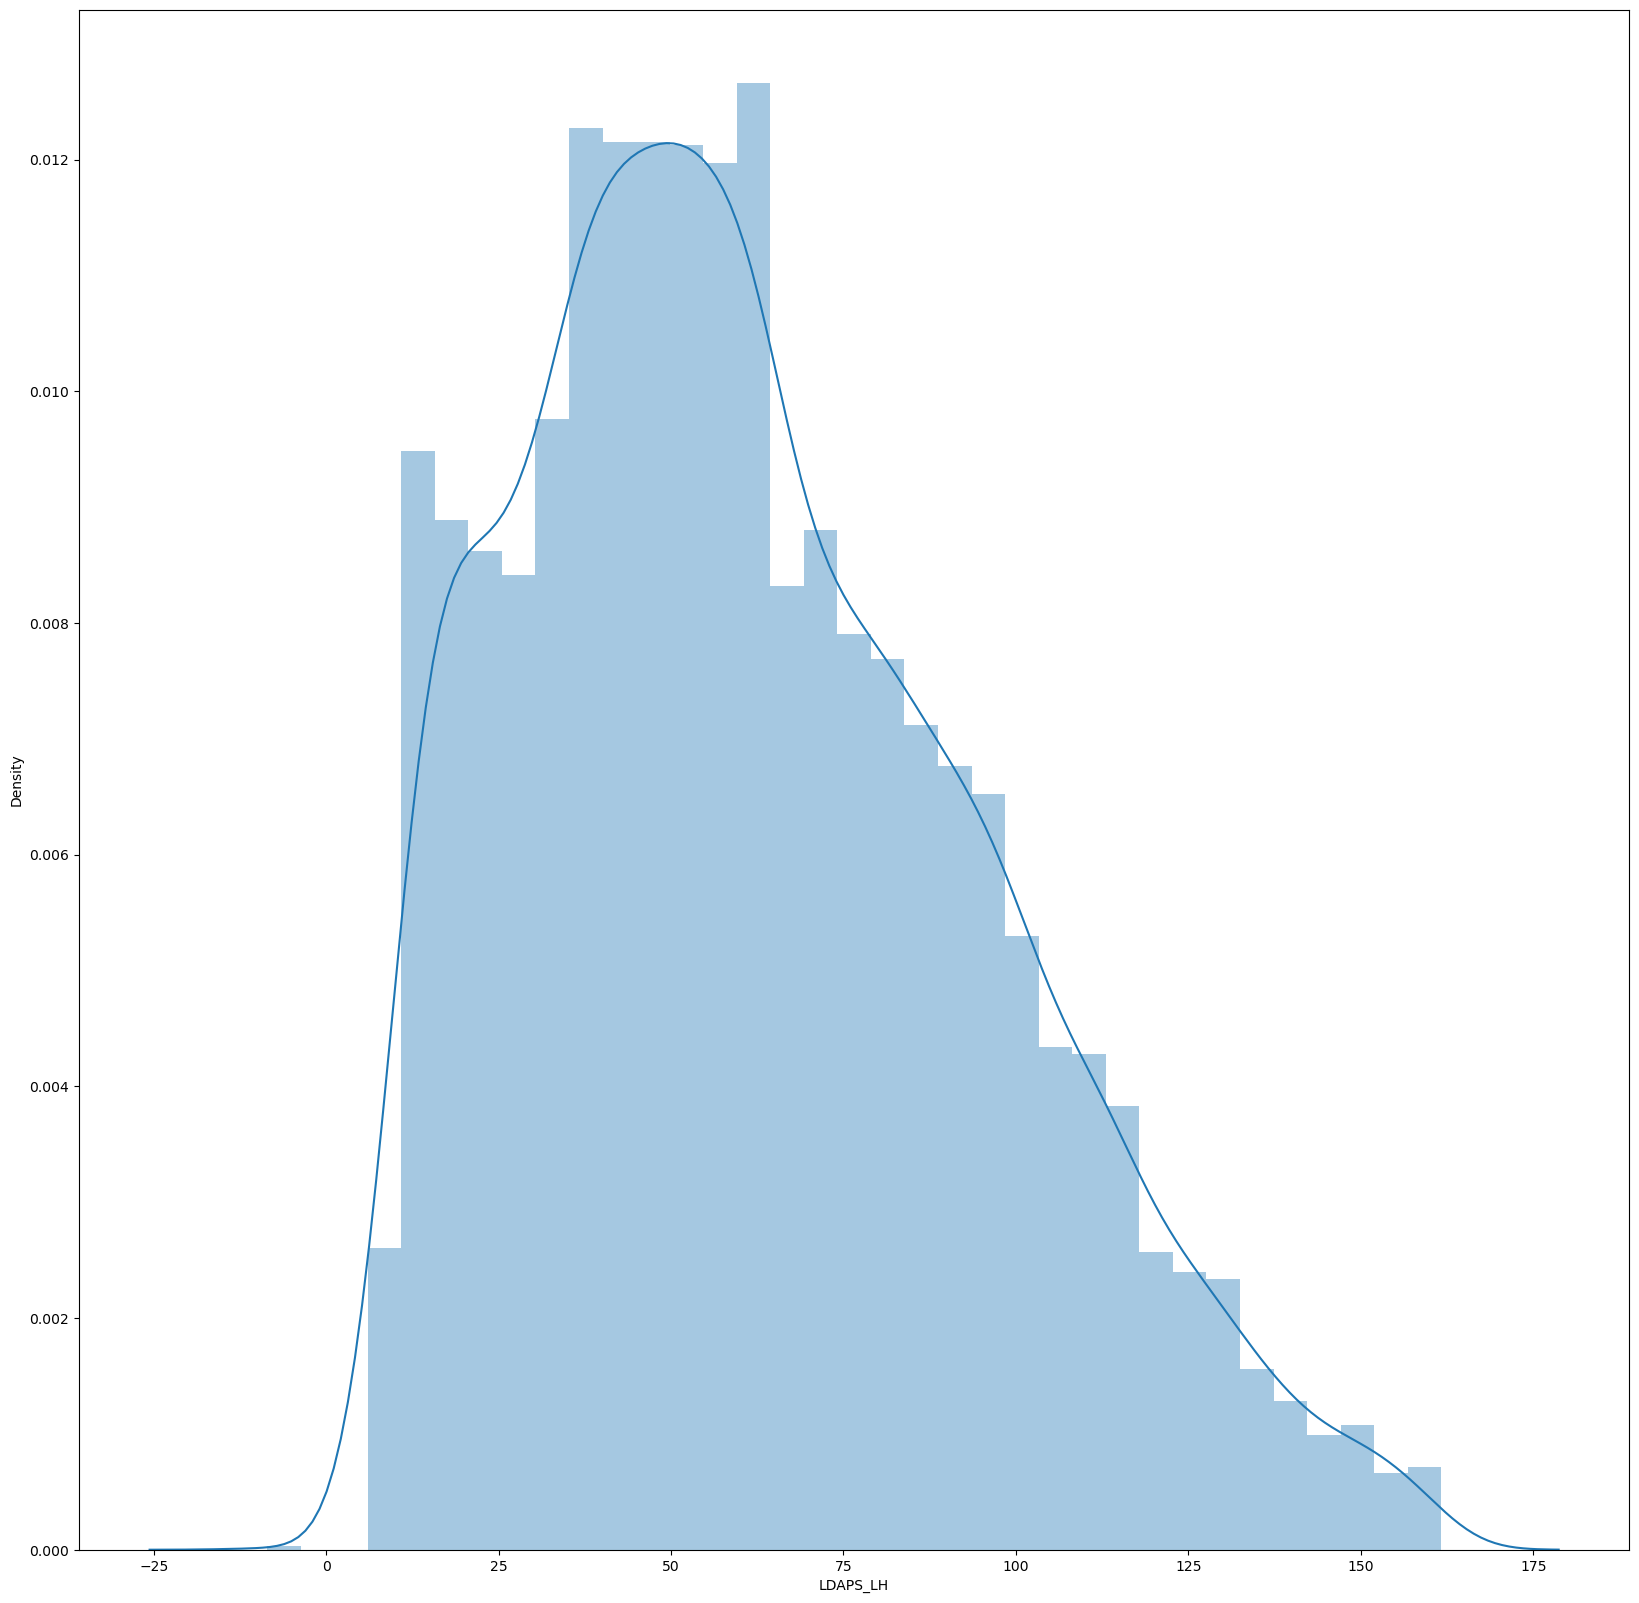

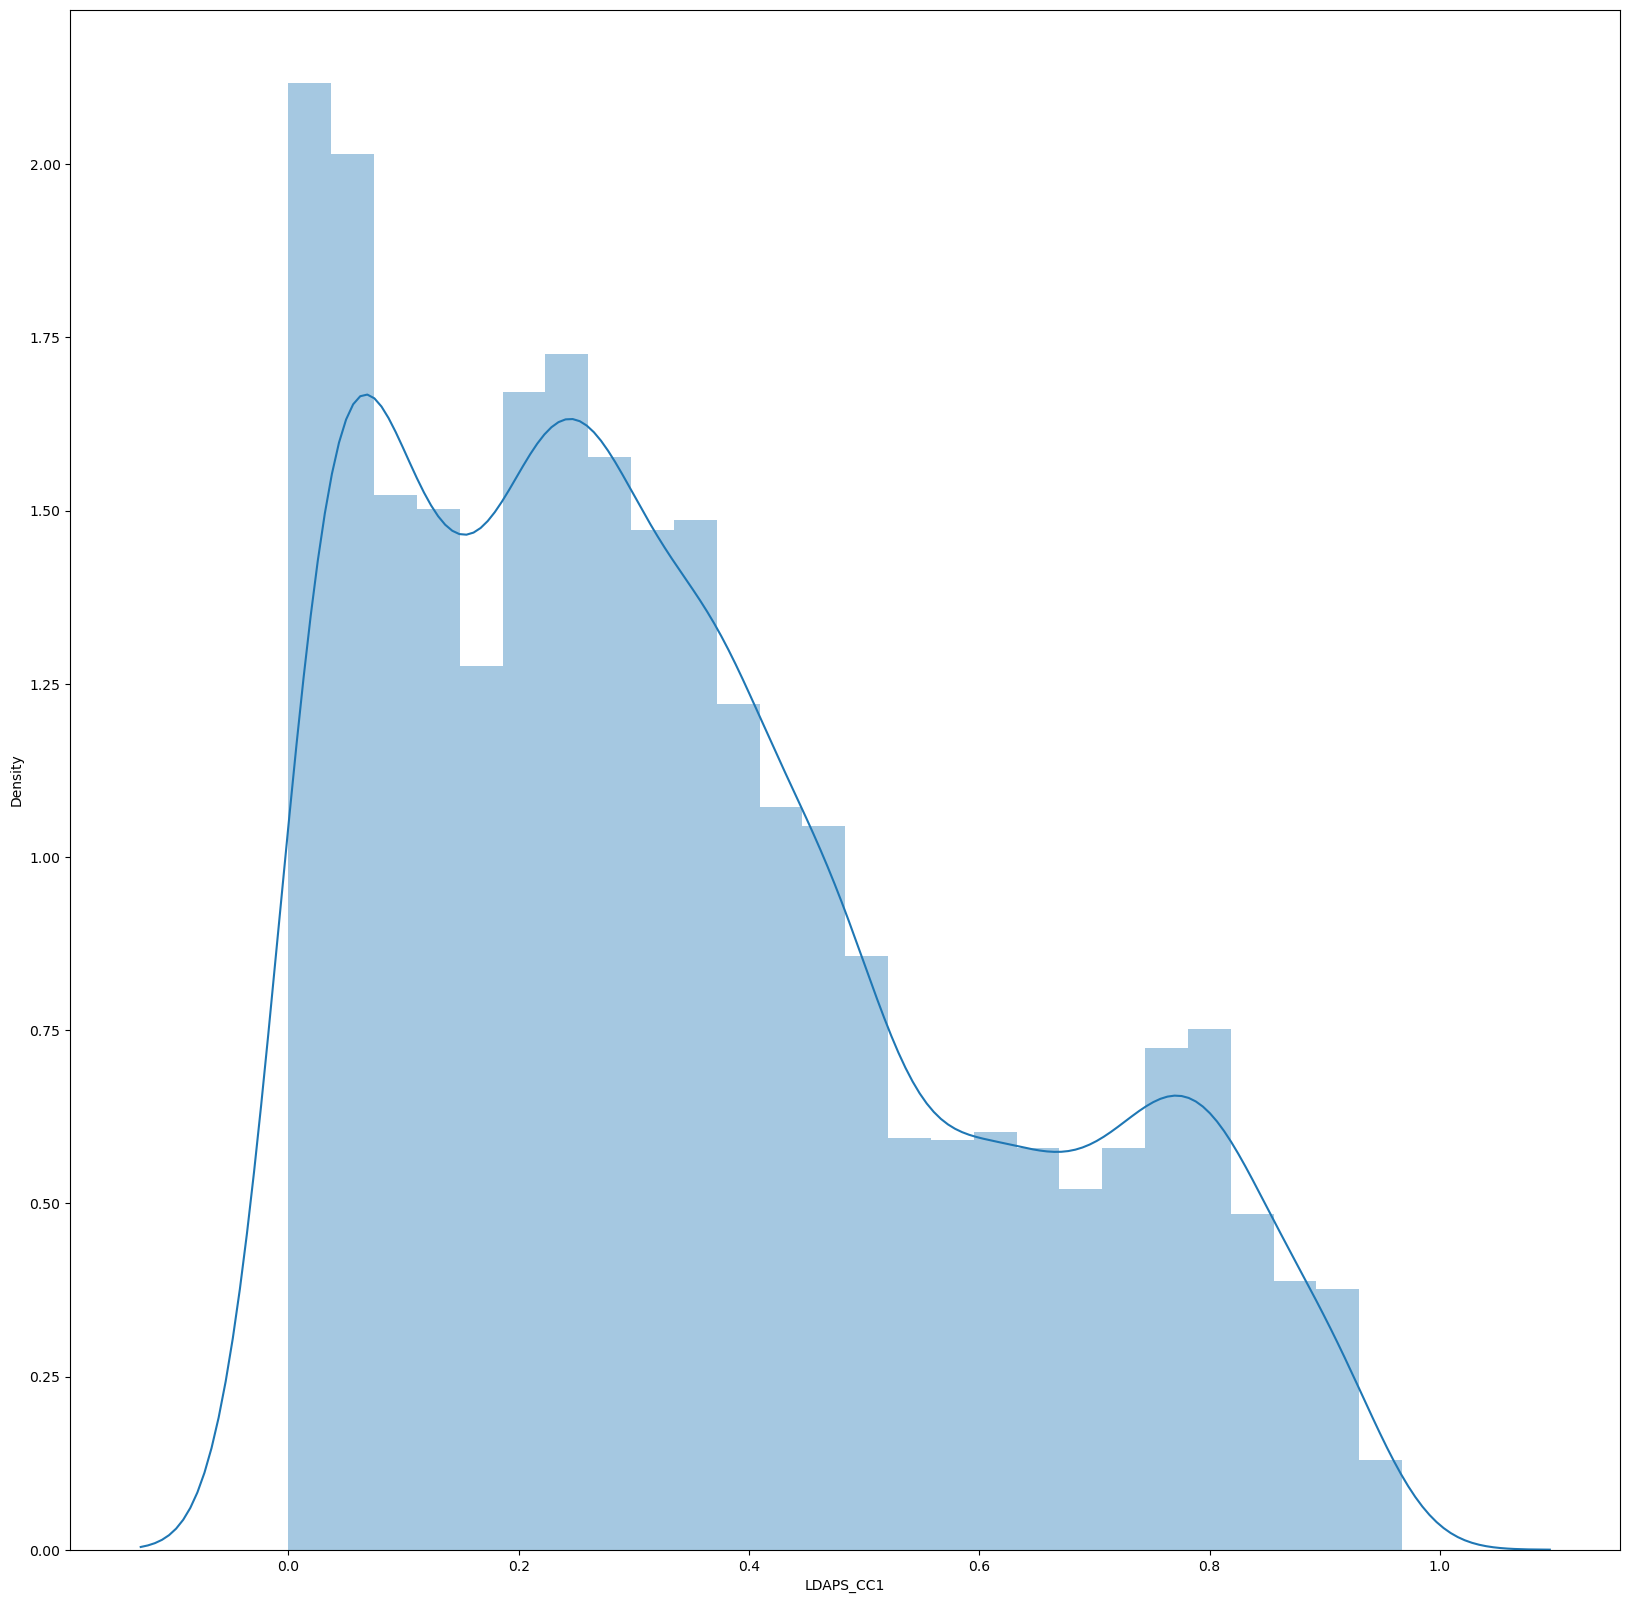

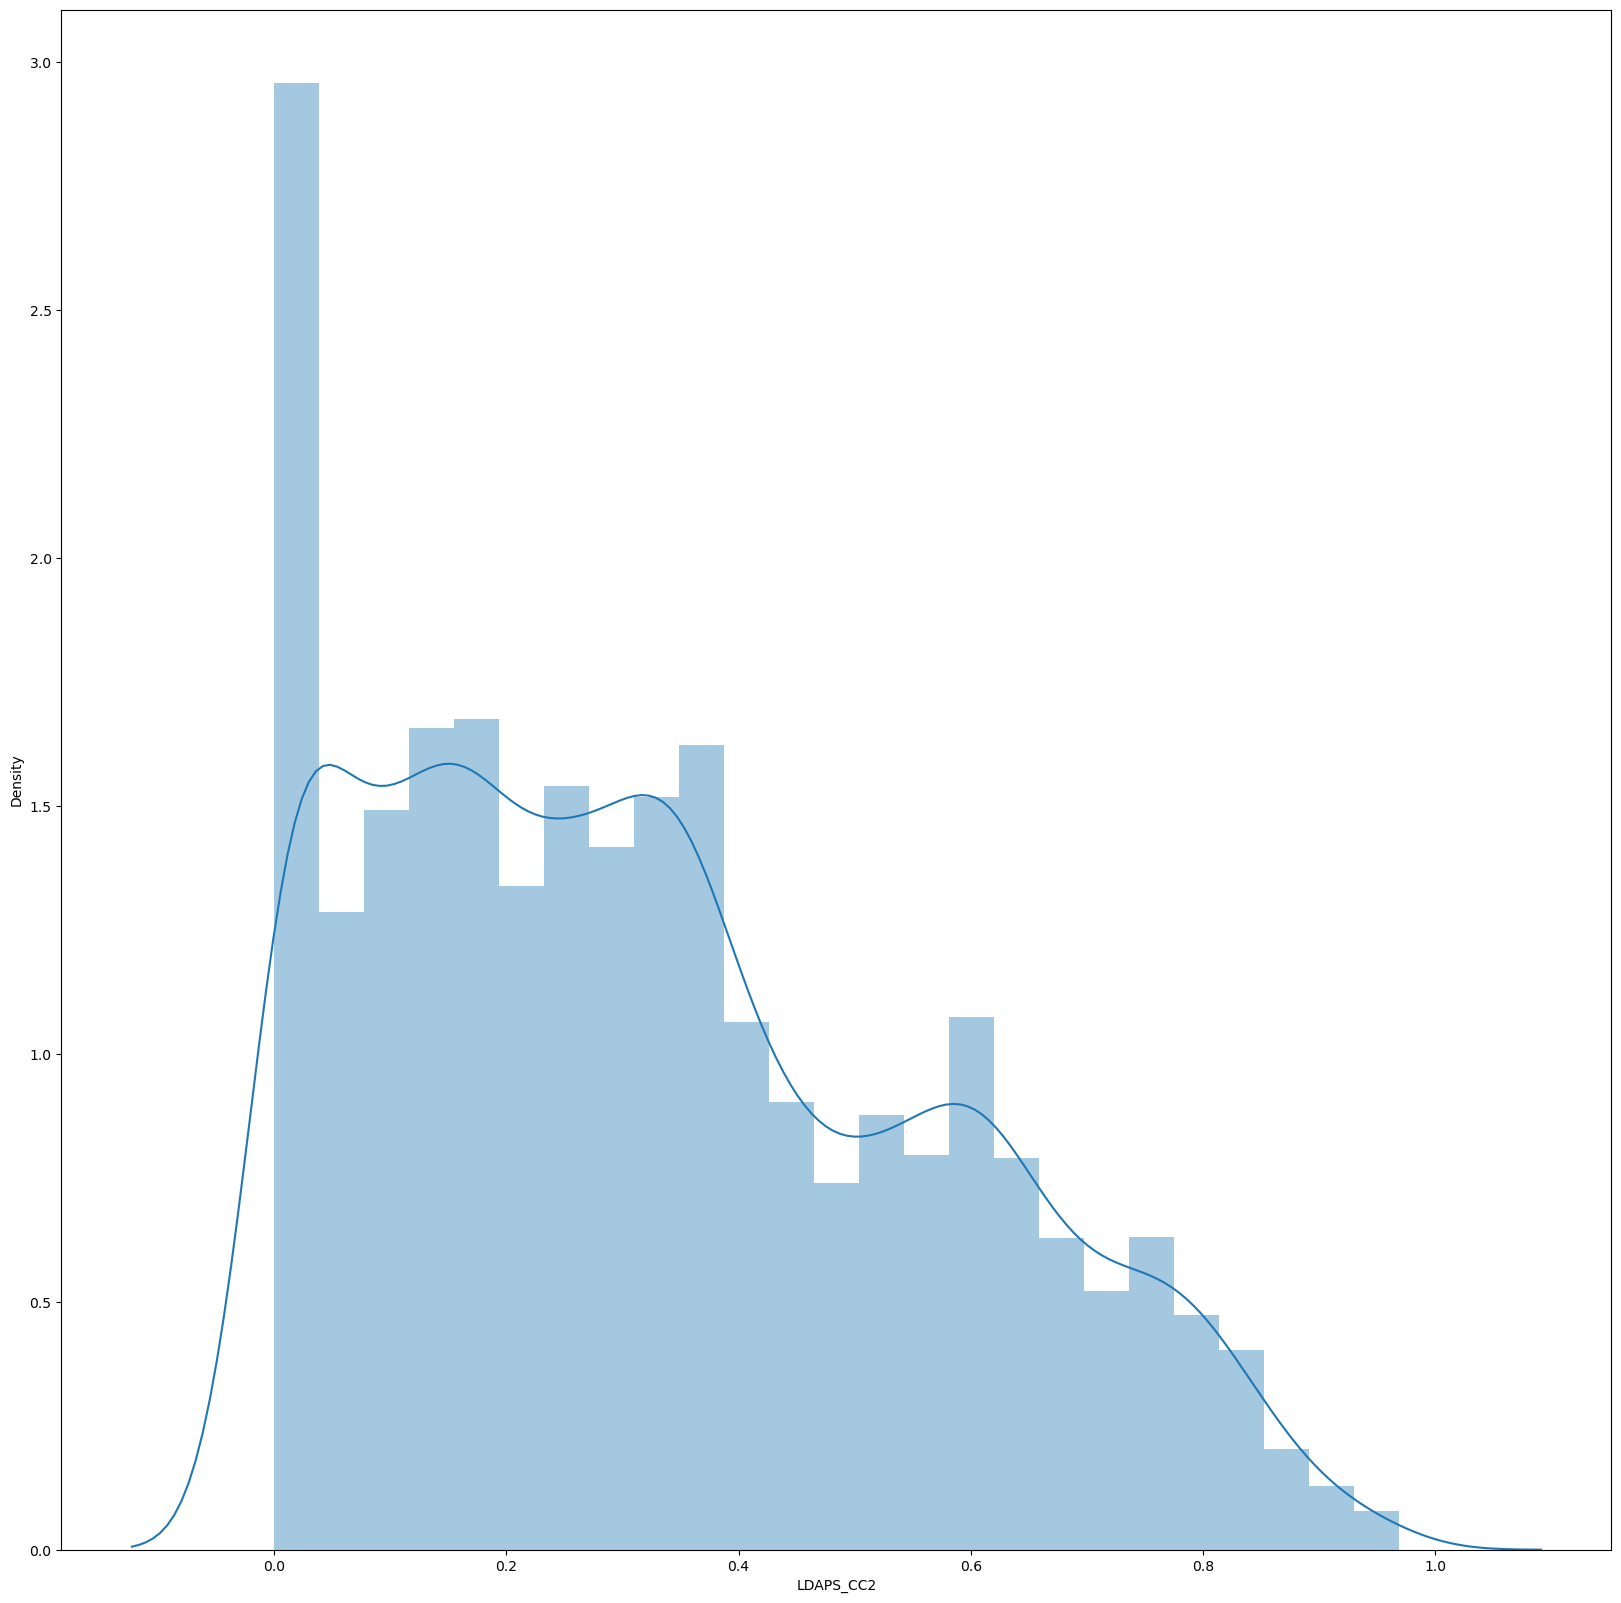

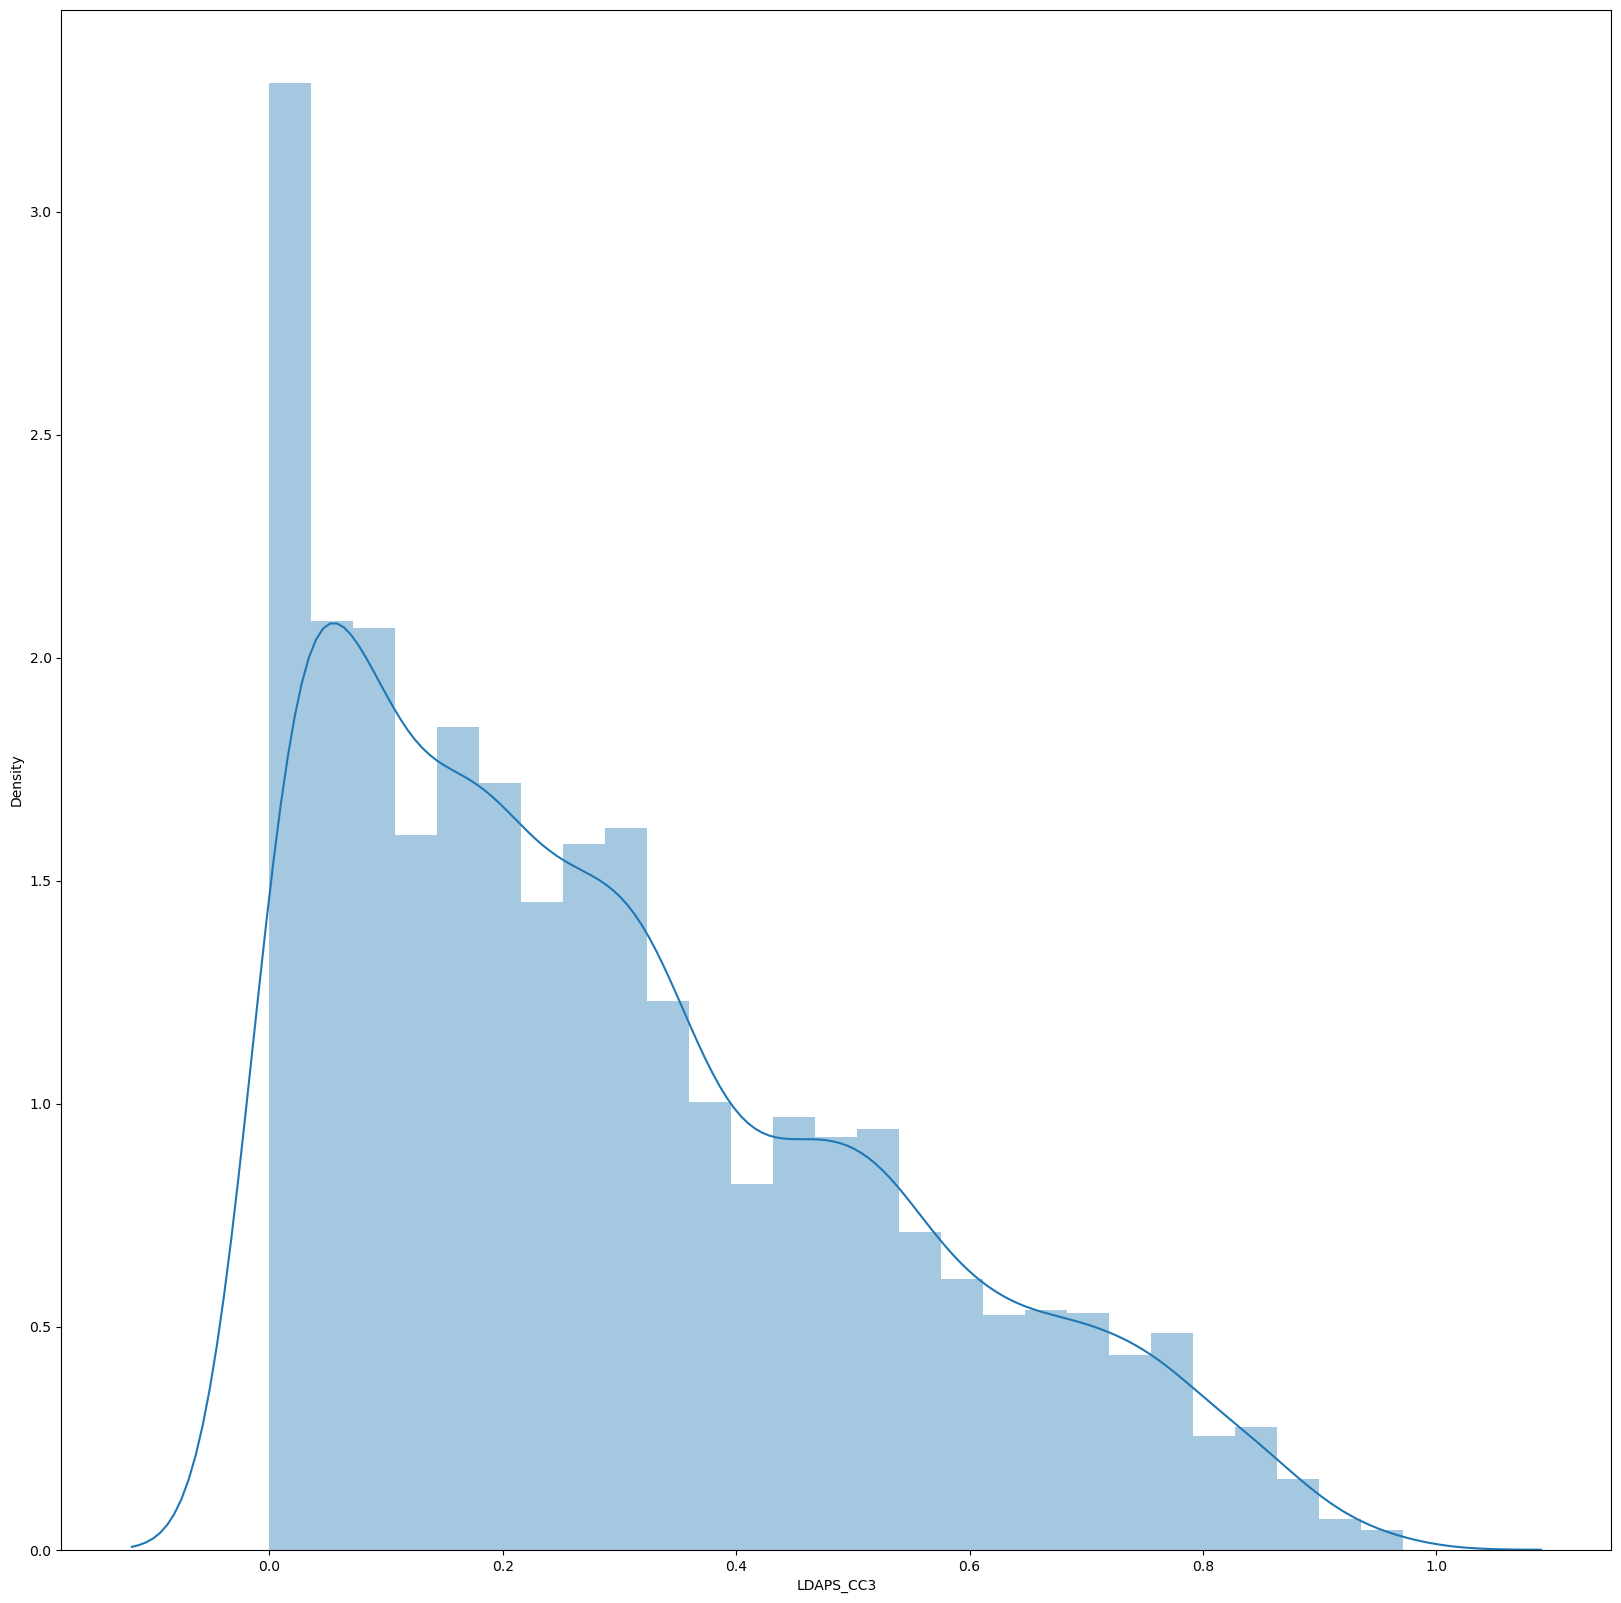

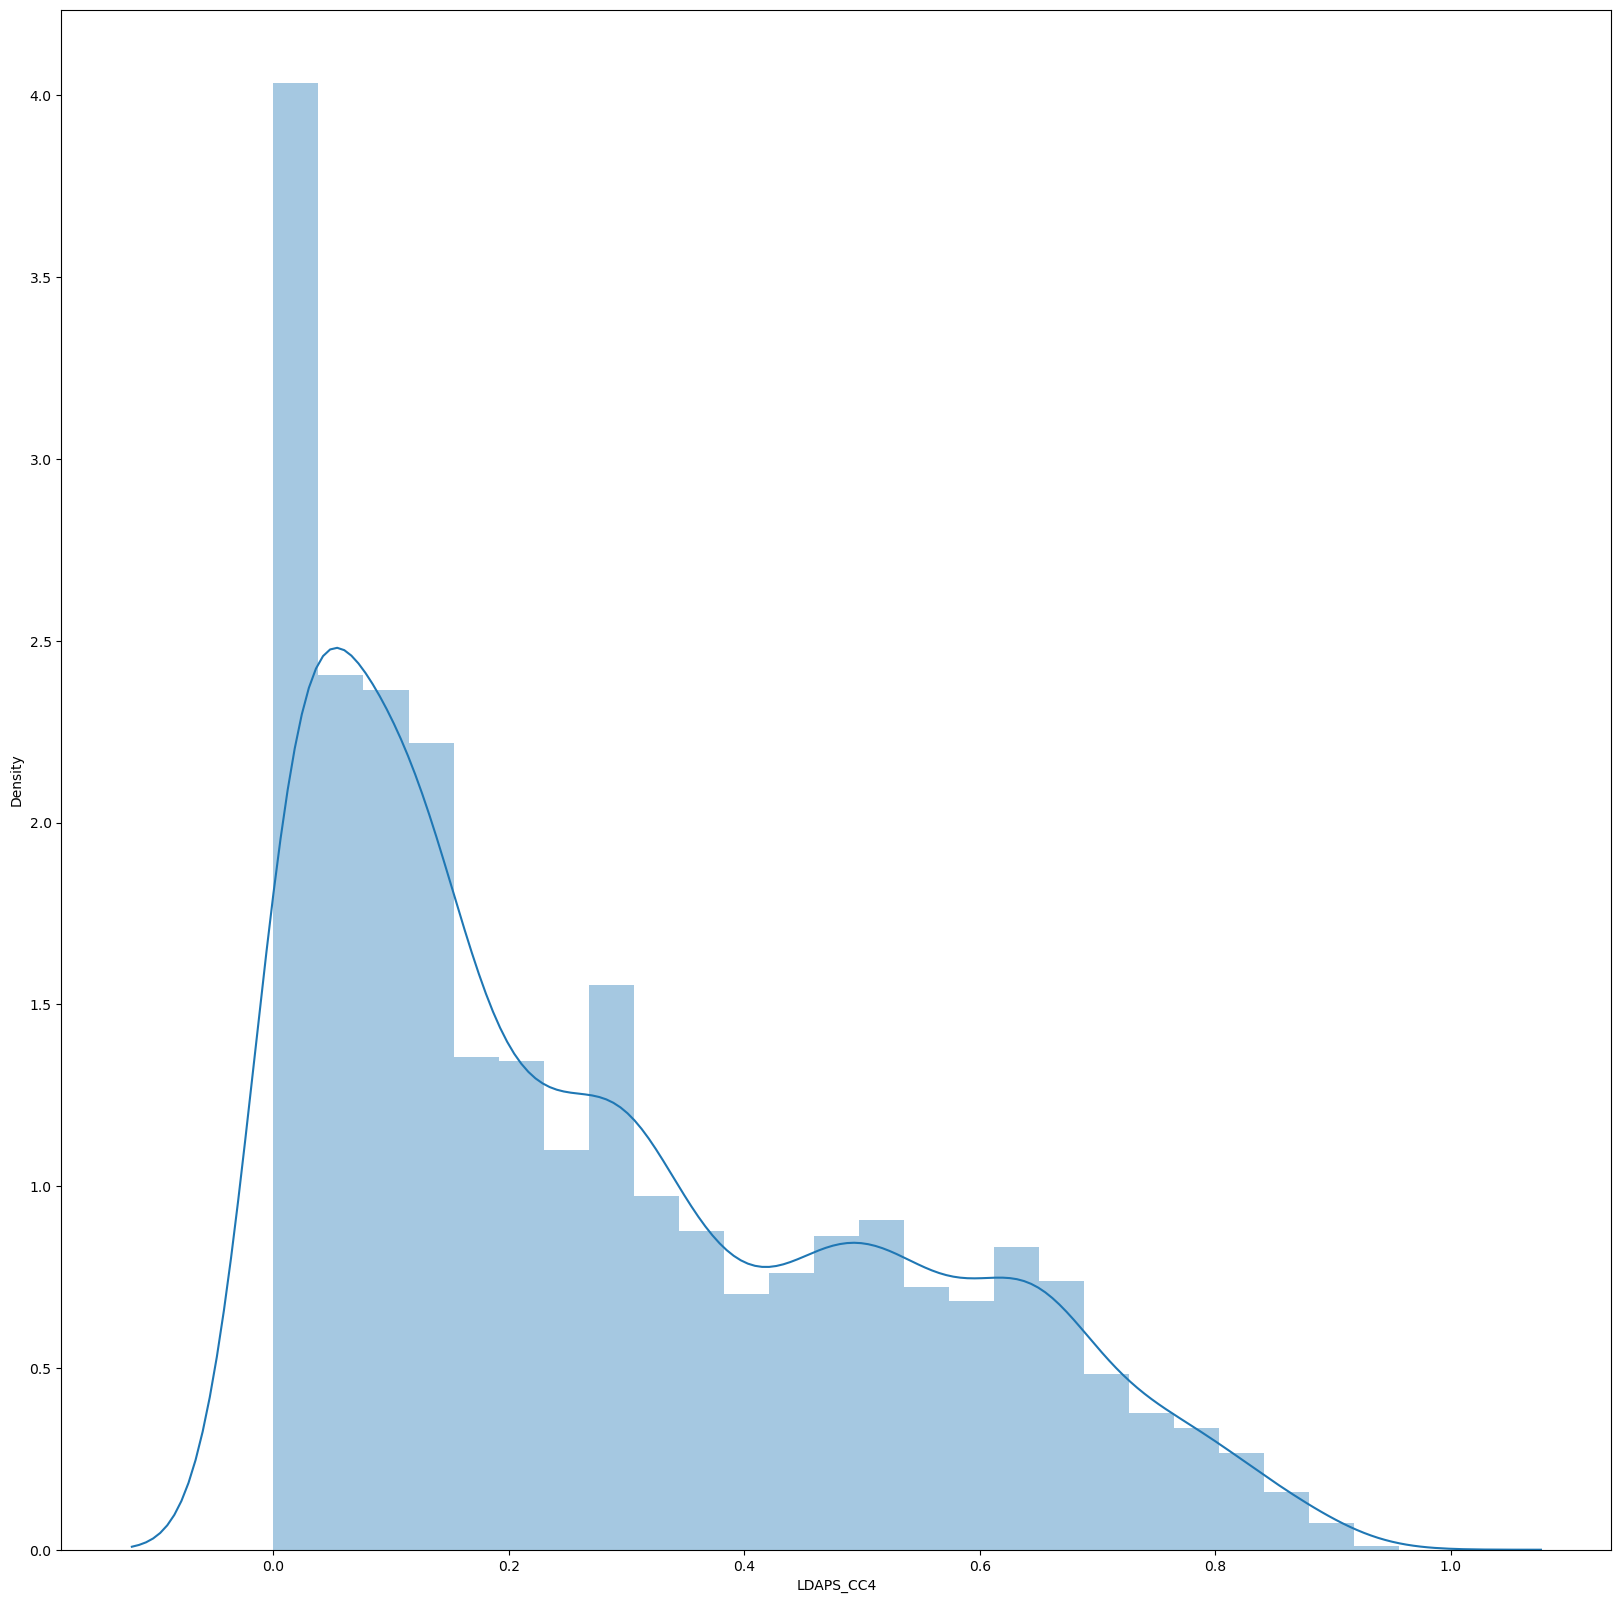

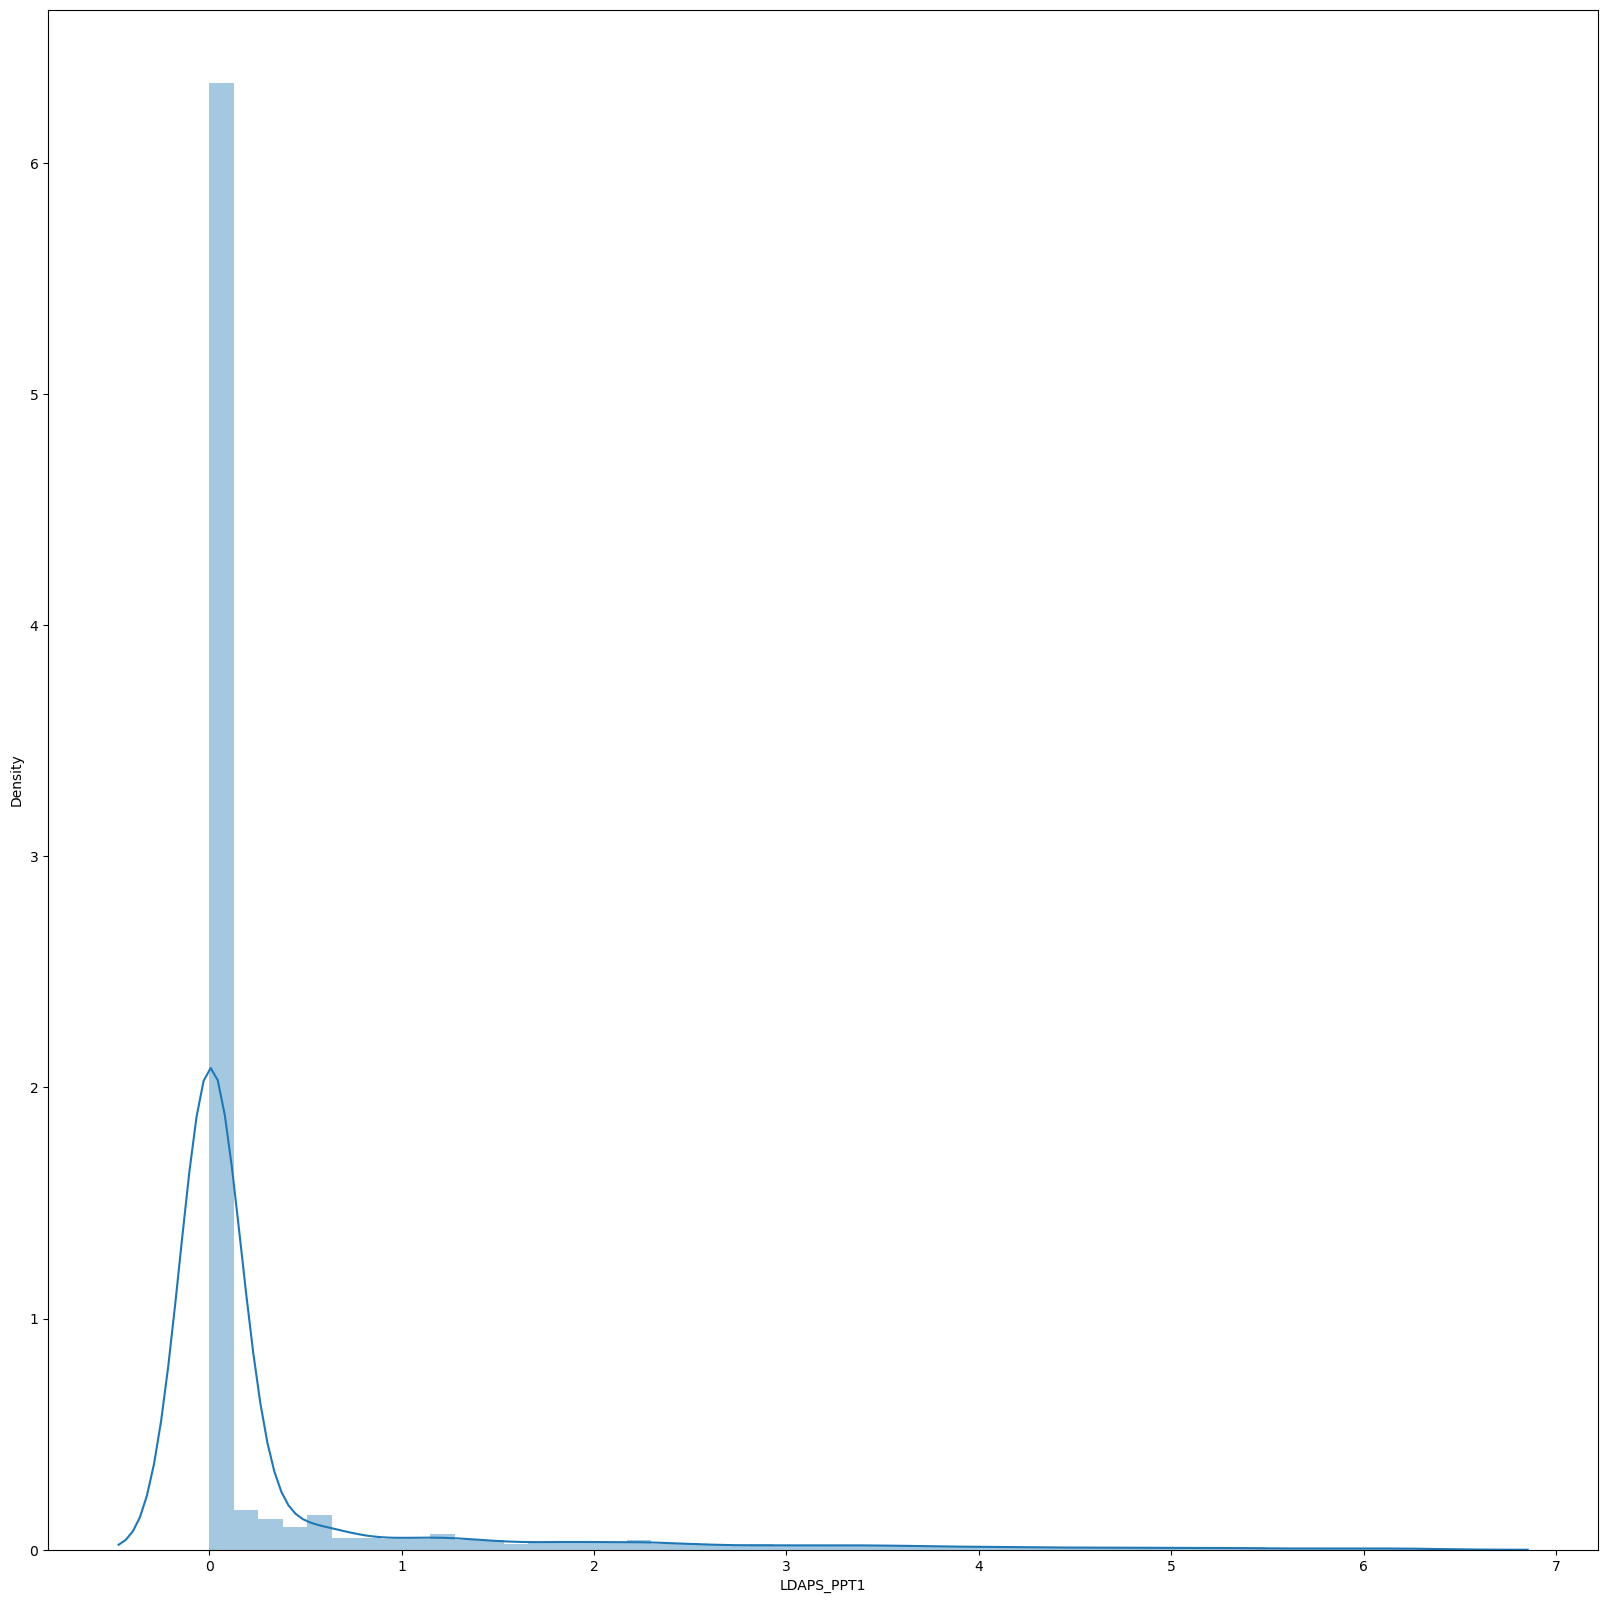

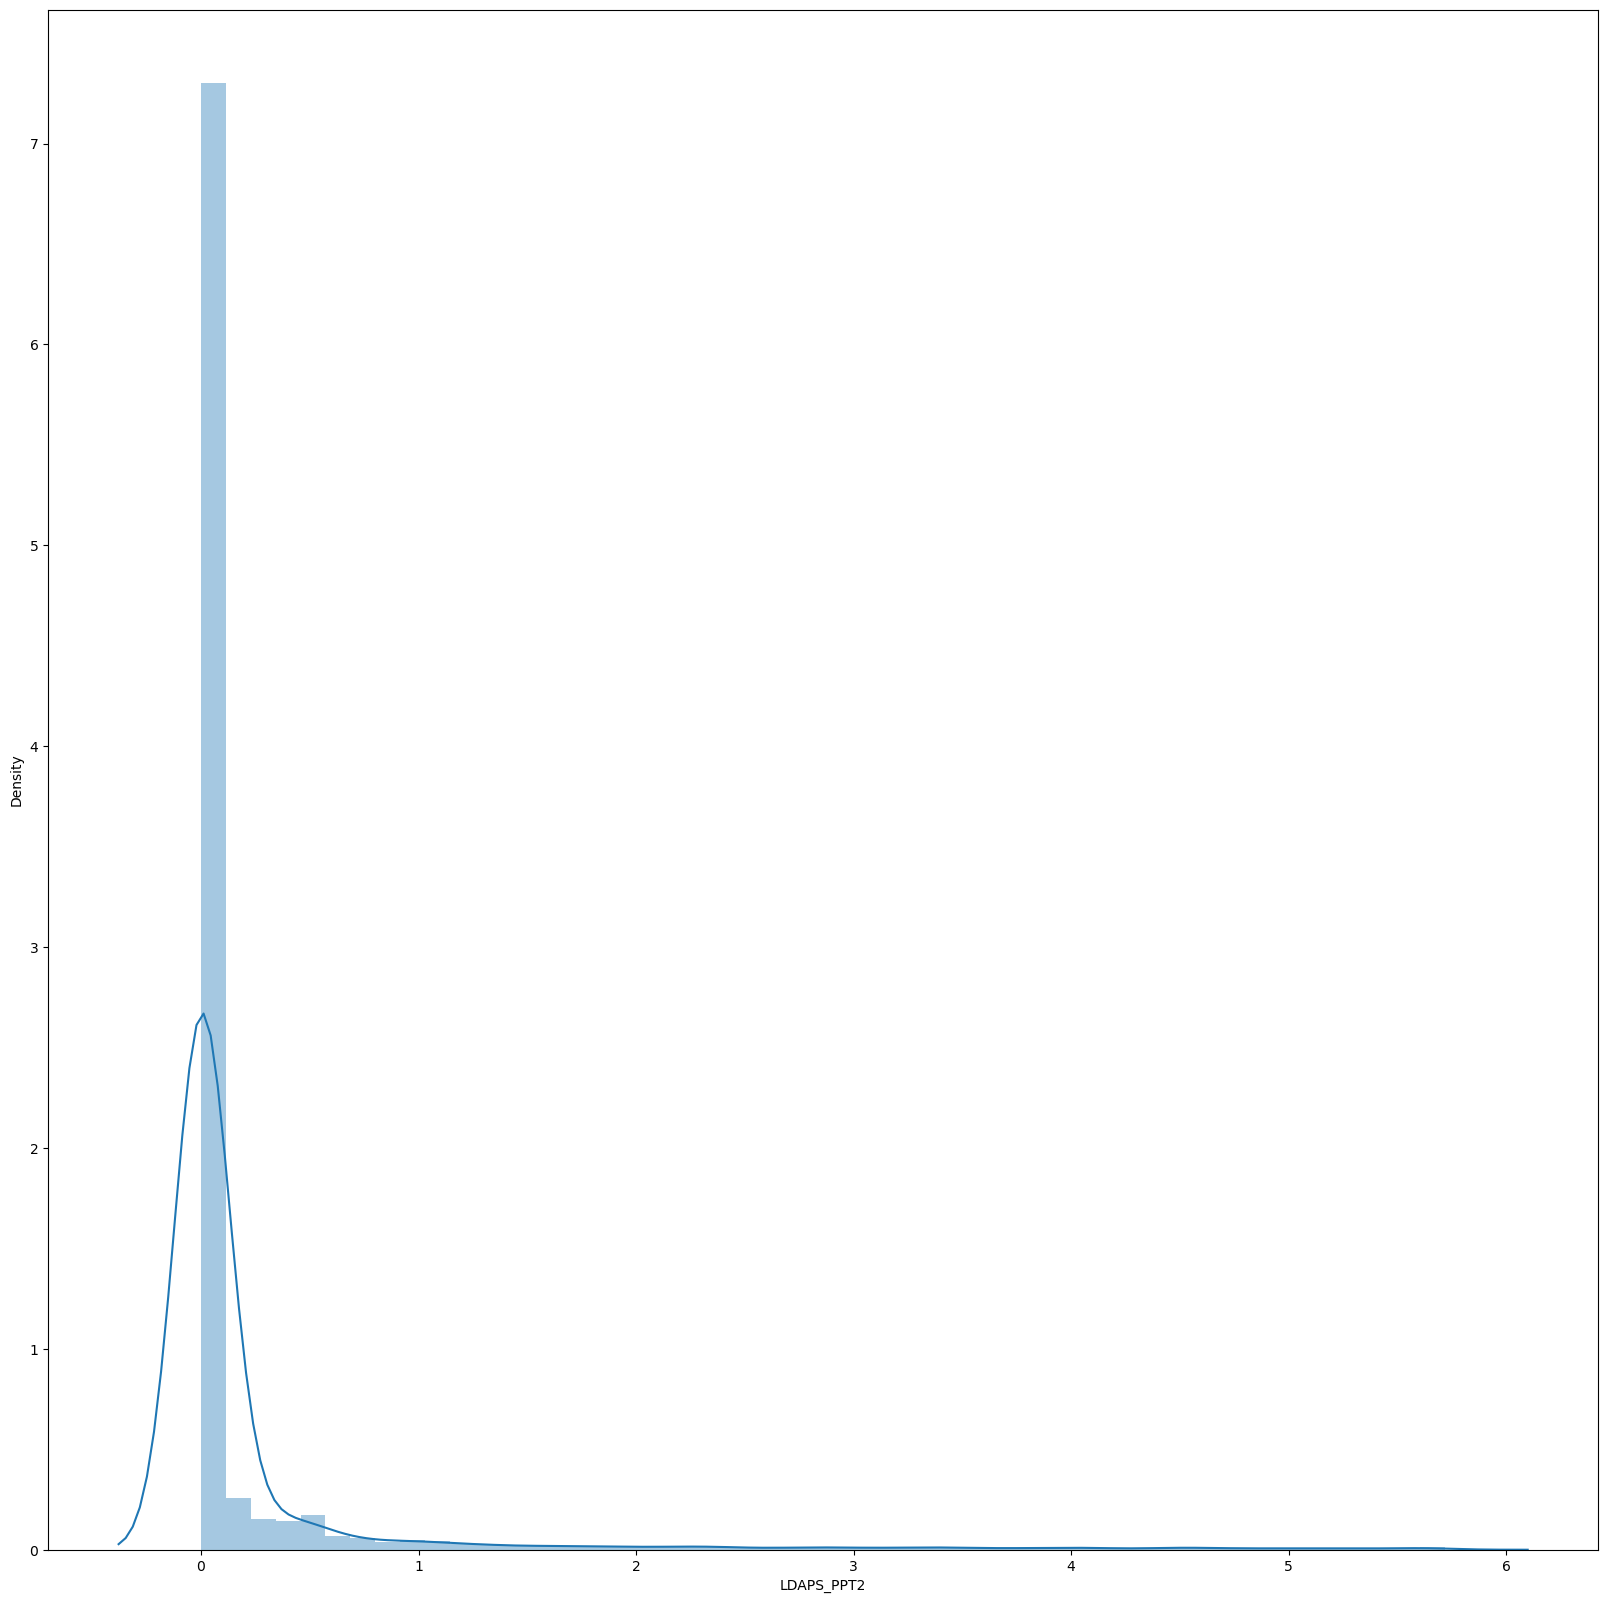

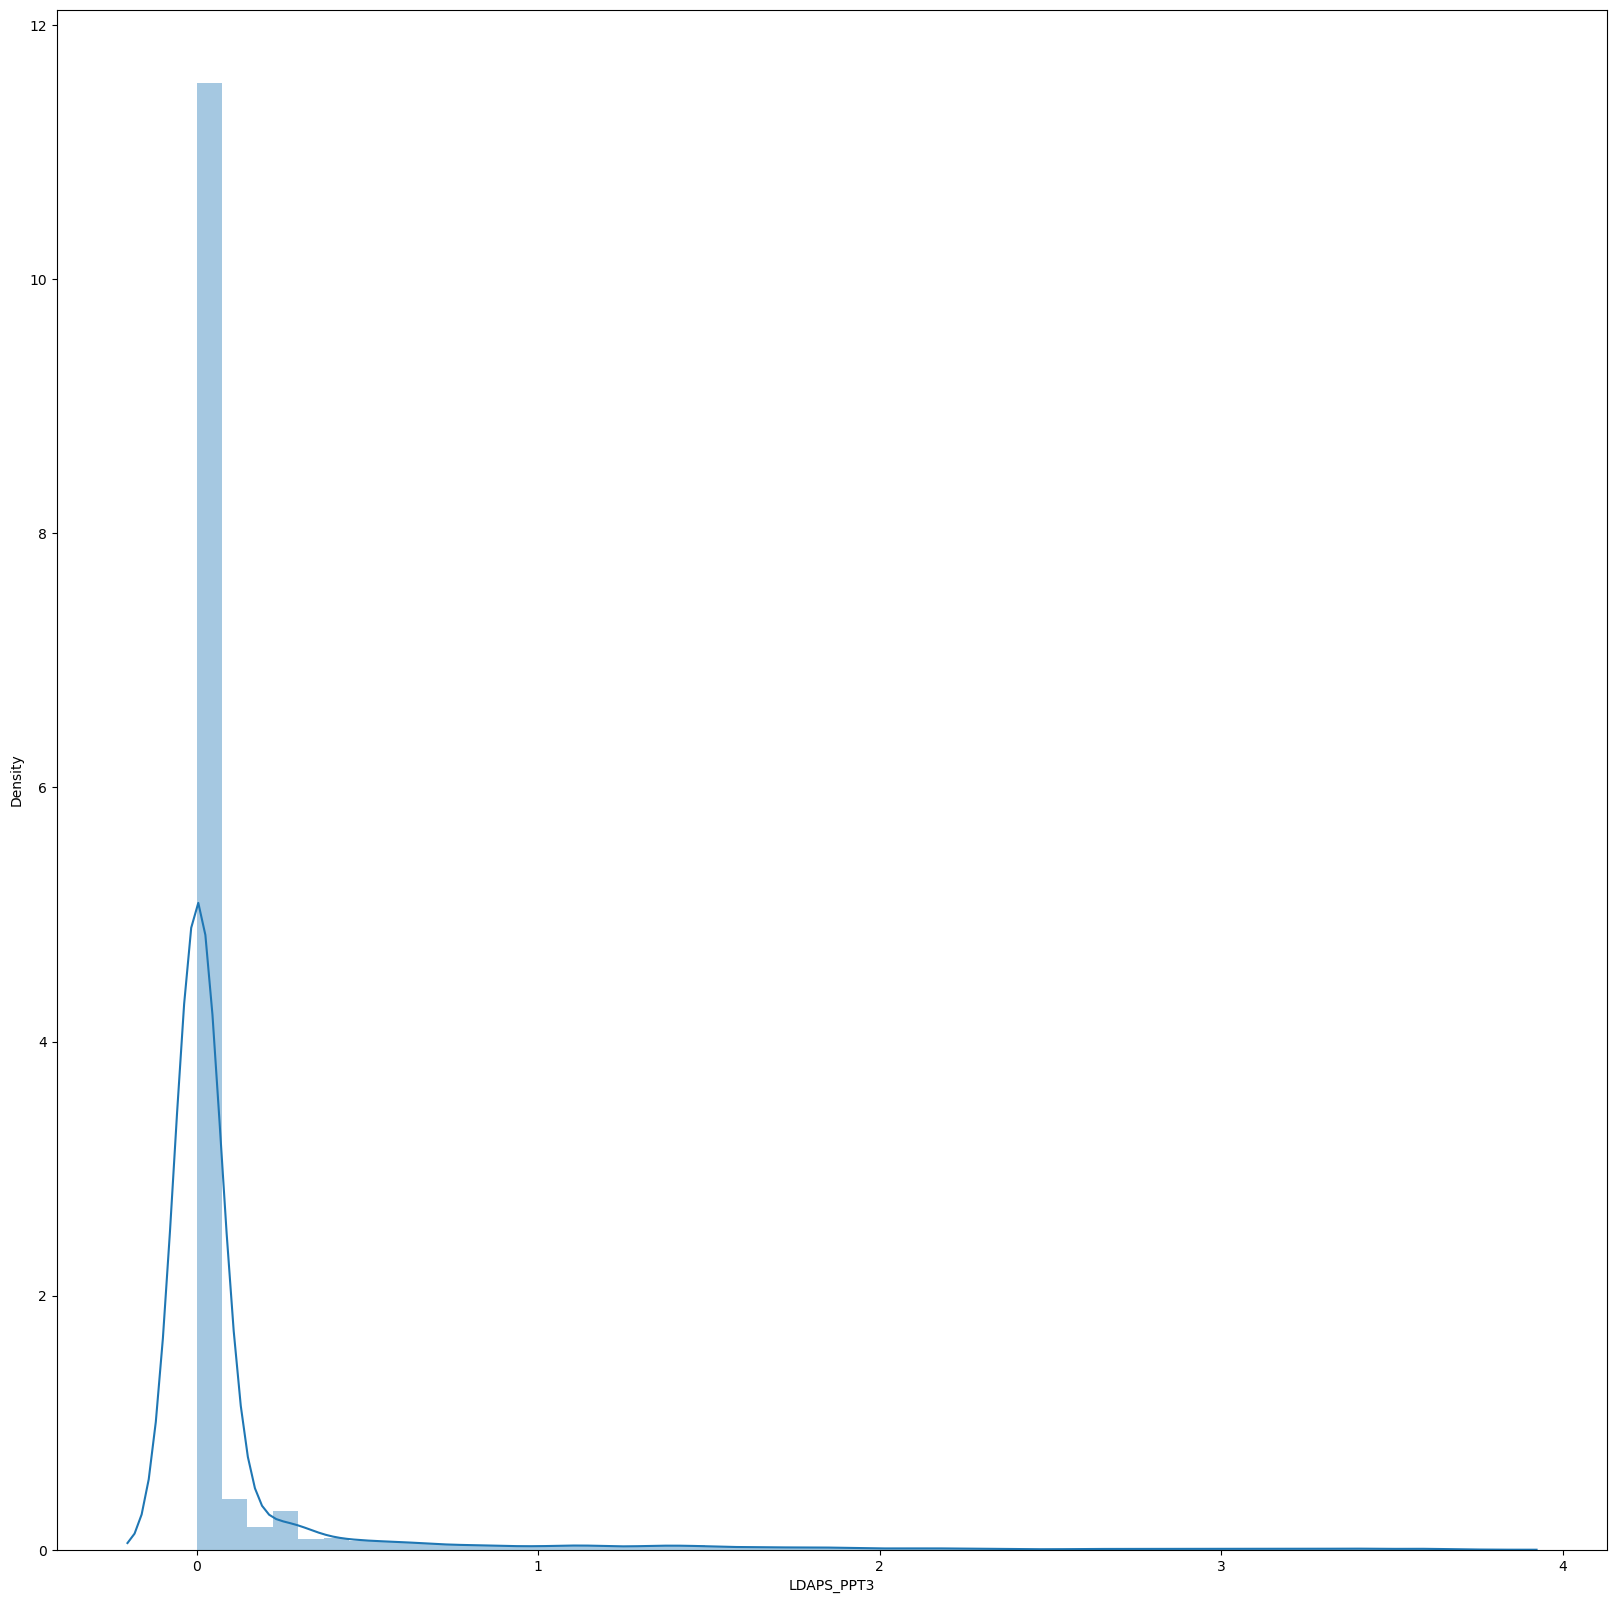

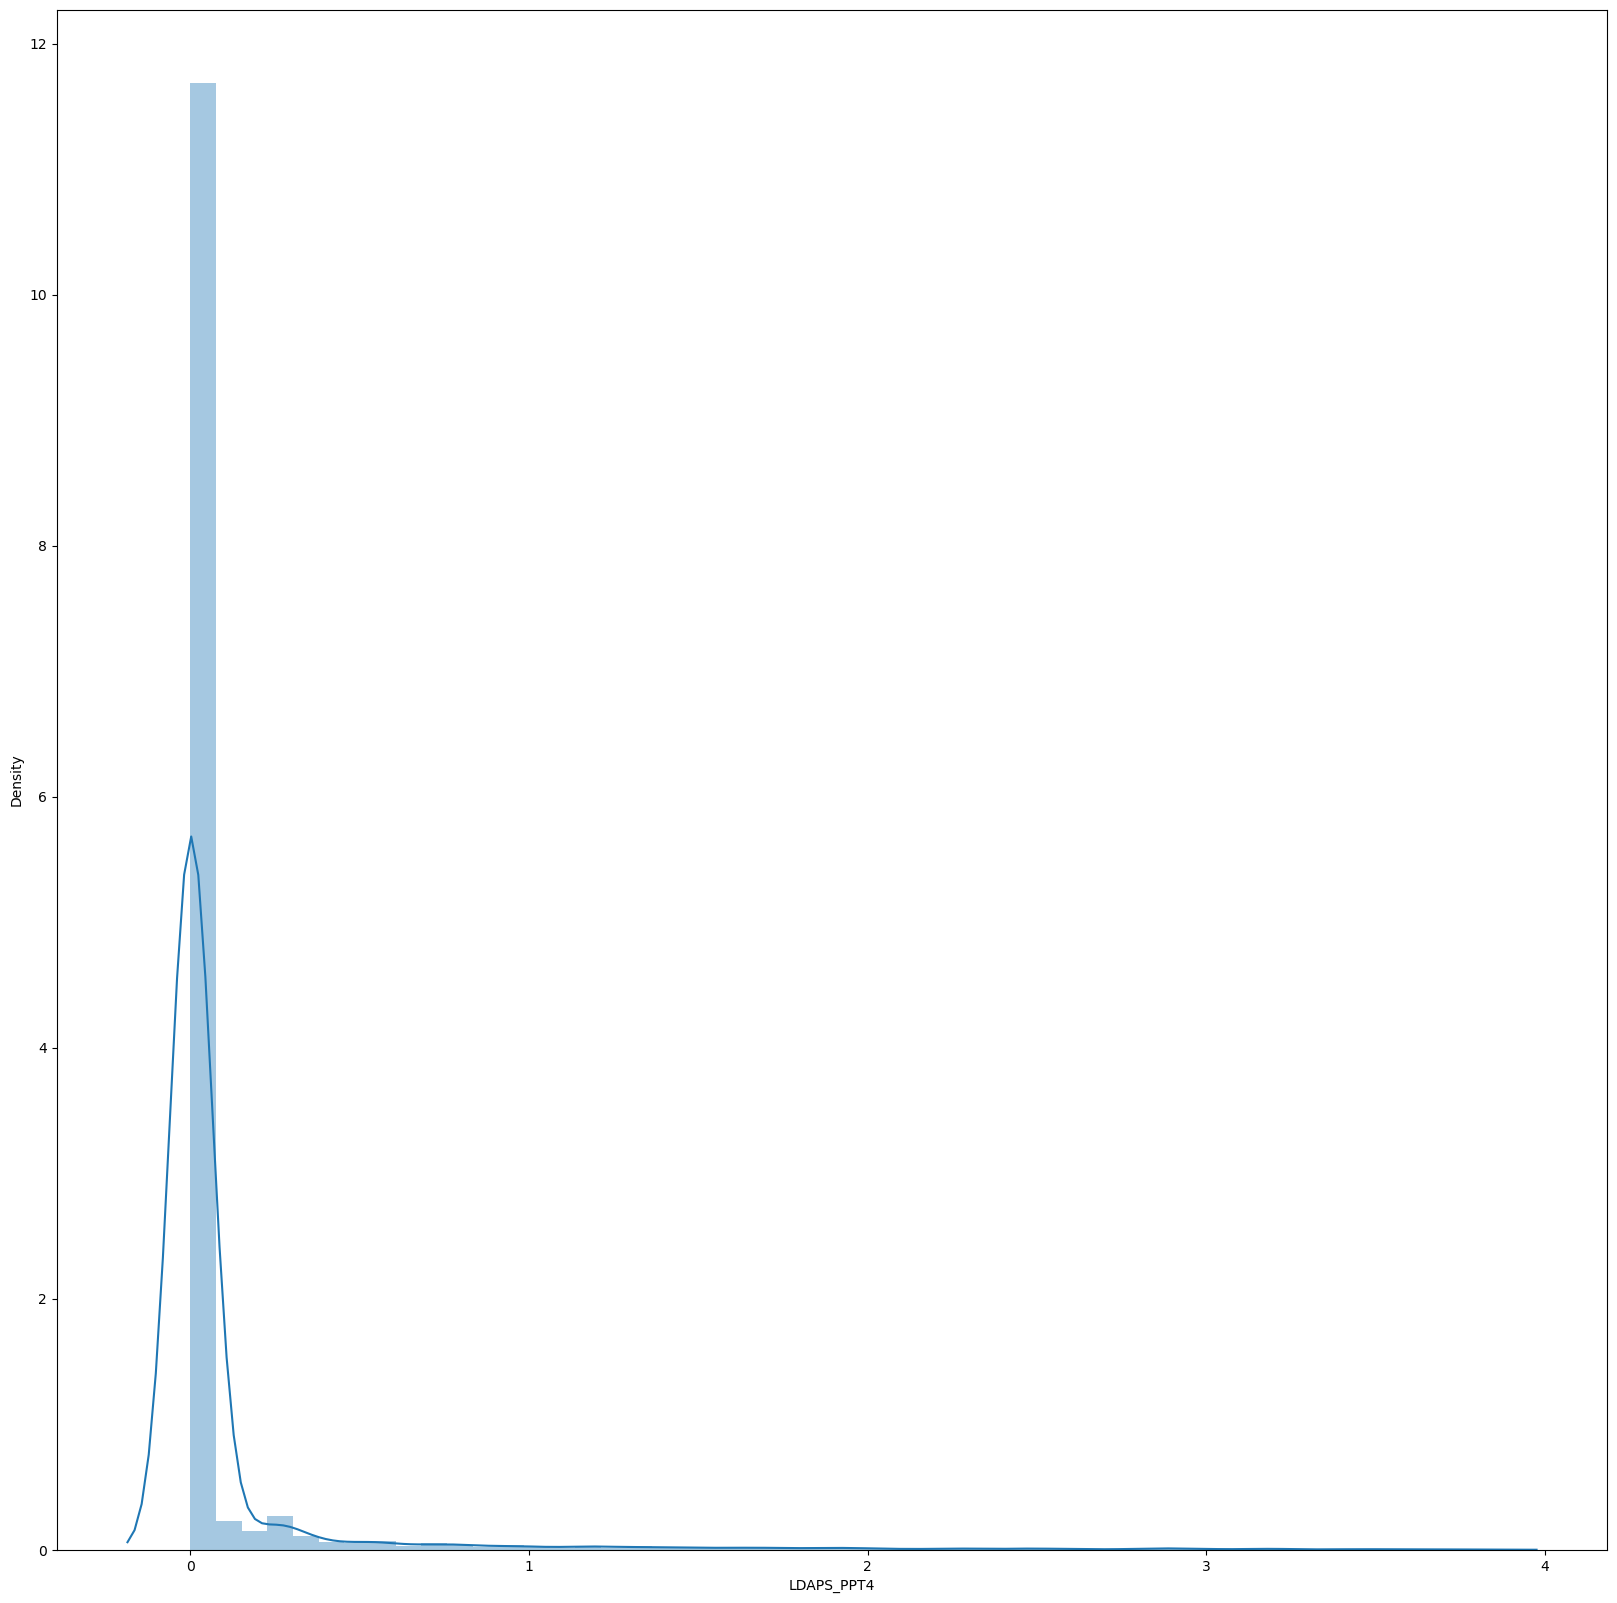

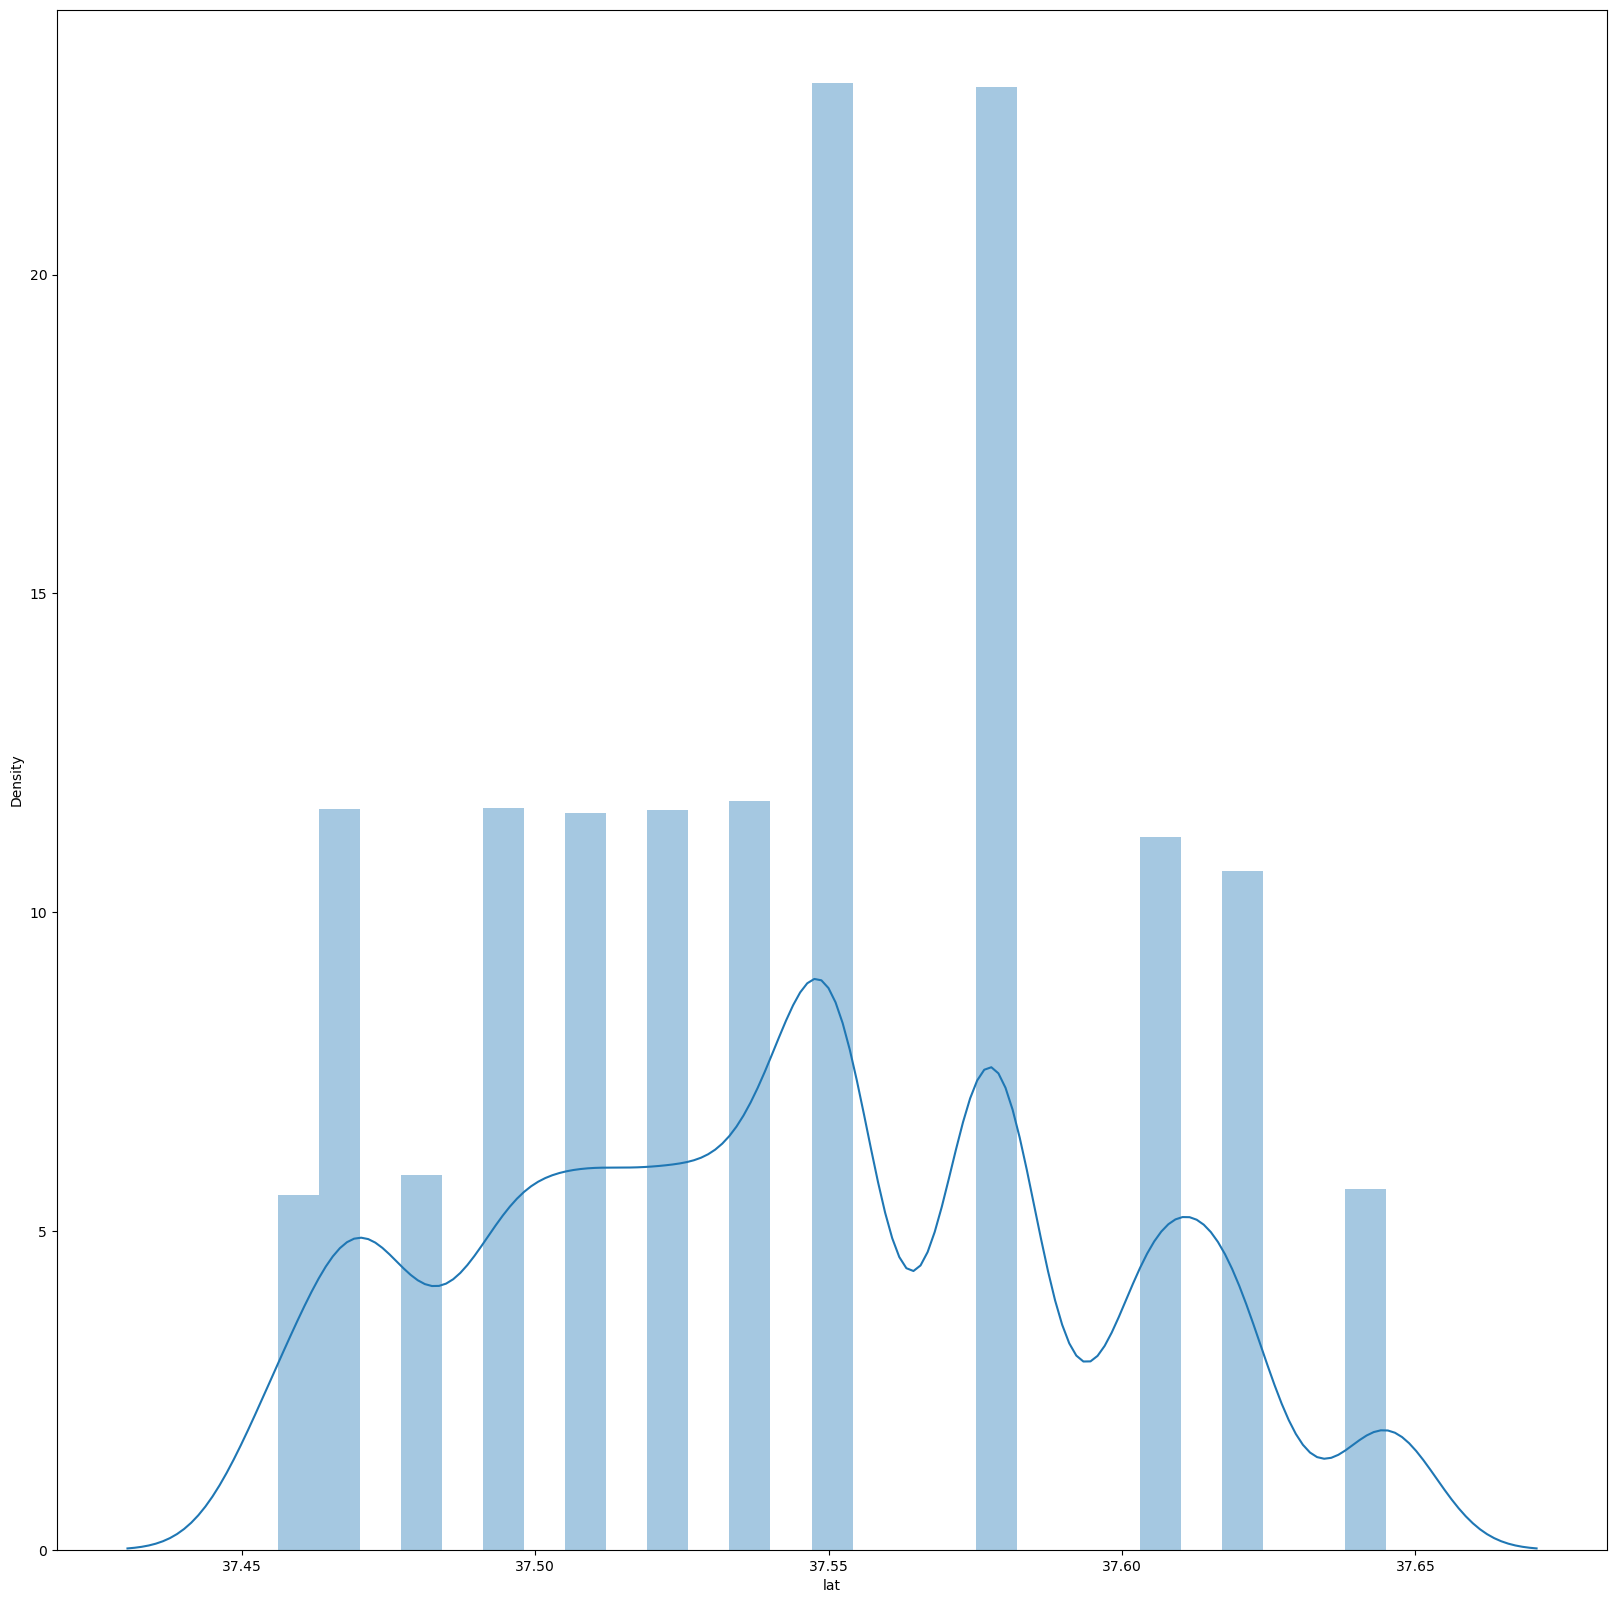

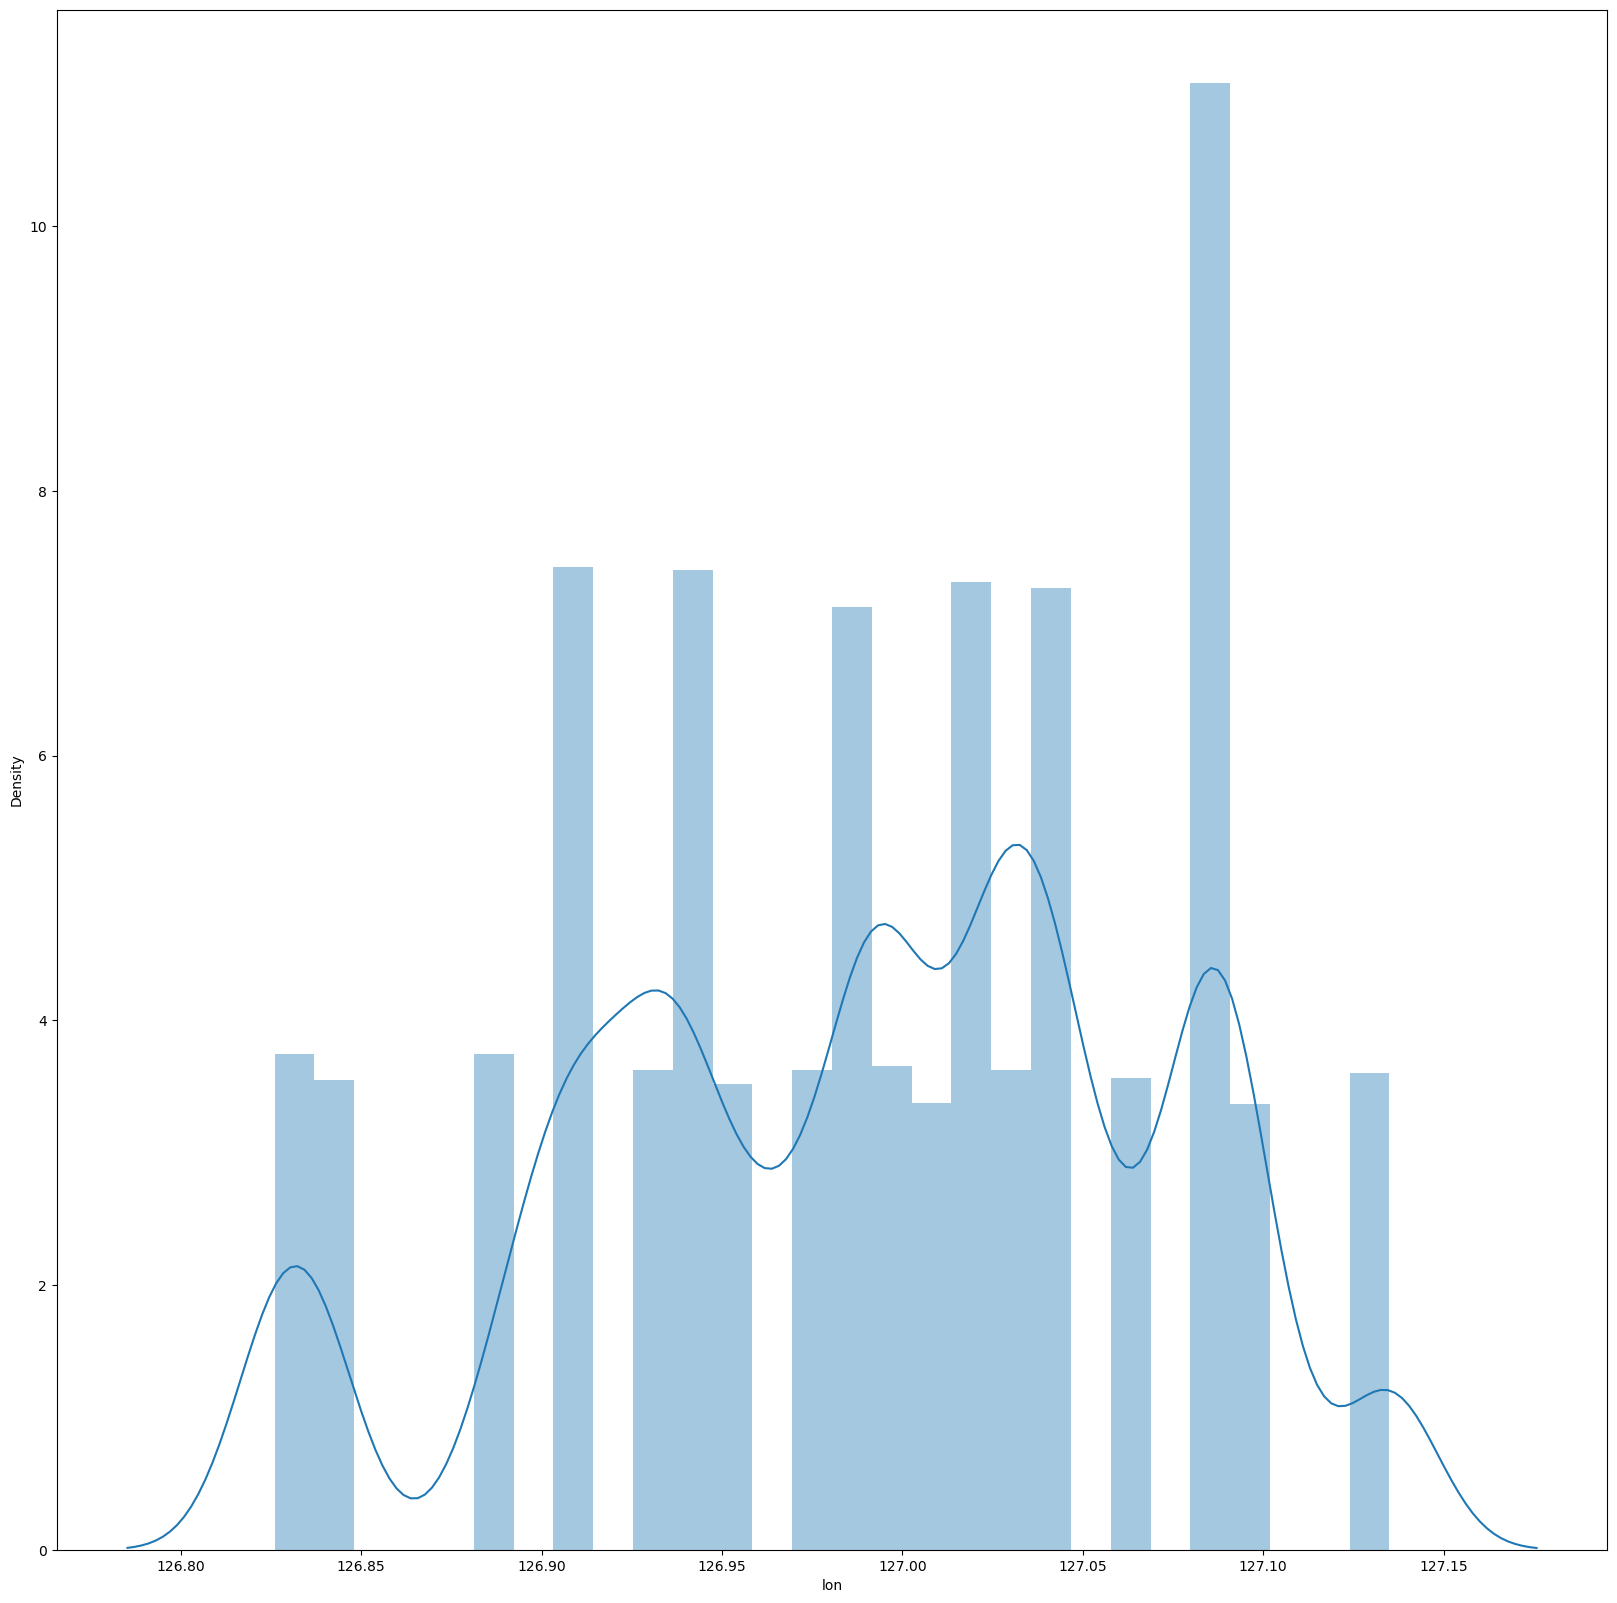

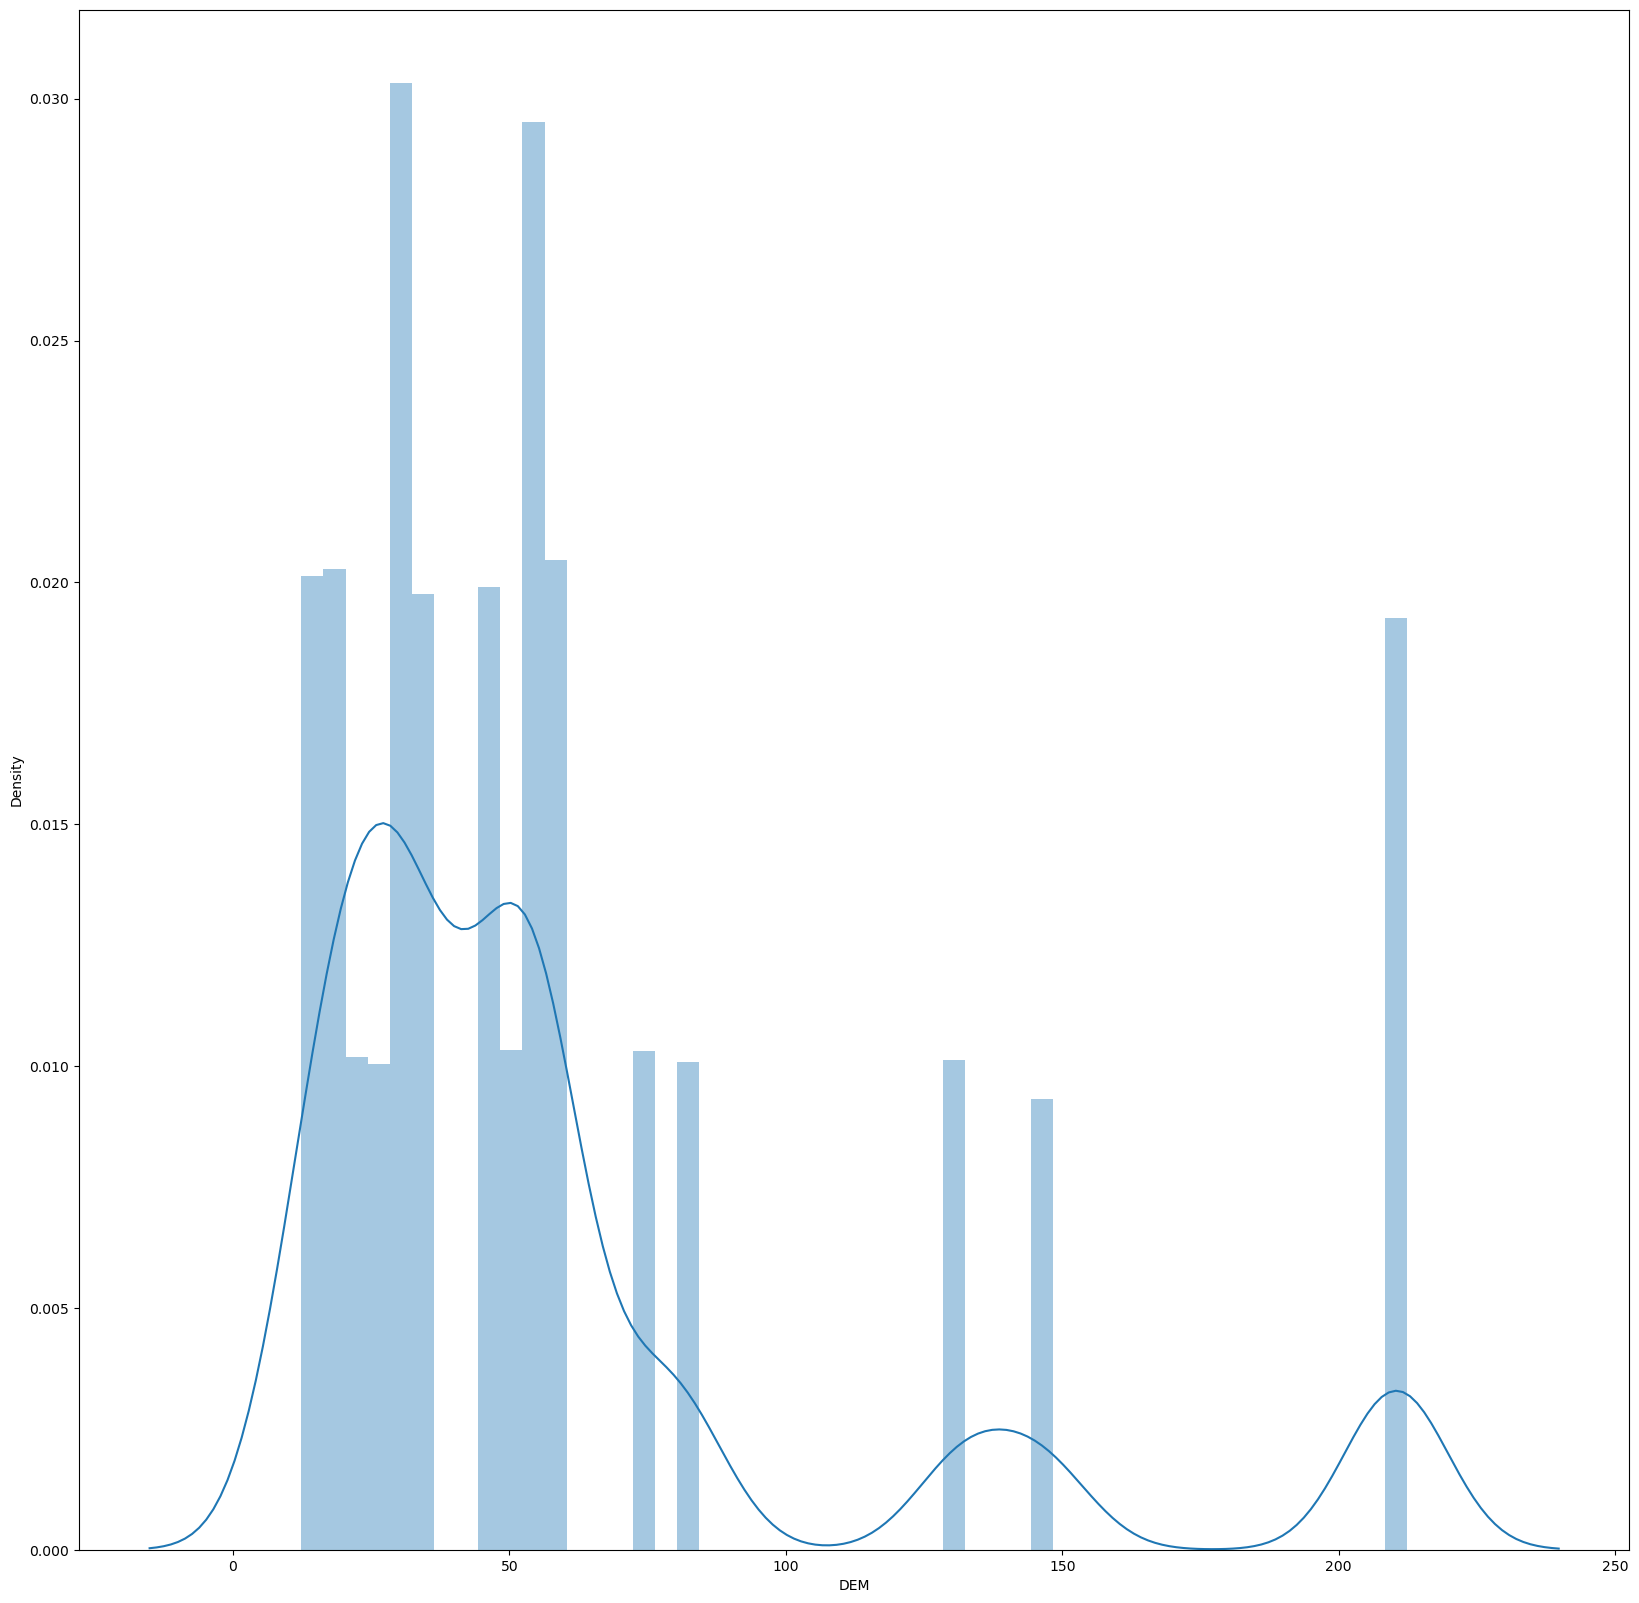

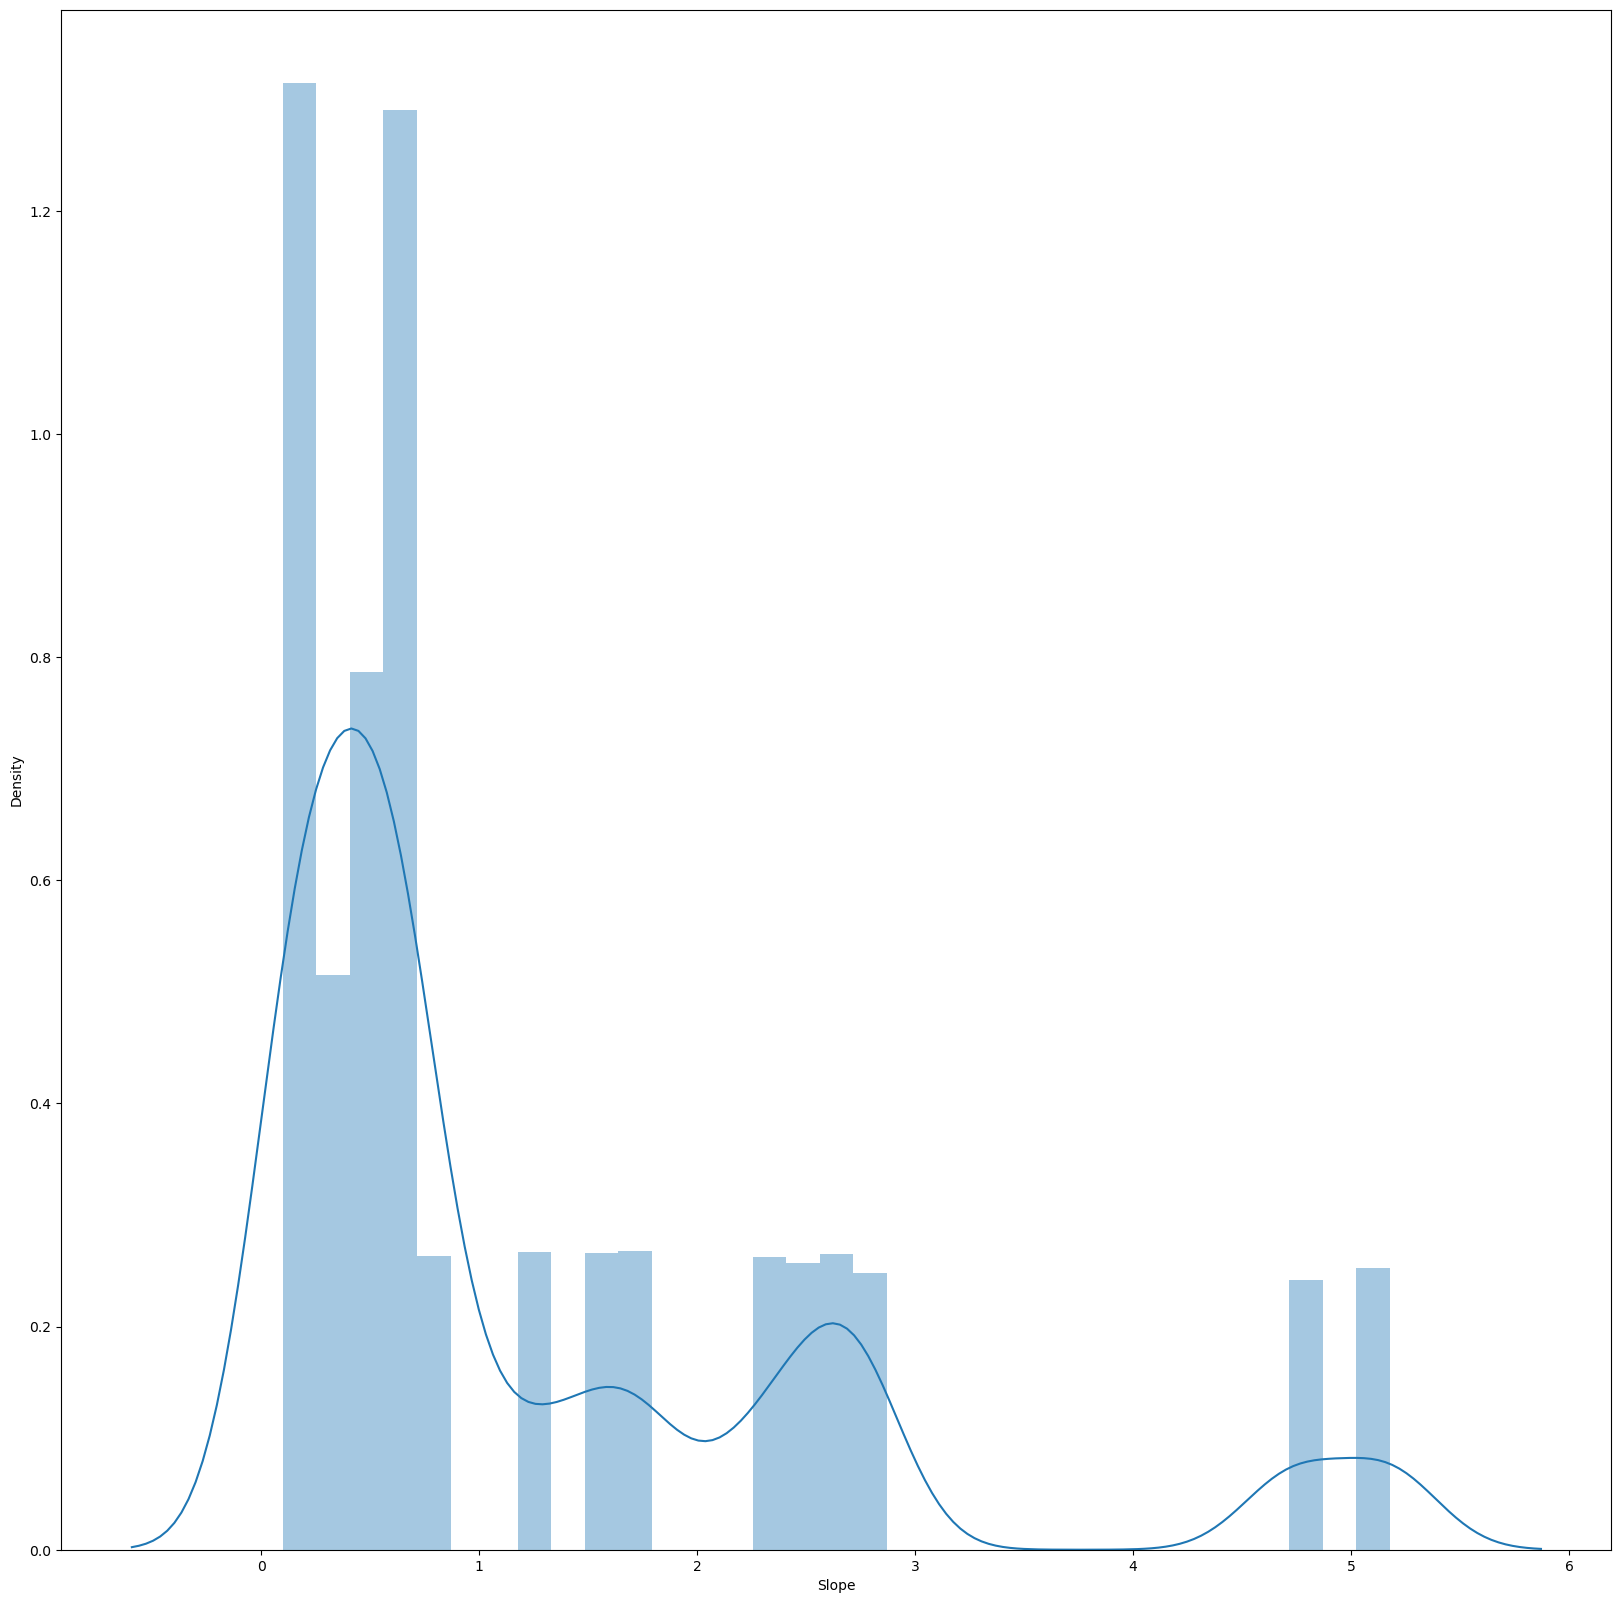

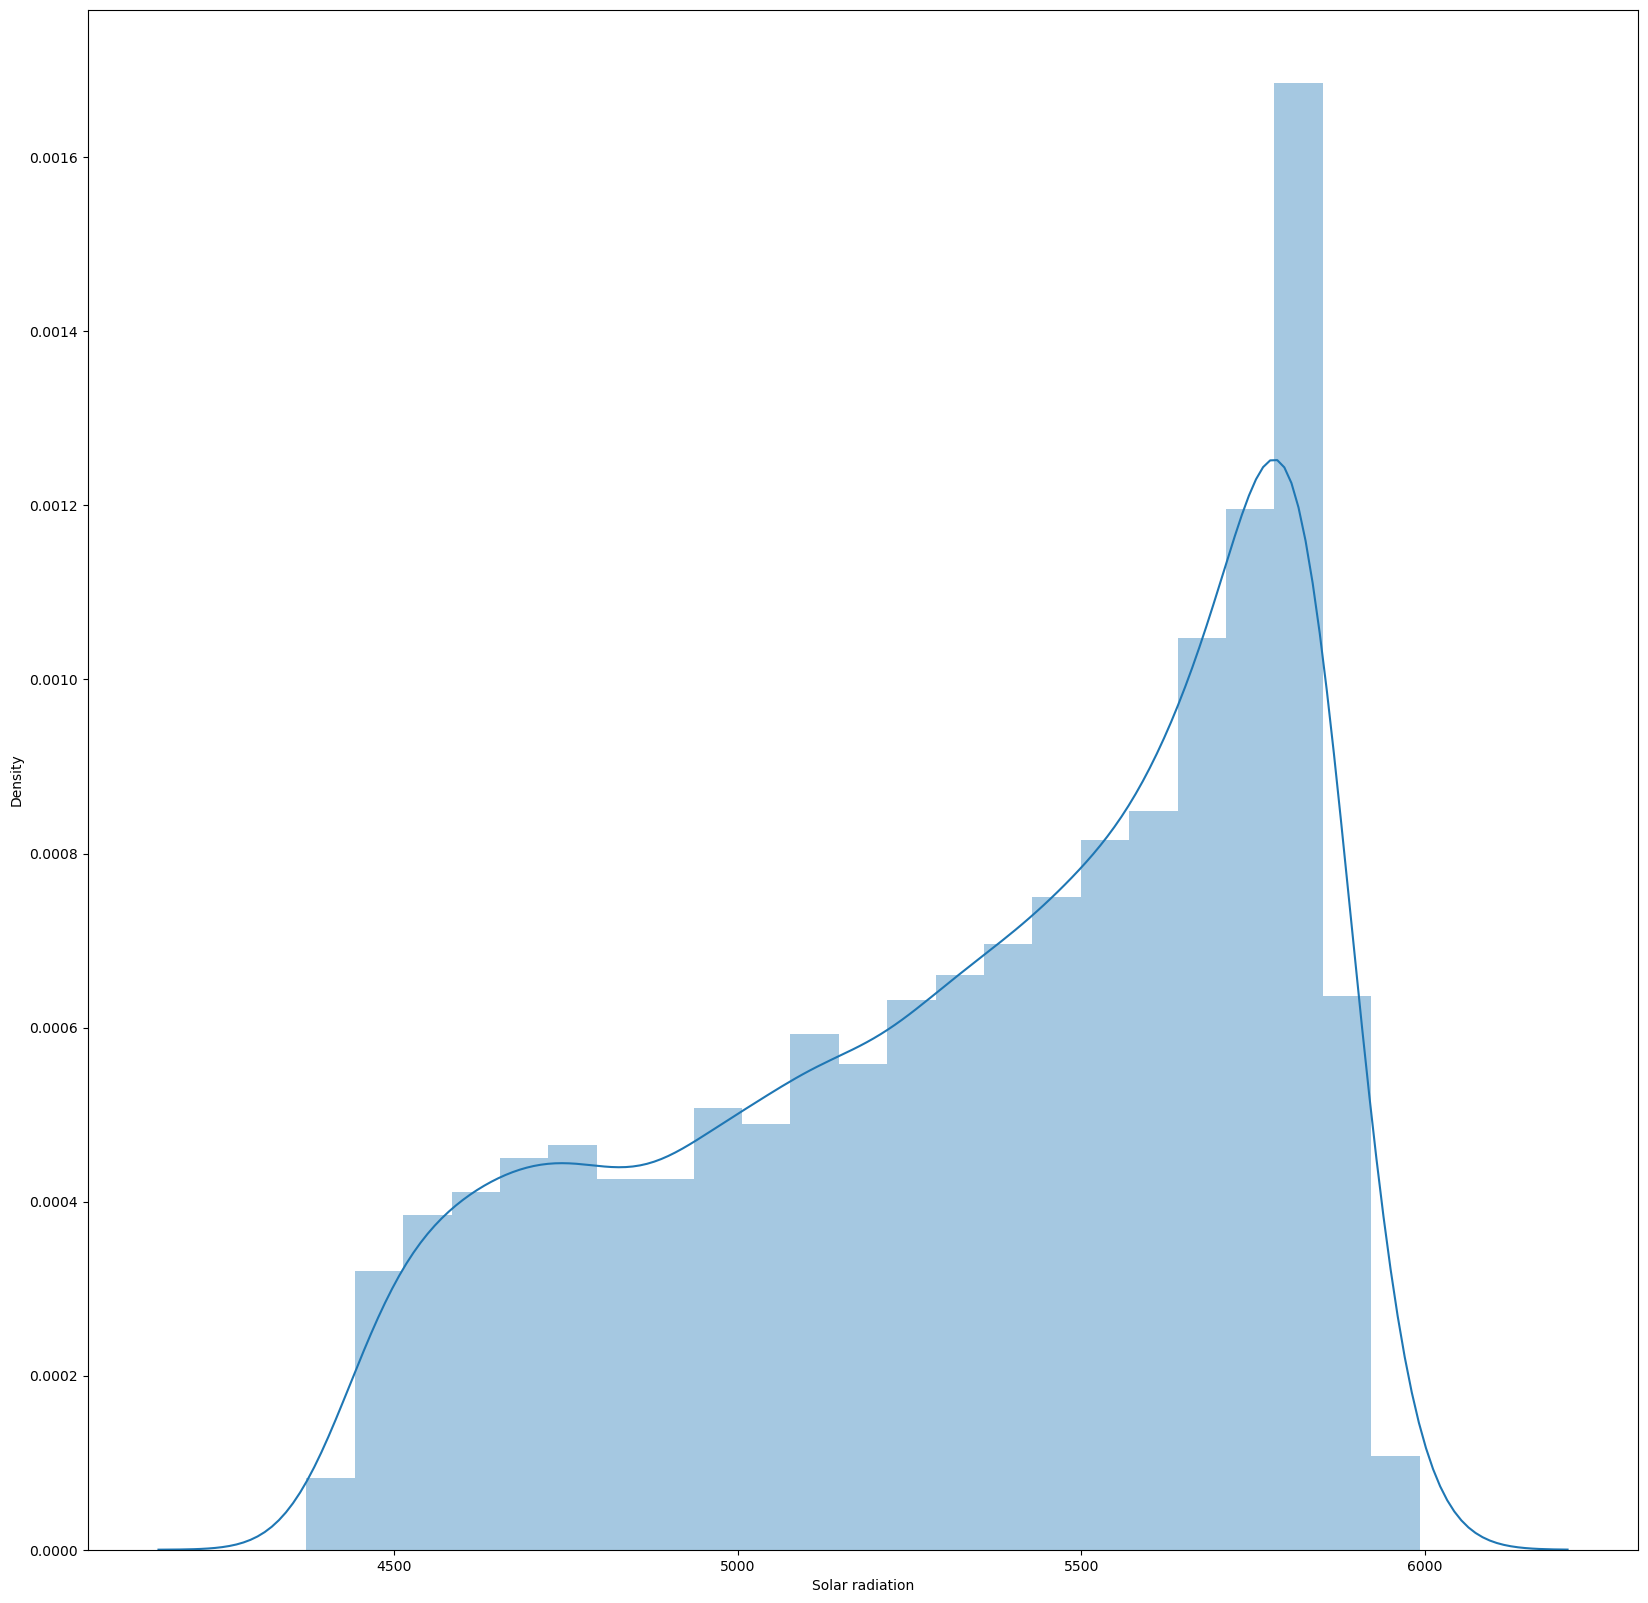

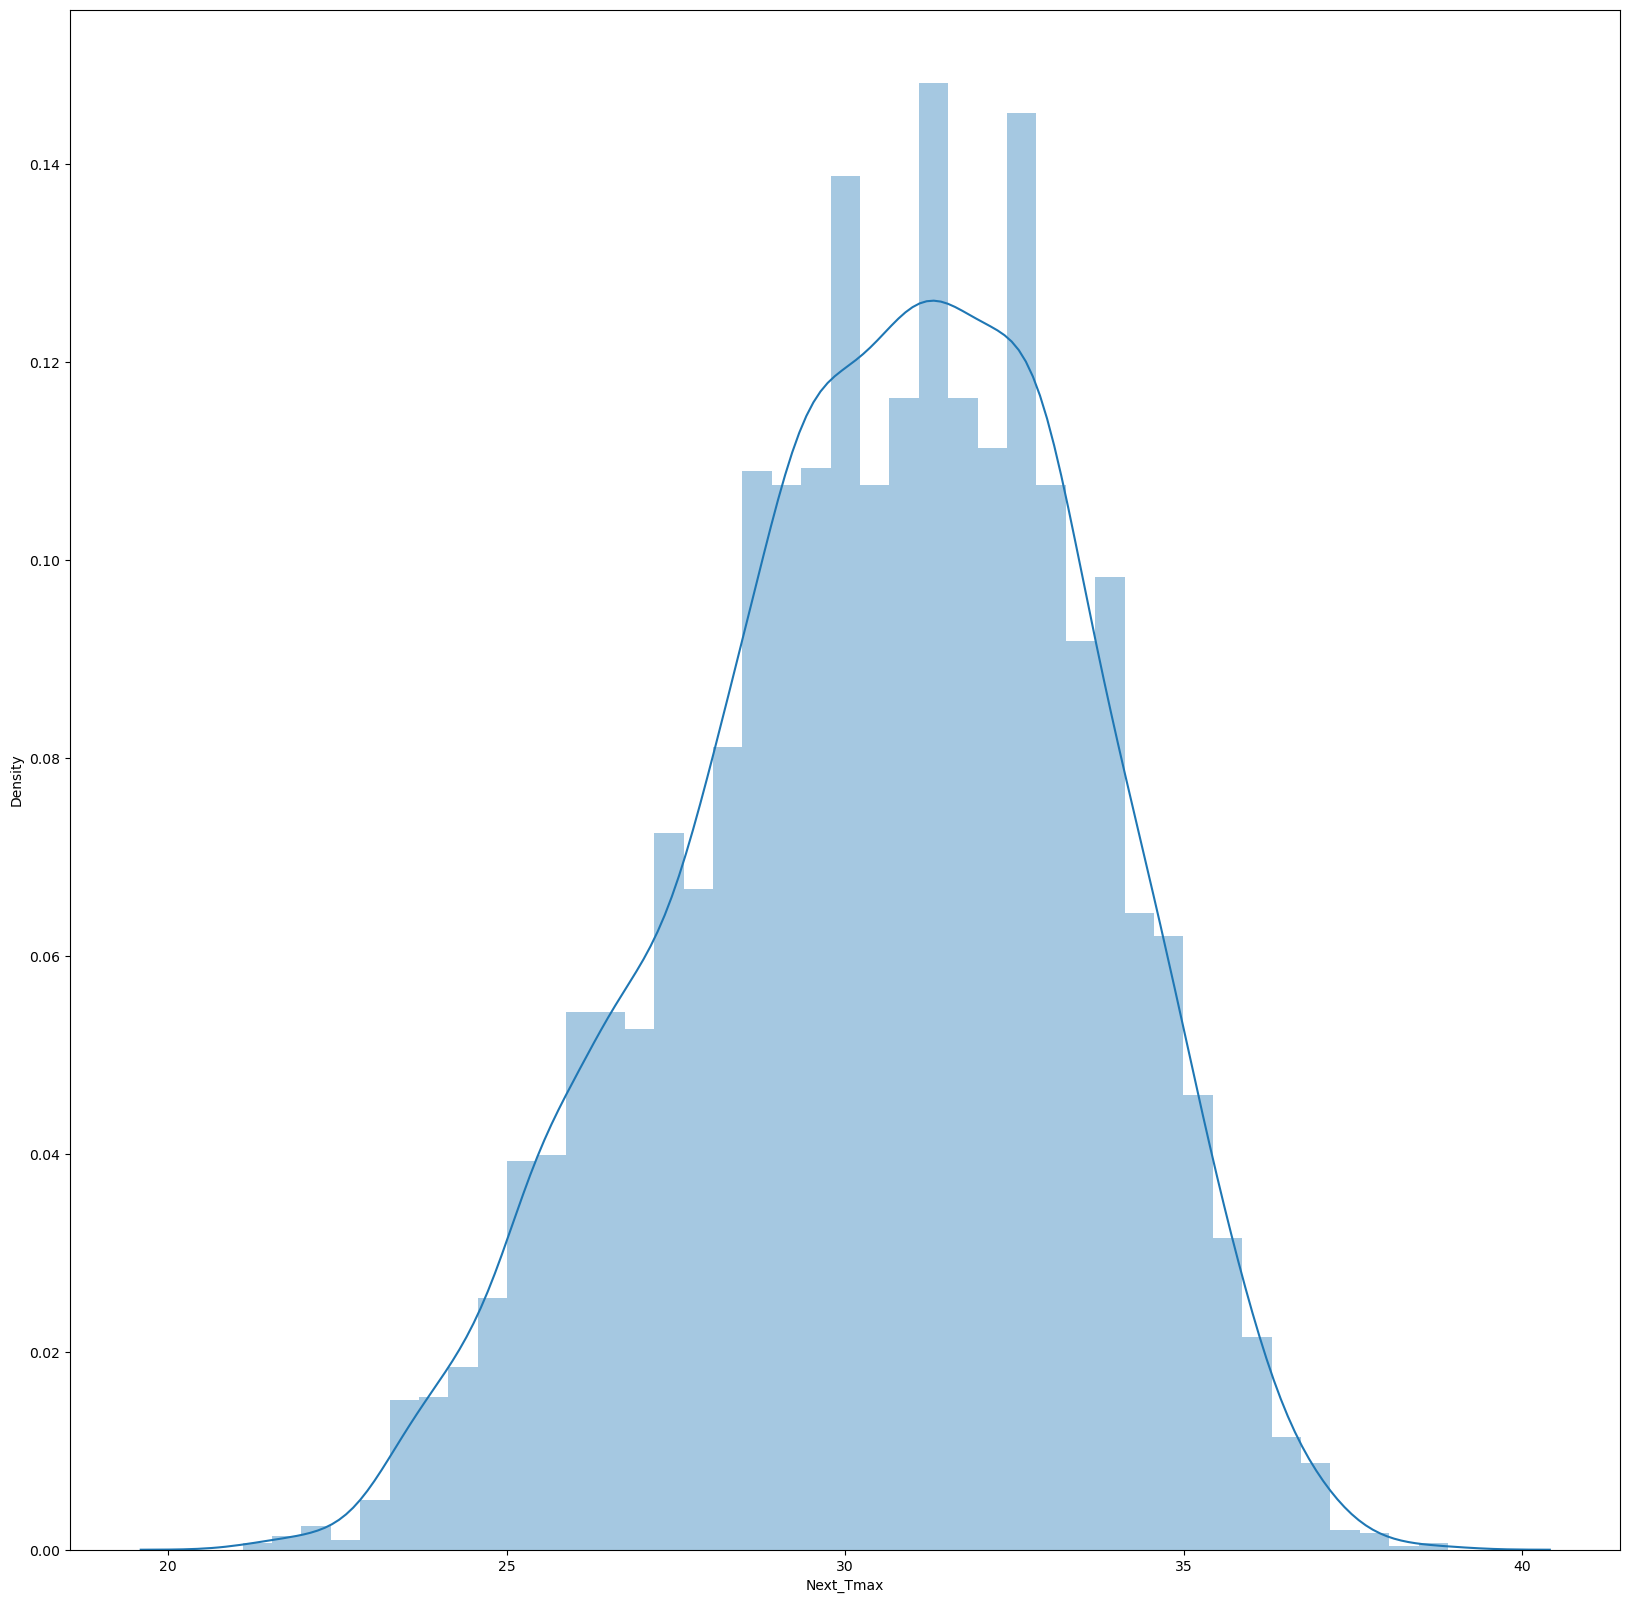

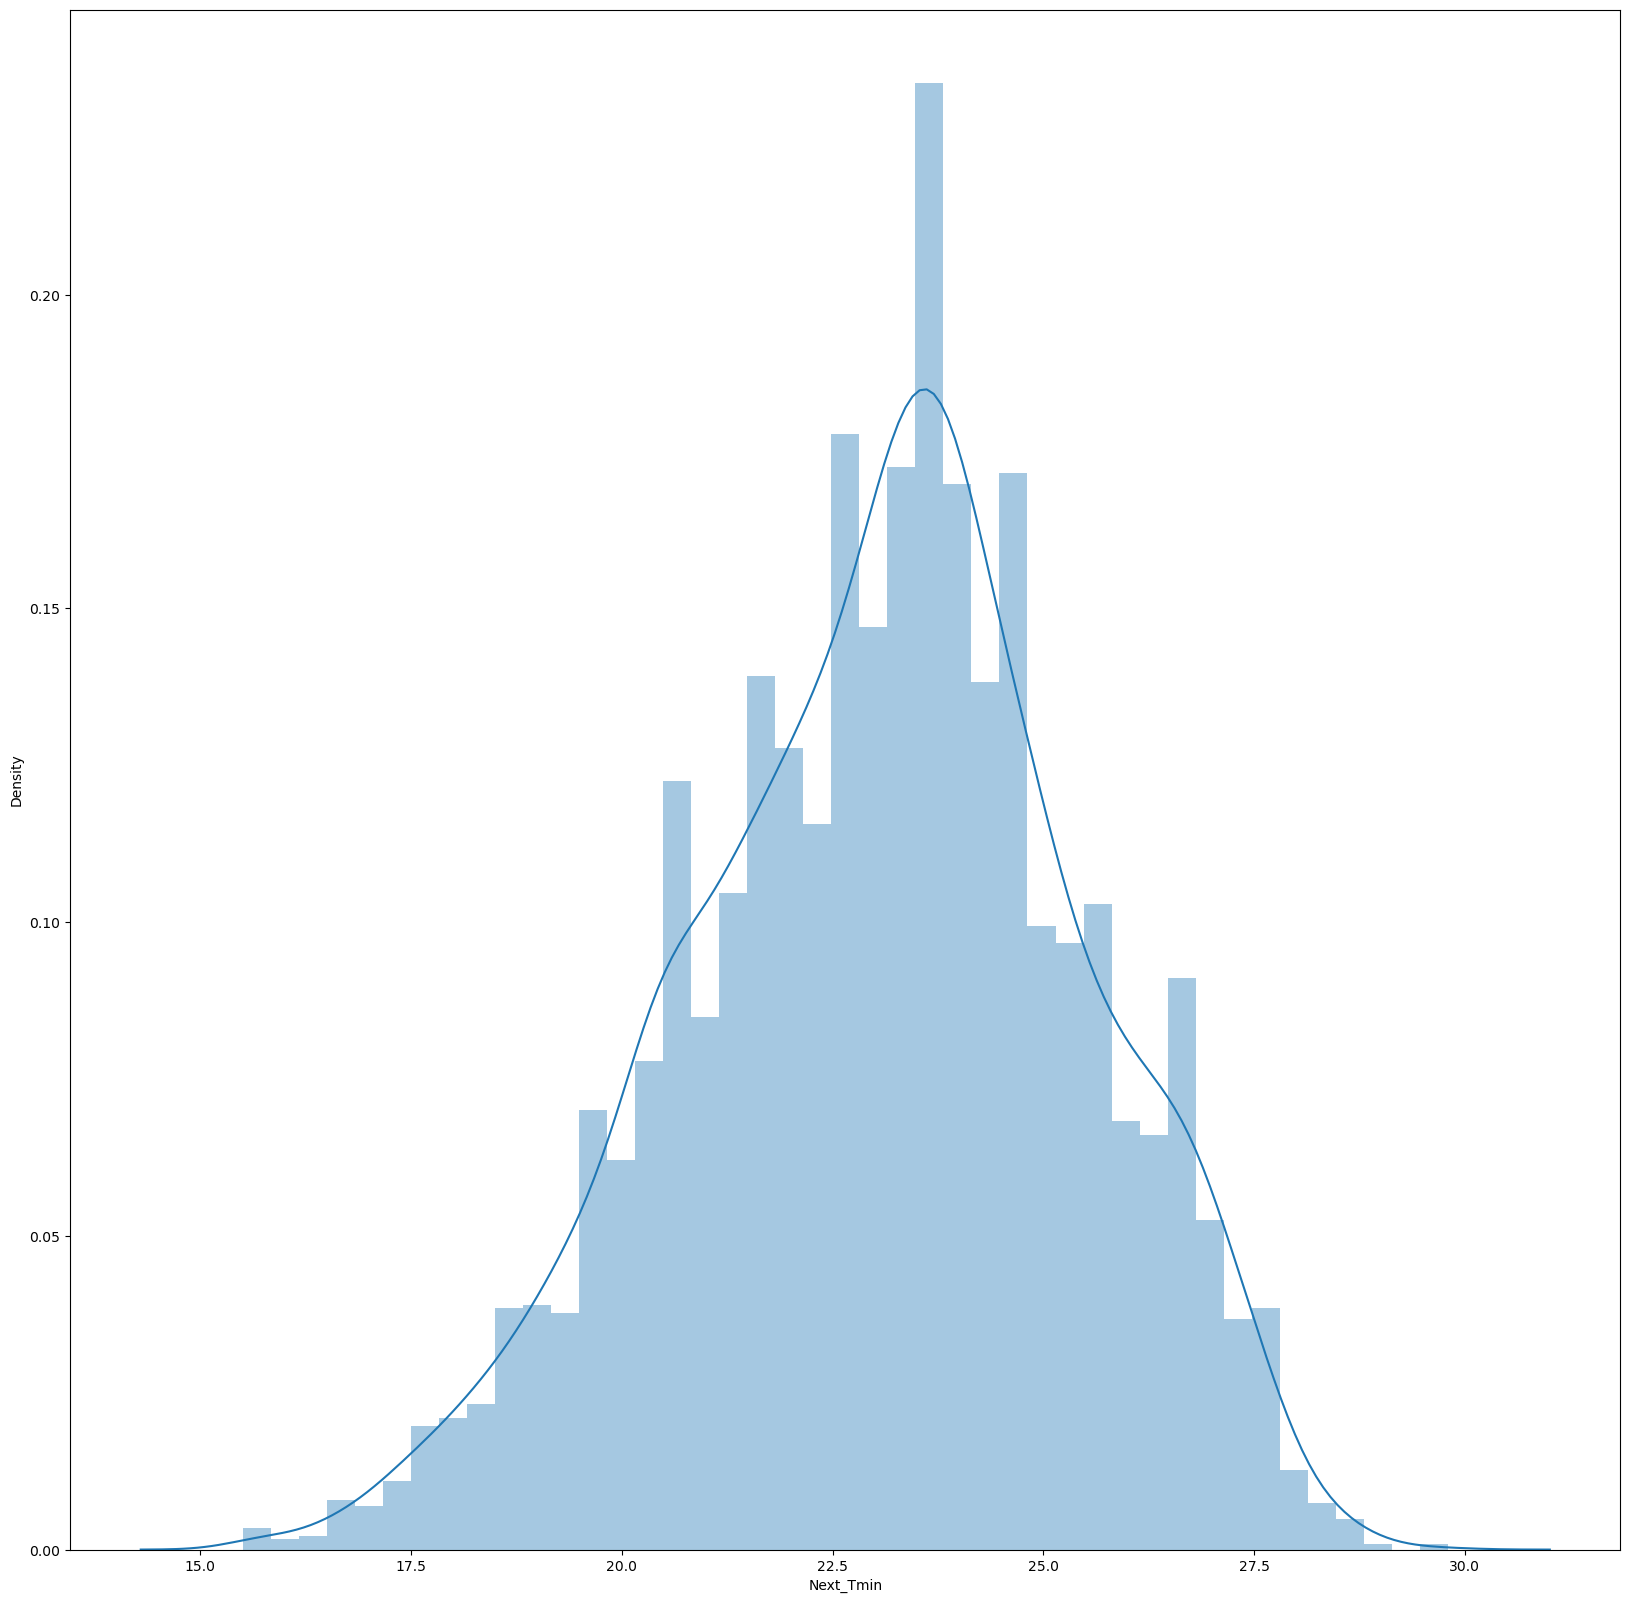

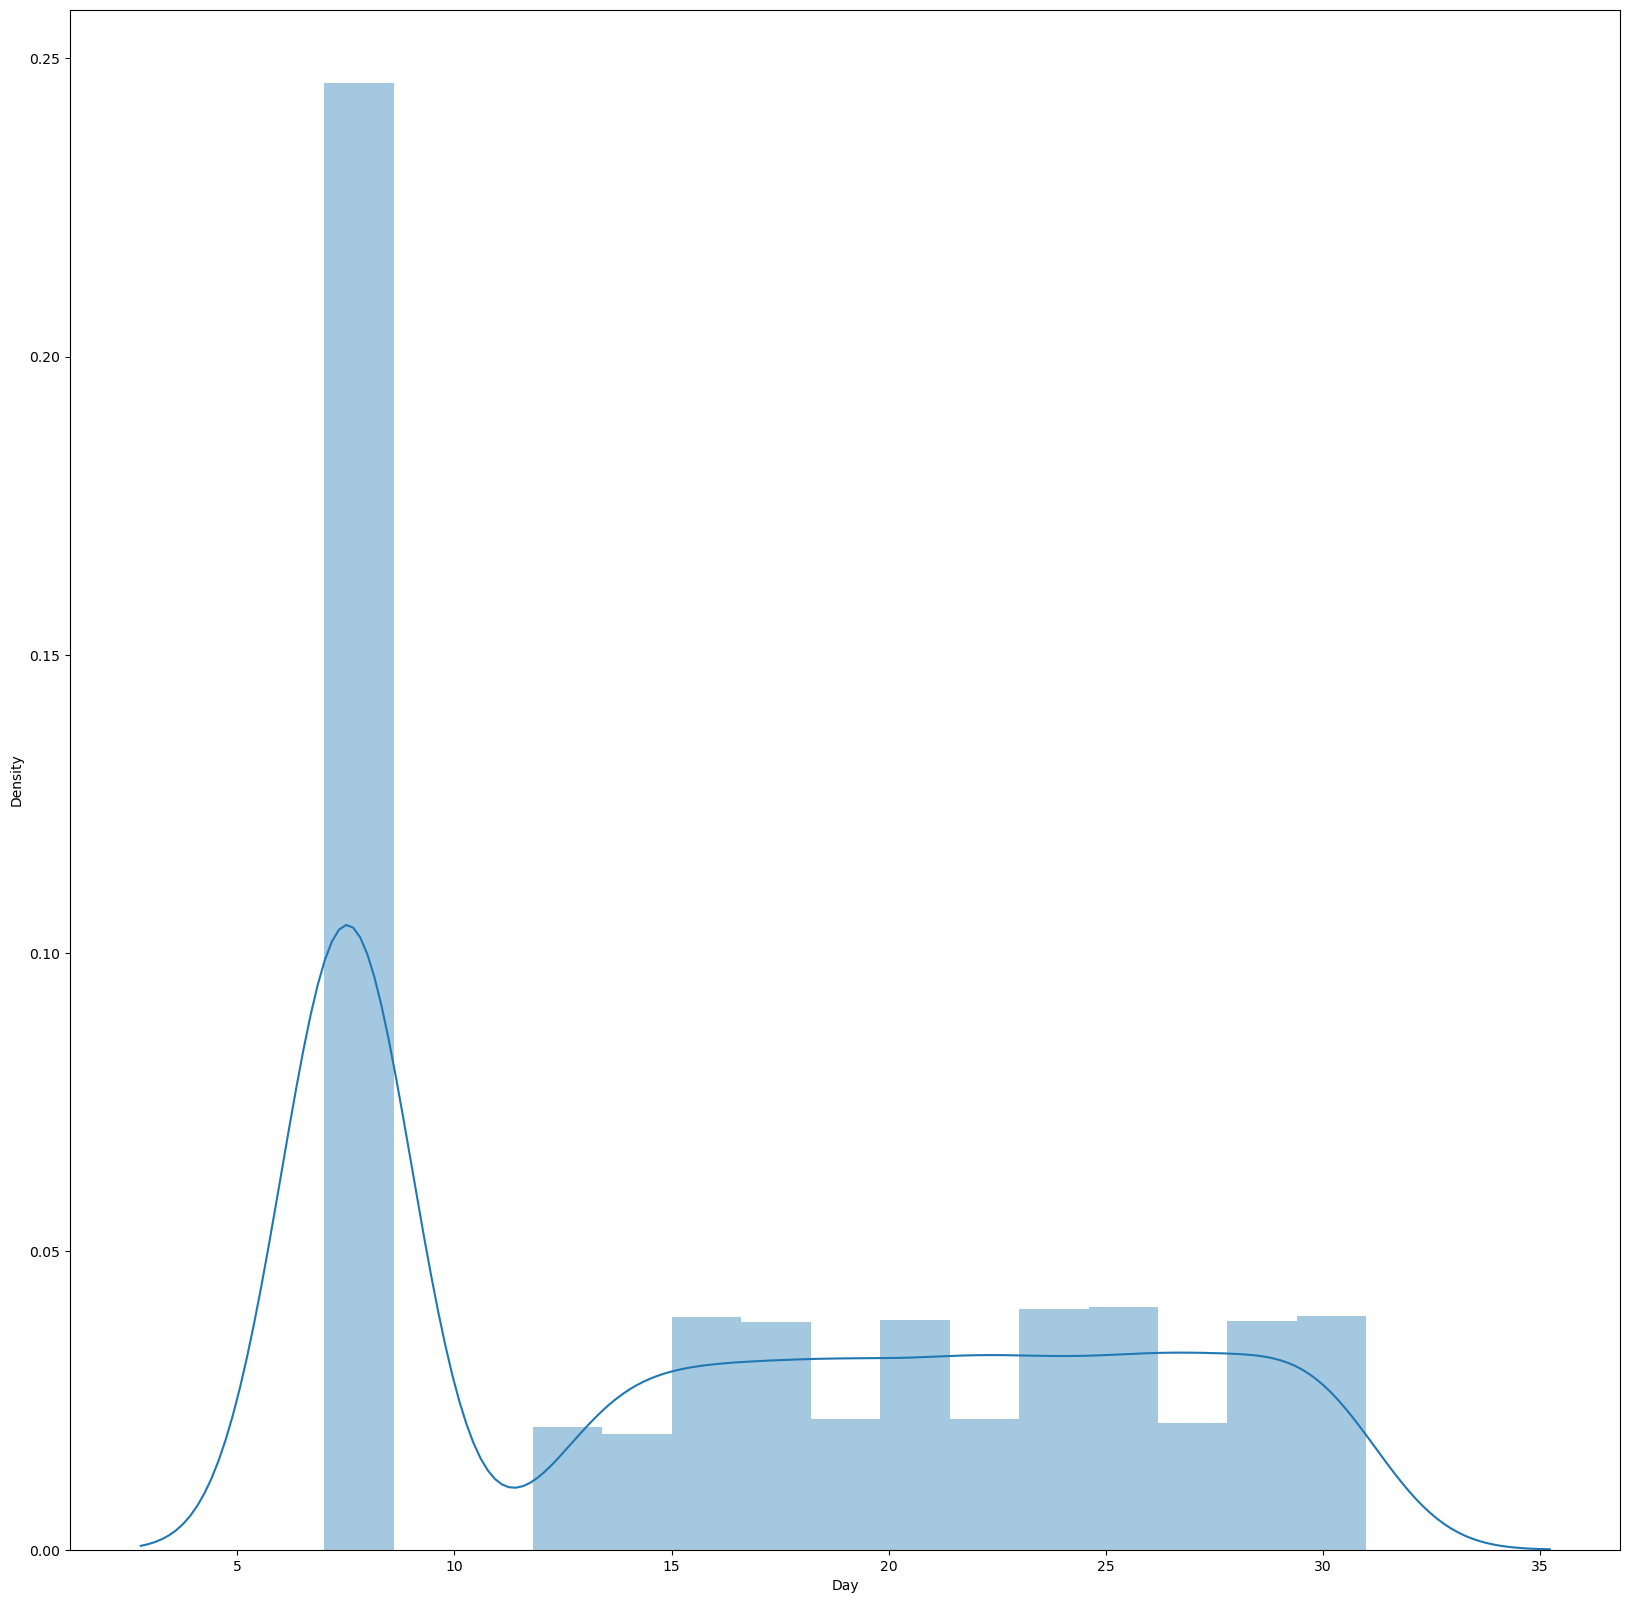

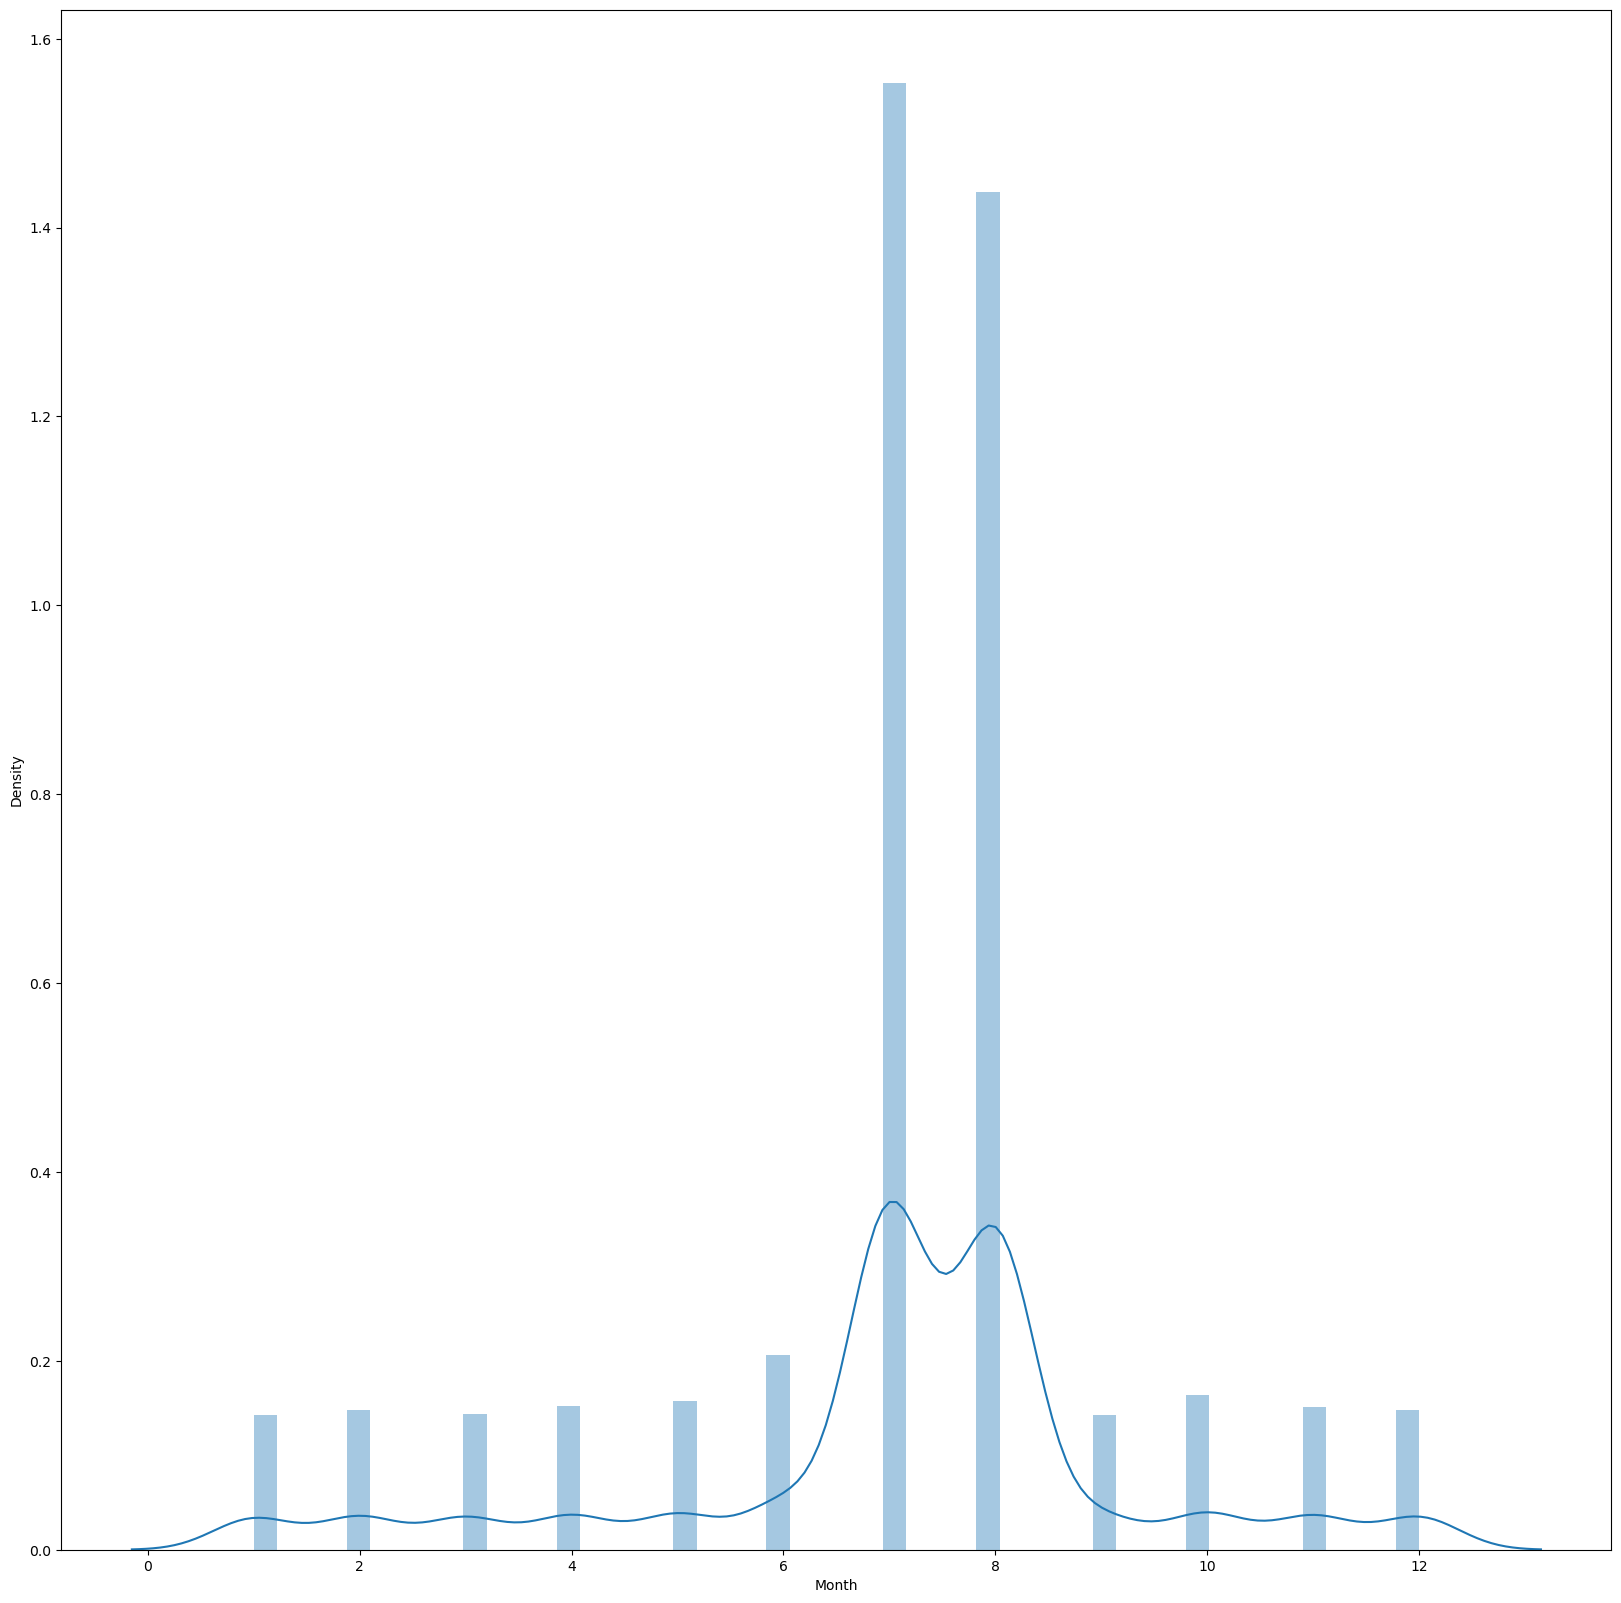

In [48]:
for i in df.columns:
    plt.figure(figsize=[20,20])
    sns.distplot(df[i])
    plt.show()

In [49]:
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['DEM']=np.cbrt(df['DEM'])
df['Slope']=np.cbrt(df['Slope'])


In [50]:
df.skew()

Present_Tmax       -0.273555
Present_Tmin       -0.224349
LDAPS_RHmin         0.309032
LDAPS_RHmax        -0.687878
LDAPS_Tmax_lapse   -0.107413
LDAPS_Tmin_lapse   -0.380093
LDAPS_WS            1.088973
LDAPS_LH            0.567917
LDAPS_CC1           0.595638
LDAPS_CC2           0.503348
LDAPS_CC3           0.701302
LDAPS_CC4           0.710180
LDAPS_PPT1          1.858007
LDAPS_PPT2          2.245379
LDAPS_PPT3          2.396695
LDAPS_PPT4          2.709919
lat                 0.107209
lon                -0.276745
DEM                 0.933785
Slope               0.619862
Solar radiation    -0.508120
Next_Tmax          -0.268740
Next_Tmin          -0.238054
Day                 0.255604
Month              -0.682551
dtype: float64

In [51]:
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [52]:
df.skew()

Present_Tmax       -0.273555
Present_Tmin       -0.224349
LDAPS_RHmin         0.309032
LDAPS_RHmax        -0.687878
LDAPS_Tmax_lapse   -0.107413
LDAPS_Tmin_lapse   -0.380093
LDAPS_WS            1.088973
LDAPS_LH            0.567917
LDAPS_CC1           0.595638
LDAPS_CC2           0.503348
LDAPS_CC3           0.701302
LDAPS_CC4           0.710180
LDAPS_PPT1          1.858007
LDAPS_PPT2          2.245379
LDAPS_PPT3          2.396695
LDAPS_PPT4          1.595373
lat                 0.107209
lon                -0.276745
DEM                 0.933785
Slope               0.619862
Solar radiation    -0.508120
Next_Tmax          -0.268740
Next_Tmin          -0.238054
Day                 0.255604
Month              -0.682551
dtype: float64

# SPLITTING THE TARGET AND LABEL FEATURES FOR FURTHER TREATMENT AND MODELLING PROCESS.

In [53]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)

In [54]:
y=df[['Next_Tmax','Next_Tmin']]

In [55]:
x.head(5)

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0         23.006936  6.818887   69.451805   0.233947   0.203896  ...   
1         24.035009  5.691890   51.937448   0.225508   0.251771  ...   
2         24.565633  6.138224   20.573050   0.209344   0.257469  ...   
3         23.326177  5.650050   65.727144   0.216372   0.226002  ...   
4         23.486480  5.735004  107.965535   0.151407   0.249995  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0         0.0         0.0         0.0  37.6046  126.991  5.965871  1.406938   
1         0.0         0.0         0.0  37.6046  127.032  3.550622  0.801092   
2         0.0         0.0         0.0  37.5776  127.058  3.217444  0.643203   
3         0.0         0.0         0.0  37.6450  127.022  3.575659  1.363477   
4         0.0         0.0         0.0  37.5507  127.135  3.272250  0.796600   

   Solar radiation   Day  Month  
0      5992.895996  30.0    6.0  
1      5869.312500  30.0    6.0  
2      5863.555664  30.0    6.0  
3      5856.964844  30.0    6.0  
4      5859.552246  30.0    6.0  

[5 rows x 23 columns]

In [56]:
y.head(5)

Next_Tmax  Next_Tmin
0       29.1       21.2
1       30.5       22.5
2       31.1       23.9
3       31.7       24.3
4       31.2       22.5

# SCALING THE DATA AND FEATURES:-

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
X

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.433715     -0.827574     0.192983     0.436723         -0.663175   
1         0.686366     -0.740950    -0.241024     0.362815         -0.013264   
2         0.581358     -0.004649    -0.499802    -0.595069          0.074754   
3         0.721368      0.038663     0.191832     1.212048         -0.066695   
4         0.511353     -0.611015     0.042218     0.297870         -0.282783   
...            ...           ...          ...          ...               ...   
6864     -2.393857     -2.386799    -2.238173    -1.420212         -0.758803   
6865     -2.603872     -2.560047    -1.846639    -0.636032         -1.164056   
6866     -2.323852     -2.689982    -2.089529    -1.332316         -1.293125   
6867     -2.323852     -2.430111    -2.285132    -1.559812         -1.052375   
6868     -2.358855     -2.560047    -2.365354    -1.567213         -0.712410   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            -0.290733 -0.024210  0.226810  -0.444385  -0.532434  ...   
1             0.173561 -0.637813 -0.300423  -0.478101  -0.332422  ...   
2             0.413199 -0.394803 -1.244584  -0.542680  -0.308617  ...   
3            -0.146558 -0.660593  0.114687  -0.514601  -0.440078  ...   
4            -0.074163 -0.614339  1.386187  -0.774143  -0.339842  ...   
...                ...       ...       ...        ...        ...  ...   
6864         -2.415095 -0.141614 -1.574482  -1.167679  -1.258222  ...   
6865         -2.635924 -0.596329  0.608964  -1.113510  -1.281829  ...   
6866         -2.201632 -0.388981  0.305273  -1.259040  -1.045716  ...   
6867         -2.220672 -0.174518 -0.441787  -1.235710  -1.071086  ...   
6868         -2.315761  0.231890 -1.590257  -1.183455  -1.134144  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon       DEM  \
0      -0.498879   -0.479007    -0.51333  1.212401  0.002770  2.363676   
1      -0.498879   -0.479007    -0.51333  1.212401  0.518072 -0.137298   
2      -0.498879   -0.479007    -0.51333  0.672326  0.844848 -0.482302   
3      -0.498879   -0.479007    -0.51333  2.020514  0.392388 -0.111372   
4      -0.498879   -0.479007    -0.51333  0.134250  1.812610 -0.425550   
...          ...         ...         ...       ...       ...       ...   
6864   -0.498879   -0.479007    -0.51333  0.134250  0.618618 -0.734623   
6865   -0.498879   -0.479007    -0.51333 -0.675863  1.196762 -0.913910   
6866   -0.498879   -0.479007    -0.51333 -0.135787 -1.254063 -1.227277   
6867   -0.498879   -0.479007    -0.51333 -0.405825 -1.027833 -1.136054   
6868   -0.498879   -0.479007    -0.51333 -0.405825 -0.261165 -1.022787   

         Slope  Solar radiation       Day     Month  
0     1.292285         1.550239  1.662935 -0.486373  
1    -0.416319         1.256085  1.662935 -0.486373  
2    -0.861596         1.242383  1.662935 -0.486373  
3     1.169716         1.226695  1.662935 -0.486373  
4    -0.428987         1.232854  1.662935 -0.486373  
...        ...              ...       ...       ...  
6864 -0.334366        -2.107830  1.662935  0.405127  
6865 -1.235273        -2.141678  1.662935  0.405127  
6866 -1.159332        -2.138083  1.662935  0.405127  
6867 -0.967144        -2.149842  1.662935  0.405127  
6868 -0.849856        -2.118967  1.662935  0.405127  

[6869 rows x 23 columns]

In [62]:
df.shape

(6869, 25)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# CHOOSING THE BEST RANDOM STATE:-

In [68]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    lm.score(x_test,y_test)
    ypred=lm.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)

Best accuracy is 0.797728274020565 for random state 61


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [71]:
lm=LinearRegression()
dtc=DecisionTreeRegressor()
rf=RandomForestRegressor()

model =[lm,dtc,rf]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=61)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('R2 score for',i, 'is',r2_score(pred,y_test))
    print('Mean squared error is',mean_squared_error(pred,y_test))
    print('Mean absolute error is',mean_absolute_error(pred,y_test))
    cvs=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i, 'is',cvs.mean())
    print('Difference between R2 score and Cross Validation Score is',r2_score(pred,y_test) - cvs.mean())
    print('\t')
    print('\t')

R2 score for LinearRegression() is 0.7436096378529017
Mean squared error is 1.4978068060622003
Mean absolute error is 0.9389031099997057
Cross validation score for LinearRegression() is 0.7115054191628143
Difference between R2 score and Cross Validation Score is 0.032104218690087394
	
	
R2 score for DecisionTreeRegressor() is 0.7530418436746247
Mean squared error is 1.840376984126984
Mean absolute error is 0.9803571428571416
Cross validation score for DecisionTreeRegressor() is 0.43056144373307303
Difference between R2 score and Cross Validation Score is 0.32248039994155164
	
	
R2 score for RandomForestRegressor() is 0.8778121087208386
Mean squared error is 0.733568631944445
Mean absolute error is 0.6391683201058207
Cross validation score for RandomForestRegressor() is 0.6972487306321543
Difference between R2 score and Cross Validation Score is 0.18056337808868428
	
	


# Linear Regression has got least difference between R2 score and Cross validation score.

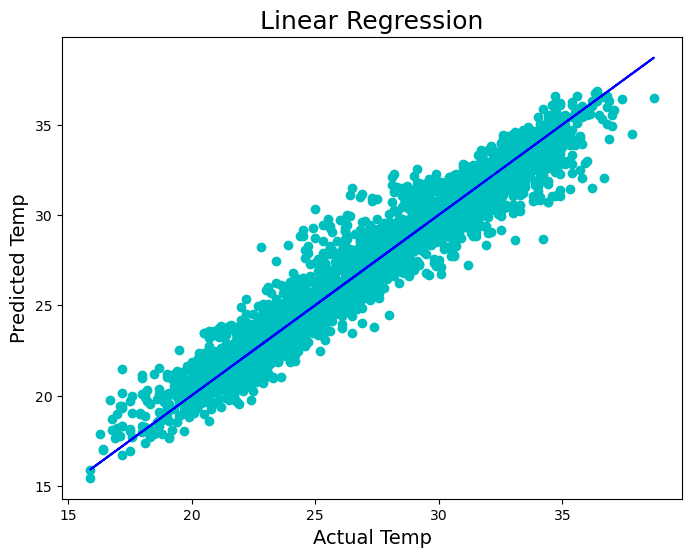

In [72]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=lm.predict(x_test),color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Temp', fontsize=14)
plt.ylabel('Predicted Temp', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [75]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.7977401985236316

In [76]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7123465800607133

# Hyperparameter tuning for RandomForestRegressor

In [77]:
param_grid = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

In [78]:
gcv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
gcv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [79]:
gcv.best_params_

{'criterion': 'mse', 'max_features': 'sqrt'}

In [80]:
rfr = RandomForestRegressor(random_state=185, max_features='sqrt',criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))
print (mean_absolute_error(y_test, predrfr))

0.9111564532766574
0.6448344775132282
0.603819444444444


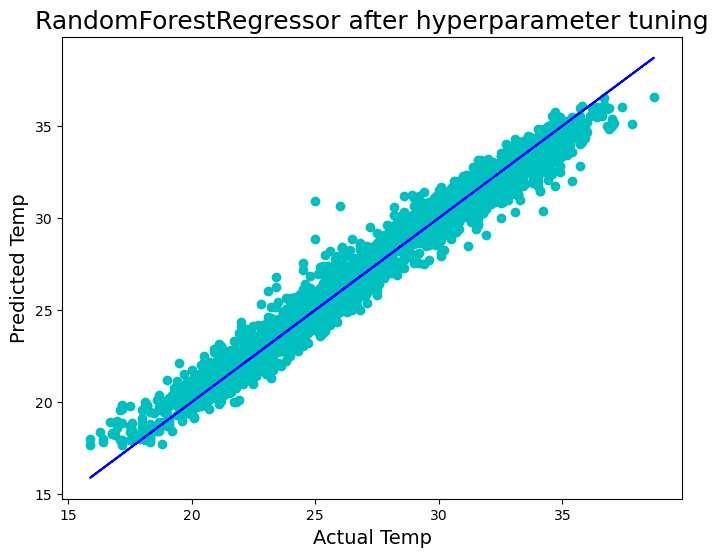

In [81]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=predrfr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Temp', fontsize=14)
plt.ylabel('Predicted Temp', fontsize=14)
plt.title('RandomForestRegressor after hyperparameter tuning', fontsize=18)
plt.show()